In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# モジュールのインポート
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib
import matplotlib.pyplot as plt
import sys
from sklearn import preprocessing

In [3]:
# 自作モジュール
sys.path.append("../")
import display
import dataloader
from dataloader import ThermalData
import clustering
import anomaly_detection
import module_extraction
from module_extraction import Filters, Modules
from anomaly_detection import AnoModels
import utils

分析対象の指定

In [4]:
input_img_path = "../images/ortho/1466.tif"
#input_img_path = "../images/ortho/1391.tif"
input_dir_path = "../outputs/"+input_img_path.split("/")[-1][:-4]
print(input_dir_path)

../outputs/1466


画像データの取得

In [5]:
img_org = cv2.imread(input_img_path, 0)

In [6]:
thermal_img_files = dataloader.get_img_files(dir_path=input_dir_path+"/modules",gray=False)

In [7]:
type(thermal_img_files), len(thermal_img_files)

(dict, 5154)

モジュール情報の取得

In [8]:
import pickle
with open(input_dir_path+'/module_contours.pkl', 'rb') as pkl:
    module_contours = pickle.load(pkl)
with open(input_dir_path+'/module_labels_split.pkl', 'rb') as pkl:
    module_labels = pickle.load(pkl)

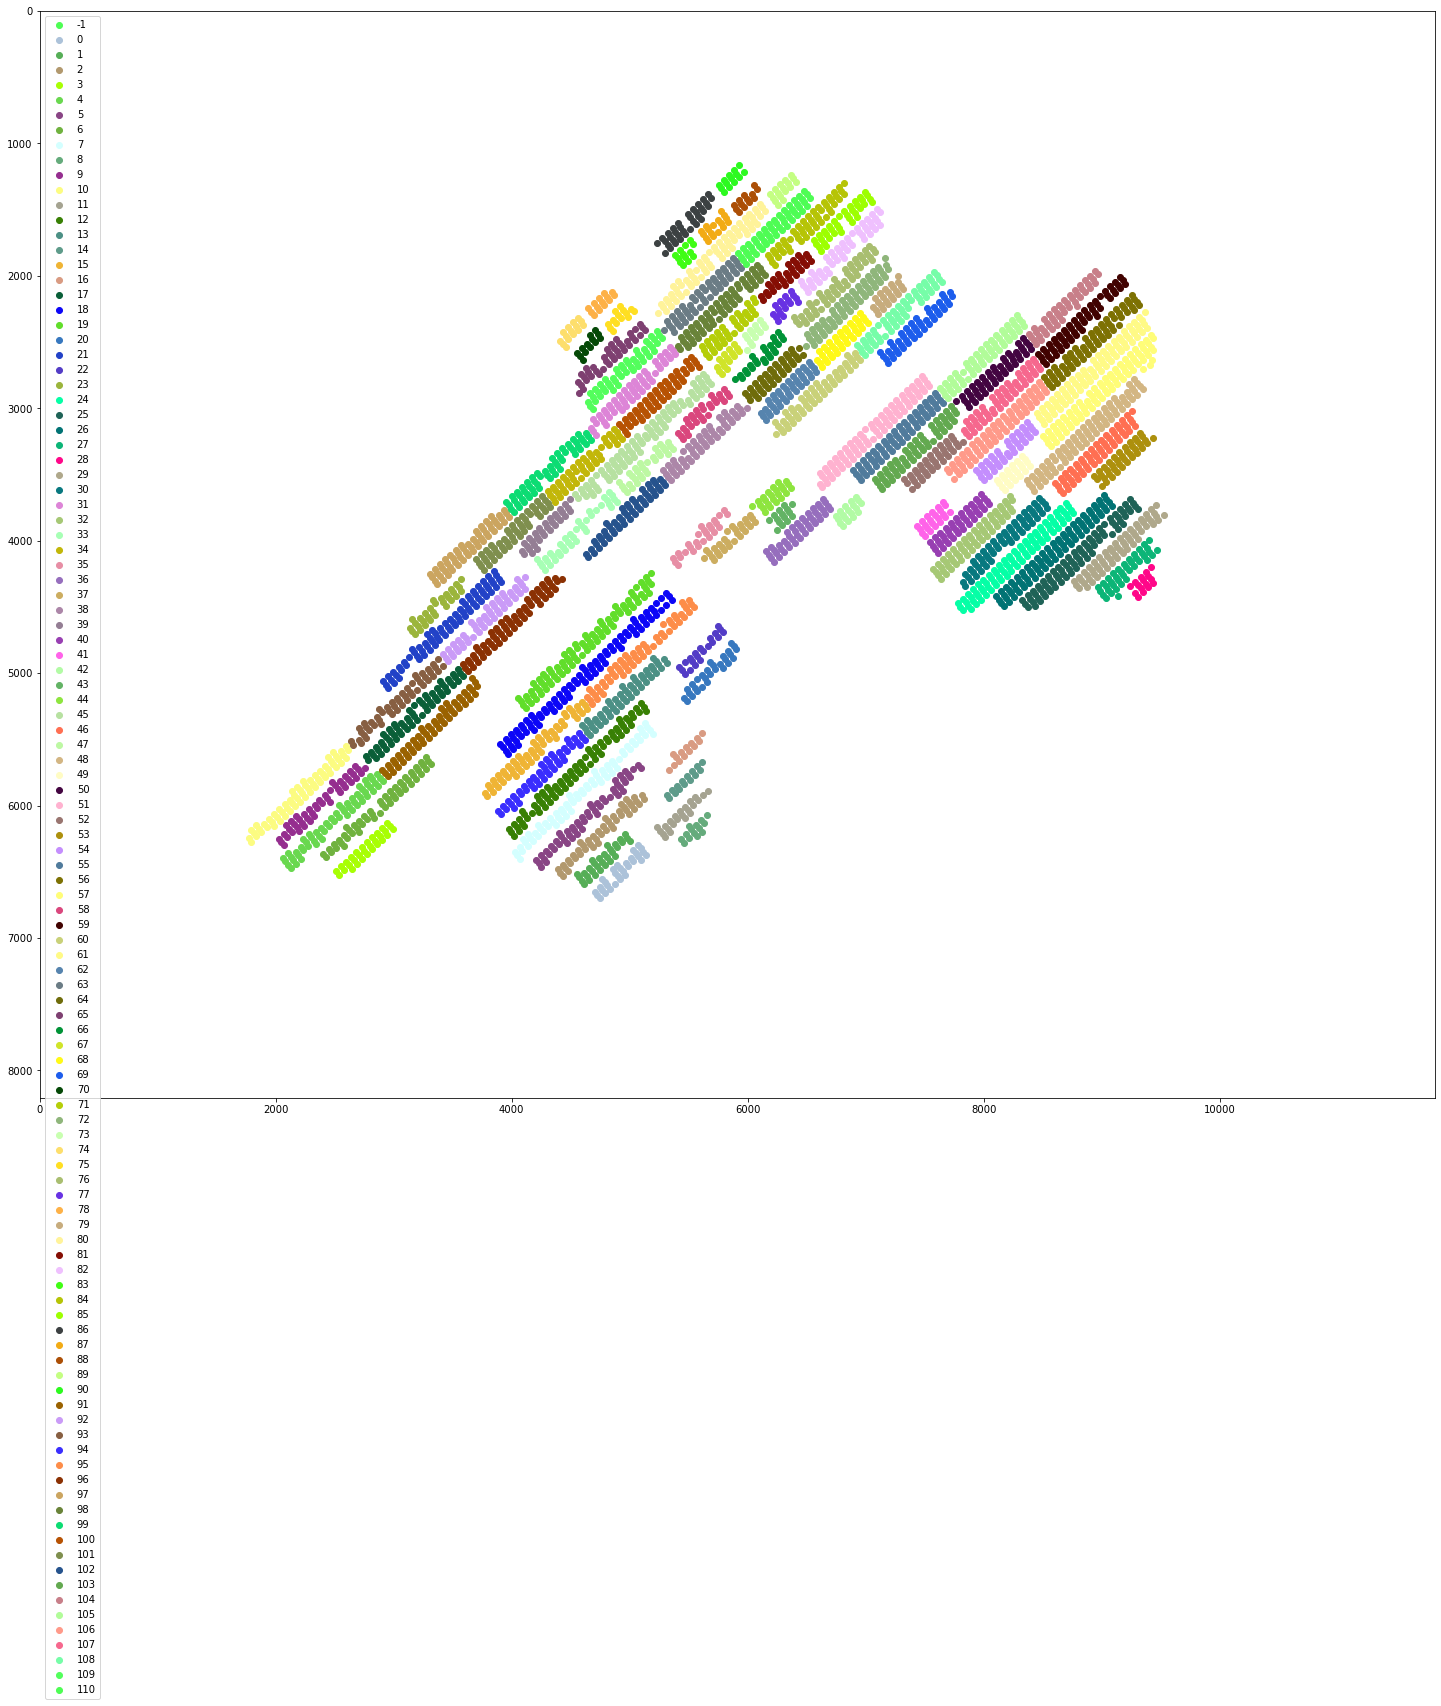

In [9]:
module_extraction.plot_module_map_with_labels(img_org, module_contours, module_labels)

温度データの取得

In [10]:
%%time
#thermal_data = ThermalData(thermal_img_files) # all
thermal_data = dataloader.get_thermal_data(thermal_img_files, module_labels) # group

100%|██████████| 111/111 [08:39<00:00,  4.68s/it]

CPU times: user 41min 33s, sys: 2min 9s, total: 43min 43s
Wall time: 8min 39s


ホットスポット検出モデルの学習

In [45]:
anomodels = AnoModels()

In [46]:
anomodels.fit(thermal_data,module_labels)

100%|██████████| 111/111 [00:13<00:00,  8.53it/s]


array offset: 0 152.4241988126751 [-1.81203188] [-0.68481275]


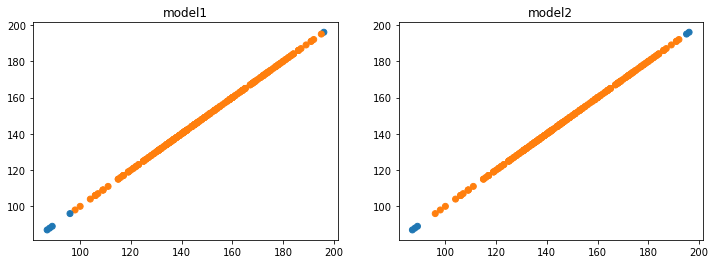

array offset: 1 149.94149044326963 [-1.81203188] [-0.68481275]


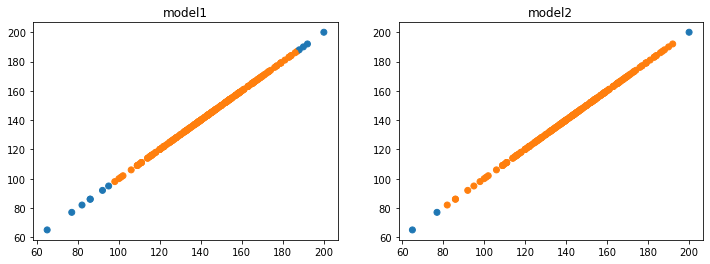

array offset: 2 150.21272456609265 [-1.81203188] [-0.68481275]


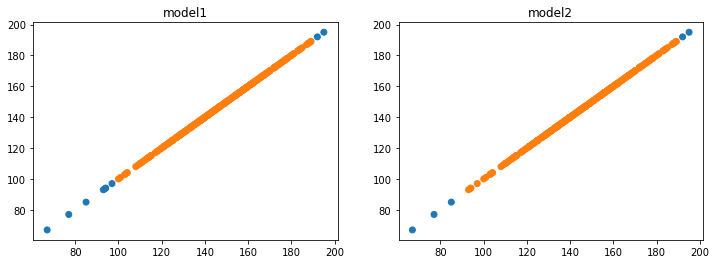

array offset: 3 150.01302672766676 [-1.78556933] [-0.67422773]


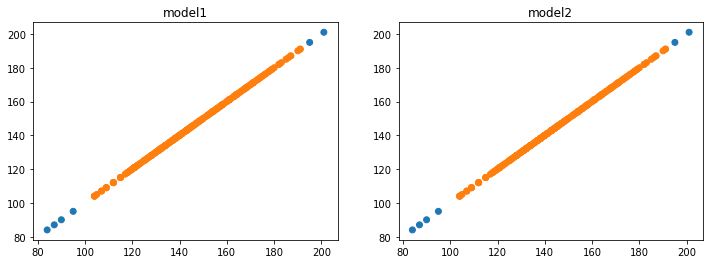

array offset: 4 150.31202836499867 [-1.78556933] [-0.67422773]


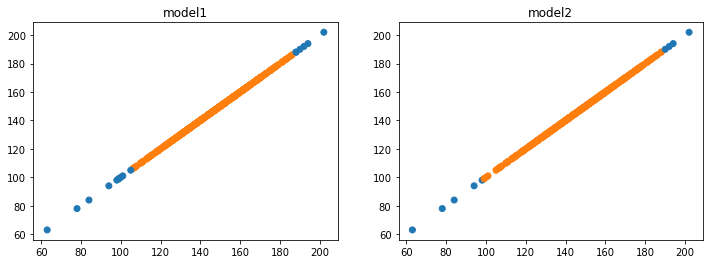

array offset: 5 152.71999770536942 [-1.78556933] [-0.67422773]


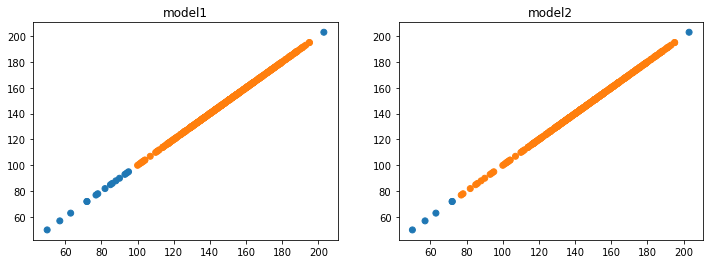

array offset: 6 147.59041547277937 [-1.78229778] [-0.67291911]


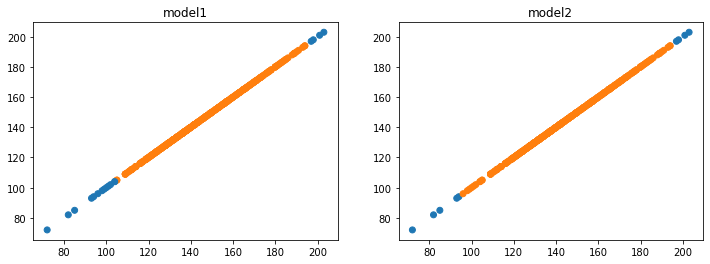

array offset: 7 155.26365710304216 [-1.78229778] [-0.67291911]


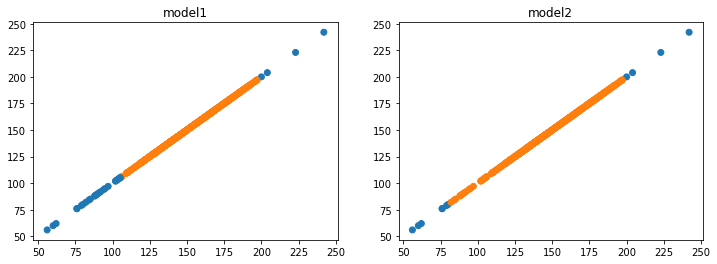

array offset: 8 151.86665175075512 [-1.78229778] [-0.67291911]


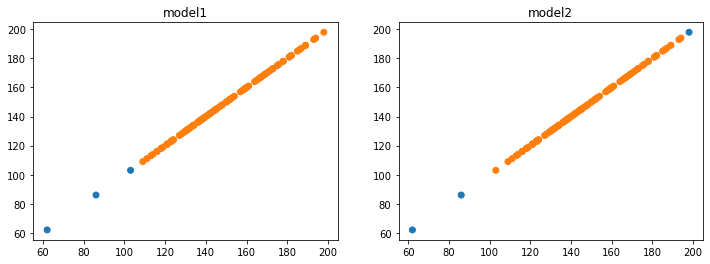

array offset: 9 153.20768397913318 [-1.76462601] [-0.6658504]


array offset: 10 154.49776289118506 [-1.76462601] [-0.6658504]


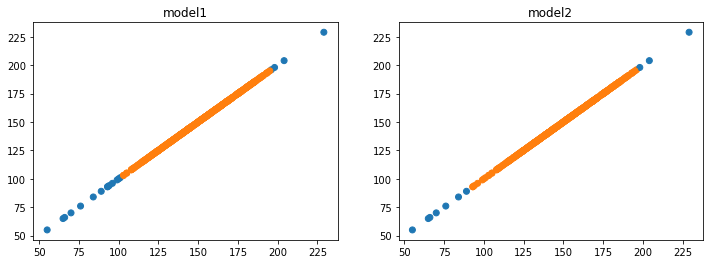

array offset: 11 150.42762893503013 [-1.76462601] [-0.6658504]


array offset: 12 153.13683556482002 [-1.79270085] [-0.67708034]


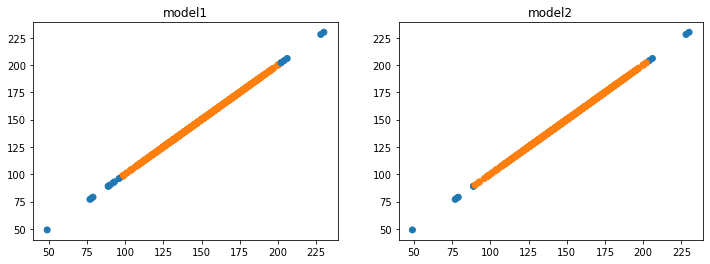

array offset: 13 151.71060996131112 [-1.79270085] [-0.67708034]


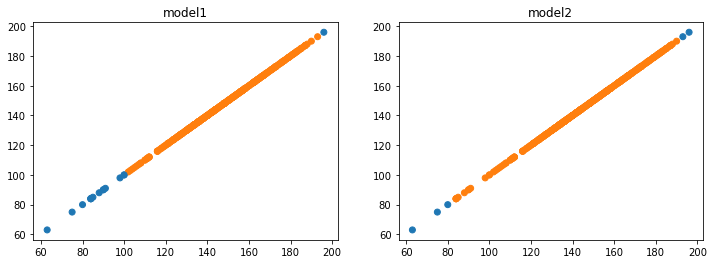

array offset: 14 152.99049603577964 [-1.79270085] [-0.67708034]


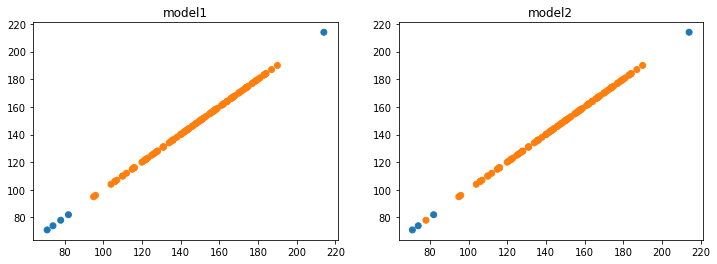

array offset: 15 149.09263636938246 [-1.84544637] [-0.69817855]


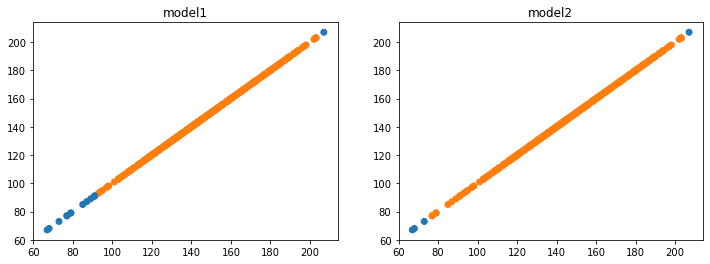

array offset: 16 147.1106633081444 [-1.84544637] [-0.69817855]


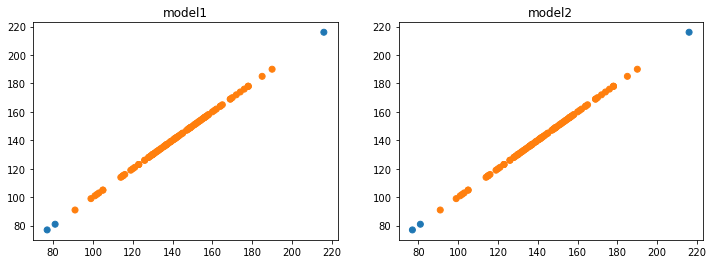

array offset: 17 150.94798296102843 [-1.84544637] [-0.69817855]


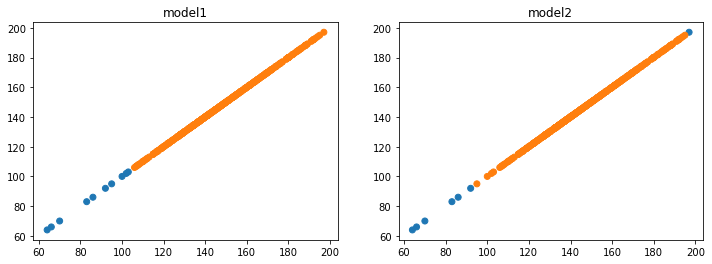

array offset: 18 153.09282057483776 [-1.69100393] [-0.63640157]


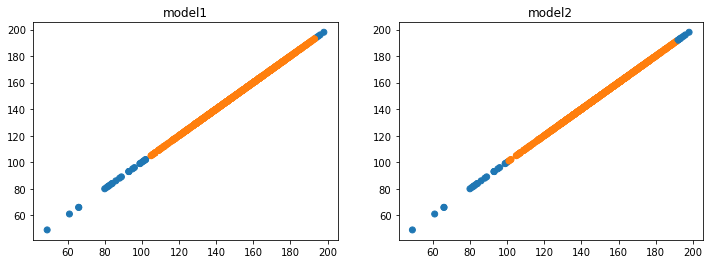

array offset: 19 148.23733702060517 [-1.69100393] [-0.63640157]


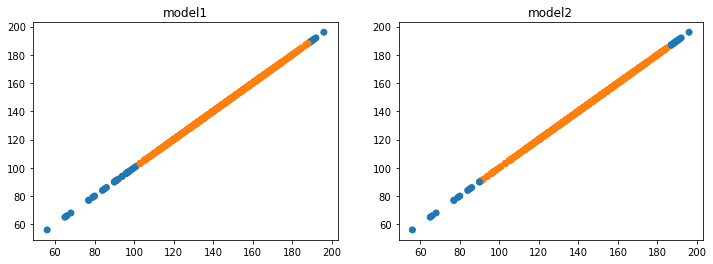

array offset: 20 155.72330928530647 [-1.69100393] [-0.63640157]


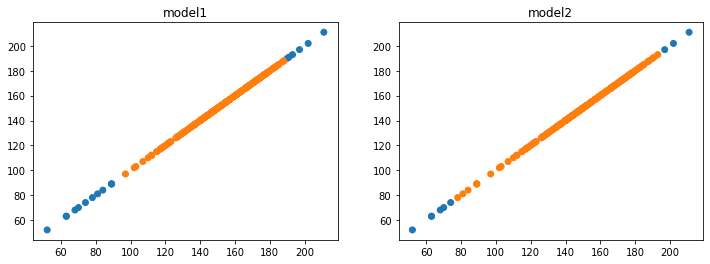

array offset: 21 150.85832054637905 [-1.91118773] [-0.72447509]


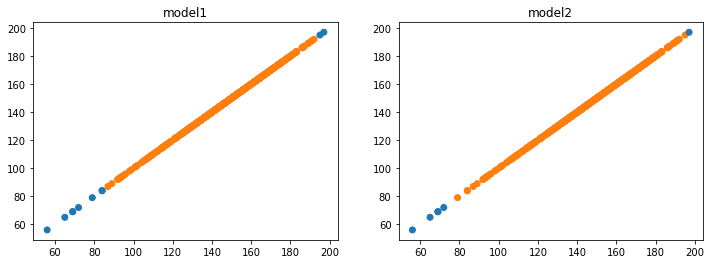

array offset: 22 154.07971391868904 [-1.91118773] [-0.72447509]


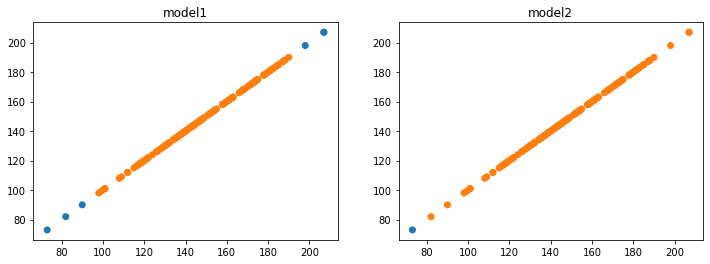

array offset: 23 153.4757998359311 [-1.91118773] [-0.72447509]


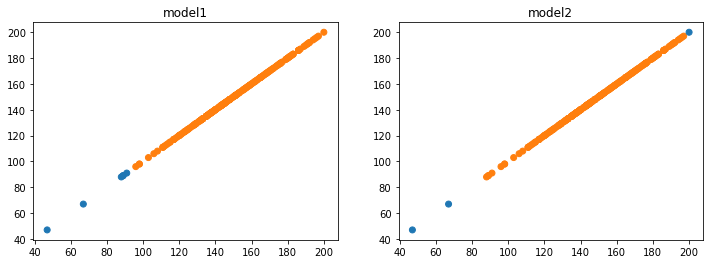

array offset: 24 152.1224739798372 [-1.81431168] [-0.68572467]


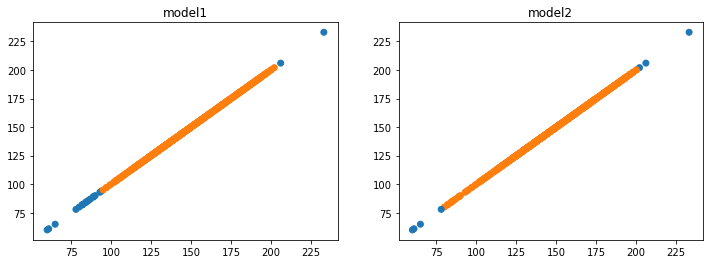

array offset: 25 150.8435317754457 [-1.81431168] [-0.68572467]


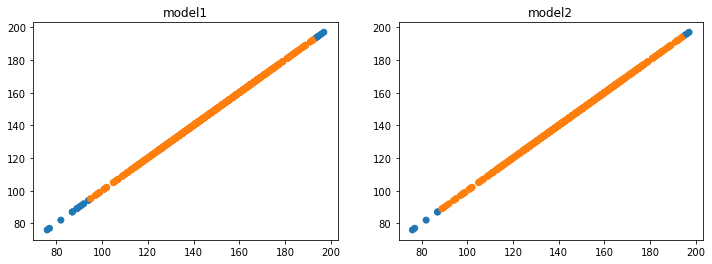

array offset: 26 151.37777289119535 [-1.81431168] [-0.68572467]


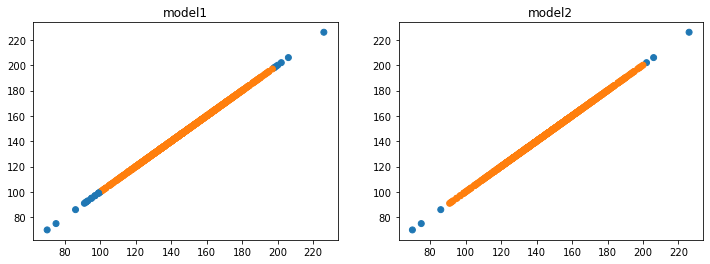

array offset: 27 152.82719925459295 [-1.83714507] [-0.69485803]


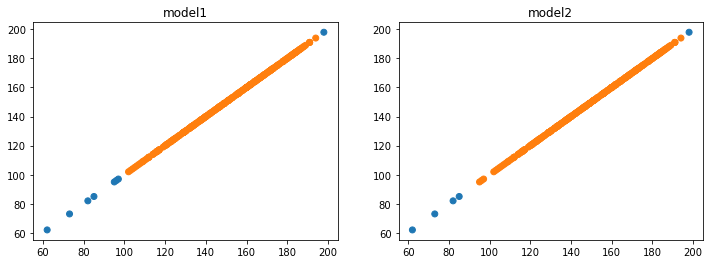

array offset: 28 144.94985321719042 [-1.83714507] [-0.69485803]


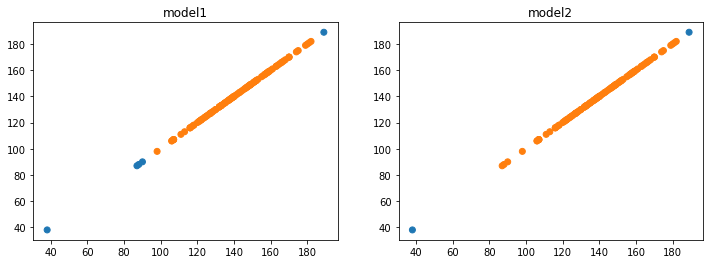

array offset: 29 151.67035525654694 [-1.83714507] [-0.69485803]


array offset: 30 148.9994226402022 [-1.9128832] [-0.72515328]


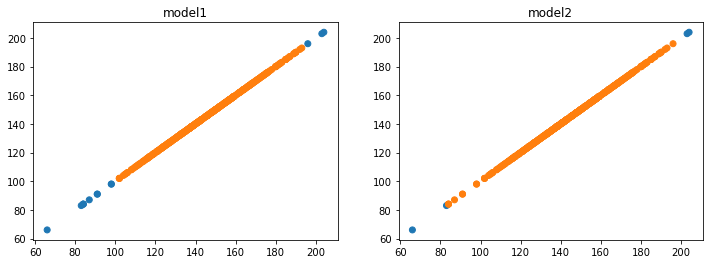

array offset: 31 153.2164565124926 [-1.9128832] [-0.72515328]


array offset: 32 154.4267253781008 [-1.9128832] [-0.72515328]


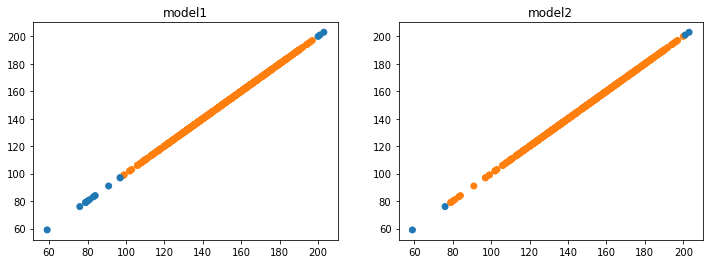

array offset: 33 149.0218229010682 [-1.76166564] [-0.66466626]


array offset: 34 154.206267038319 [-1.76166564] [-0.66466626]


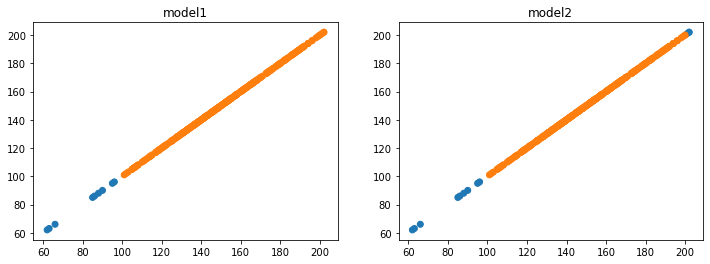

array offset: 35 147.67379080926727 [-1.76166564] [-0.66466626]


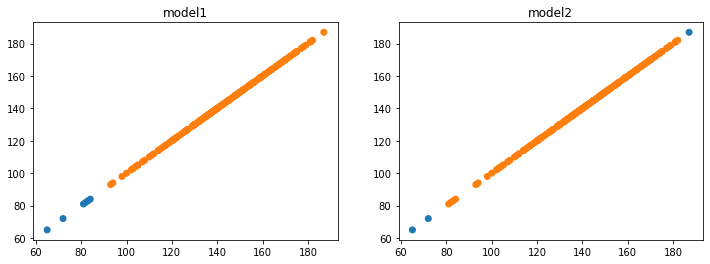

array offset: 36 152.5539917944579 [-1.83299977] [-0.69319991]


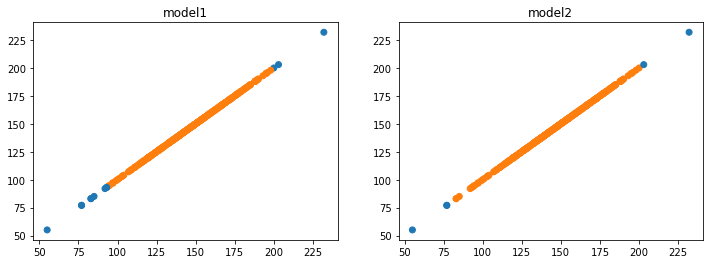

array offset: 37 151.53608553608552 [-1.83299977] [-0.69319991]


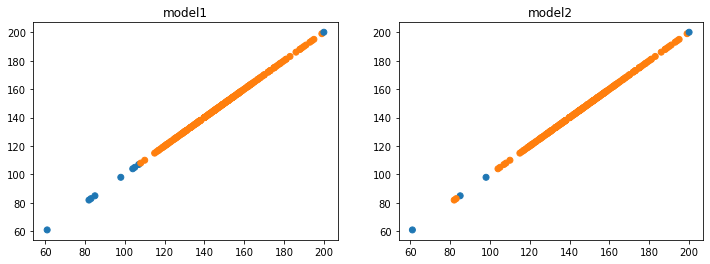

array offset: 38 154.85782523570825 [-1.83299977] [-0.69319991]


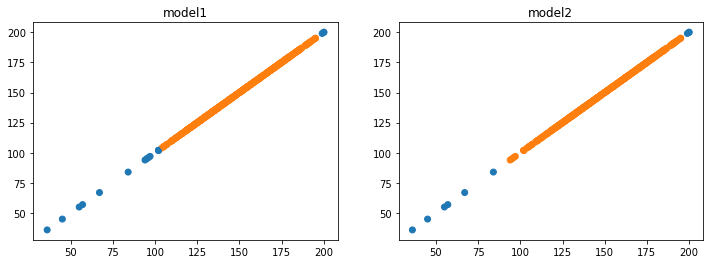

array offset: 39 157.53211169720757 [-1.82039509] [-0.68815803]


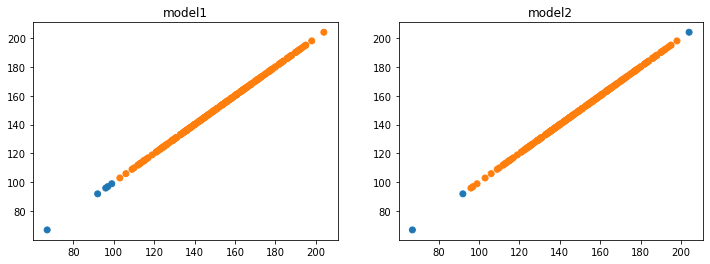

array offset: 40 155.70039363034533 [-1.82039509] [-0.68815803]


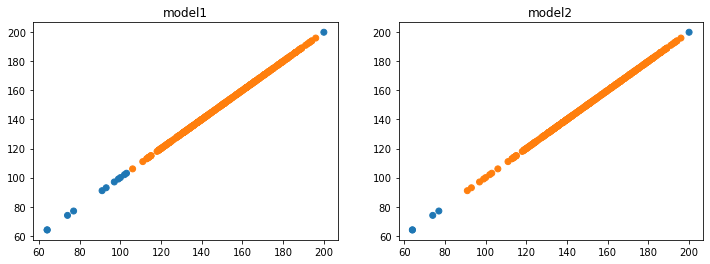

array offset: 41 155.94385593220338 [-1.82039509] [-0.68815803]


array offset: 42 155.47420109119253 [-1.92217542] [-0.72887017]


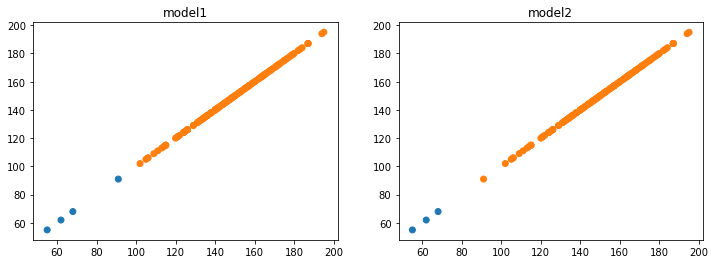

array offset: 43 161.16374361405173 [-1.92217542] [-0.72887017]


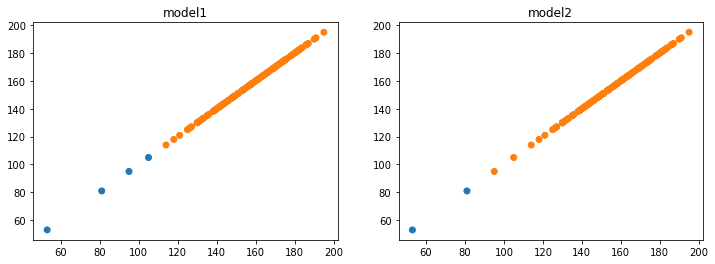

array offset: 44 148.21113429025127 [-1.92217542] [-0.72887017]


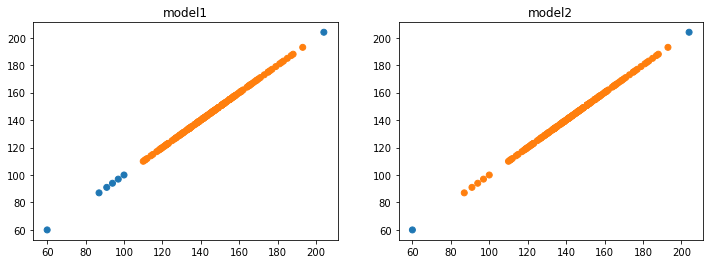

array offset: 45 151.0800962280423 [-1.72207615] [-0.64883046]


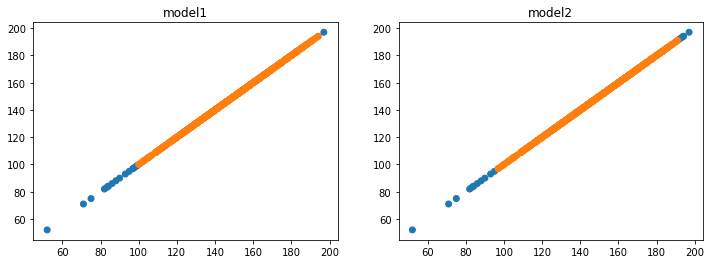

array offset: 46 149.17135589499915 [-1.72207615] [-0.64883046]


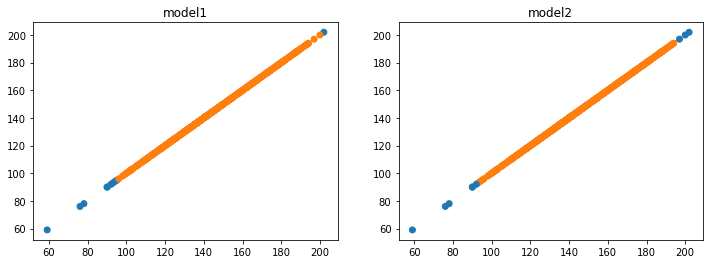

array offset: 47 149.7297173531432 [-1.72207615] [-0.64883046]


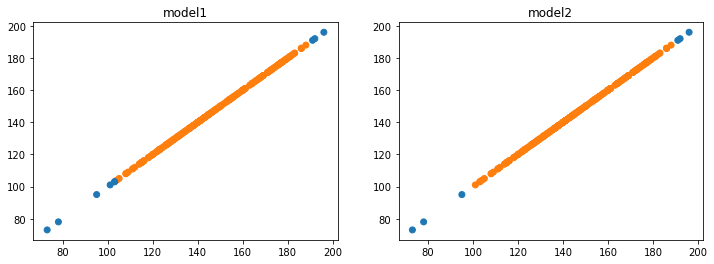

array offset: 48 148.98447883351614 [-1.69492094] [-0.63796838]


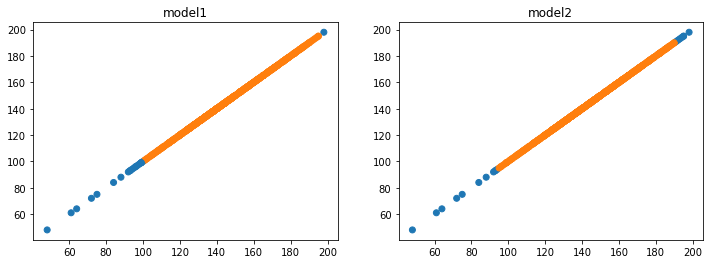

array offset: 49 153.06485469103902 [-1.69492094] [-0.63796838]


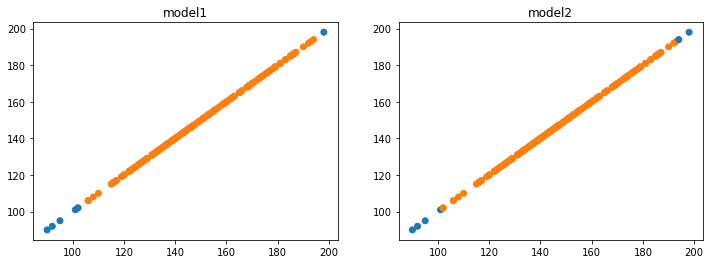

array offset: 50 150.68779991737375 [-1.69492094] [-0.63796838]


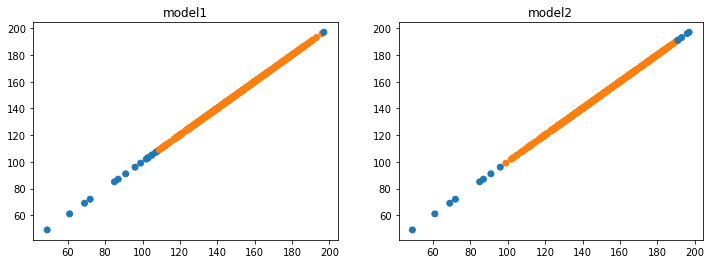

array offset: 51 151.32060802117414 [-1.75809585] [-0.66323834]


array offset: 52 149.17539738469972 [-1.75809585] [-0.66323834]


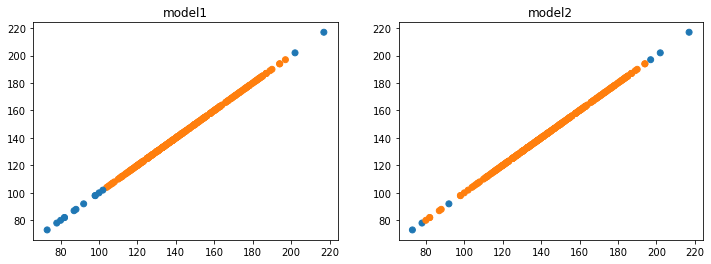

array offset: 53 146.704218740832 [-1.75809585] [-0.66323834]


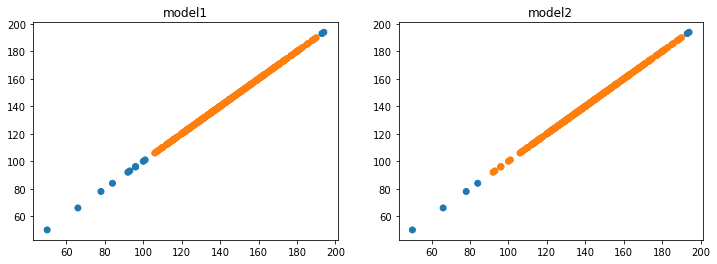

array offset: 54 152.9499303038751 [-1.85857924] [-0.7034317]


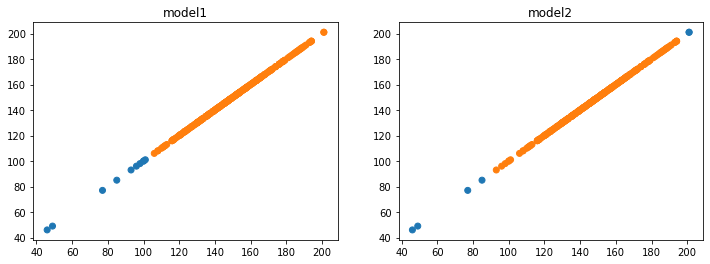

array offset: 55 150.1525112405765 [-1.85857924] [-0.7034317]


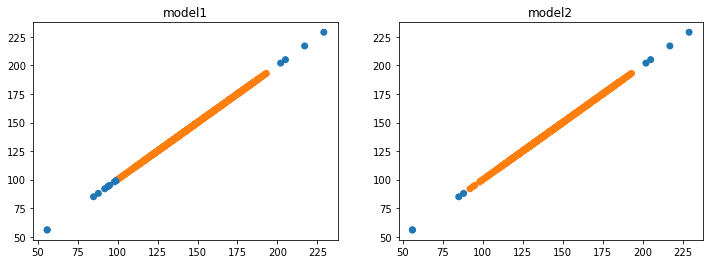

array offset: 56 152.4384048558135 [-1.85857924] [-0.7034317]


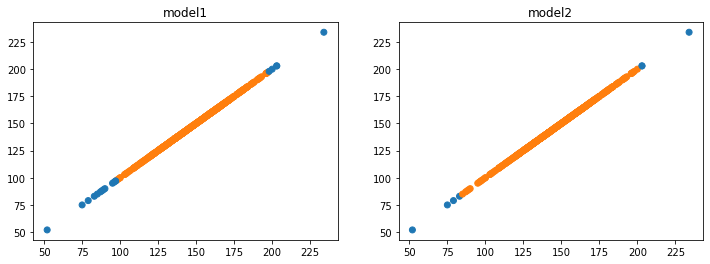

array offset: 57 150.9115126827036 [-1.72690247] [-0.65076099]


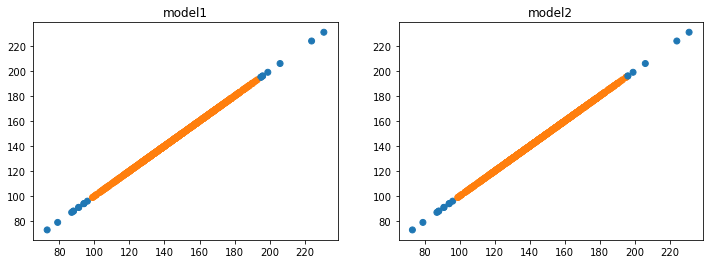

array offset: 58 155.06725313622402 [-1.72690247] [-0.65076099]


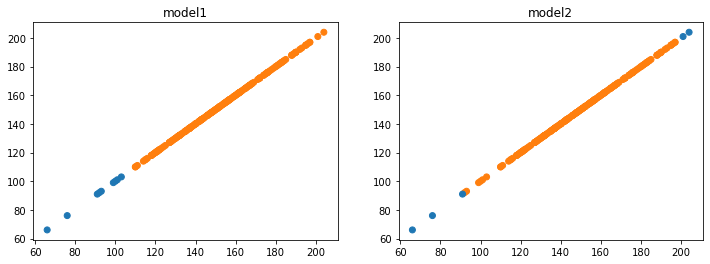

array offset: 59 149.2056451082308 [-1.72690247] [-0.65076099]


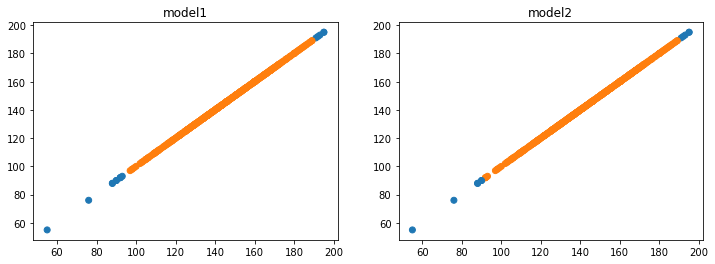

array offset: 60 153.58991638587295 [-1.94887669] [-0.73955068]


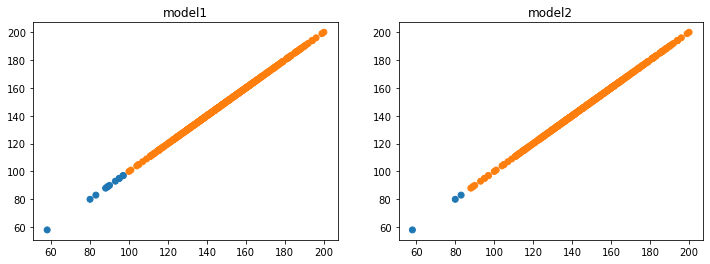

array offset: 61 150.1586028198106 [-1.94887669] [-0.73955068]


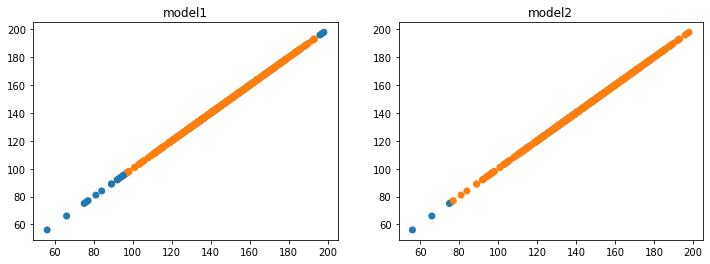

array offset: 62 146.51162703332207 [-1.94887669] [-0.73955068]


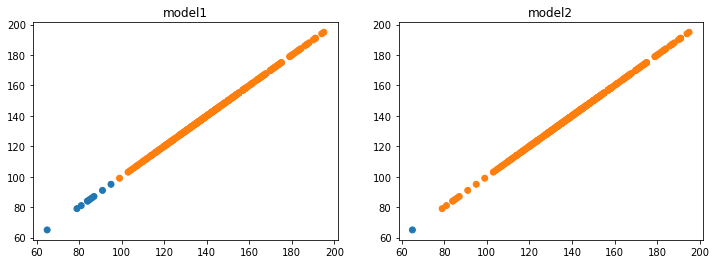

array offset: 63 152.44190892384273 [-1.82418808] [-0.68967523]


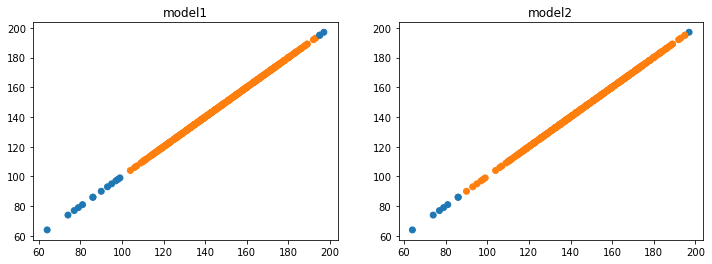

array offset: 64 155.76266671704386 [-1.82418808] [-0.68967523]


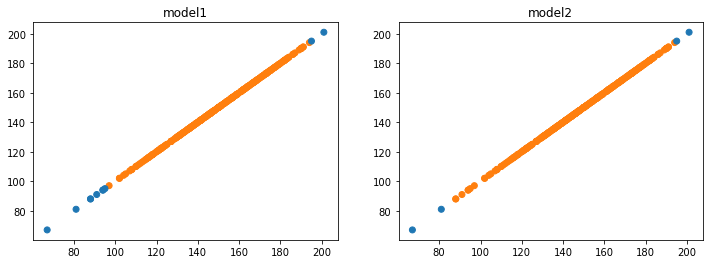

array offset: 65 152.07654421491807 [-1.82418808] [-0.68967523]


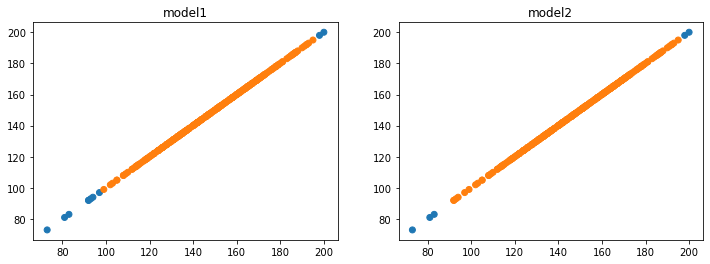

array offset: 66 146.5486251673777 [-1.88410943] [-0.71364377]


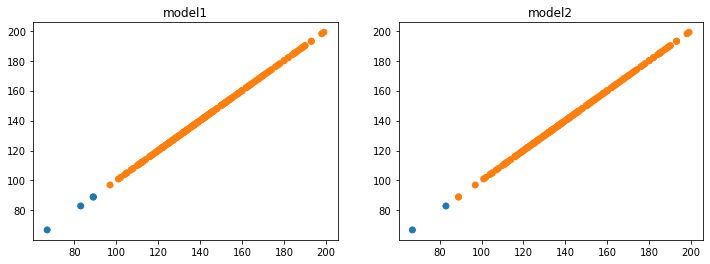

array offset: 67 149.29767602506539 [-1.88410943] [-0.71364377]


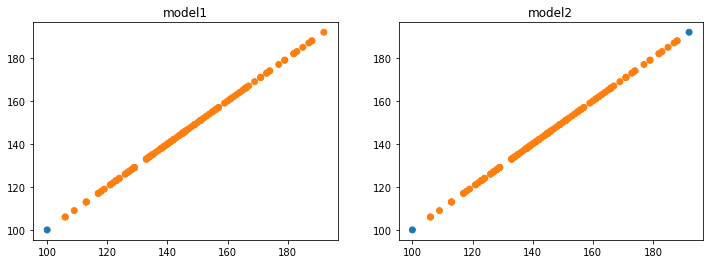

array offset: 68 152.98460341509357 [-1.88410943] [-0.71364377]


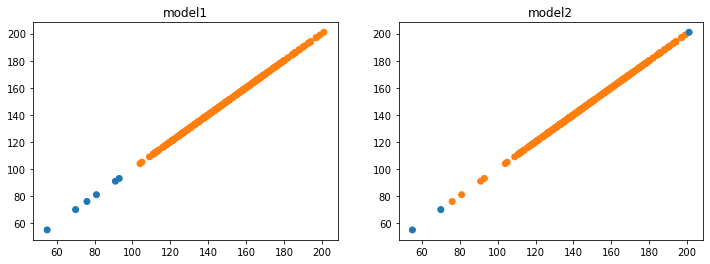

array offset: 69 150.97131786684673 [-1.84498598] [-0.69799439]


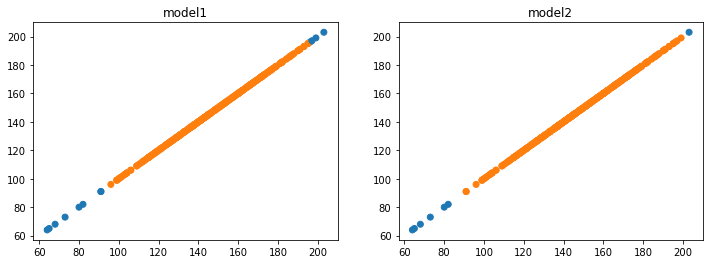

array offset: 70 154.75356754335445 [-1.84498598] [-0.69799439]


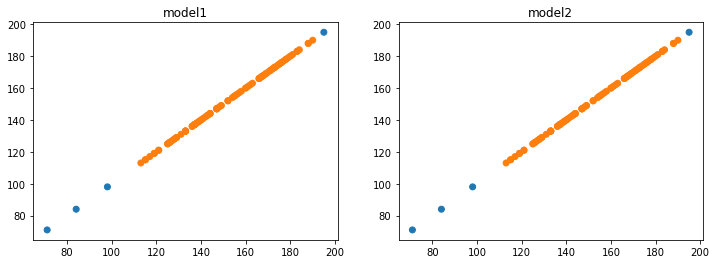

array offset: 71 151.7377248720911 [-1.84498598] [-0.69799439]


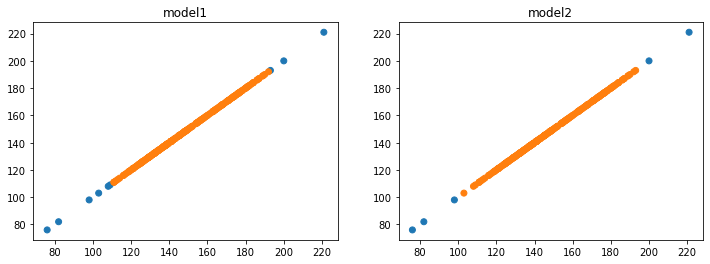

array offset: 72 153.33378595235155 [-1.81122329] [-0.68448931]


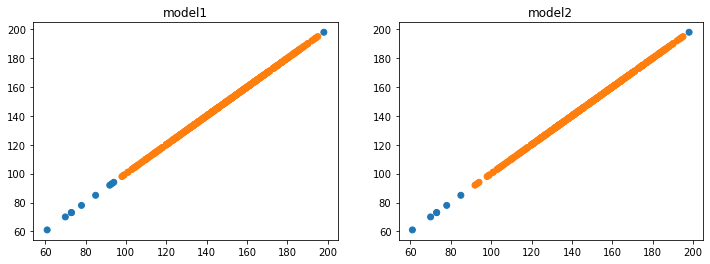

array offset: 73 146.94511158633549 [-1.81122329] [-0.68448931]


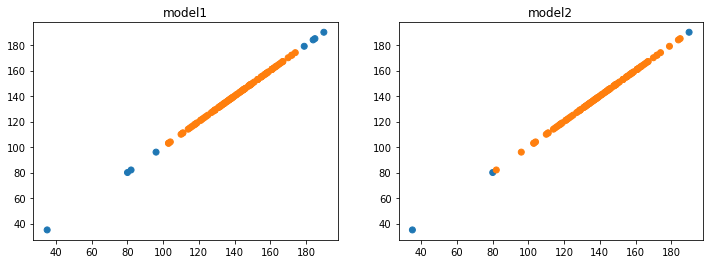

array offset: 74 145.34903685092127 [-1.81122329] [-0.68448931]


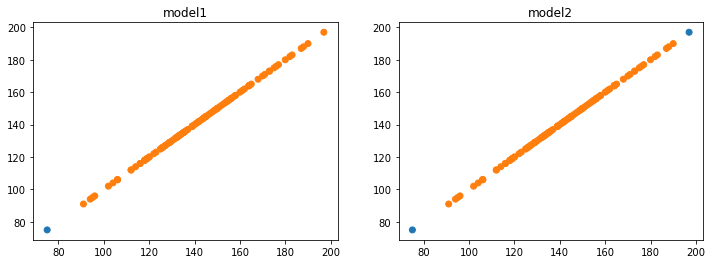

array offset: 75 154.44791666666666 [-1.80505583] [-0.68202233]


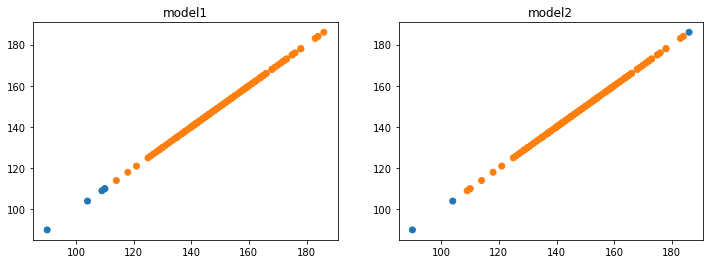

array offset: 76 151.57268336854816 [-1.80505583] [-0.68202233]


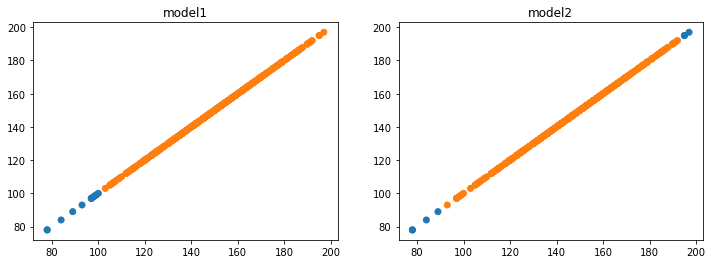

array offset: 77 148.04513191375386 [-1.80505583] [-0.68202233]


array offset: 78 152.57017114914424 [-1.80144609] [-0.68057844]


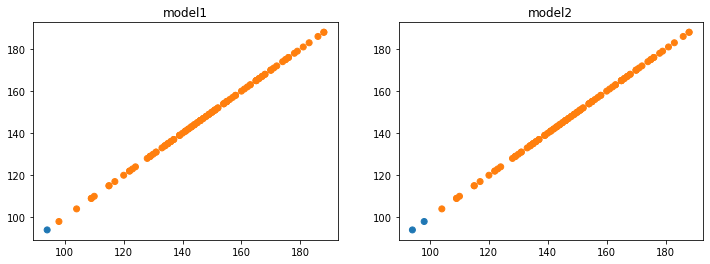

array offset: 79 149.11789232993712 [-1.80144609] [-0.68057844]


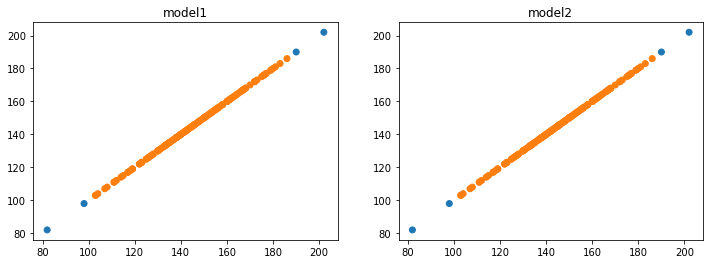

array offset: 80 152.74904018996472 [-1.80144609] [-0.68057844]


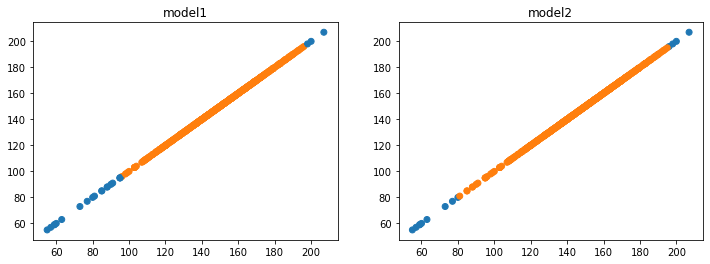

array offset: 81 150.98845934768073 [-1.87825281] [-0.71130113]


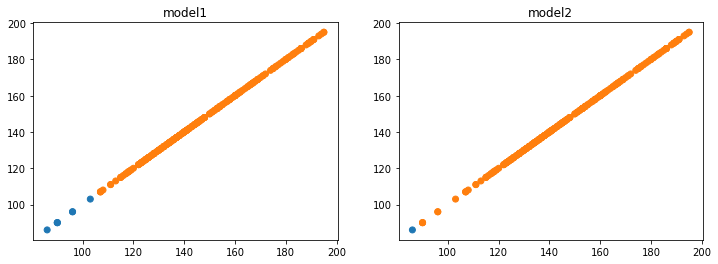

array offset: 82 148.91932177010221 [-1.87825281] [-0.71130113]


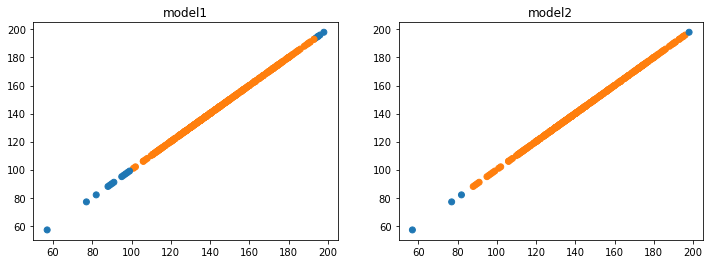

array offset: 83 141.67078514911748 [-1.87825281] [-0.71130113]


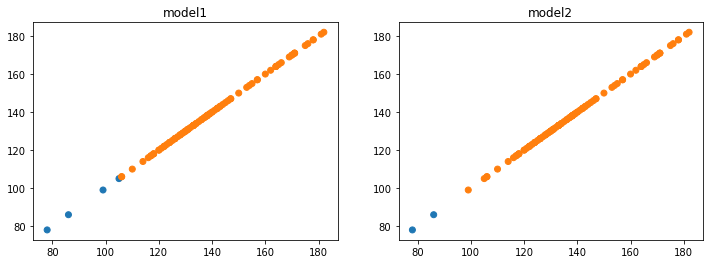

array offset: 84 146.994053490001 [-1.62631593] [-0.61052637]


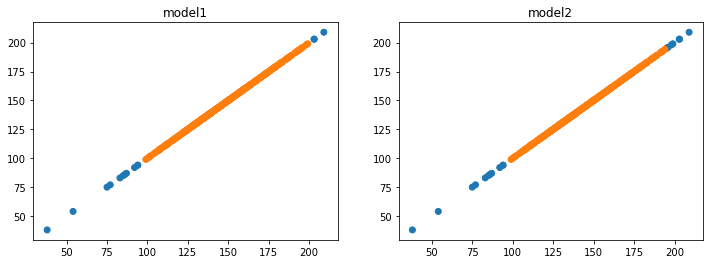

array offset: 85 151.52410062997347 [-1.62631593] [-0.61052637]


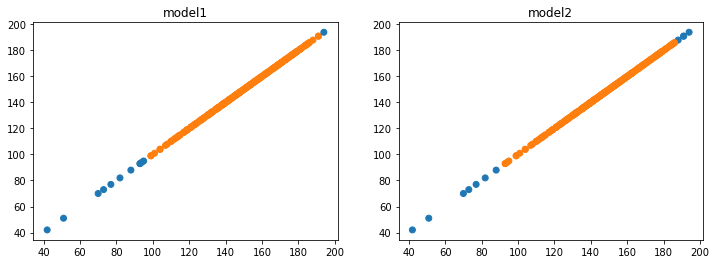

array offset: 86 148.1581752101496 [-1.62631593] [-0.61052637]


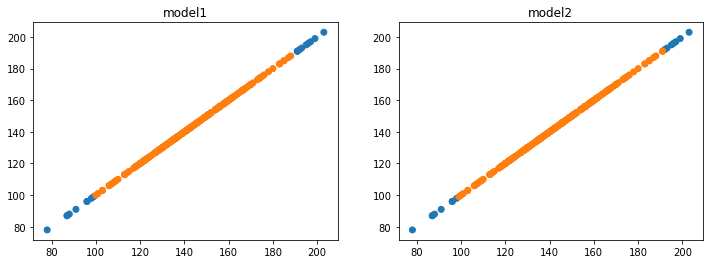

array offset: 87 153.15625902049456 [-1.79976106] [-0.67990442]


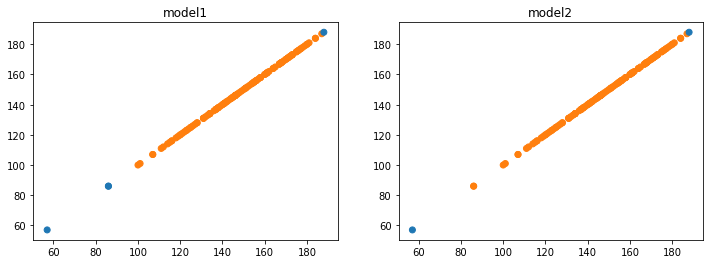

array offset: 88 159.74916252743444 [-1.79976106] [-0.67990442]


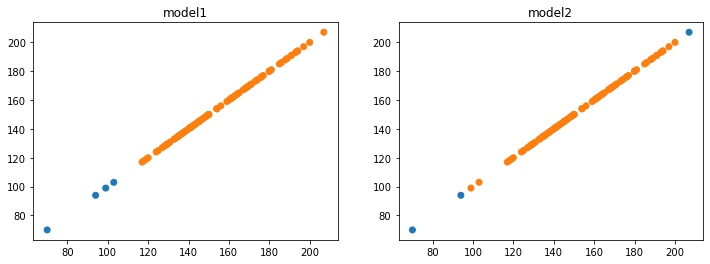

array offset: 89 150.32532043757922 [-1.79976106] [-0.67990442]


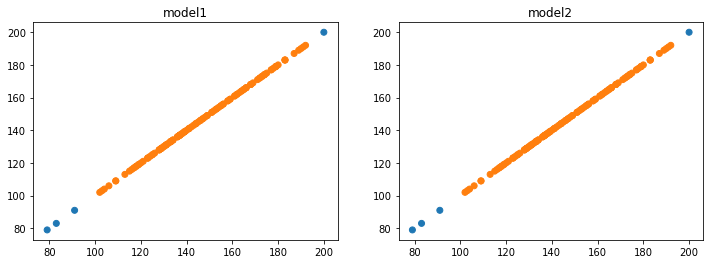

array offset: 90 157.71593909770212 [-1.73581688] [-0.65432675]


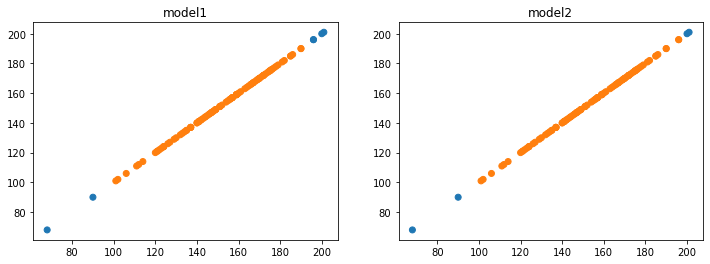

array offset: 91 152.7938564074636 [-1.73581688] [-0.65432675]


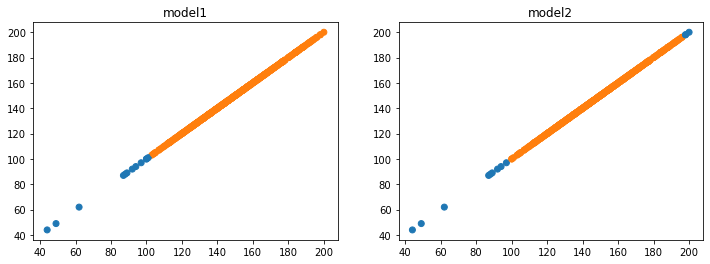

array offset: 92 152.4536980395584 [-1.73581688] [-0.65432675]


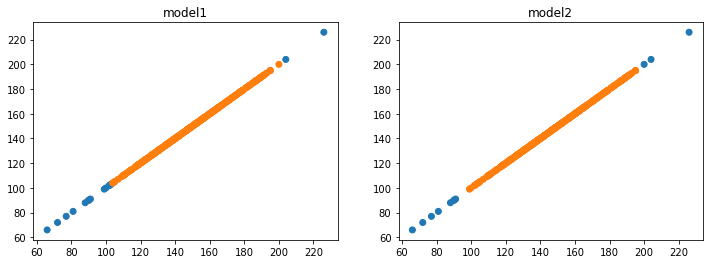

array offset: 93 152.65375973994932 [-1.85143439] [-0.70057376]


array offset: 94 148.51984753690093 [-1.85143439] [-0.70057376]


array offset: 95 151.21766703849 [-1.85143439] [-0.70057376]


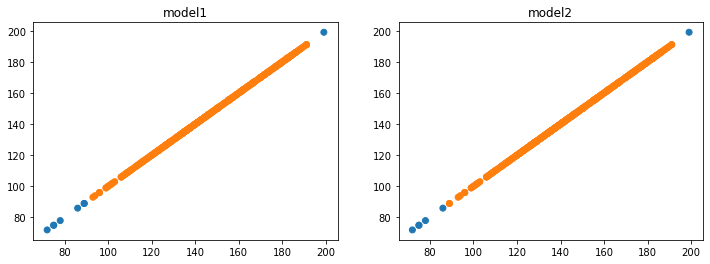

array offset: 96 151.77339367369066 [-1.88896714] [-0.71558686]


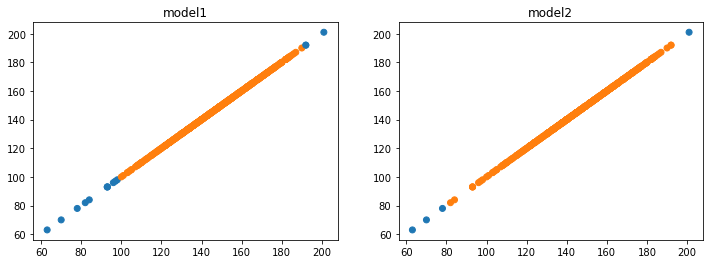

array offset: 97 152.4460193457471 [-1.88896714] [-0.71558686]


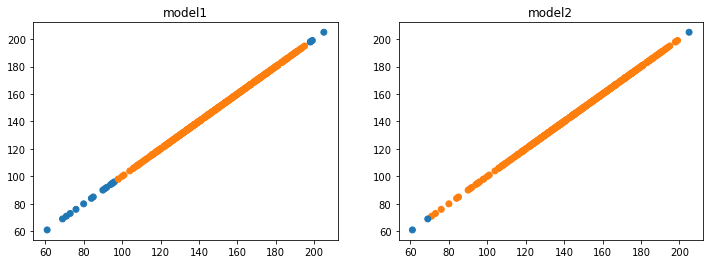

array offset: 98 149.4245503630153 [-1.88896714] [-0.71558686]


array offset: 99 149.7368621892717 [-1.78206358] [-0.67282543]


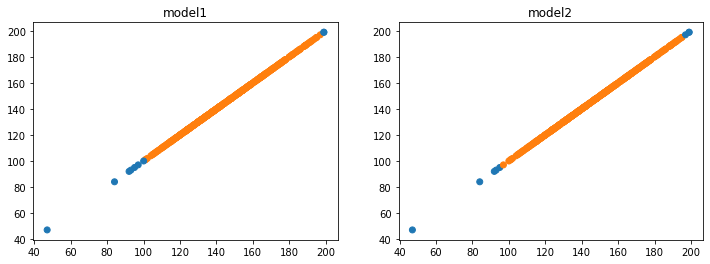

array offset: 100 150.71099811208953 [-1.78206358] [-0.67282543]


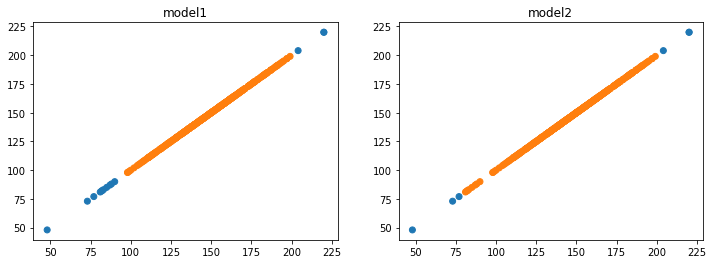

array offset: 101 154.53677661169417 [-1.78206358] [-0.67282543]


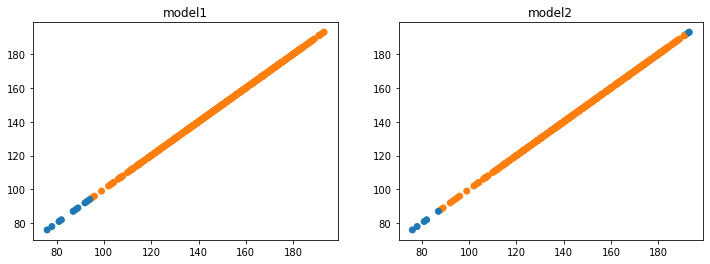

array offset: 102 149.22448348020868 [-1.86224249] [-0.704897]


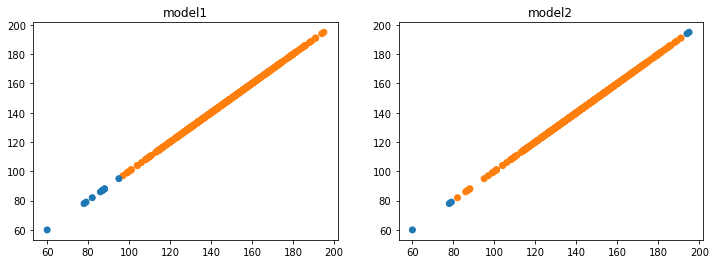

array offset: 103 150.0846693911768 [-1.86224249] [-0.704897]


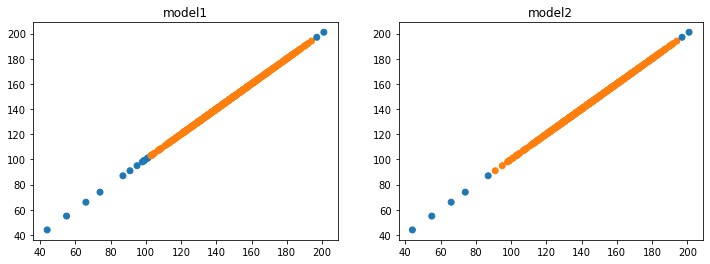

array offset: 104 148.59958585536796 [-1.86224249] [-0.704897]


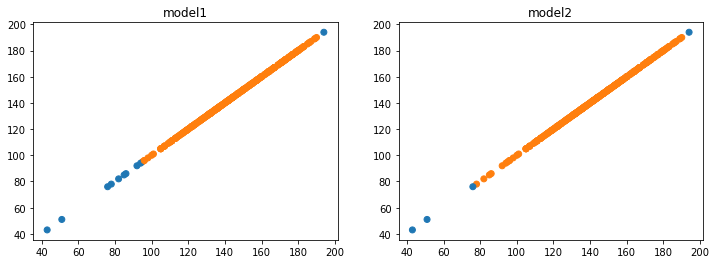

array offset: 105 151.72493389022068 [-1.70933596] [-0.64373438]


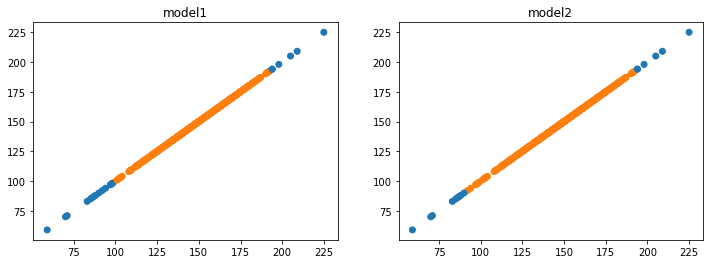

array offset: 106 154.45690181036176 [-1.70933596] [-0.64373438]


array offset: 107 148.18199506714168 [-1.70933596] [-0.64373438]


array offset: 108 156.16395331498828 [-1.84052542] [-0.69621017]


array offset: 109 156.08011049723757 [-1.84052542] [-0.69621017]


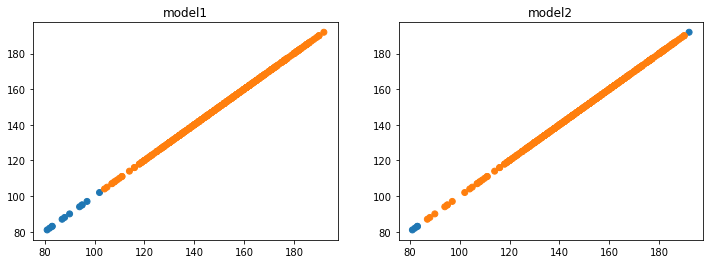

array offset: 110 156.4408038383979 [-1.84052542] [-0.69621017]


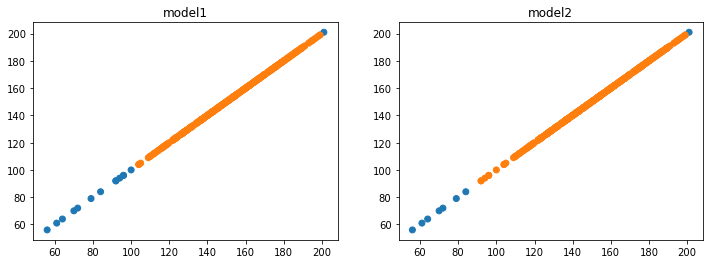

In [47]:
anomodels.check_pred_labels(
    thermal_data, module_labels, anomodels.lof, anomodels.isof)

異常タイプの確認テスト

[-0.98090764 -1.01494879 -1.00350631 -1.00300346 -0.98855203 -1.00534263
 -1.1704571  -0.97978767]
[-1.81203188]
[-0.44126541 -0.45660884 -0.4447773  -0.44985696 -0.42050002 -0.47848923
 -0.51562327 -0.44057276]
[-0.68481275]
0.0 0
63.jpg Normal
[-1.01354192 -1.07094441 -0.99262021 -1.02670384 -0.96095426 -1.1304224
 -1.02411083 -1.14541908]
[-1.81203188]
[-0.47903955 -0.52822831 -0.45017642 -0.49779582 -0.46988734 -0.47736275
 -0.46996936 -0.51301539]
[-0.68481275]
0.0 0
823.jpg Normal
[-0.97551562 -1.00300346 -0.97551562 -1.02411083 -1.15749919 -0.97707279
 -1.7539807  -1.01952999]
[-1.81203188]
[-0.47795607 -0.44985696 -0.47795607 -0.46996936 -0.51961381 -0.50572831
 -0.65436719 -0.49934508]
[-0.68481275]
0.0 0
4217.jpg Normal
[-1.14365274 -1.44040566 -1.18243636 -1.06710045 -1.20876707 -1.43192202
 -1.06101959 -1.00350631]
[-1.81203188]
[-0.51122751 -0.56989756 -0.53815896 -0.47776476 -0.54471205 -0.60159276
 -0.43839875 -0.4447773 ]
[-0.68481275]
0.0 0
3578.jpg Normal
[-1.44040566

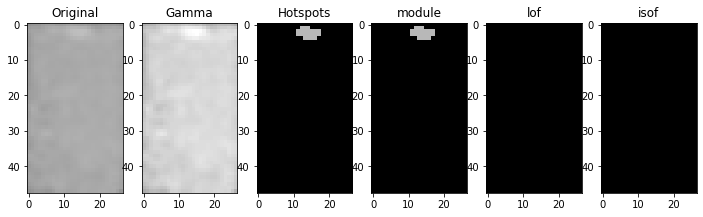

[-1.00912011 -1.04119395 -1.1304224  -0.97498623 -0.97130693 -0.9832935
 -1.02411083 -0.98933996]
[-1.81203188]
[-0.504804   -0.50576203 -0.47736275 -0.48426934 -0.42976806 -0.47471654
 -0.46996936 -0.51896086]
[-0.68481275]
0.0 0
2100.jpg Normal
[-0.98117565 -1.05604103 -0.98766166 -1.02504555 -0.97707279 -2.22561795
 -1.01354192 -0.97551562]
[-1.81203188]
[-0.47596746 -0.52474787 -0.44093542 -0.46845061 -0.50572831 -0.69615091
 -0.47903955 -0.47795607]
[-0.68481275]
0.0 0
4571.jpg Normal
[-1.06101959 -0.99262021 -1.44040566 -1.20876707 -0.98090764 -0.97749212
 -0.98863146 -1.0938805 ]
[-1.81203188]
[-0.43839875 -0.45017642 -0.56989756 -0.54471205 -0.44126541 -0.42575686
 -0.43035213 -0.48671537]
[-0.68481275]
0.0 0
1409.jpg Normal
[-1.05130659 -1.00246902 -0.97841493 -0.97831773 -1.05138867 -2.34575089
 -1.08580509 -0.97773531]
[-1.81203188]
[-0.49288688 -0.452547   -0.44853267 -0.42808272 -0.44039927 -0.6126184
 -0.47704401 -0.42206537]
[-0.68481275]
0.0 0
189.jpg Normal
[-0.9906738

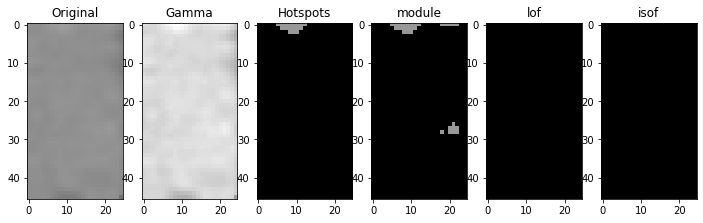

[-0.98766166 -1.1304224  -1.17243196 -1.02504555 -0.98090764 -0.97130693
 -1.0938805  -0.97749212]
[-1.81203188]
[-0.44093542 -0.47736275 -0.48910231 -0.46845061 -0.44126541 -0.42976806
 -0.48671537 -0.42575686]
[-0.68481275]
0.0 0
1421.jpg Normal
[-1.         -1.05981695 -0.98909198 -1.00624391 -1.         -0.98970404
 -1.52526746 -0.99798387]
[-1.78556933]
[-0.42911617 -0.48313859 -0.43991106 -0.43848412 -0.44310684 -0.42975833
 -0.62731852 -0.44062571]
[-0.67422773]
0.0 0
1347.jpg Normal
[-0.98889582 -0.97452542 -1.03096578 -0.99984466 -1.01743802 -0.9899698
 -0.98889582 -1.17242535]
[-1.81203188]
[-0.46868578 -0.46226195 -0.47782215 -0.48020586 -0.45979588 -0.45495036
 -0.48237449 -0.53193119]
[-0.68481275]
0.0 0
2896.jpg Normal
[-1.0207417  -0.95605245 -0.97313848 -1.04683044 -0.97490014 -1.03057593
 -0.99967338 -1.05939724]
[-1.81203188]
[-0.44668221 -0.44799279 -0.42965936 -0.44257401 -0.44995895 -0.46283126
 -0.43570549 -0.47006023]
[-0.68481275]
0.0 0
3550.jpg Normal
[-0.98329

[-0.43991106 -0.55693983 -0.47810553 -0.43582493 -0.47864718 -0.44310684
 -0.49248387 -0.44900819]
[-0.67422773]
0.0 0
3746.jpg Normal
[-1.77344019 -2.09064087 -2.70341492 -0.97841493 -1.31308301 -1.94645875
 -1.62925806 -1.83111304]
[-1.81203188]
[-0.59362374 -0.6800586  -0.78299262 -0.44853267 -0.52515993 -0.64412446
 -0.56239888 -0.60737774]
[-0.68481275]
0.0 2.0 0.0 1.0
2.0 6.0 0.6981317007977318 1.0
1.0 4.828427076339722 0.5390120952601716 1.0
17.0 27.656854152679443 0.2792886112105262 0.9061861348498871
2.0 8.828427076339722 0.3224580264151723 0.951284485472469
5.0 9.656854152679443 0.6737651190752144 0.9815524263882321
436.5 290.69343161582947 0.06491180333442843 0.440445774392156
0.0 0
4029.jpg Normal
[-1.06101959 -1.08918467 -1.00596073 -0.99262021 -1.06101959 -0.98863146
 -0.99262021 -1.11929699]
[-1.81203188]
[-0.43839875 -0.49986302 -0.46132158 -0.45017642 -0.43839875 -0.43035213
 -0.45017642 -0.48174776]
[-0.68481275]
0.0 0
3752.jpg Normal
[-0.99219245 -0.99302373 -1.04826

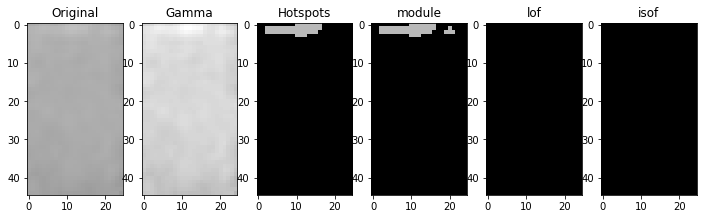

[-1.01618365 -0.99302373 -0.99219245 -0.96368284 -1.16260174 -1.00030459
 -0.97266854 -0.96368284]
[-1.78556933]
[-0.44352792 -0.42766823 -0.43984687 -0.42961937 -0.49200694 -0.44225979
 -0.41876947 -0.42961937]
[-0.67422773]
0.0 0
1810.jpg Normal
[-1.05480506 -0.9879473  -1.00864012 -1.02027535 -1.06012751 -1.01409791
 -1.06012751 -1.04268032]
[-1.78229778]
[-0.442669   -0.45709572 -0.41312753 -0.42905393 -0.44854614 -0.41903533
 -0.44854614 -0.45833467]
[-0.67291911]
0.0 0
3961.jpg Normal
[-1.011804   -1.01289133 -0.98680715 -1.02430921 -1.03417207 -1.
 -0.98676734 -0.98731079]
[-1.78556933]
[-0.43757529 -0.45449151 -0.42600379 -0.45799325 -0.46169005 -0.42891914
 -0.44956592 -0.42666542]
[-0.67422773]
0.0 0
3975.jpg Normal
[-1.07660142 -1.05222777 -1.08808739 -1.00789099 -0.9879005  -0.98053637
 -1.00870725 -0.97773531]
[-1.81203188]
[-0.44515626 -0.48041716 -0.43934716 -0.43421934 -0.46035004 -0.44074079
 -0.46774062 -0.42206537]
[-0.68481275]
0.0 0
1804.jpg Normal
[-1.01197238 -1.

[-1.51206984 -1.98500799 -1.00220845 -1.72522506 -1.46544214 -2.89508477
 -1.16543091 -2.42464063]
[-1.78556933]
[-0.57094184 -0.70168029 -0.46534443 -0.60404166 -0.58585571 -0.75438404
 -0.50911205 -0.77109516]
[-0.67422773]
323.5 121.8406194448471 0.27384193341406216 0.8273965026545873
323.5 121.8406194448471 0.27384193341406216 0.8273965026545873
115.0 263
3626.jpg Single-Hotspot


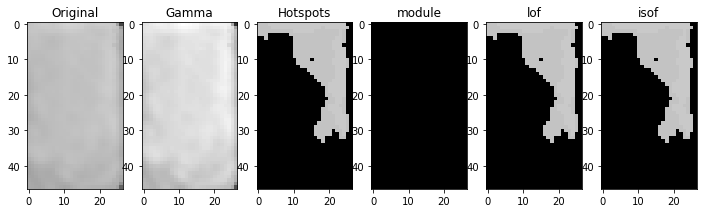

[-0.97707147 -0.98071161 -1.10983521 -0.99436217 -0.98053814 -3.71654371
 -1.0190485  -0.9731946 ]
[-1.78556933]
[-0.43118561 -0.44558501 -0.48891786 -0.43350994 -0.42756784 -0.76844021
 -0.45284606 -0.42618992]
[-0.67422773]
0.0 0
2538.jpg Normal
[-0.98559951 -1.09331572 -0.97313848 -1.03202712 -1.01093158 -1.31741973
 -1.00503434 -0.98093803]
[-1.81203188]
[-0.42541404 -0.46733657 -0.42965936 -0.45923392 -0.43726709 -0.53663919
 -0.43816419 -0.43640663]
[-0.68481275]
0.0 0
1031.jpg Normal
[-1.83138371 -1.07071143 -0.98547659 -1.05312707 -1.36023935 -0.9854746
 -1.01467549 -1.02670384]
[-1.81203188]
[-0.71760577 -0.51313694 -0.4971561  -0.50047207 -0.60766684 -0.49480703
 -0.49654491 -0.49779582]
[-0.68481275]
0.0 0.0 0 0
2.0 6.828427076339722 0.5390120920947209 0.9739111912819676
88.5 76.52691125869751 0.18989991262402436 0.8953000888256432
0.0 0
1757.jpg Normal
[-1.00334231 -0.9992333  -1.03553015 -1.03179331 -1.01832467 -0.99013867
 -1.01222319 -1.04796761]
[-1.78229778]
[-0.465773

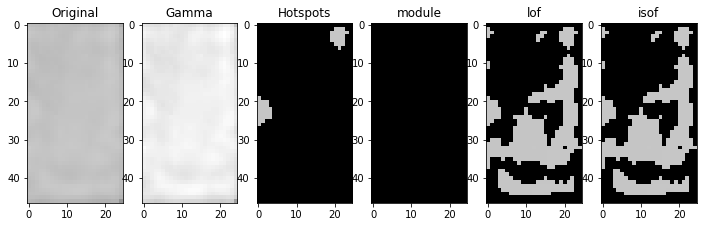

[-1.03243383 -1.02154172 -1.22499933 -0.96368284 -0.99302373 -1.00458858
 -0.98348389 -1.05628966]
[-1.78556933]
[-0.4423691  -0.44126273 -0.5100069  -0.42961937 -0.42766823 -0.45734604
 -0.43143875 -0.44601381]
[-0.67422773]
0.0 0
3829.jpg Normal
[-1.01409791 -1.00750646 -0.98675157 -1.39693748 -1.00890681 -1.00767606
 -0.9876978  -1.10191445]
[-1.78229778]
[-0.41903533 -0.45965759 -0.43921388 -0.53140612 -0.430929   -0.43258546
 -0.43729271 -0.47596283]
[-0.67291911]
0.0 0
572.jpg Normal
[-1.         -1.03417207 -0.99247313 -0.98327603 -1.20185759 -1.00606488
 -1.00232626 -0.96049979]
[-1.78556933]
[-0.45324799 -0.46169005 -0.46567731 -0.42759403 -0.51653534 -0.44834304
 -0.44286227 -0.43720089]
[-0.67422773]
0.0 0
566.jpg Normal
[-1.005419   -1.10291491 -0.99783917 -1.10864324 -1.00220845 -1.0438979
 -0.98730791 -0.98723773]
[-1.78556933]
[-0.46399909 -0.46166257 -0.4509173  -0.49828883 -0.46534443 -0.51685135
 -0.47265113 -0.45111996]
[-0.67422773]
0.0 0
3183.jpg Normal
[-1.1158918

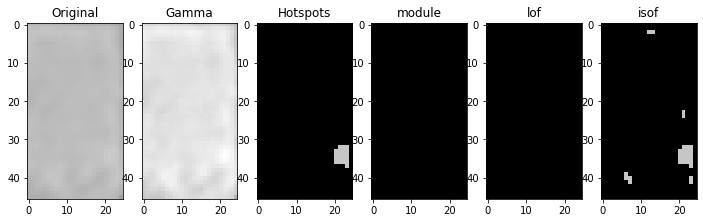

[-0.96167889 -0.98269024 -1.02775585 -1.82743296 -1.05761551 -0.96167889
 -1.01409791 -1.00767606]
[-1.78229778]
[-0.43799156 -0.4171397  -0.44349641 -0.58247148 -0.46863861 -0.43799156
 -0.41903533 -0.43258546]
[-0.67291911]
0.0 0
4377.jpg Normal
[-0.97597993 -0.99390163 -1.00331419 -0.99546125 -1.09032776 -1.01495176
 -1.08266618 -0.98559951]
[-1.81203188]
[-0.43833415 -0.46544862 -0.43723426 -0.44699847 -0.46700878 -0.43897852
 -0.45850218 -0.42541404]
[-0.68481275]
0.0 0
943.jpg Normal
[-0.98390567 -0.97362348 -1.05829031 -1.4258968  -1.15794872 -1.08842243
 -0.98223782 -0.96526093]
[-1.78556933]
[-0.45291191 -0.46012723 -0.47864718 -0.58089219 -0.4754501  -0.50697544
 -0.44779794 -0.44901331]
[-0.67422773]
0.0 0
5041.jpg Normal
[-1.1088032  -1.32676155 -1.20185759 -1.03367441 -1.68857973 -1.41988437
 -0.98331023 -1.1088032 ]
[-1.78556933]
[-0.48969424 -0.5545079  -0.51653534 -0.48082604 -0.59692848 -0.56968743
 -0.4585819  -0.48969424]
[-0.67422773]
0.0 0
3430.jpg Normal
[-1.01620

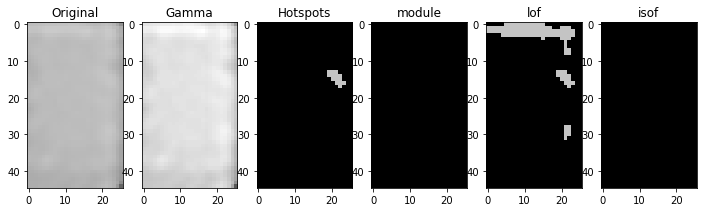

[-0.98519579 -0.98351597 -0.9879005  -1.01638126 -1.22329637 -1.00789099
 -1.00557797 -1.00171666]
[-1.81203188]
[-0.45360907 -0.43344164 -0.46035004 -0.46853031 -0.53696478 -0.43421934
 -0.46256897 -0.46462721]
[-0.68481275]
0.0 0
3356.jpg Normal
[-1.02154172 -1.62571013 -1.26602205 -0.99436217 -1.0190485  -1.34870856
 -2.19641731 -1.19274327]
[-1.78556933]
[-0.44126273 -0.56949391 -0.53475713 -0.43350994 -0.45284606 -0.57289336
 -0.63385773 -0.47774625]
[-0.67422773]
0.0 0
2048.jpg Normal
[-1.01645671 -1.032094   -1.02197565 -1.01083193 -1.00560008 -1.001438
 -1.1668883  -0.99476738]
[-1.78229778]
[-0.47375309 -0.46520973 -0.5001682  -0.42168792 -0.47053954 -0.45135404
 -0.52930104 -0.48341295]
[-0.67291911]
0.0 0
3342.jpg Normal
[-1.07764354 -0.98909198 -0.98970404 -1.05884518 -0.97681207 -1.05819051
 -0.97782476 -1.        ]
[-1.78556933]
[-0.4700572  -0.43991106 -0.42975833 -0.47984117 -0.42819259 -0.45267499
 -0.46919506 -0.42911617]
[-0.67422773]
0.0 0
1555.jpg Normal
[-0.975979

[-0.42766823 -0.48221346 -0.44225979 -0.69524312 -0.49200694 -0.44601381
 -0.44550573 -0.42756784]
[-0.67422773]
0.0 0
759.jpg Normal
[-2.05285161 -1.03179331 -1.14865972 -1.49636555 -1.00740483 -1.3875845
 -1.00252877 -1.01481833]
[-1.78229778]
[-0.63103147 -0.47411918 -0.50598381 -0.55628312 -0.45269016 -0.54979315
 -0.46080281 -0.46076581]
[-0.67291911]
0.0 0
995.jpg Normal
[-0.98723773 -0.98909198 -0.97362348 -1.05819051 -1.07764354 -0.98223782
 -0.98723773 -1.02697119]
[-1.78556933]
[-0.45111996 -0.43991106 -0.46012723 -0.45267499 -0.4700572  -0.44779794
 -0.45111996 -0.45537866]
[-0.67422773]
0.0 0
2908.jpg Normal
[-1.06535743 -1.06671297 -0.96960865 -0.99343099 -1.01416304 -1.0186427
 -0.99184536 -1.01865812]
[-1.78229778]
[-0.45140726 -0.44289616 -0.44620848 -0.41783663 -0.4347718  -0.42655893
 -0.4106592  -0.45584056]
[-0.67291911]
0.0 0
1554.jpg Normal
[-1.00789099 -0.99068548 -0.97831773 -1.02184763 -1.22329637 -0.98351597
 -1.08146398 -0.98519579]
[-1.81203188]
[-0.43421934

[-1.08266618 -0.95605245 -1.28203384 -1.01620636 -1.01495176 -0.97313848
 -1.00259427 -1.03084142]
[-1.81203188]
[-0.45850218 -0.44799279 -0.51048868 -0.45867579 -0.43897852 -0.42965936
 -0.44737236 -0.5087984 ]
[-0.68481275]
0.0 0
3425.jpg Normal
[-1.01109142 -1.01760493 -1.00235881 -0.98779927 -1.03874619 -0.9905662
 -0.96261324 -1.00938078]
[-1.76462601]
[-0.45017136 -0.44360568 -0.43245266 -0.47069859 -0.4856767  -0.45116057
 -0.44571751 -0.458891  ]
[-0.6658504]
0.0 0
5054.jpg Normal
[-0.98022262 -0.96267359 -1.25323993 -0.97894363 -1.00890681 -1.04142053
 -0.9786842  -1.00864012]
[-1.78229778]
[-0.42253876 -0.42595562 -0.49147648 -0.44679347 -0.430929   -0.46534758
 -0.4190343  -0.41312753]
[-0.67291911]
0.0 0
1232.jpg Normal
[-0.97799414 -1.07541898 -1.05698995 -1.03174243 -0.97132285 -0.95472406
 -0.98303455 -1.03581785]
[-1.76462601]
[-0.43195659 -0.48411932 -0.44929576 -0.43912817 -0.42094267 -0.41949927
 -0.41604631 -0.4414596 ]
[-0.6658504]
0.0 0
1226.jpg Normal
[-1.3994173

[-1.13232915 -0.99809454 -1.20861126 -1.00660792 -1.02320863 -1.08078162
 -1.06366918 -1.39941738]
[-1.78556933]
[-0.52915937 -0.50005741 -0.54572801 -0.49057827 -0.45715074 -0.53485409
 -0.53701853 -0.58655245]
[-0.67422773]
0.0 0
2288.jpg Normal
[-0.99967338 -1.2293078  -1.02988455 -0.97490014 -1.6534378  -1.03084142
 -1.0402063  -1.07440971]
[-1.81203188]
[-0.43570549 -0.55445869 -0.51127862 -0.44995895 -0.60046828 -0.5087984
 -0.50116057 -0.50786889]
[-0.68481275]
0.0 0
4821.jpg Normal
[-1.0023583  -0.99184536 -1.02163481 -1.07855941 -0.98547276 -1.0192843
 -0.97975837 -1.02157976]
[-1.78229778]
[-0.48273181 -0.4106592  -0.46160784 -0.47199023 -0.47513695 -0.5226675
 -0.45685691 -0.44532244]
[-0.67291911]
0.0 0
3196.jpg Normal
[-1.13437257 -0.98561735 -0.98912813 -1.01804869 -1.31347787 -0.98503808
 -1.01668097 -1.09134875]
[-1.76462601]
[-0.52158656 -0.49250112 -0.46346861 -0.46755895 -0.56317013 -0.48529265
 -0.49555039 -0.49050338]
[-0.6658504]
0.0 0
1959.jpg Normal
[-1.7051008 

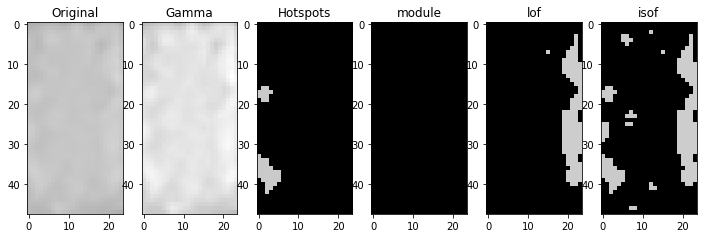

[-1.06698839 -0.98909198 -0.97681207 -0.97782476 -1.05608387 -1.18977956
 -1.03894208 -0.98970404]
[-1.78556933]
[-0.48234016 -0.43991106 -0.42819259 -0.46919506 -0.47810553 -0.55276309
 -0.47094454 -0.42975833]
[-0.67422773]
0.0 0
215.jpg Normal
[-0.99573428 -1.         -1.         -1.         -1.         -1.
 -0.98749641 -1.00096546]
[-1.79270085]
[-0.44479251 -0.42742834 -0.42800714 -0.44273109 -0.43775165 -0.43326006
 -0.45997178 -0.4315759 ]
[-0.67708034]
0.0 0
573.jpg Normal
[-1.01083159 -0.97803915 -1.44707297 -1.0044783  -1.00101411 -1.00672577
 -1.00821278 -0.99050829]
[-1.76462601]
[-0.48481454 -0.44330062 -0.52548681 -0.44361743 -0.47329866 -0.44468894
 -0.46775203 -0.46014159]
[-0.6658504]
0.0 0
3828.jpg Normal
[-1.01219361 -0.99238713 -0.97286737 -1.00832359 -0.99719482 -0.98732244
 -1.02363166 -0.99171992]
[-1.76462601]
[-0.435467   -0.44750328 -0.4329387  -0.47269599 -0.44182324 -0.43673585
 -0.45818341 -0.4356906 ]
[-0.6658504]
0.0 0
3800.jpg Normal
[-1.08660704 -1.0006

[-0.62851034 -0.42168792 -0.43258546 -0.45518333 -0.44349641 -0.4190343
 -0.55083833 -0.430929  ]
[-0.67291911]
0.0 0
375.jpg Normal
[-1.42527544 -1.03209795 -1.07211261 -1.79780506 -0.9932192  -1.25349394
 -1.09629775 -1.32991803]
[-1.79270085]
[-0.59799704 -0.45637378 -0.50874504 -0.67234441 -0.51647039 -0.57436217
 -0.50975007 -0.58487112]
[-0.67708034]
2.0 6.828427076339722 0.5390120920947209 1.0
58.0 44.14213538169861 0.37405131064159985 0.8953765155611233
3.0 6.828427076339722 0.8085181381420814 1.0
1.0 6.828427076339722 0.26950604604736045 0.9739111912819676
58.0 44.14213538169861 0.37405131064159985 0.8953765155611233
0.0 79
1839.jpg Single-Hotspot


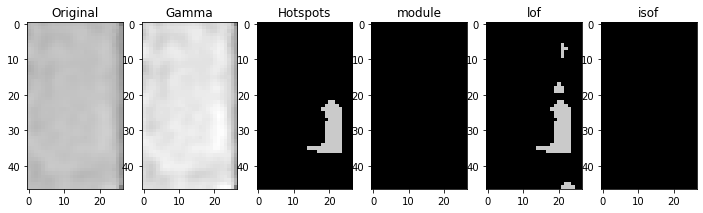

[-1.04199772 -1.04449191 -1.05109856 -1.00173781 -1.05417696 -1.05432344
 -0.98047769 -1.02195191]
[-1.76462601]
[-0.48746355 -0.4905687  -0.51284716 -0.46860939 -0.50020636 -0.49840658
 -0.43966633 -0.46726115]
[-0.6658504]
0.0 0
4799.jpg Normal
[-0.96261324 -0.97286737 -1.03174528 -0.98424486 -1.01044281 -1.02363166
 -0.99617522 -0.99719482]
[-1.76462601]
[-0.44571751 -0.4329387  -0.44446724 -0.44511728 -0.44767989 -0.45818341
 -0.46100788 -0.44182324]
[-0.6658504]
0.0 0
4941.jpg Normal
[-0.98659407 -1.01222319 -1.00851496 -1.00806833 -0.99726277 -1.06512176
 -0.99514965 -1.49636555]
[-1.78229778]
[-0.46940247 -0.44217001 -0.46675795 -0.45210603 -0.47235558 -0.47610232
 -0.46449639 -0.55628312]
[-0.67291911]
0.0 0
4955.jpg Normal
[-0.9788206  -1.12454093 -1.00187951 -6.52540637 -0.9923136  -1.01416304
 -2.225028   -0.97214286]
[-1.78229778]
[-0.42134077 -0.48687753 -0.41814775 -0.80231378 -0.4653155  -0.43219132
 -0.64650692 -0.41992834]
[-0.67291911]
0.0 0
361.jpg Normal
[-1.0426803

[-1.01273931 -1.70330214 -1.25208607 -1.07222187 -2.63078962 -1.03046341
 -1.07222187 -1.49475615]
[-1.76462601]
[-0.46255539 -0.63713524 -0.51863199 -0.49628866 -0.70015004 -0.48214633
 -0.49628866 -0.53241786]
[-0.6658504]
0.0 0
2465.jpg Normal
[-0.97286737 -1.0208345  -1.0096492  -1.01109142 -1.40209348 -0.997714
 -0.99925254 -0.99072151]
[-1.76462601]
[-0.4329387  -0.48840748 -0.45515885 -0.45017136 -0.54883396 -0.4380444
 -0.44576559 -0.44758492]
[-0.6658504]
0.0 0
177.jpg Normal
[-0.99302373 -1.0190485  -0.97707147 -1.14309773 -0.9731946  -2.62306202
 -0.98071161 -0.97814843]
[-1.78556933]
[-0.42766823 -0.45284606 -0.43118561 -0.4898123  -0.42618992 -0.67215681
 -0.44558501 -0.42504923]
[-0.67422773]
0.0 0
1385.jpg Normal
[-0.98269024 -1.25323993 -0.97894363 -1.02416753 -1.61613172 -0.96267359
 -1.01095606 -1.02416753]
[-1.78229778]
[-0.4171397  -0.49147648 -0.44679347 -0.44429533 -0.550088   -0.42595562
 -0.43175607 -0.44429533]
[-0.67291911]
0.0 0
611.jpg Normal
[-0.98796373 -0

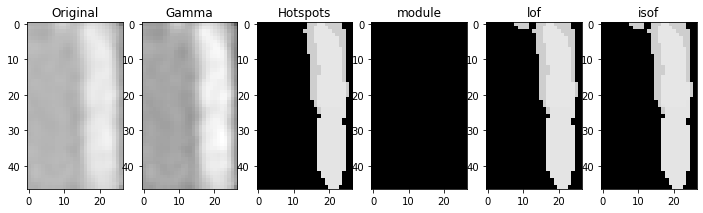

[-0.96368284 -1.0190485  -1.19274327 -0.98348389 -0.98053814 -1.01618365
 -1.90624575 -0.9731946 ]
[-1.78556933]
[-0.42961937 -0.45284606 -0.47774625 -0.43143875 -0.42756784 -0.44352792
 -0.61462808 -0.42618992]
[-0.67422773]
0.0 0
2129.jpg Normal
[-1.02831917 -1.03699476 -0.96257305 -0.99532831 -1.00300211 -1.04252666
 -0.98910538 -1.04252666]
[-1.78229778]
[-0.45040625 -0.51444288 -0.43448483 -0.47325388 -0.48879712 -0.46758792
 -0.45816587 -0.46758792]
[-0.67291911]
0.0 0
5120.jpg Normal
[-0.9776055  -1.39768482 -1.07986667 -1.02969971 -1.0255527  -0.98128553
 -1.05432344 -2.70017308]
[-1.76462601]
[-0.51757481 -0.52808974 -0.57015637 -0.44013795 -0.47532376 -0.50912241
 -0.49840658 -0.7149902 ]
[-0.6658504]
0.0 0
3551.jpg Normal
[-0.99756672 -1.05350083 -1.00765982 -1.0113002  -1.77120859 -0.98333329
 -1.04556403 -1.04073469]
[-1.85143439]
[-0.50926206 -0.44100258 -0.51105128 -0.46136184 -0.75510066 -0.53610479
 -0.4756118  -0.52260872]
[-0.70057376]
14.5 16.242640614509583 0.69066

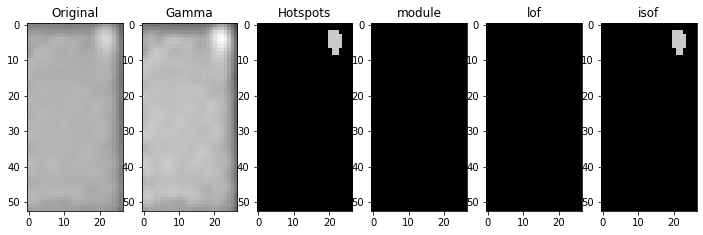

[-1.0877314  -1.48900719 -1.00832359 -1.4471548  -2.16943715 -1.15778284
 -0.99978086 -1.01232054]
[-1.76462601]
[-0.51369453 -0.57380515 -0.47269599 -0.54690372 -0.64362095 -0.50274748
 -0.46158177 -0.49025272]
[-0.6658504]
0.0 0
1346.jpg Normal
[-1.0622375  -1.01093158 -0.97669744 -1.26333243 -1.41739033 -1.00210713
 -1.00503434 -0.99546125]
[-1.81203188]
[-0.46842961 -0.43726709 -0.44387497 -0.51491927 -0.53934394 -0.45821213
 -0.43816419 -0.44699847]
[-0.68481275]
0.0 0
1352.jpg Normal
[-1.05097458 -1.0121663  -1.0724723  -1.01232241 -1.04415564 -0.97307221
 -1.04930167 -1.3035448 ]
[-1.76462601]
[-0.48782833 -0.48549852 -0.47976933 -0.49027311 -0.50415994 -0.43082801
 -0.52370432 -0.50187103]
[-0.6658504]
0.0 0
5134.jpg Normal
[-0.98512008 -1.03330678 -1.00389381 -1.001438   -1.75931176 -0.98133196
 -1.01559892 -0.96167889]
[-1.78229778]
[-0.44624219 -0.45518333 -0.49078891 -0.45135404 -0.57908368 -0.44017079
 -0.46646827 -0.43799156]
[-0.67291911]
0.0 0
3545.jpg Normal
[-0.996956

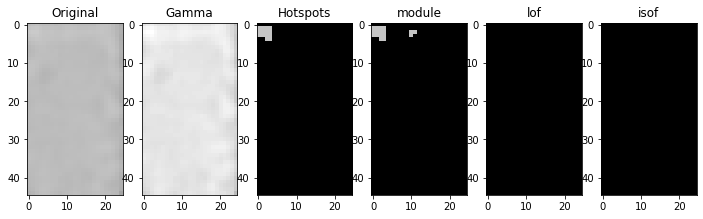

[-1.89462261 -1.21761898 -3.12032744 -2.3779447  -1.06094959 -1.45849415
 -2.2116819  -1.75542585]
[-1.78556933]
[-0.64851376 -0.54581934 -0.76382111 -0.70910916 -0.49985195 -0.59359971
 -0.68911905 -0.62116474]
[-0.67422773]
0.0 0.0 0 0
0.0 0.0 0 0
1.0 4.828427076339722 0.5390120952601716 1.0
473.0 131.74011421203613 0.34247977816949926 0.8020609862107384
473.0 131.74011421203613 0.34247977816949926 0.8020609862107384
110.0 395
4566.jpg Single-Hotspot


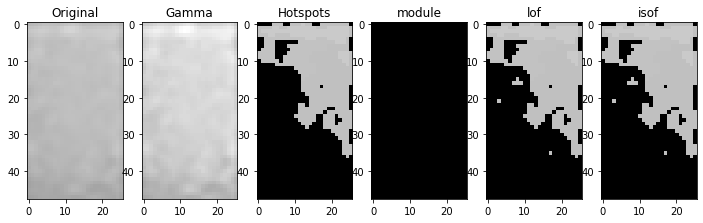

[-1.02462825 -0.99321771 -1.0044783  -0.98656671 -1.2095357  -0.97108328
 -1.04056045 -1.01804774]
[-1.76462601]
[-0.50118757 -0.52782368 -0.44361743 -0.52098429 -0.58479565 -0.49110227
 -0.50263585 -0.47602544]
[-0.6658504]
0.0 0
2103.jpg Normal
[-0.99719482 -0.99840392 -0.96261324 -1.01219361 -1.01504148 -0.997714
 -1.03174528 -0.98598939]
[-1.76462601]
[-0.44182324 -0.45607291 -0.44571751 -0.435467   -0.43580336 -0.4380444
 -0.44446724 -0.44164935]
[-0.6658504]
0.0 0
4572.jpg Normal
[-1.01070277 -1.02177138 -1.40012443 -0.97044637 -0.97044637 -1.01038634
 -1.00639194 -1.12727823]
[-1.85143439]
[-0.47994973 -0.44474539 -0.5584684  -0.42710592 -0.42710592 -0.46518991
 -0.44453112 -0.52097333]
[-0.70057376]
0.0 0
60.jpg Normal
[-0.9960561  -1.02259902 -0.9960561  -1.01428528 -1.01549806 -0.99904499
 -1.00061475 -1.08660704]
[-1.78229778]
[-0.4742295  -0.46158609 -0.4742295  -0.45042929 -0.49795849 -0.47670058
 -0.47113631 -0.52138384]
[-0.67291911]
0.0 0
820.jpg Normal
[-0.97707147 -1.

[-0.99013867 -1.3875845  -1.1303251  -1.         -1.01428528 -1.03553015
 -1.98315603 -1.01481833]
[-1.78229778]
[-0.43304054 -0.54979315 -0.50442842 -0.42679098 -0.45042929 -0.44317594
 -0.62219141 -0.46076581]
[-0.67291911]
0.0 0
161.jpg Normal
[-0.99895574 -1.15778284 -1.00832359 -0.99072151 -1.06362243 -1.35377641
 -1.0208345  -0.9995227 ]
[-1.76462601]
[-0.45516235 -0.50274748 -0.47269599 -0.44758492 -0.49675656 -0.55112713
 -0.48840748 -0.46219736]
[-0.6658504]
0.0 0
1393.jpg Normal
[-0.98163941 -1.46996067 -1.01004172 -0.98163941 -0.96585673 -1.20259537
 -2.31829465 -1.07990338]
[-1.85143439]
[-0.47372098 -0.59260976 -0.47633121 -0.47372098 -0.42846581 -0.52874281
 -0.72113313 -0.4977334 ]
[-0.70057376]
0.0 0
607.jpg Normal
[-1.2507022  -1.00637383 -1.00150836 -0.97704408 -1.013232   -0.99809454
 -1.01082937 -1.05628966]
[-1.78556933]
[-0.54464128 -0.46685125 -0.4982735  -0.44200412 -0.49138226 -0.50005741
 -0.49662642 -0.44601381]
[-0.67422773]
0.0 0
2842.jpg Normal
[-1.2532399

[-1.00259427 -1.04683044 -0.99386053 -0.95605245 -1.80093657 -1.02154585
 -1.09032776 -0.97291046]
[-1.81203188]
[-0.44737236 -0.44257401 -0.43585128 -0.44799279 -0.63683619 -0.46687898
 -0.46700878 -0.44358494]
[-0.68481275]
0.0 0
4770.jpg Normal
[-0.98285509 -1.00606488 -1.00232626 -1.03367441 -0.98731079 -1.
 -0.98327603 -1.00004895]
[-1.78556933]
[-0.45171067 -0.44834304 -0.44286227 -0.48082604 -0.42666542 -0.45324799
 -0.42759403 -0.43800869]
[-0.67422773]
0.0 0
2301.jpg Normal
[-1.0527064  -0.97391008 -1.1412943  -1.34265241 -1.16407273 -1.8065505
 -1.00039596 -1.02196013]
[-1.76462601]
[-0.4785817  -0.43264444 -0.50252855 -0.59242478 -0.51613213 -0.65471584
 -0.44395758 -0.44416025]
[-0.6658504]
0.0 0
1620.jpg Normal
[-1.0555928  -1.0119823  -1.         -1.03209795 -2.0910251  -1.03285711
 -1.02683363 -1.00096546]
[-1.79270085]
[-0.45552453 -0.45148742 -0.44269252 -0.45637378 -0.65946778 -0.45509011
 -0.46928346 -0.4315759 ]
[-0.67708034]
0.0 0
4758.jpg Normal
[-0.98786562 -0.98

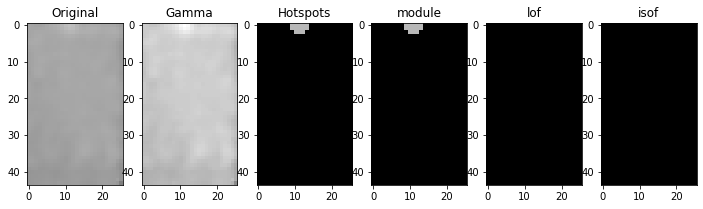

[-1.04449191 -1.05417696 -0.98128553 -1.00431316 -1.00237005 -1.44707297
 -1.11387822 -0.9776055 ]
[-1.76462601]
[-0.4905687  -0.50020636 -0.50912241 -0.53715738 -0.50043187 -0.52548681
 -0.57584343 -0.51757481]
[-0.6658504]
0.0 0
1634.jpg Normal
[-0.98763958 -0.99840392 -0.98424486 -0.98424486 -1.09134875 -0.98503808
 -0.99771011 -1.03874619]
[-1.76462601]
[-0.48604666 -0.45607291 -0.44511728 -0.44511728 -0.49050338 -0.48529265
 -0.43541777 -0.4856767 ]
[-0.6658504]
0.0 0
1807.jpg Normal
[-0.99386053 -1.04683044 -1.0622375  -0.97417624 -1.07440971 -0.97417624
 -1.05939724 -1.03667568]
[-1.81203188]
[-0.43585128 -0.44257401 -0.46842961 -0.4243965  -0.50786889 -0.4243965
 -0.47006023 -0.46632444]
[-0.68481275]
0.0 0
3976.jpg Normal
[-1.00789466 -1.0865256  -1.99675413 -0.99436217 -0.99219245 -1.36644176
 -2.92328421 -1.10099645]
[-1.78556933]
[-0.41430069 -0.48221346 -0.62500983 -0.43350994 -0.43984687 -0.58003074
 -0.69524312 -0.48678516]
[-0.67422773]
0.0 0
439.jpg Normal
[-0.99630342

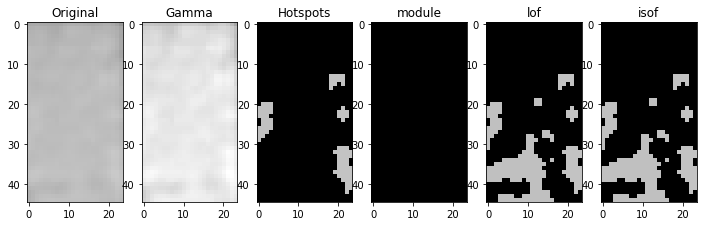

[-1.15116328 -1.03310333 -1.00320383 -0.98303455 -1.03468076 -1.02001224
 -1.08085805 -1.21430339]
[-1.76462601]
[-0.50018086 -0.44374724 -0.42945586 -0.41604631 -0.50577264 -0.43776218
 -0.46246535 -0.56994606]
[-0.6658504]
12.0 13.656854152679443 0.8085181381420814 0.9869555956409838
12.0 13.656854152679443 0.8085181381420814 0.9869555956409838
3.0 16
4943.jpg Single-Hotspot


[-1.         -1.         -1.07477552 -1.         -3.02418584 -0.99639827
 -0.9953439  -0.98667129]
[-1.79270085]
[-0.44225244 -0.43326006 -0.48420011 -0.42857308 -0.76090976 -0.42632054
 -0.47116856 -0.44575933]
[-0.67708034]
0.0 0
377.jpg Normal
[-1.         -0.98587903 -1.00606488 -1.25459404 -0.98327603 -0.98680715
 -0.9764994  -1.        ]
[-1.78556933]
[-0.45324799 -0.45176826 -0.44834304 -0.54997464 -0.42759403 -0.42600379
 -0.45224547 -0.44741616]
[-0.67422773]
0.0 0
1185.jpg Normal
[-1.05413872 -0.98794494 -2.43671721 -0.97266854 -1.12082205 -0.99436217
 -0.98053814 -1.62571013]
[-1.78556933]
[-0.47379168 -0.4464756  -0.66368737 -0.41876947 -0.48636753 -0.43350994
 -0.42756784 -0.56949391]
[-0.67422773]
0.0 0
411.jpg Normal
[-0.99313256 -1.08055103 -0.99809631 -1.10121298 -1.03007858 -0.98922784
 -1.00643982 -1.02215365]
[-1.84544637]
[-0.52021338 -0.50246191 -0.51158526 -0.54785427 -0.53389847 -0.45410068
 -0.52915491 -0.5068498 ]
[-0.69817855]
0.0 0
3792.jpg Normal
[-1.356976

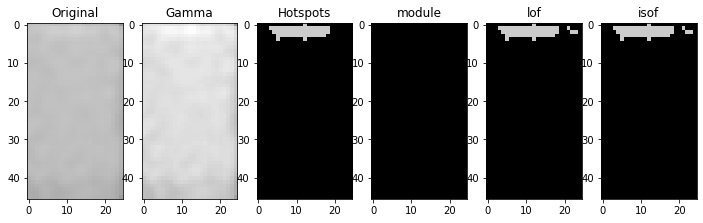

[-1.60355986 -1.01645671 -1.27469314 -1.0463931  -1.47384824 -1.87433549
 -2.14218832 -0.98512008]
[-1.78229778]
[-0.63725407 -0.47375309 -0.54844201 -0.50041835 -0.61708631 -0.60514932
 -0.72305852 -0.44624219]
[-0.67291911]
0.0 2.0 0.0 1.0
8.5 12.242640614509583 0.7126537717491254 0.9708975320849444
4.5 16.242640614509583 0.21434290252196572 0.9229235772869683
0.0 2.0 0.0 1.0
0.0 0.0 0 0
37.5 50.72792184352875 0.1831247267332285 0.9514518926831522
0.0 2.0 0.0 1.0
0.0 0.0 0 0
8.5 12.242640614509583 0.7126537717491254 0.9708975320849444
0.0 0.0 0 0
0.0 15
1768.jpg Single-Hotspot


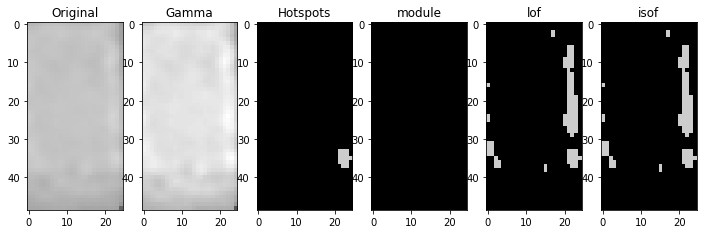

[-1.04187313 -1.00077488 -1.00131448 -0.99240257 -0.99184498 -1.02970695
 -1.15520444 -1.05473844]
[-1.79270085]
[-0.52479361 -0.49221888 -0.4487418  -0.48420323 -0.50404839 -0.50674703
 -0.54105646 -0.51368499]
[-0.67708034]
0.0 0
4176.jpg Normal
[-0.98633336 -1.00344805 -0.968697   -0.9693362  -0.98713884 -1.01651176
 -1.51795023 -0.96578437]
[-1.79270085]
[-0.42453486 -0.43856973 -0.44304194 -0.4251742  -0.42310153 -0.43028339
 -0.6236099  -0.42596394]
[-0.67708034]
0.0 0
3619.jpg Normal
[-1.02014904 -1.02177138 -1.02580023 -1.11369928 -1.02862823 -0.96585673
 -1.01004172 -0.97950914]
[-1.85143439]
[-0.47700309 -0.44474539 -0.4770968  -0.51604397 -0.49299978 -0.42846581
 -0.47633121 -0.47400659]
[-0.70057376]
0.0 0
2507.jpg Normal
[-0.99978086 -0.99840392 -0.99925254 -0.99993711 -0.99072151 -0.97286737
 -1.31310691 -0.9859576 ]
[-1.76462601]
[-0.46158177 -0.45607291 -0.44576559 -0.45947367 -0.44758492 -0.4329387
 -0.54626221 -0.43467364]
[-0.6658504]
0.0 0
4162.jpg Normal
[-1.035530

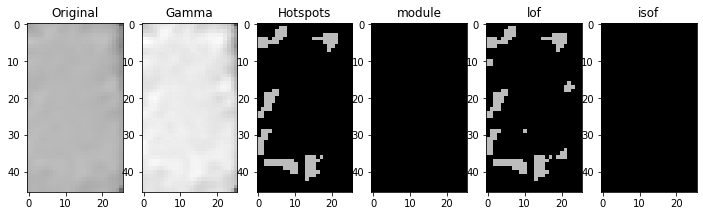

[-0.9886302  -1.02472005 -1.15520444 -0.99007735 -1.00063683 -0.99035844
 -0.99007735 -1.00111391]
[-1.79270085]
[-0.49469014 -0.47059608 -0.54105646 -0.48428654 -0.49694355 -0.50579521
 -0.48428654 -0.44593525]
[-0.67708034]
0.0 0
3143.jpg Normal
[-1.18956546 -1.02525493 -1.06422851 -1.36477277 -1.04379435 -1.01187733
 -1.10679945 -0.96647328]
[-1.79270085]
[-0.52006206 -0.44679897 -0.50503489 -0.59474994 -0.45920102 -0.44900144
 -0.52231467 -0.43160644]
[-0.67708034]
0.0 0
3625.jpg Normal
[-1.01222319 -1.49636555 -1.01222319 -0.99260401 -0.96257305 -1.
 -1.01842027 -1.07040803]
[-1.78229778]
[-0.44217001 -0.55628312 -0.44217001 -0.42760358 -0.43448483 -0.447352
 -0.45573924 -0.46412227]
[-0.67291911]
0.0 0
1032.jpg Normal
[-0.9786842  -1.15656366 -1.01715897 -0.98022262 -1.61613172 -0.9786842
 -1.00744458 -0.98022262]
[-1.78229778]
[-0.4190343  -0.48014964 -0.43376209 -0.42253876 -0.550088   -0.4190343
 -0.45021312 -0.42253876]
[-0.67291911]
0.0 0
1026.jpg Normal
[-1.0391075  -1.0130

[-0.9886302  -1.09629775 -0.99007735 -1.02305542 -1.47613272 -1.01960775
 -1.00077488 -1.03360118]
[-1.79270085]
[-0.49469014 -0.50975007 -0.48428654 -0.50789236 -0.61240436 -0.45524325
 -0.49221888 -0.51897437]
[-0.67708034]
0.0 0
3157.jpg Normal
[-0.99252966 -1.03146498 -0.98676734 -1.00606488 -0.99486945 -1.03038465
 -1.02165615 -1.07922678]
[-1.78556933]
[-0.45375279 -0.48462729 -0.44956592 -0.44834304 -0.42363258 -0.45438882
 -0.46124214 -0.47179977]
[-0.67422773]
0.0 0
4638.jpg Normal
[-1.00688962 -1.18055063 -1.01221721 -1.013232   -1.03588055 -1.10920339
 -1.00660792 -1.50388093]
[-1.78556933]
[-0.45909193 -0.55897771 -0.50964775 -0.49138226 -0.43850569 -0.53656604
 -0.49057827 -0.63369151]
[-0.67422773]
0.0 0
1998.jpg Normal
[-1.01543106 -1.53999566 -1.04868468 -1.66341216 -2.3634813  -1.34829666
 -1.04868468 -1.22117036]
[-1.76462601]
[-0.46159377 -0.54725092 -0.48992929 -0.62745302 -0.64546027 -0.513366
 -0.48992929 -0.53588277]
[-0.6658504]
0.0 0
1740.jpg Normal
[-0.9887849

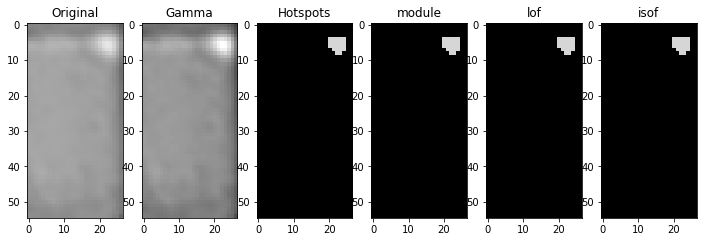

[-0.98481676 -1.01726811 -1.00058562 -1.07040803 -1.01428528 -1.01714081
 -1.22790021 -1.01222319]
[-1.78229778]
[-0.42530341 -0.4690747  -0.46654634 -0.46412227 -0.45042929 -0.46367645
 -0.52262621 -0.44217001]
[-0.67291911]
0.0 0
940.jpg Normal
[-0.98327603 -0.99095265 -0.99486945 -1.00232626 -1.01767376 -1.20185759
 -0.98731079 -1.00004895]
[-1.78556933]
[-0.42759403 -0.46781107 -0.42363258 -0.44286227 -0.46876904 -0.51653534
 -0.42666542 -0.43800869]
[-0.67422773]
0.0 0
798.jpg Normal
[-1.00672577 -0.97803915 -1.0044783  -1.0155767  -1.00821278 -1.02969971
 -0.9798464  -0.9798464 ]
[-1.76462601]
[-0.44468894 -0.44330062 -0.44361743 -0.46961166 -0.46775203 -0.44013795
 -0.4276275  -0.4276275 ]
[-0.6658504]
0.0 0
4412.jpg Normal
[-1.03624038 -1.16050733 -1.00789466 -1.04404817 -1.00812261 -1.00458858
 -0.97704408 -1.00812261]
[-1.78556933]
[-0.45860002 -0.54534475 -0.41430069 -0.4839168  -0.48808953 -0.45734604
 -0.44200412 -0.48808953]
[-0.67422773]
0.0 0
2063.jpg Normal
[-0.9980440

[-1.06412444 -1.25920234 -1.92111727 -1.09877915 -1.45980543 -1.18603045
 -1.01630747 -1.45980543]
[-1.84544637]
[-0.50706028 -0.53748064 -0.61640873 -0.5308622  -0.54438018 -0.53683194
 -0.47260606 -0.54438018]
[-0.69817855]
0.0 0
767.jpg Normal
[-1.18956546 -0.98733522 -1.00344805 -1.57686584 -1.15267971 -1.00240276
 -1.02859886 -1.02687446]
[-1.79270085]
[-0.52006206 -0.48514902 -0.43856973 -0.64444968 -0.51401905 -0.47172001
 -0.48515035 -0.44805307]
[-0.67708034]
0.0 0
1595.jpg Normal
[-1.05945717 -1.00682253 -1.23086509 -0.99252966 -1.00491484 -1.02165615
 -1.06094959 -0.98676734]
[-1.78556933]
[-0.47851544 -0.43443037 -0.52946361 -0.45375279 -0.46405372 -0.46124214
 -0.49985195 -0.44956592]
[-0.67422773]
0.0 0
3382.jpg Normal
[-1.2095357  -0.98656671 -1.11387822 -1.06099758 -1.09049528 -1.03245067
 -1.00431316 -1.40935355]
[-1.76462601]
[-0.58479565 -0.52098429 -0.57584343 -0.49797753 -0.5744083  -0.54868252
 -0.53715738 -0.70522426]
[-0.6658504]
3.0 6.828427076339722 0.80851813

[-0.98397128 -0.9731946  -0.98053814 -0.96368284 -1.01746312 -0.97266854
 -1.0136741  -0.97704408]
[-1.78556933]
[-0.45066442 -0.42618992 -0.42756784 -0.42961937 -0.4560239  -0.41876947
 -0.49091288 -0.44200412]
[-0.67422773]
0.0 0
3396.jpg Normal
[-1.00744458 -1.01095606 -1.05336024 -1.01715897 -1.02027535 -2.58191957
 -1.02027535 -0.9876978 ]
[-1.78229778]
[-0.45021312 -0.43175607 -0.46422243 -0.43376209 -0.42905393 -0.65312235
 -0.42905393 -0.43729271]
[-0.67291911]
0.0 0
1581.jpg Normal
[-1.00676809 -1.07990338 -0.97950914 -1.01004172 -1.27917988 -0.96585673
 -1.04848533 -1.0020196 ]
[-1.85143439]
[-0.44353903 -0.4977334  -0.47400659 -0.47633121 -0.54479618 -0.42846581
 -0.47116897 -0.46352012]
[-0.70057376]
0.0 0
773.jpg Normal
[-1.32938363 -1.12218747 -1.26904211 -1.03166296 -1.23984933 -1.10015838
 -1.13796821 -1.49444906]
[-1.78229778]
[-0.56767845 -0.54156671 -0.56154141 -0.49300845 -0.56466285 -0.53488365
 -0.53948133 -0.59539916]
[-0.67291911]
0.0 0
2936.jpg Normal
[-0.99870

[-0.44750039 -0.43522198 -0.45116057 -0.44767989 -0.44360568 -0.44360568
 -0.47069859 -0.435467  ]
[-0.6658504]
0.0 0
4361.jpg Normal
[-1.0260066  -1.03646561 -1.00676809 -1.02862823 -1.09423781 -0.96585673
 -0.98881931 -1.0020196 ]
[-1.85143439]
[-0.48339465 -0.47154075 -0.44353903 -0.49299978 -0.51691421 -0.42846581
 -0.46729189 -0.46352012]
[-0.70057376]
0.0 0
2710.jpg Normal
[-0.96299931 -1.0021407  -1.00384282 -1.00102174 -0.9941737  -0.96299931
 -1.00935368 -1.76265578]
[-1.84544637]
[-0.43136953 -0.44889002 -0.43391465 -0.47372355 -0.43738174 -0.43136953
 -0.43961484 -0.60481182]
[-0.69817855]
0.0 0
1219.jpg Normal
[-1.01428528 -1.01842027 -1.7231304  -1.14865972 -2.5170882  -1.01428528
 -1.22790021 -1.01842027]
[-1.78229778]
[-0.45042929 -0.45573924 -0.59621821 -0.50598381 -0.68096254 -0.45042929
 -0.52262621 -0.45573924]
[-0.67291911]
0.0 0
955.jpg Normal
[-0.99240257 -1.0180356  -0.99007735 -0.99184498 -1.02683363 -0.98695531
 -0.99035844 -1.02628445]
[-1.79270085]
[-0.484203

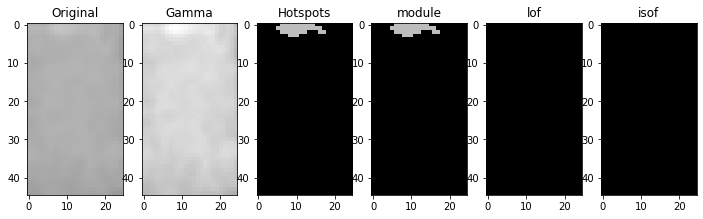

[-1.00150836 -1.02320863 -1.0190485  -1.00688962 -1.02320863 -1.0122477
 -1.02918017 -0.96368284]
[-1.78556933]
[-0.4982735  -0.45715074 -0.45284606 -0.45909193 -0.45715074 -0.49970346
 -0.48326404 -0.42961937]
[-0.67422773]
0.0 0
3181.jpg Normal
[-0.98180429 -1.02014904 -1.05195049 -1.04839037 -1.06048121 -1.03227335
 -0.99756672 -1.26670451]
[-1.85143439]
[-0.50323783 -0.47700309 -0.53742212 -0.5215216  -0.51629801 -0.54366143
 -0.50926206 -0.61943432]
[-0.70057376]
0.0 0
4188.jpg Normal
[-0.99260401 -1.78966053 -1.00252877 -0.9992333  -1.14865972 -1.01966922
 -0.96257305 -1.00806833]
[-1.78229778]
[-0.42760358 -0.60156887 -0.46080281 -0.43523322 -0.50598381 -0.47673224
 -0.43448483 -0.45210603]
[-0.67291911]
0.0 0
564.jpg Normal
[-0.98327603 -1.49238855 -0.99247313 -0.9764994  -1.00606488 -1.00232626
 -1.12863669 -1.20185759]
[-1.78556933]
[-0.42759403 -0.57352875 -0.46567731 -0.45224547 -0.44834304 -0.44286227
 -0.48641449 -0.51653534]
[-0.67422773]
0.0 0
3817.jpg Normal
[-0.997686

[-1.00935368 -1.29235875 -1.01952928 -0.99620879 -2.21995773 -1.01624747
 -1.00126198 -1.03120836]
[-1.84544637]
[-0.43961484 -0.54805939 -0.46273169 -0.43679627 -0.66608623 -0.4552784
 -0.45139018 -0.46483507]
[-0.69817855]
0.0 0
558.jpg Normal
[-1.0180356  -0.99999328 -1.0119823  -1.         -1.0555928  -1.
 -0.99999328 -0.97153375]
[-1.79270085]
[-0.49321248 -0.43397794 -0.45148742 -0.42857308 -0.45552453 -0.44225244
 -0.43397794 -0.43828114]
[-0.67708034]
0.0 0
3803.jpg Normal
[-0.99030657 -0.98091422 -1.01002264 -0.96647328 -0.97025323 -0.968697
 -0.96647328 -1.18956546]
[-1.79270085]
[-0.46294559 -0.4692012  -0.43676417 -0.43160644 -0.41877142 -0.44304194
 -0.43160644 -0.52006206]
[-0.67708034]
0.0 0
3630.jpg Normal
[-1.37810681 -1.00004895 -1.00004895 -1.03367441 -1.00682253 -0.9764994
 -1.         -0.99486945]
[-1.78556933]
[-0.55875632 -0.43800869 -0.43800869 -0.48082604 -0.43443037 -0.45224547
 -0.44741616 -0.42363258]
[-0.67422773]
0.0 0
1027.jpg Normal
[-0.9826582  -1.13726

[-1.00340275 -0.99888167 -1.00042919 -1.8422728  -1.         -1.00367656
 -1.         -0.98658955]
[-1.73581688]
[-0.47228733 -0.47632553 -0.45076734 -0.62069422 -0.43831965 -0.43703457
 -0.4473942  -0.45827368]
[-0.65432675]
0.0 0
3963.jpg Normal
[-0.9798464  -1.01349939 -0.98047769 -0.98581735 -0.99643082 -1.02969971
 -1.00200654 -0.99028709]
[-1.76462601]
[-0.4276275  -0.46094424 -0.43966633 -0.47179346 -0.46462045 -0.44013795
 -0.47904461 -0.47347088]
[-0.6658504]
0.0 0
438.jpg Normal
[-1.00340966 -0.96574139 -0.98878491 -0.99620879 -1.05055155 -1.01229371
 -0.96133918 -1.00384282]
[-1.84544637]
[-0.48073074 -0.44210652 -0.43629342 -0.43679627 -0.46658674 -0.44767592
 -0.43903548 -0.43391465]
[-0.69817855]
0.0 0
1812.jpg Normal
[-1.2507022  -1.01221721 -1.03551352 -1.00491496 -1.13232915 -1.01270652
 -1.16050733 -1.04826646]
[-1.78556933]
[-0.54464128 -0.50964775 -0.51599475 -0.50511499 -0.52915937 -0.46543971
 -0.54534475 -0.46844797]
[-0.67422773]
0.0 0
1806.jpg Normal
[-1.016456

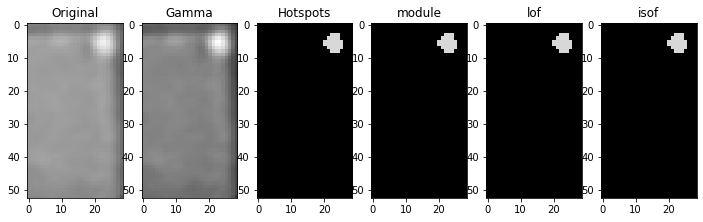

[-1.07258614 -1.02027535 -0.96686679 -1.1668883  -0.99476738 -1.36359337
 -1.06012751 -1.20439672]
[-1.78229778]
[-0.50006223 -0.42905393 -0.45284173 -0.52930104 -0.48341295 -0.582252
 -0.44854614 -0.48870918]
[-0.67291911]
0.0 0
4003.jpg Normal
[-1.0524143  -1.         -1.67158004 -0.99639827 -1.25142591 -1.
 -0.97153375 -1.00764881]
[-1.79270085]
[-0.47226155 -0.43121018 -0.59402381 -0.42632054 -0.53325205 -0.42742834
 -0.43828114 -0.46201216]
[-0.67708034]
0.0 0
2472.jpg Normal
[-1.         -1.         -0.98499942 -0.99918033 -1.         -1.
 -0.98687862 -1.01130897]
[-1.73581688]
[-0.4473942  -0.45999401 -0.46260917 -0.43846167 -0.43831965 -0.44660197
 -0.44406521 -0.45307809]
[-0.65432675]
0.0 0
160.jpg Normal
[-1.00123983 -0.98053814 -1.01746312 -1.02154172 -1.00789466 -1.03624038
 -0.97266854 -1.03243383]
[-1.78556933]
[-0.47361555 -0.42756784 -0.4560239  -0.44126273 -0.41430069 -0.45860002
 -0.41876947 -0.4423691 ]
[-0.67422773]
0.0 0
3585.jpg Normal
[-1.05761551 -0.99630118 -0

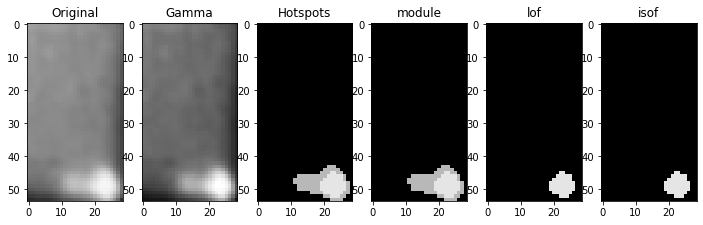

[-1.01167317 -1.45980543 -1.00724713 -2.11056077 -0.98878491 -1.01229371
 -1.06412444 -1.01303163]
[-1.84544637]
[-0.44618021 -0.54438018 -0.44639406 -0.65327113 -0.43629342 -0.44767592
 -0.50706028 -0.48828586]
[-0.69817855]
0.0 0
612.jpg Normal
[-0.99756672 -1.19229923 -1.00765982 -1.63559561 -1.10904024 -1.10904024
 -1.35925741 -1.05195049]
[-1.85143439]
[-0.50926206 -0.60487105 -0.51105128 -0.62166869 -0.56386704 -0.56386704
 -0.66167275 -0.53742212]
[-0.70057376]
0.0 0
3591.jpg Normal
[-1.00968355 -0.98866766 -0.98068174 -1.00096546 -0.98829098 -0.9886302
 -1.0119823  -1.05473844]
[-1.79270085]
[-0.48842646 -0.4351208  -0.51382818 -0.4315759  -0.49292071 -0.49469014
 -0.45148742 -0.51368499]
[-0.67708034]
0.0 0
2857.jpg Normal
[-0.99918033 -0.99116123 -0.98687862 -1.01130897 -0.99935422 -1.1722738
 -1.02160113 -1.05984164]
[-1.73581688]
[-0.43846167 -0.45943112 -0.44406521 -0.45307809 -0.46418588 -0.50643104
 -0.45727717 -0.5142087 ]
[-0.65432675]
0.0 0
4598.jpg Normal
[-2.9043557

[-0.97044637 -0.98163941 -1.24863704 -1.01004172 -1.01038634 -1.17431271
 -0.99001283 -1.05477652]
[-1.85143439]
[-0.42710592 -0.47372098 -0.55570398 -0.47633121 -0.46518991 -0.52392394
 -0.48250758 -0.48459751]
[-0.70057376]
0.0 0
2664.jpg Normal
[-1.01960775 -0.97299967 -1.         -1.00111391 -1.31695814 -2.26907708
 -1.02472005 -0.99240257]
[-1.79270085]
[-0.45524325 -0.47403045 -0.44225244 -0.44593525 -0.55089041 -0.67850446
 -0.47059608 -0.48420323]
[-0.67708034]
0.0 0
4215.jpg Normal
[-0.98552393 -1.00275161 -1.         -1.00367656 -0.99918033 -0.99652615
 -2.63793093 -1.00042919]
[-1.73581688]
[-0.4489008  -0.45472031 -0.4473942  -0.43703457 -0.43846167 -0.45717334
 -0.69385177 -0.45076734]
[-0.65432675]
0.0 0
821.jpg Normal
[-0.98878491 -1.05568966 -0.96133918 -1.00653465 -1.00384282 -1.00386632
 -0.96299931 -1.00653465]
[-1.84544637]
[-0.43629342 -0.49991773 -0.43903548 -0.45749944 -0.43391465 -0.44605186
 -0.43136953 -0.45749944]
[-0.69817855]
0.0 0
61.jpg Normal
[-1.0073710

[-0.99240257 -1.02797835 -1.0119823  -0.9932192  -2.03565527 -0.9969562
 -0.99573428 -0.99240257]
[-1.79270085]
[-0.48420323 -0.48930556 -0.45148742 -0.51647039 -0.65573663 -0.49357084
 -0.44479251 -0.48420323]
[-0.67708034]
0.0 0
5127.jpg Normal
[-1.00275161 -0.9989071  -1.14446936 -0.98658955 -1.00620799 -1.
 -1.55358645 -0.99317793]
[-1.73581688]
[-0.45472031 -0.47279396 -0.52108471 -0.45827368 -0.48184435 -0.4473942
 -0.57707764 -0.4797326 ]
[-0.65432675]
0.0 0
2648.jpg Normal
[-0.97450151 -0.99869476 -1.20437212 -1.07686414 -0.97450151 -0.9659164
 -1.22752156 -1.02594887]
[-1.84544637]
[-0.43585963 -0.42466865 -0.49546923 -0.48171983 -0.43585963 -0.42073892
 -0.50397794 -0.44727555]
[-0.69817855]
0.0 0
3542.jpg Normal
[-1.00753773 -1.06262334 -1.10121298 -1.02215365 -1.02363316 -0.99229674
 -1.00044106 -0.99366122]
[-1.84544637]
[-0.52116761 -0.496218   -0.54785427 -0.5068498  -0.49485103 -0.51761165
 -0.52077387 -0.4950117 ]
[-0.69817855]
0.0 0
2884.jpg Normal
[-0.98424486 -0.985

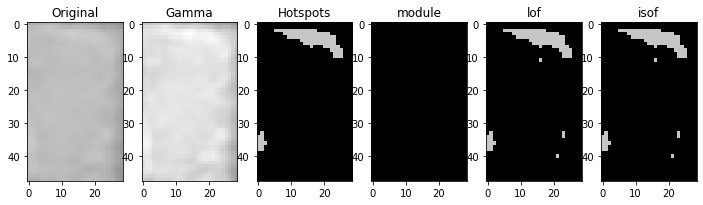

[-0.98800377 -1.02306411 -0.9659164  -0.99221379 -1.03488737 -1.07725159
 -1.00674302 -1.03119332]
[-1.84544637]
[-0.4738337  -0.50070979 -0.42073892 -0.49463083 -0.45350446 -0.55431131
 -0.48665292 -0.46638251]
[-0.69817855]
0.0 0
2853.jpg Normal
[-1.00042919 -0.9863951  -1.         -1.23472926 -1.         -0.99652615
 -1.00367656 -1.01184675]
[-1.73581688]
[-0.45076734 -0.46464944 -0.44901498 -0.51884507 -0.44660197 -0.45717334
 -0.43703457 -0.46636169]
[-0.65432675]
0.0 0
616.jpg Normal
[-0.99915977 -1.12499105 -1.00935368 -1.05055155 -0.9941737  -0.9941737
 -1.00935368 -1.05055155]
[-1.84544637]
[-0.47122845 -0.52395656 -0.43961484 -0.46658674 -0.43738174 -0.43738174
 -0.43961484 -0.46658674]
[-0.69817855]
0.0 0
1382.jpg Normal
[-0.99993711 -1.6380634  -1.03874619 -1.12661513 -2.91672401 -1.75126099
 -0.99072151 -0.99978086]
[-1.76462601]
[-0.45947367 -0.61122751 -0.4856767  -0.51300753 -0.69535912 -0.61686325
 -0.44758492 -0.46158177]
[-0.6658504]
0.0 0
1396.jpg Normal
[-1.0538484

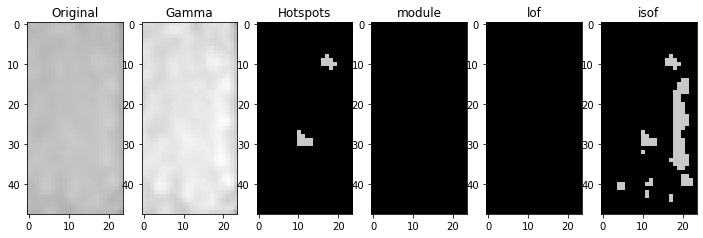

[-0.99573428 -1.02628445 -1.         -0.98667129 -1.         -1.
 -1.         -0.97153375]
[-1.79270085]
[-0.44479251 -0.44812242 -0.42857308 -0.44575933 -0.43775165 -0.44269252
 -0.44491398 -0.43828114]
[-0.67708034]
0.0 0
3032.jpg Normal
[-1.         -1.         -0.99346031 -0.9948537  -1.03068099 -1.
 -0.99913052 -1.        ]
[-1.69100393]
[-0.44335063 -0.44422941 -0.43011132 -0.44210417 -0.49293549 -0.44298375
 -0.4487209  -0.44298375]
[-0.63640157]
1.0 4.0 0.7853981633974483 1.0
13.0 14.828427076339722 0.7429559153356595 0.987986215468267
13.0 14.828427076339722 0.7429559153356595 0.987986215468267
21.0 0
4985.jpg Junction-Box-Error


[-1.13290828 -1.05267106 -0.97450151 -1.04497748 -0.98655463 -0.97456323
 -1.21719375 -1.20437212]
[-1.84544637]
[-0.47764896 -0.44741724 -0.43585963 -0.47602923 -0.44181457 -0.44919624
 -0.50878041 -0.49546923]
[-0.69817855]
0.0 0
3026.jpg Normal
[-1.01904042 -1.10690806 -1.01618147 -1.94542209 -1.03218279 -1.0020196
 -1.03653783 -1.04556403]
[-1.85143439]
[-0.5055518  -0.53322306 -0.45202963 -0.66990352 -0.52660057 -0.46352012
 -0.48062612 -0.4756118 ]
[-0.70057376]
0.0 0
4749.jpg Normal
[-1.         -1.20997064 -1.37012503 -1.10513895 -1.95102012 -1.20170327
 -0.9952381  -1.02045275]
[-1.84544637]
[-0.41873358 -0.50518859 -0.57319665 -0.48036483 -0.71143715 -0.4908077
 -0.42135537 -0.44170069]
[-0.69817855]
0.0 0
2338.jpg Normal
[-1.01309719 -0.99925254 -0.99719482 -0.99978086 -0.98494685 -0.99106457
 -0.98494685 -0.96261324]
[-1.76462601]
[-0.44137602 -0.44576559 -0.44182324 -0.46158177 -0.43522198 -0.46431359
 -0.43522198 -0.44571751]
[-0.6658504]
0.0 0
4991.jpg Normal
[-1.3650239

[-1.61235376 -1.30009702 -1.46935768 -1.15520756 -1.02306411 -1.77285957
 -1.51605028 -1.36429934]
[-1.84544637]
[-0.67788073 -0.57500572 -0.62394203 -0.53071512 -0.50070979 -0.71228553
 -0.61323908 -0.55382124]
[-0.69817855]
0.0 2.0 0.0 1.0
4.0 8.828427076339722 0.6449160528303446 0.9798213740342159
0.0 2.0 0.0 1.0
10.5 21.071067690849304 0.297184447986625 0.9138429296182548
3.0 6.828427076339722 0.8085181381420814 1.0
18.5 41.899494767189026 0.13242318221701205 0.8831911244671888
4.0 8.828427076339722 0.6449160528303446 0.9798213740342159
10.5 21.071067690849304 0.297184447986625 0.9138429296182548
0.0 2.0 0.0 1.0
0.0 0.0 0 0
9.0 21
3967.jpg Multi-Hotspots


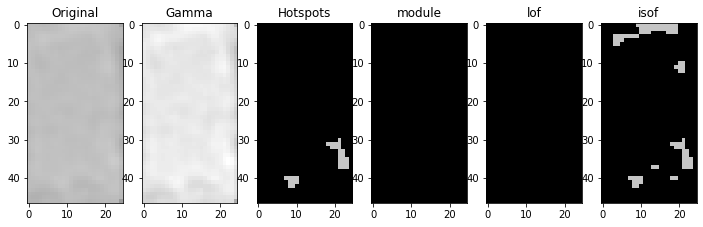

[-1.01645671 -1.02851212 -1.09905501 -0.99476738 -1.02775585 -2.68101475
 -0.96686679 -0.99630118]
[-1.78229778]
[-0.47375309 -0.45622568 -0.50653452 -0.48341295 -0.44349641 -0.6674438
 -0.45284173 -0.48825892]
[-0.67291911]
0.0 0
3620.jpg Normal
[-1.00639194 -0.98163941 -0.98014988 -0.9846256  -1.03789381 -0.9948162
 -1.00676809 -1.0020196 ]
[-1.85143439]
[-0.44453112 -0.47372098 -0.46018797 -0.44723237 -0.47827832 -0.47719038
 -0.44353903 -0.46352012]
[-0.70057376]
0.0 0
1037.jpg Normal
[-1.01187863 -1.37110982 -1.17375421 -1.12678357 -1.50657876 -1.86167157
 -0.99377959 -1.29451047]
[-1.85143439]
[-0.49782324 -0.56422044 -0.55382793 -0.55576902 -0.61355231 -0.71687695
 -0.48026409 -0.58543103]
[-0.70057376]
72.0 62.97056245803833 0.2281745567306683 0.942302068212154
0.0 0
1989.jpg Normal
[-0.99035844 -1.05473844 -1.65794752 -0.9886302  -1.00659858 -1.05473844
 -1.02797835 -1.21860624]
[-1.79270085]
[-0.50579521 -0.51368499 -0.64180265 -0.49469014 -0.50475297 -0.51368499
 -0.48930556

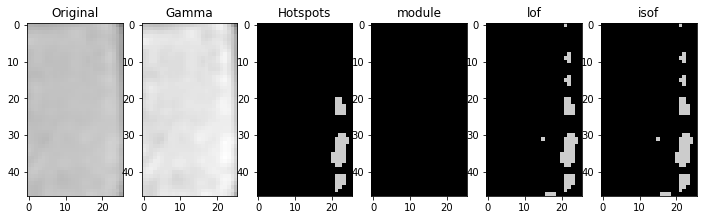

[-1.00334154 -1.         -1.00367656 -1.03255345 -0.99652615 -0.98552393
 -1.10553451 -1.00340275]
[-1.73581688]
[-0.46343795 -0.4473942  -0.43703457 -0.46568092 -0.45717334 -0.4489008
 -0.51114615 -0.47228733]
[-0.65432675]
0.0 0
4615.jpg Normal
[-1.02215365 -1.01523054 -1.10121298 -1.00968823 -1.01151051 -1.20844215
 -1.01013041 -1.70587066]
[-1.84544637]
[-0.5068498  -0.44956859 -0.54785427 -0.48156363 -0.4633884  -0.59642756
 -0.52887969 -0.69698519]
[-0.69817855]
0.0 0
1779.jpg Normal
[-1.00187581 -1.03813752 -1.03119332 -1.04497748 -0.99221379 -0.98800377
 -1.00740629 -0.99768907]
[-1.84544637]
[-0.50190843 -0.45690426 -0.46638251 -0.47602923 -0.49463083 -0.4738337
 -0.50642274 -0.45917103]
[-0.69817855]
0.0 0
2270.jpg Normal
[-1.02851212 -1.60355986 -0.96844631 -1.0083755  -4.01909539 -1.01715897
 -1.02775585 -6.03412723]
[-1.78229778]
[-0.45622568 -0.63725407 -0.42022779 -0.45969719 -0.78488513 -0.43376209
 -0.44349641 -0.81134236]
[-0.67291911]
0.5 3.414213538169861 0.53901209

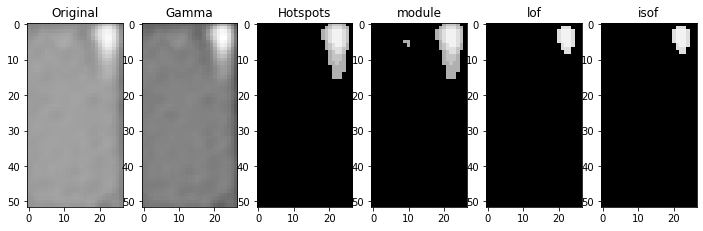

[-0.98163941 -1.0303946  -1.09423781 -1.01070277 -1.0113002  -0.99562915
 -1.03789381 -0.96859329]
[-1.85143439]
[-0.47372098 -0.47328392 -0.51691421 -0.47994973 -0.46136184 -0.44745576
 -0.47827832 -0.46204838]
[-0.70057376]
4.0 10.0 0.5026548245743669 1.0
4.0 10.0 0.5026548245743669 1.0
10.0 0
3608.jpg Junction-Box-Error


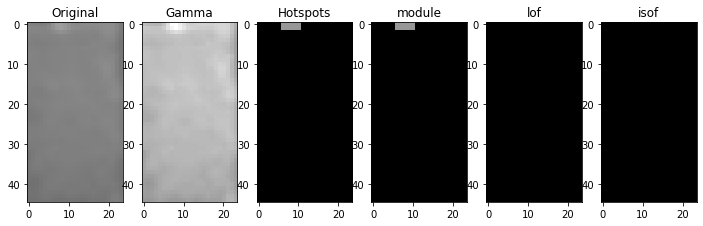

[-1.00968823 -1.18603045 -1.00102174 -1.39097364 -1.0021407  -1.12499105
 -1.06412444 -1.01630747]
[-1.84544637]
[-0.48156363 -0.53683194 -0.47372355 -0.55552652 -0.44889002 -0.52395656
 -0.50706028 -0.47260606]
[-0.69817855]
0.0 0
4167.jpg Normal
[-1.00181256 -1.         -1.0154645  -1.02602462 -1.         -1.0711959
 -1.         -0.9948537 ]
[-1.69100393]
[-0.44315982 -0.44721039 -0.45752511 -0.45725975 -0.46042101 -0.48692551
 -0.45151648 -0.44210417]
[-0.63640157]
0.0 0
2516.jpg Normal
[-0.98866766 -1.74034955 -1.         -1.10384195 -1.03890159 -0.98749641
 -1.         -1.33300925]
[-1.79270085]
[-0.4351208  -0.59575302 -0.42857308 -0.49816757 -0.46719154 -0.45997178
 -0.44491398 -0.54529656]
[-0.67708034]
0.0 0
560.jpg Normal
[-0.98654558 -1.01071688 -0.99064603 -0.99085268 -1.00275161 -1.10553451
 -0.99888167 -0.99210063]
[-1.73581688]
[-0.46303222 -0.47918217 -0.47279294 -0.44197885 -0.45472031 -0.51114615
 -0.47632553 -0.47693586]
[-0.65432675]
0.0 0
3185.jpg Normal
[-1.018379

[-1.         -1.01916859 -0.99149587 -1.00023415 -1.28658778 -1.00906233
 -0.98562228 -1.03504597]
[-1.69100393]
[-0.44687749 -0.48248687 -0.42739838 -0.46257898 -0.56202041 -0.47554989
 -0.45433333 -0.50291874]
[-0.63640157]
0.0 0
2700.jpg Normal
[-0.99935422 -1.         -0.98552393 -0.99888167 -0.99085268 -1.
 -1.00334154 -0.99965396]
[-1.73581688]
[-0.46418588 -0.44934289 -0.4489008  -0.47632553 -0.44197885 -0.43831965
 -0.46343795 -0.4399461 ]
[-0.65432675]
0.0 0
4371.jpg Normal
[-1.         -1.00111391 -1.10384195 -1.03779182 -2.95714724 -0.99573428
 -1.0119823  -0.99999328]
[-1.79270085]
[-0.4380457  -0.44593525 -0.49816757 -0.46096037 -0.75017496 -0.44479251
 -0.45148742 -0.43397794]
[-0.67708034]
0.0 0
945.jpg Normal
[-1.05267106 -1.02033782 -1.0126626  -0.97450151 -0.98812968 -1.00981819
 -0.99768907 -0.95723074]
[-1.84544637]
[-0.44741724 -0.4674132  -0.46849582 -0.43585963 -0.5044199  -0.46084225
 -0.45917103 -0.43582272]
[-0.69817855]
0.0 0
1209.jpg Normal
[-0.9868618  -1.0

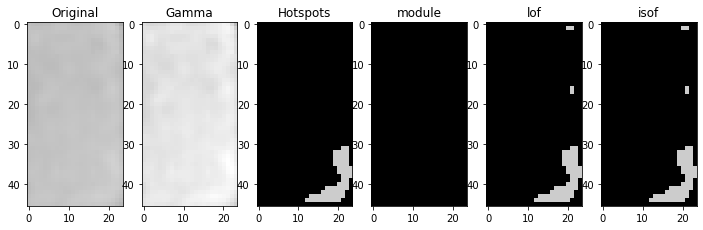

[-1.01960775 -0.98667129 -0.98829098 -1.00111391 -0.99007735 -1.02797835
 -1.         -1.00077488]
[-1.79270085]
[-0.45524325 -0.44575933 -0.49292071 -0.44593525 -0.48428654 -0.48930556
 -0.44491398 -0.49221888]
[-0.67708034]
0.0 0
3387.jpg Normal
[-0.99869476 -1.01303806 -1.95730314 -0.9659164  -1.02540616 -1.00737107
 -0.99330025 -1.16045087]
[-1.84544637]
[-0.42466865 -0.44829646 -0.65423571 -0.42073892 -0.4626829  -0.44728901
 -0.4303267  -0.49059708]
[-0.69817855]
0.0 0
2927.jpg Normal
[-1.01130897 -0.99085268 -1.06600175 -0.99965396 -1.00876403 -0.99408783
 -1.01184675 -1.        ]
[-1.73581688]
[-0.45307809 -0.44197885 -0.47889597 -0.4399461  -0.46244791 -0.43851556
 -0.46636169 -0.44751663]
[-0.65432675]
0.0 0
5090.jpg Normal
[-0.98879389 -1.0273499  -0.99598766 -0.99598766 -0.9777628  -2.52493179
 -0.97696607 -0.9686273 ]
[-1.79270085]
[-0.43260205 -0.45928291 -0.4281401  -0.4281401  -0.42801444 -0.64204434
 -0.46458629 -0.44195081]
[-0.67708034]
0.0 0
762.jpg Normal
[-1.02851

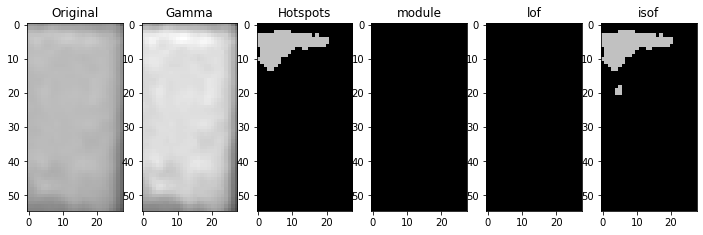

[-1.05002838 -0.9939031  -1.17375421 -1.02978035 -1.05002838 -1.09935077
 -1.01187863 -1.22736391]
[-1.85143439]
[-0.51224663 -0.47127335 -0.55382793 -0.45951496 -0.51224663 -0.55607371
 -0.49782324 -0.56788599]
[-0.70057376]
0.0 0
2067.jpg Normal
[-1.01651157 -1.         -0.97833345 -0.99832161 -1.31018879 -0.99149587
 -1.01673626 -1.        ]
[-1.69100393]
[-0.48222069 -0.45151648 -0.44006082 -0.43785363 -0.5657533  -0.42739838
 -0.47022658 -0.46204828]
[-0.63640157]
0.0 0
4416.jpg Normal
[-1.         -1.04187313 -1.00077488 -1.0119823  -1.02970695 -0.99354286
 -1.15520444 -0.9953439 ]
[-1.79270085]
[-0.44273109 -0.52479361 -0.49221888 -0.45148742 -0.50674703 -0.49529511
 -0.54105646 -0.47116856]
[-0.67708034]
0.0 0
3379.jpg Normal
[-1.01068803 -0.96574139 -1.00653465 -1.01167317 -1.05055155 -3.21253498
 -1.03591653 -1.00935368]
[-1.84544637]
[-0.43976468 -0.44210652 -0.45749944 -0.44618021 -0.46658674 -0.75009967
 -0.48975471 -0.43961484]
[-0.69817855]
0.0 0
1208.jpg Normal
[-1.    

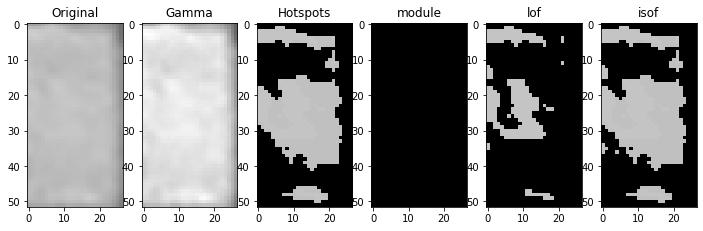

[-0.98552393 -1.         -0.98687862 -1.         -0.99408783 -1.03255345
 -1.         -1.00275161]
[-1.73581688]
[-0.4489008  -0.44901498 -0.44406521 -0.44660197 -0.43851556 -0.46568092
 -0.44901498 -0.45472031]
[-0.65432675]
0.0 0
3345.jpg Normal
[-0.98667129 -1.         -1.00096546 -1.         -0.9953439  -1.
 -1.         -0.99573428]
[-1.79270085]
[-0.44575933 -0.43326006 -0.4315759  -0.43326006 -0.47116856 -0.42742834
 -0.44269252 -0.44479251]
[-0.67708034]
0.0 0
3423.jpg Normal
[-0.99915977 -0.98878491 -1.04003356 -1.0021407  -1.0176928  -0.98922784
 -1.01624747 -1.06262334]
[-1.84544637]
[-0.47122845 -0.43629342 -0.46781241 -0.44889002 -0.47181117 -0.45410068
 -0.4552784  -0.496218  ]
[-0.69817855]
0.0 0
5052.jpg Normal
[-1.02594887 -1.02756939 -1.52960318 -1.01303806 -0.95723074 -1.11313875
 -0.99330025 -1.22752156]
[-1.84544637]
[-0.44727555 -0.43349068 -0.57588409 -0.44829646 -0.43582272 -0.48072053
 -0.4303267  -0.50397794]
[-0.69817855]
0.0 0
1234.jpg Normal
[-0.98879389 -0.

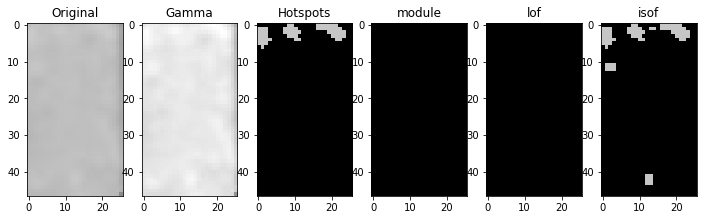

[-1.30009702 -1.15520756 -1.56420202 -1.00127976 -1.0434971  -1.2461087
 -1.36429934 -1.3964005 ]
[-1.84544637]
[-0.57500572 -0.53071512 -0.65345163 -0.4897712  -0.50805786 -0.57123717
 -0.55382124 -0.58318116]
[-0.69817855]
0.0 0
1977.jpg Normal
[-1.01624747 -0.99620879 -1.00384282 -0.99915977 -1.01624747 -1.00102174
 -1.00935368 -1.01151051]
[-1.84544637]
[-0.4552784  -0.43679627 -0.43391465 -0.47122845 -0.4552784  -0.47372355
 -0.43961484 -0.4633884 ]
[-0.69817855]
0.0 0
4827.jpg Normal
[-0.99598766 -0.97696607 -0.9686273  -1.05558097 -0.99387149 -1.01631296
 -0.9777628  -1.02256416]
[-1.79270085]
[-0.4281401  -0.46458629 -0.44195081 -0.52033205 -0.48456745 -0.45390024
 -0.42801444 -0.4597438 ]
[-0.67708034]
0.0 0
3190.jpg Normal
[-0.98654558 -1.41023951 -1.05345668 -1.00275161 -0.9863951  -2.41584286
 -1.05345668 -5.9593884 ]
[-1.73581688]
[-0.46303222 -0.56939958 -0.46508563 -0.45472031 -0.46464944 -0.68510569
 -0.46508563 -0.80750884]
[-0.65432675]
0.0 0
1787.jpg Normal
[-0.98562

[-1.06412444 -1.45980543 -1.00968823 -1.18603045 -1.01630747 -1.0021407
 -1.25920234 -1.80738614]
[-1.84544637]
[-0.50706028 -0.54438018 -0.48156363 -0.53683194 -0.47260606 -0.44889002
 -0.53748064 -0.60743166]
[-0.69817855]
0.0 0
3966.jpg Normal
[-1.         -1.09086994 -0.99085268 -0.98654558 -1.02959386 -0.99064603
 -1.         -1.31792781]
[-1.73581688]
[-0.45999401 -0.49700089 -0.44197885 -0.46303222 -0.47233486 -0.47279294
 -0.44759643 -0.54706381]
[-0.65432675]
0.0 0
429.jpg Normal
[-1.1818469  -1.25990813 -1.00876403 -1.56122444 -1.35670404 -1.20370405
 -1.04013302 -1.08813146]
[-1.73581688]
[-0.54432254 -0.574312   -0.46244791 -0.66301464 -0.6071375  -0.56142171
 -0.49055119 -0.54326783]
[-0.65432675]
0.0 2.0 0.0 1.0
3.0 12.485281229019165 0.24184352278519608 0.8546100110823472
0.0 2.0 0.0 1.0
0.0 0.0 0 0
21.5 21.071067690849304 0.6085205363535655 0.9637449739098485
0.0 0.0 0 0
1.5 5.414213538169861 0.6430287075658971 1.0
0.0 2.0 0.0 1.0
3.5 7.414213538169861 0.800106370361479

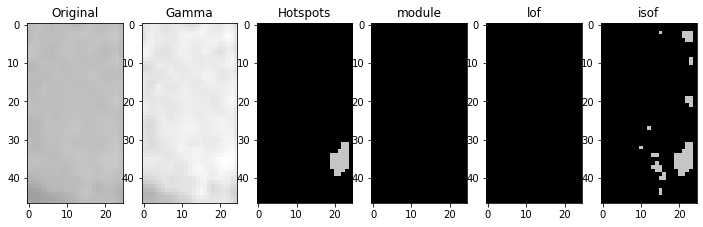

[-1.17859743 -1.01275944 -1.94613695 -1.03896939 -1.33342574 -1.5016617
 -1.2108835  -1.00608838]
[-1.79270085]
[-0.55848387 -0.5283197  -0.73710727 -0.53630059 -0.58675996 -0.66325292
 -0.57591465 -0.47991776]
[-0.67708034]
43.5 51.21320307254791 0.20841800894329207 0.8598739521496
0.0 2.0 0.0 1.0
0.0 0
1803.jpg Normal
[-0.98635542 -0.99571736 -1.         -1.03504597 -1.00023415 -1.00008869
 -0.99346031 -1.        ]
[-1.69100393]
[-0.43473742 -0.45010257 -0.44721816 -0.50291874 -0.46257898 -0.45661346
 -0.43011132 -0.44298375]
[-0.63640157]
0.0 0
4953.jpg Normal
[-1.0041524  -1.59993095 -1.02489935 -1.02168931 -0.97398103 -0.97398103
 -2.51486728 -1.08061657]
[-1.69100393]
[-0.43422809 -0.59425055 -0.43254188 -0.46164602 -0.41659239 -0.41659239
 -0.67945036 -0.50880036]
[-0.63640157]
0.0 0
367.jpg Normal
[-1.01678735 -0.9877702  -1.00968823 -1.00102174 -1.00724713 -1.03043928
 -1.06412444 -1.33213912]
[-1.84544637]
[-0.46810646 -0.43850207 -0.48156363 -0.47372355 -0.44639406 -0.472214

[-0.43803984 -0.44298375 -0.48554171 -0.44335063 -0.46257898 -0.47022658
 -0.43381182 -0.42739838]
[-0.63640157]
0.0 0
4984.jpg Normal
[-0.96562649 -1.49894258 -0.96562649 -1.16132484 -1.04254267 -1.01106942
 -1.03525665 -1.12864006]
[-1.85143439]
[-0.44583617 -0.60022359 -0.44583617 -0.50957787 -0.50131756 -0.4563719
 -0.46197768 -0.4822093 ]
[-0.70057376]
0.0 0
3033.jpg Normal
[-1.03399076 -0.96702804 -1.10828017 -0.99839064 -0.97522512 -1.0590106
 -0.98904039 -1.01134253]
[-1.69100393]
[-0.43471807 -0.44389214 -0.4995729  -0.43838705 -0.44033573 -0.46851867
 -0.43055018 -0.4651031 ]
[-0.63640157]
0.0 0
1624.jpg Normal
[-1.05463125 -1.30509354 -1.03634945 -0.97028444 -0.97373851 -0.99218265
 -1.00178564 -1.02121063]
[-1.69100393]
[-0.45555175 -0.53299223 -0.48422883 -0.42124602 -0.46710109 -0.42618612
 -0.46227258 -0.45039668]
[-0.63640157]
0.0 0
159.jpg Normal
[-0.98651304 -1.01150523 -1.01898634 -0.99387149 -0.99250059 -1.00581991
 -1.11207952 -1.02589292]
[-1.79270085]
[-0.5152200

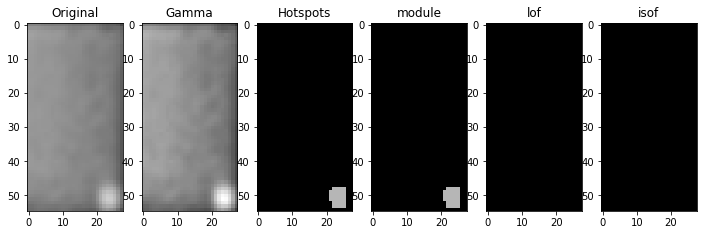

[-1.02594887 -1.17664238 -0.99330025 -1.02756939 -1.01303806 -0.98655463
 -0.98514637 -1.02540616]
[-1.84544637]
[-0.44727555 -0.49491524 -0.4303267  -0.43349068 -0.44829646 -0.44181457
 -0.4213718  -0.4626829 ]
[-0.69817855]
0.0 0
165.jpg Normal
[-1.03634945 -0.97844064 -1.00958233 -1.07704052 -1.00178564 -0.99496343
 -1.00495937 -1.00178564]
[-1.69100393]
[-0.48422883 -0.47183564 -0.43509278 -0.5064533  -0.46227258 -0.47874012
 -0.46034361 -0.46227258]
[-0.63640157]
0.0 0
4589.jpg Normal
[-1.00412192 -0.99801078 -1.01106942 -1.0283352  -0.96562649 -1.08447216
 -1.00362643 -0.96562649]
[-1.85143439]
[-0.44117561 -0.46722922 -0.4563719  -0.45559175 -0.44583617 -0.48499563
 -0.45217051 -0.44583617]
[-0.70057376]
0.0 0
171.jpg Normal
[-1.24619228 -0.98332843 -1.03896939 -1.00581991 -1.00792674 -1.03896939
 -0.98332843 -1.00833875]
[-1.79270085]
[-0.58526066 -0.49931868 -0.53630059 -0.45885226 -0.51274349 -0.53630059
 -0.49931868 -0.46224348]
[-0.67708034]
0.0 0
1383.jpg Normal
[-0.990545

[-0.47183564 -0.45555175 -0.47590331 -0.43254188 -0.52594745 -0.47472651
 -0.43422809 -0.49016685]
[-0.63640157]
0.0 0
2891.jpg Normal
[-0.9659164  -1.42046045 -1.01061389 -1.02313815 -1.01303806 -1.0315477
 -1.00902226 -0.99330025]
[-1.84544637]
[-0.42073892 -0.5655843  -0.46497542 -0.45480064 -0.44829646 -0.49790344
 -0.46007562 -0.4303267 ]
[-0.69817855]
0.0 0
4238.jpg Normal
[-0.97027647 -1.05006365 -0.9886774  -1.02464138 -0.96658678 -0.99839064
 -1.00145134 -1.10517546]
[-1.69100393]
[-0.44714009 -0.44455936 -0.43437793 -0.42261777 -0.44966403 -0.43838705
 -0.43974101 -0.48906372]
[-0.63640157]
0.0 0
3557.jpg Normal
[-0.97839826 -1.1920556  -0.97152962 -0.97152962 -0.99782836 -1.2465578
 -0.98562228 -1.56572716]
[-1.69100393]
[-0.45064471 -0.51787094 -0.43636846 -0.43636846 -0.45159373 -0.5557588
 -0.45433333 -0.58442444]
[-0.63640157]
0.0 0
1340.jpg Normal
[-1.00412192 -1.17956845 -1.00362643 -1.01106942 -1.3764475  -1.03338042
 -0.94174681 -1.09601204]
[-1.85143439]
[-0.4411756

[-0.4928736  -0.46458629 -0.51037399 -0.44731368 -0.4966061  -0.44915162
 -0.43823716 -0.51614264]
[-0.67708034]
0.0 0
4560.jpg Normal
[-1.04439636 -1.04369044 -1.00386553 -1.54526733 -0.9853454  -0.98156132
 -1.18006966 -1.01414698]
[-1.85143439]
[-0.4672756  -0.51078973 -0.47697287 -0.60462444 -0.46042147 -0.44226803
 -0.5447464  -0.49703525]
[-0.70057376]
0.0 0
167.jpg Normal
[-0.99210063 -0.99064603 -0.99203381 -1.8422728  -1.06600175 -0.98658955
 -0.99085268 -1.00275161]
[-1.73581688]
[-0.47693586 -0.47279294 -0.4659647  -0.62069422 -0.47889597 -0.45827368
 -0.44197885 -0.45472031]
[-0.65432675]
0.0 0
1395.jpg Normal
[-1.03488737 -0.99702233 -1.17664238 -0.98514637 -0.97456323 -0.99869476
 -1.05267106 -1.01303806]
[-1.84544637]
[-0.45350446 -0.44895739 -0.49491524 -0.4213718  -0.44919624 -0.42466865
 -0.44741724 -0.44829646]
[-0.69817855]
0.0 0
601.jpg Normal
[-0.95828845 -0.98145145 -0.95828845 -1.00958233 -1.0041524  -1.00499937
 -0.99098479 -1.01274245]
[-1.69100393]
[-0.421333

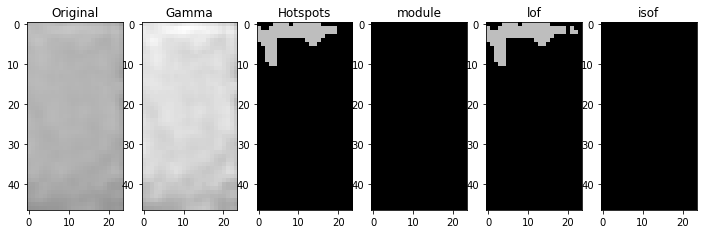

[-1.15212543 -2.72127892 -0.99782836 -1.78362504 -3.70695194 -1.1920556
 -1.86793228 -1.37642712]
[-1.69100393]
[-0.49912414 -0.68110837 -0.45159373 -0.62683157 -0.76651698 -0.51787094
 -0.65353085 -0.56201087]
[-0.63640157]
0.0 0
3031.jpg Normal
[-1.00988493 -1.01890141 -1.92624736 -1.0053698  -1.07704052 -0.97028444
 -0.99432932 -0.97398103]
[-1.69100393]
[-0.47590331 -0.44852022 -0.61670078 -0.48320221 -0.5064533  -0.42124602
 -0.46895008 -0.41659239]
[-0.63640157]
0.0 0
4986.jpg Normal
[-1.00190786 -0.99085268 -2.71325257 -1.00275161 -0.98658955 -1.05345668
 -1.45527476 -1.        ]
[-1.73581688]
[-0.46208658 -0.44197885 -0.69479131 -0.45472031 -0.45827368 -0.46508563
 -0.57574111 -0.44901498]
[-0.65432675]
0.0 0
2449.jpg Normal
[-1.01115451 -1.08447216 -1.01106942 -1.33964509 -0.99244305 -1.00105613
 -0.99716147 -1.03365615]
[-1.85143439]
[-0.4818041  -0.48499563 -0.4563719  -0.55626102 -0.46154705 -0.46187595
 -0.45854735 -0.47555727]
[-0.70057376]
0.0 0
4038.jpg Normal
[-1.00809

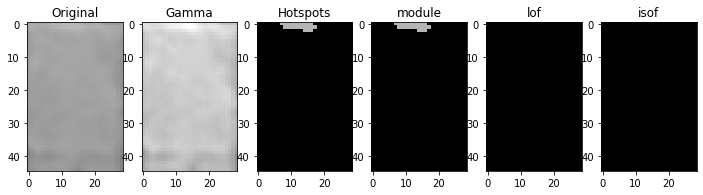

[-0.97852601 -1.10517546 -1.03073621 -1.07708017 -2.25820874 -1.07708017
 -1.49615036 -0.97504994]
[-1.69100393]
[-0.41408062 -0.48906372 -0.43147662 -0.45313794 -0.65054952 -0.45313794
 -0.57451453 -0.4152131 ]
[-0.63640157]
0.0 0
2313.jpg Normal
[-1.00958233 -1.01686367 -1.04069991 -1.00644194 -1.1225694  -1.00178564
 -1.06291397 -1.47490676]
[-1.69100393]
[-0.43509278 -0.43008623 -0.48166944 -0.43437025 -0.50807283 -0.46227258
 -0.49016685 -0.54951966]
[-0.63640157]
0.0 0
2475.jpg Normal
[-1.1627278  -1.         -1.71857222 -1.00008869 -1.36502398 -1.41653432
 -1.01450624 -1.13192382]
[-1.69100393]
[-0.55014288 -0.44335063 -0.66502651 -0.45661346 -0.58629584 -0.59025857
 -0.48602573 -0.54035357]
[-0.63640157]
0.0 2.0 0.0 1.0
4.5 15.899494767189026 0.2236947180771826 0.8799465001698337
3.0 6.828427076339722 0.8085181381420814 1.0
184.5 99.84061968326569 0.2325903534911005 0.7220022987262592
0.0 0.0 0 0
0.0 0
4004.jpg Normal
[-1.03488737 -1.00933463 -1.05267106 -0.99221379 -0.95723074

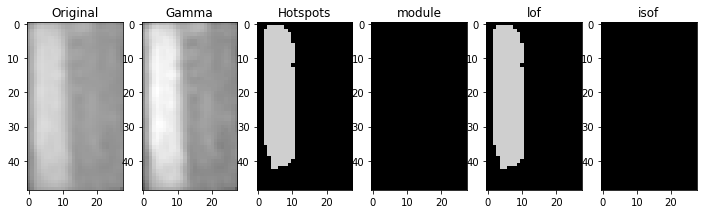

[-1.05252071 -1.03872482 -0.98898842 -1.29864076 -0.97972639 -0.97852601
 -1.09986427 -0.99318844]
[-1.69100393]
[-0.48027205 -0.44578729 -0.43209222 -0.51978838 -0.41295463 -0.41408062
 -0.48817514 -0.43174044]
[-0.63640157]
0.0 0
1034.jpg Normal
[-1.0280225  -1.00747282 -1.02053343 -0.99387149 -1.17859743 -1.07672829
 -1.00708814 -0.99250059]
[-1.79270085]
[-0.52003125 -0.52350025 -0.53496314 -0.48456745 -0.55848387 -0.53161541
 -0.51614264 -0.49587277]
[-0.67708034]
0.0 0
4164.jpg Normal
[-1.02489935 -1.16870926 -0.99433014 -0.98827907 -1.50586359 -1.02121063
 -1.00499937 -0.97398103]
[-1.69100393]
[-0.43254188 -0.50557889 -0.42866271 -0.43949754 -0.57048621 -0.45039668
 -0.44864474 -0.41659239]
[-0.63640157]
0.0 0
2515.jpg Normal
[-1.0283352  -1.00412192 -0.98532312 -1.02978035 -1.11628336 -1.00362643
 -0.94174681 -1.0411251 ]
[-1.85143439]
[-0.45559175 -0.44117561 -0.46894956 -0.45951496 -0.47988753 -0.45217051
 -0.43899105 -0.49359132]
[-0.70057376]
0.0 0
588.jpg Normal
[-1.00008

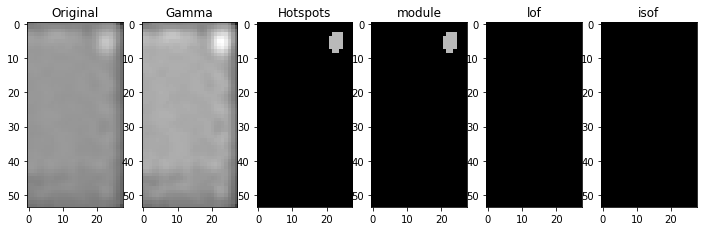

[-1.01450624 -0.99913052 -1.47272742 -1.         -1.00008869 -1.07791142
 -1.01450624 -1.        ]
[-1.69100393]
[-0.48602573 -0.4487209  -0.60765353 -0.44422941 -0.45661346 -0.5228585
 -0.48602573 -0.44335063]
[-0.63640157]
33.0 50.97056245803833 0.1596191345790189 0.9273514494403315
0.0 0
2298.jpg Normal
[-0.99376292 -1.0288128  -1.00841931 -0.99864306 -0.96549699 -0.99375596
 -1.14934951 -1.03431671]
[-1.91118773]
[-0.46019054 -0.50738688 -0.45462948 -0.48824262 -0.44529598 -0.45661402
 -0.55080014 -0.51468579]
[-0.72447509]
0.0 0
1791.jpg Normal
[-0.98655809 -1.24042054 -1.11742404 -1.05362721 -1.06970419 -1.01622495
 -1.04745851 -1.43098888]
[-1.85143439]
[-0.44707315 -0.5350725  -0.53431789 -0.48407089 -0.52447081 -0.49213747
 -0.46772411 -0.59549277]
[-0.70057376]
0.0 0
205.jpg Normal
[-0.99770574 -1.25427061 -0.97767296 -0.96463237 -1.13133493 -1.96259952
 -1.16863169 -0.9872788 ]
[-1.91118773]
[-0.46394553 -0.52109909 -0.45065909 -0.42587547 -0.50988837 -0.69799634
 -0.5064012

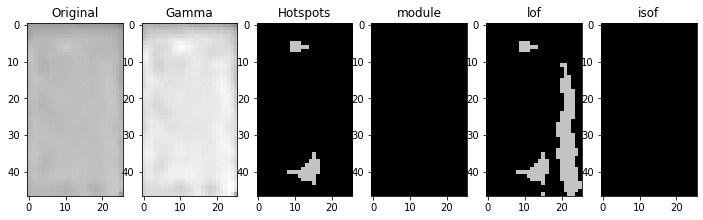

[-0.96556829 -1.75324978 -1.0429682  -1.00629143 -1.0429682  -2.47352247
 -0.99610336 -1.32797373]
[-1.79270085]
[-0.43330901 -0.59321004 -0.45202615 -0.4350608  -0.45202615 -0.66197825
 -0.44375624 -0.54635696]
[-0.67708034]
0.0 0
952.jpg Normal
[-1.1627278  -0.99832161 -1.03068099 -1.24915103 -1.02602462 -1.65067223
 -1.00023415 -1.07791142]
[-1.69100393]
[-0.55014288 -0.43785363 -0.49293549 -0.55851182 -0.45725975 -0.64693482
 -0.46257898 -0.5228585 ]
[-0.63640157]
0.0 2.0 0.0 1.0
1.5 10.242640614509583 0.17967069736490698 0.9191197751128568
54.0 50.485281229019165 0.2662404656299787 0.9416629185075763
54.0 50.485281229019165 0.2662404656299787 0.9416629185075763
50.0 29
2717.jpg Single-Hotspot


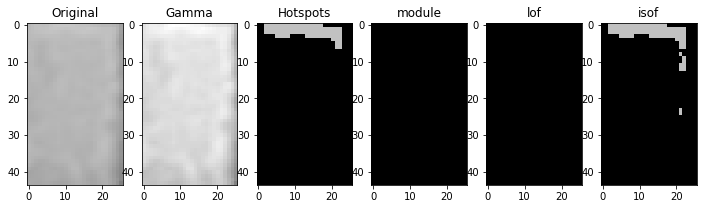

[-1.0590106  -0.99839064 -1.24146882 -0.97972639 -0.98901366 -0.9886774
 -0.96702804 -1.68123737]
[-1.69100393]
[-0.46851867 -0.43838705 -0.50685558 -0.41295463 -0.45951564 -0.43437793
 -0.44389214 -0.53282392]
[-0.63640157]
0.0 0.0 0 0
11.0 13.656854152679443 0.7411416266302412 0.9869555956409838
11.0 13.656854152679443 0.7411416266302412 0.9869555956409838
16.0 2
5078.jpg Junction-Box-Error


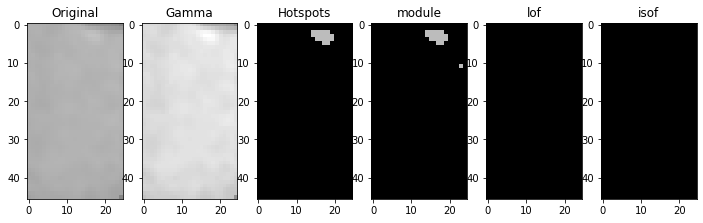

[-1.00897972 -1.02202073 -0.99705597 -1.00386553 -1.75248004 -1.03067123
 -1.03067123 -0.98459196]
[-1.85143439]
[-0.46097297 -0.48868639 -0.45719291 -0.47697287 -0.64293381 -0.45634481
 -0.45634481 -0.49582995]
[-0.70057376]
0.0 0
4366.jpg Normal
[-0.99400604 -0.98145145 -1.05825502 -1.03727751 -1.00695244 -1.00499937
 -0.99098479 -1.43153832]
[-1.69100393]
[-0.45785972 -0.43592963 -0.49563517 -0.44530567 -0.44509238 -0.44864474
 -0.43612125 -0.5632167 ]
[-0.63640157]
0.0 0
3409.jpg Normal
[-1.01104957 -1.01325574 -0.96463237 -1.02955307 -0.96463237 -1.04868788
 -1.51259371 -1.04505118]
[-1.91118773]
[-0.43389878 -0.44678905 -0.42587547 -0.46232418 -0.42587547 -0.4670945
 -0.59600365 -0.46085046]
[-0.72447509]
0.0 0
2703.jpg Normal
[-0.97673979 -1.02571106 -1.00479933 -0.98732345 -0.97938898 -1.03774069
 -1.00183619 -1.04439636]
[-1.85143439]
[-0.50450242 -0.49144449 -0.4964841  -0.4906539  -0.48986842 -0.48609776
 -0.4997289  -0.4672756 ]
[-0.70057376]
0.0 0
4372.jpg Normal
[-0.97974

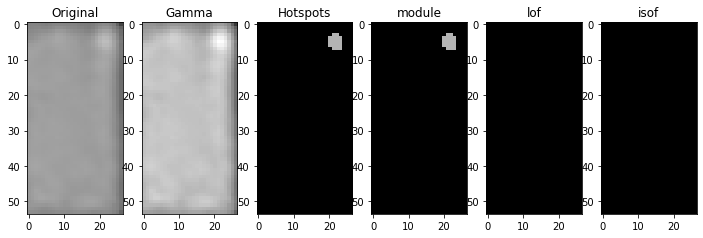

[-1.03872482 -1.05092036 -1.04722703 -0.97972639 -1.15317141 -0.97916947
 -0.97319207 -0.99698009]
[-1.69100393]
[-0.44578729 -0.46770021 -0.46723106 -0.41295463 -0.49536292 -0.42768106
 -0.42104941 -0.4366549 ]
[-0.63640157]
0.0 0
5087.jpg Normal
[-0.9872788  -1.0651977  -1.02690626 -1.03537779 -0.95466193 -1.01233369
 -1.04016714 -0.97767296]
[-1.91118773]
[-0.46017288 -0.5155949  -0.45162978 -0.46392968 -0.46245351 -0.48687605
 -0.43125196 -0.45065909]
[-0.72447509]
0.0 0
2924.jpg Normal
[-0.99637094 -1.00747282 -1.00168745 -1.03379189 -2.32516988 -1.00708814
 -1.00809287 -0.99250059]
[-1.79270085]
[-0.4928736  -0.52350025 -0.4966061  -0.45288678 -0.66360191 -0.51614264
 -0.46823966 -0.49587277]
[-0.67708034]
0.0 0
5093.jpg Normal
[-1.00499937 -1.00495937 -0.97028444 -1.00468256 -1.00644194 -1.16870926
 -1.01571255 -0.99218265]
[-1.69100393]
[-0.44864474 -0.46034361 -0.42124602 -0.43894477 -0.43437025 -0.50557889
 -0.46504816 -0.42618612]
[-0.63640157]
0.0 0
761.jpg Normal
[-1.00809

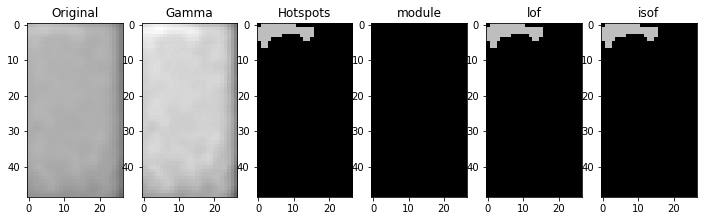

[-1.03302276 -0.98265575 -0.99819462 -1.96348804 -1.04868788 -1.02355541
 -1.02955307 -1.03537779]
[-1.91118773]
[-0.46813719 -0.42828652 -0.4527357  -0.69423988 -0.4670945  -0.44760901
 -0.46232418 -0.46392968]
[-0.72447509]
0.0 0
4367.jpg Normal
[-0.99913052 -1.         -1.01673626 -0.98635542 -0.97833345 -1.
 -1.         -1.0154645 ]
[-1.69100393]
[-0.4487209  -0.44422941 -0.47022658 -0.43473742 -0.44006082 -0.44335063
 -0.46042101 -0.45752511]
[-0.63640157]
0.0 0
5079.jpg Normal
[-1.05294581 -1.00525037 -0.98251544 -1.0106305  -1.0266414  -0.97082734
 -1.06290354 -0.99249767]
[-1.73581688]
[-0.46867056 -0.47492468 -0.47866511 -0.46615467 -0.45134461 -0.45771448
 -0.46609768 -0.44402617]
[-0.65432675]
0.0 0
2716.jpg Normal
[-0.97852601 -1.09706244 -1.74526709 -1.04157886 -1.01514391 -0.99318844
 -0.98904039 -1.15317141]
[-1.69100393]
[-0.41408062 -0.47170453 -0.59550575 -0.43745067 -0.47542253 -0.43174044
 -0.43055018 -0.49536292]
[-0.63640157]
0.0 0
953.jpg Normal
[-1.00800998 -2.9

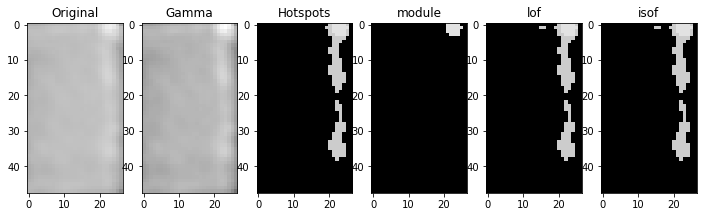

[-0.95828845 -1.02168931 -1.04180141 -0.99626786 -1.05575881 -1.0031151
 -1.69305534 -0.95828845]
[-1.69100393]
[-0.42133329 -0.46164602 -0.49011643 -0.43574375 -0.45410586 -0.44006567
 -0.607015   -0.42133329]
[-0.63640157]
0.0 0
1223.jpg Normal
[-1.00204048 -1.00448623 -1.04237259 -1.00018385 -1.01777812 -1.00163067
 -0.98895371 -1.01262762]
[-1.88896714]
[-0.48102455 -0.45659689 -0.49856871 -0.47671775 -0.47530484 -0.47813328
 -0.48367409 -0.46944146]
[-0.71558686]
0.0 0
3434.jpg Normal
[-0.963074   -1.02880444 -1.01019612 -0.9823779  -1.0213175  -0.99705597
 -0.99376982 -1.27121441]
[-1.85143439]
[-0.49683132 -0.5114928  -0.51017843 -0.4864345  -0.49366374 -0.45719291
 -0.51353512 -0.55160565]
[-0.70057376]
0.0 0
5045.jpg Normal
[-0.98031332 -1.04566123 -1.25427061 -1.13755106 -1.00757576 -1.42150669
 -1.06784907 -1.01104957]
[-1.91118773]
[-0.477852   -0.49044381 -0.52109909 -0.51552229 -0.49139187 -0.6144378
 -0.48741516 -0.43389878]
[-0.72447509]
0.0 0
1974.jpg Normal
[-0.958288

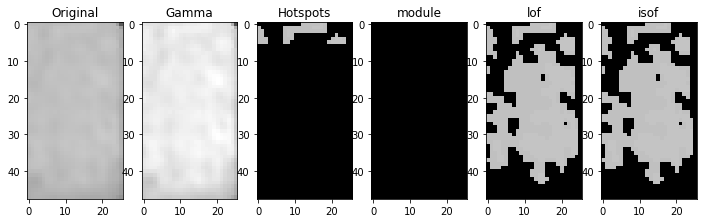

[-1.03126957 -1.04649836 -0.98947635 -0.97028231 -1.05294581 -0.99470041
 -1.01823006 -0.98491093]
[-1.73581688]
[-0.4538705  -0.46622261 -0.44223278 -0.44802055 -0.46867056 -0.48690896
 -0.48666504 -0.43615098]
[-0.65432675]
0.0 0
210.jpg Normal
[-1.         -0.99573948 -1.04279754 -0.97907645 -1.00841931 -0.99864306
 -0.99375596 -0.99290012]
[-1.91118773]
[-0.45840181 -0.44583131 -0.49496062 -0.46354972 -0.45462948 -0.48824262
 -0.45661402 -0.45168576]
[-0.72447509]
0.0 0
3178.jpg Normal
[-1.01038789 -1.00352941 -1.0018573  -0.97041527 -1.02015699 -1.45238993
 -1.00202659 -0.98611464]
[-1.88896714]
[-0.45236022 -0.50377292 -0.48037209 -0.45943234 -0.46422839 -0.5703242
 -0.48530746 -0.42840429]
[-0.71558686]
0.0 0
4617.jpg Normal
[-1.16018948 -1.02202073 -0.99376982 -1.01019612 -1.08911005 -0.96274708
 -1.02571106 -0.98732345]
[-1.85143439]
[-0.57319969 -0.48868639 -0.51353512 -0.51017843 -0.51726206 -0.44185283
 -0.49144449 -0.4906539 ]
[-0.70057376]
0.0 0
2266.jpg Normal
[-0.996234

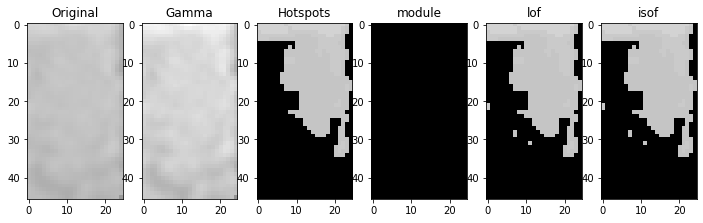

[-1.01571255 -1.0041524  -1.08061657 -0.99626786 -0.95828845 -0.99433014
 -1.01890141 -0.99098479]
[-1.69100393]
[-0.46504816 -0.43422809 -0.50880036 -0.43574375 -0.42133329 -0.42866271
 -0.44852022 -0.43612125]
[-0.63640157]
0.0 0
370.jpg Normal
[-1.00446294 -0.99754617 -0.99120455 -1.03059838 -0.99754617 -0.9980371
 -1.02489833 -0.98491093]
[-1.73581688]
[-0.45657741 -0.45100202 -0.44859634 -0.4365831  -0.45100202 -0.46823236
 -0.4709469  -0.43615098]
[-0.65432675]
0.0 0
4944.jpg Normal
[-1.         -1.0288128  -1.00938861 -0.99466821 -0.98466505 -1.03461316
 -1.02089792 -0.98127779]
[-1.91118773]
[-0.45840181 -0.50738688 -0.47927481 -0.45984029 -0.45209818 -0.51834027
 -0.50597913 -0.45316963]
[-0.72447509]
0.0 0
3795.jpg Normal
[-1.13422036 -0.97974603 -0.99513803 -1.00176872 -1.0086181  -1.
 -1.3213384  -1.01011861]
[-1.88896714]
[-0.48548879 -0.44180348 -0.44558789 -0.45427461 -0.45969013 -0.46025112
 -0.5652297  -0.448398  ]
[-0.71558686]
0.0 0
416.jpg Normal
[-1.05463125 -0.994

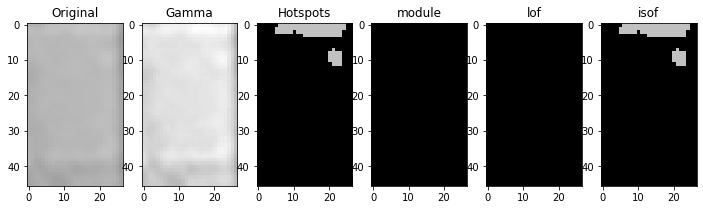

[-1.01125066 -0.98827907 -0.99098479 -1.39138389 -1.01686367 -1.01890141
 -1.01125066 -0.99218265]
[-1.69100393]
[-0.43828712 -0.43949754 -0.43612125 -0.56346242 -0.43008623 -0.44852022
 -0.43828712 -0.42618612]
[-0.63640157]
0.0 0
4788.jpg Normal
[-0.99099668 -1.03774069 -0.98732345 -0.99705597 -0.99503896 -1.00479933
 -1.03067123 -1.01393075]
[-1.85143439]
[-0.49796637 -0.48609776 -0.4906539  -0.45719291 -0.47004458 -0.4964841
 -0.45634481 -0.48926843]
[-0.70057376]
0.0 2.0 0.0 1.0
11.0 16.82842707633972 0.48810752032162763 0.9788280239107875
11.0 16.82842707633972 0.48810752032162763 0.9788280239107875
20.0 0
4950.jpg Junction-Box-Error


[-0.98895371 -1.01011861 -0.99791056 -0.99669967 -1.030218   -1.01484809
 -1.00152377 -1.00448623]
[-1.88896714]
[-0.48367409 -0.448398   -0.45504604 -0.45261221 -0.45122735 -0.455762
 -0.48937568 -0.45659689]
[-0.71558686]
0.0 0
364.jpg Normal
[-1.11615658 -1.04828328 -1.03039564 -1.24402111 -1.0266414  -1.04828328
 -1.6196667  -1.10440756]
[-1.73581688]
[-0.51631277 -0.49408036 -0.4791878  -0.54002632 -0.45134461 -0.49408036
 -0.69718809 -0.52535264]
[-0.65432675]
0.0 0.0 0 0
35.5 43.55634891986847 0.2351447466833048 0.9186679734698343
0.0 0.0 0 0
0.0 0
1828.jpg Normal
[-1.00826983 -0.99714306 -0.99573948 -1.         -0.99084679 -1.02008526
 -0.99376292 -1.        ]
[-1.91118773]
[-0.44475431 -0.45460739 -0.44583131 -0.45840181 -0.47472644 -0.47062984
 -0.46019054 -0.45840181]
[-0.72447509]
0.0 0
2312.jpg Normal
[-1.         -0.99054558 -0.98606214 -1.         -1.0711959  -1.1920556
 -1.00941236 -0.9868618 ]
[-1.69100393]
[-0.46289234 -0.44865938 -0.43381182 -0.45151648 -0.48692551 -

[-1.01622495 -0.99707548 -1.04439636 -1.01184358 -2.1707787  -0.9853454
 -0.94250152 -1.08911005]
[-1.85143439]
[-0.49213747 -0.46495947 -0.4672756  -0.48055711 -0.71278618 -0.46042147
 -0.45189028 -0.51726206]
[-0.70057376]
0.0 0
4039.jpg Normal
[-0.993349   -1.02015699 -0.98611464 -0.98351928 -0.98611464 -0.98642748
 -1.13815135 -0.98351928]
[-1.88896714]
[-0.44920019 -0.46422839 -0.42840429 -0.43916809 -0.42840429 -0.47232604
 -0.48312329 -0.43916809]
[-0.71558686]
0.0 0
2448.jpg Normal
[-1.00348835 -0.98251544 -0.99574641 -1.0266414  -0.99754617 -1.00207028
 -0.99754617 -0.98077513]
[-1.73581688]
[-0.45183981 -0.47866511 -0.4627332  -0.45134461 -0.45100202 -0.45553277
 -0.45100202 -0.44828521]
[-0.65432675]
0.0 0
3742.jpg Normal
[-1.02602462 -0.98458489 -0.97152962 -1.15212543 -0.98562228 -1.
 -0.97152962 -0.97839826]
[-1.69100393]
[-0.45725975 -0.45155761 -0.43636846 -0.49912414 -0.45433333 -0.45151648
 -0.43636846 -0.45064471]
[-0.63640157]
0.0 0
1155.jpg Normal
[-0.99864306 -1.0

[-1.0657046  -0.99098479 -0.99496343 -1.01890141 -1.06291397 -1.02319248
 -1.13899646 -0.99496343]
[-1.69100393]
[-0.51477329 -0.43612125 -0.47874012 -0.44852022 -0.49016685 -0.47377952
 -0.51972832 -0.47874012]
[-0.63640157]
0.0 0
1380.jpg Normal
[-1.10030402 -1.00592429 -1.47506037 -1.06438329 -1.00592429 -1.01348664
 -1.1067267  -0.99243895]
[-1.91118773]
[-0.46610994 -0.42335628 -0.5739556  -0.48502606 -0.42335628 -0.4309284
 -0.55749566 -0.44507445]
[-0.72447509]
0.0 0
614.jpg Normal
[-1.         -1.0154645  -1.00134409 -1.         -1.02602462 -0.97839826
 -0.99571736 -0.98562228]
[-1.69100393]
[-0.44721816 -0.45752511 -0.44662373 -0.44721039 -0.45725975 -0.45064471
 -0.45010257 -0.45433333]
[-0.63640157]
0.0 0
2851.jpg Normal
[-0.99466821 -1.03852032 -1.20064218 -1.00826983 -0.98325532 -1.02447681
 -0.99573948 -1.00515502]
[-1.91118773]
[-0.45984029 -0.46062047 -0.51266813 -0.44475431 -0.43893164 -0.47481618
 -0.44583131 -0.460977  ]
[-0.72447509]
0.0 0
3597.jpg Normal
[-0.997055

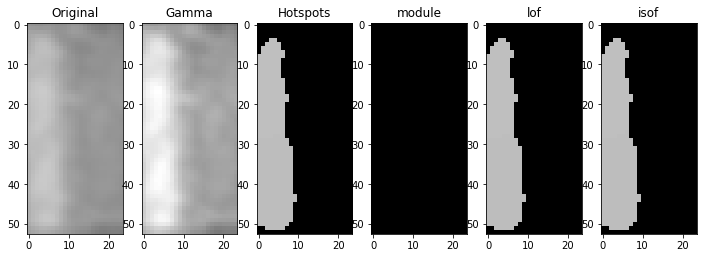

[-1.0018573  -1.02566749 -0.98895371 -0.9763843  -0.99474092 -1.01484809
 -0.97974603 -1.00152377]
[-1.88896714]
[-0.48037209 -0.48052631 -0.48367409 -0.45118038 -0.50043581 -0.455762
 -0.44180348 -0.48937568]
[-0.71558686]
0.0 0
166.jpg Normal
[-0.9872788  -1.05216414 -0.98844269 -0.98031332 -1.00592429 -0.95466193
 -2.85241263 -1.05945732]
[-1.91118773]
[-0.46017288 -0.47684361 -0.49648992 -0.477852   -0.42335628 -0.46245351
 -0.77543052 -0.50181463]
[-0.72447509]
0.0 0
2845.jpg Normal
[-0.98642748 -1.         -1.030218   -1.0163142  -0.97041527 -1.02566749
 -1.00448623 -0.98351928]
[-1.88896714]
[-0.47232604 -0.46025112 -0.45122735 -0.47383177 -0.45943234 -0.48052631
 -0.45659689 -0.43916809]
[-0.71558686]
0.0 0
3583.jpg Normal
[-1.03059838 -0.96958567 -1.02088628 -0.99470041 -0.99574641 -0.99453969
 -0.99558367 -0.97924826]
[-1.73581688]
[-0.4365831  -0.44245118 -0.46842575 -0.48690896 -0.4627332  -0.46240643
 -0.44622444 -0.45357202]
[-0.65432675]
0.0 0
98.jpg Normal
[-0.99571736 

[-1.09598849 -0.99815214 -0.97451892 -1.         -1.07243405 -1.03015007
 -0.9797918  -0.99318715]
[-1.91118773]
[-0.45604393 -0.42177361 -0.41939289 -0.41528758 -0.46501464 -0.42587873
 -0.41701445 -0.41526444]
[-0.72447509]
0.0 0
2676.jpg Normal
[-1.26944933 -1.00202659 -1.1667319  -1.00204048 -1.01262762 -1.07683867
 -1.00018385 -1.26944933]
[-1.88896714]
[-0.55251283 -0.48530746 -0.53658447 -0.48102455 -0.46944146 -0.51692881
 -0.47671775 -0.55251283]
[-0.71558686]
0.0 0
5119.jpg Normal
[-1.00515502 -1.00949076 -0.99290012 -1.00938861 -0.99376292 -0.99466821
 -0.9992936  -0.99714306]
[-1.91118773]
[-0.460977   -0.50786224 -0.45168576 -0.47927481 -0.46019054 -0.45984029
 -0.46514003 -0.45460739]
[-0.72447509]
0.0 0
4207.jpg Normal
[-0.98635542 -1.0711959  -1.00906233 -1.0087186  -1.64655678 -1.00008869
 -0.99546141 -1.        ]
[-1.69100393]
[-0.43473742 -0.48692551 -0.47554989 -0.46100684 -0.60558023 -0.45661346
 -0.43803984 -0.46204828]
[-0.63640157]
0.0 0
3568.jpg Normal
[-1.0082

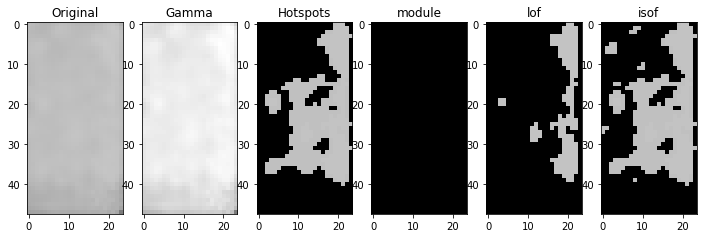

[-1.02489833 -0.99249767 -0.97924826 -0.98251544 -1.2654976  -0.99453969
 -1.00446294 -4.21440536]
[-1.73581688]
[-0.4709469  -0.44402617 -0.45357202 -0.47866511 -0.52845788 -0.46240643
 -0.45657741 -0.77416451]
[-0.65432675]
0.0 0
2662.jpg Normal
[-1.00826983 -1.03775093 -1.00841931 -1.01283859 -0.97572142 -0.99714306
 -1.         -1.51986686]
[-1.91118773]
[-0.44475431 -0.48582886 -0.45462948 -0.46091132 -0.45322016 -0.45460739
 -0.45840181 -0.60521353]
[-0.72447509]
0.0 0
4213.jpg Normal
[-1.02168931 -1.02319248 -1.47490676 -0.98827907 -1.05825502 -1.16870926
 -1.16870926 -0.98827907]
[-1.69100393]
[-0.46164602 -0.47377952 -0.54951966 -0.43949754 -0.49563517 -0.50557889
 -0.50557889 -0.43949754]
[-0.63640157]
0.0 0
827.jpg Normal
[-0.993349   -0.98351928 -1.10358491 -1.01138783 -0.99513803 -0.97974603
 -1.8949991  -1.0086181 ]
[-1.88896714]
[-0.44920019 -0.43916809 -0.47945853 -0.47331234 -0.44558789 -0.44180348
 -0.64299378 -0.45969013]
[-0.71558686]
0.0 0
67.jpg Normal
[-1.0222078

[-1.13170669 -0.983277   -0.99558367 -0.97924826 -1.73853849 -1.06290354
 -0.99075297 -0.99249767]
[-1.73581688]
[-0.47401704 -0.43920571 -0.44622444 -0.45357202 -0.57900325 -0.46609768
 -0.45242579 -0.44402617]
[-0.65432675]
0.0 0
3554.jpg Normal
[-1.         -0.9868618  -0.99782836 -1.         -1.         -1.
 -1.02602462 -0.97152962]
[-1.69100393]
[-0.44687749 -0.44419478 -0.45159373 -0.44422941 -0.44721816 -0.44796082
 -0.45725975 -0.43636846]
[-0.63640157]
0.0 0
1343.jpg Normal
[-0.99084679 -3.42317092 -1.28773454 -0.99504743 -2.24334017 -1.61099465
 -1.02447681 -1.10813686]
[-1.91118773]
[-0.47472644 -0.78807786 -0.54330877 -0.45706813 -0.71699817 -0.58924004
 -0.47481618 -0.53305703]
[-0.72447509]
0.0 0
1425.jpg Normal
[-1.05854299 -1.00646416 -1.03216968 -1.00646416 -0.99590362 -0.9797918
 -0.98984949 -1.04123206]
[-1.91118773]
[-0.44881335 -0.42071209 -0.4376324  -0.42071209 -0.43918335 -0.41701445
 -0.41204826 -0.48974815]
[-0.72447509]
0.0 0
3232.jpg Normal
[-1.0339346  -1.0

[-1.00416859 -1.0086181  -1.0163142  -0.99984772 -0.98351928 -1.02015699
 -1.0086181  -2.68151016]
[-1.88896714]
[-0.45478092 -0.45969013 -0.47383177 -0.45181353 -0.43916809 -0.46422839
 -0.45969013 -0.70487138]
[-0.71558686]
0.0 0
3540.jpg Normal
[-1.00178564 -1.06291397 -1.01890141 -0.97609109 -1.09761135 -0.99218265
 -1.04069991 -1.00988493]
[-1.69100393]
[-0.46227258 -0.49016685 -0.44852022 -0.44903484 -0.52143802 -0.42618612
 -0.48166944 -0.47590331]
[-0.63640157]
0.0 0
2163.jpg Normal
[-1.00825121 -1.01393075 -1.01463252 -1.00291195 -1.11288078 -1.00386553
 -0.97938898 -1.0339346 ]
[-1.85143439]
[-0.45488687 -0.48926843 -0.49248018 -0.49264177 -0.54219738 -0.47697287
 -0.48986842 -0.47736148]
[-0.70057376]
0.0 0
4512.jpg Normal
[-1.13192382 -0.98635542 -1.65067223 -1.24915103 -1.01673626 -1.03504597
 -1.05460642 -1.01673626]
[-1.69100393]
[-0.54035357 -0.43473742 -0.64693482 -0.55851182 -0.47022658 -0.50291874
 -0.5192793  -0.47022658]
[-0.63640157]
50.0 46.14213538169861 0.29511

[-1.00253592 -0.98491093 -0.99754617 -1.00207028 -1.73853849 -1.10511766
 -0.983277   -0.99883995]
[-1.73581688]
[-0.45287032 -0.43615098 -0.45100202 -0.45553277 -0.57900325 -0.48599671
 -0.43920571 -0.4544655 ]
[-0.65432675]
0.0 0
2605.jpg Normal
[-0.98127779 -1.02826156 -1.00800998 -1.00743691 -1.03852032 -0.99466821
 -0.96549699 -0.98325532]
[-1.91118773]
[-0.45316963 -0.47690757 -0.47282648 -0.46331179 -0.46062047 -0.45984029
 -0.44529598 -0.43893164]
[-0.72447509]
0.0 0
698.jpg Normal
[-0.98655809 -1.10300531 -0.96274708 -1.01184358 -1.01856314 -1.0344604
 -1.24042054 -1.46825422]
[-1.85143439]
[-0.44707315 -0.51991974 -0.44185283 -0.48055711 -0.46650592 -0.49094597
 -0.5350725  -0.58693296]
[-0.70057376]
0.0 0
840.jpg Normal
[-1.00347213 -1.02489935 -1.13082181 -1.03727751 -0.98827907 -0.99626786
 -1.01088633 -0.97398103]
[-1.69100393]
[-0.46928639 -0.43254188 -0.50718414 -0.44530567 -0.43949754 -0.43574375
 -0.46124481 -0.41659239]
[-0.63640157]
0.0 0
14.jpg Normal
[-0.97974603 

[-0.44721816 -0.43011132 -0.44210417 -0.46204828 -0.46289234 -0.43381182
 -0.44335063 -0.44662373]
[-0.63640157]
0.0 0
3296.jpg Normal
[-1.20689062 -1.02220784 -1.27445193 -0.98652019 -0.98984949 -1.00569919
 -1.51705844 -1.15014503]
[-1.91118773]
[-0.58070968 -0.47795682 -0.56943704 -0.48850878 -0.41204826 -0.5010118
 -0.6527946  -0.57155911]
[-0.72447509]
0.0 0
2188.jpg Normal
[-1.04219934 -1.05362721 -1.01622495 -1.10300531 -0.96274708 -1.01184358
 -1.04439636 -0.96274708]
[-1.85143439]
[-0.46294378 -0.48407089 -0.49213747 -0.51991974 -0.44185283 -0.48055711
 -0.4672756  -0.44185283]
[-0.70057376]
0.0 0
115.jpg Normal
[-1.01011861 -0.98351928 -1.14903767 -0.993349   -0.99984772 -1.030218
 -0.98611464 -0.993349  ]
[-1.88896714]
[-0.448398   -0.43916809 -0.50401741 -0.44920019 -0.45181353 -0.45122735
 -0.42840429 -0.44920019]
[-0.71558686]
0.0 0
1481.jpg Normal
[-0.98325532 -1.02826156 -0.96549699 -0.98325532 -1.0399921  -1.67280117
 -0.99290012 -1.05545894]
[-1.91118773]
[-0.43893164

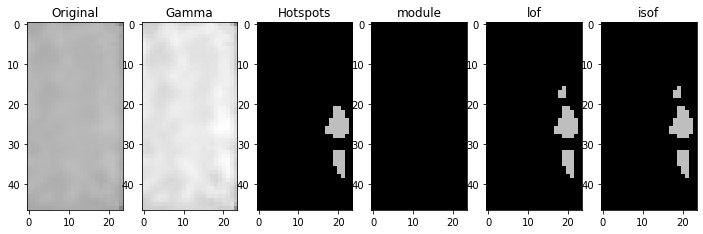

[-0.98947635 -1.03126957 -1.9367947  -0.98077513 -0.98251544 -1.03059838
 -1.13170669 -0.96958567]
[-1.73581688]
[-0.44223278 -0.4538705  -0.6363888  -0.44828521 -0.47866511 -0.4365831
 -0.47401704 -0.44245118]
[-0.65432675]
0.0 0
2413.jpg Normal
[-1.00841931 -1.03852032 -1.07415961 -0.99573948 -1.2815969  -0.99573948
 -1.00826983 -1.00938861]
[-1.91118773]
[-0.45462948 -0.46062047 -0.5008157  -0.44583131 -0.5474436  -0.44583131
 -0.44475431 -0.47927481]
[-0.72447509]
0.0 0
4062.jpg Normal
[-1.00897972 -1.00456409 -0.99707548 -1.03139971 -1.04219934 -1.03139971
 -1.00595147 -1.00585456]
[-1.85143439]
[-0.46097297 -0.47098977 -0.46495947 -0.47782567 -0.46294378 -0.47782567
 -0.47134703 -0.47338489]
[-0.70057376]
0.0 0
3725.jpg Normal
[-1.030218   -1.01038789 -0.98611464 -1.18317276 -0.98611464 -1.49191075
 -1.00448623 -1.00176872]
[-1.88896714]
[-0.45122735 -0.45236022 -0.42840429 -0.53632084 -0.42840429 -0.58189405
 -0.45659689 -0.45427461]
[-0.71558686]
0.0 0
1132.jpg Normal
[-1.36658

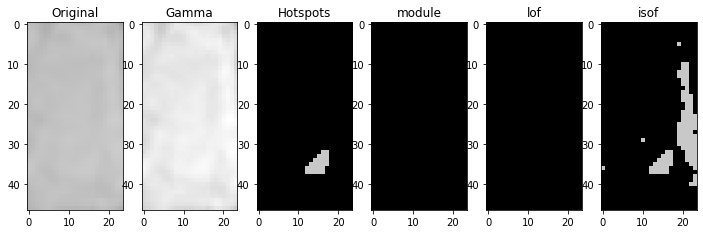

[-1.05825502 -1.21164255 -1.01088633 -1.47490676 -0.99489641 -1.34689759
 -1.04180141 -2.454088  ]
[-1.69100393]
[-0.49563517 -0.52057242 -0.46124481 -0.54951966 -0.46371354 -0.55314456
 -0.49011643 -0.67350037]
[-0.63640157]
0.0 0
3043.jpg Normal
[-0.99322179 -0.99075297 -3.74459138 -1.00348835 -1.0106305  -0.99883995
 -1.02489833 -0.98743924]
[-1.73581688]
[-0.44941211 -0.45242579 -0.7509492  -0.45183981 -0.46615467 -0.4544655
 -0.4709469  -0.45202201]
[-0.65432675]
0.0 0
4738.jpg Normal
[-0.99504743 -1.04279754 -1.20064218 -0.97572142 -1.03852032 -0.99504743
 -0.98809229 -1.00800998]
[-1.91118773]
[-0.45706813 -0.49496062 -0.51266813 -0.45322016 -0.46062047 -0.45706813
 -0.45052133 -0.47282648]
[-0.72447509]
0.0 0
3057.jpg Normal
[-1.01993465 -1.00181256 -1.56572716 -1.22136595 -0.98606214 -4.03386682
 -0.99054558 -1.08432681]
[-1.69100393]
[-0.48038827 -0.44315982 -0.58442444 -0.52162119 -0.43381182 -0.7896791
 -0.44865938 -0.47953693]
[-0.63640157]
0.0 0
2349.jpg Normal
[-1.065704

[-0.99318715 -0.99495968 -1.08188771 -0.96563894 -1.03216968 -0.99495968
 -0.98275019 -0.99318715]
[-1.91118773]
[-0.41526444 -0.41813728 -0.45554852 -0.42879663 -0.4376324  -0.41813728
 -0.41384659 -0.41526444]
[-0.72447509]
0.0 0
317.jpg Normal
[-1.05939652 -0.99322179 -1.18873129 -1.10511766 -1.0266414  -1.04692692
 -1.10747778 -1.04828328]
[-1.73581688]
[-0.49758309 -0.44941211 -0.52511647 -0.48599671 -0.45134461 -0.50465021
 -0.48004523 -0.49408036]
[-0.65432675]
0.0 0
4923.jpg Normal
[-1.00949076 -0.97907645 -1.00826983 -1.288241   -1.00949076 -1.00743691
 -0.99864306 -0.99864306]
[-1.91118773]
[-0.50786224 -0.46354972 -0.44475431 -0.56512601 -0.50786224 -0.46331179
 -0.48824262 -0.48824262]
[-0.72447509]
0.0 0
3094.jpg Normal
[-0.98606214 -0.98458489 -1.0711959  -0.99782836 -1.19700182 -1.00694207
 -1.22136595 -1.00181256]
[-1.69100393]
[-0.43381182 -0.45155761 -0.48692551 -0.45159373 -0.54413065 -0.44529204
 -0.52162119 -0.44315982]
[-0.63640157]
0.0 0
471.jpg Normal
[-1.012578

[-0.43267498 -0.49942817 -0.43589778 -0.44667571 -0.55753792 -0.46187094
 -0.46656139 -0.43589778]
[-0.68572467]
0.0 0
511.jpg Normal
[-1.00841931 -0.99290012 -0.9992936  -0.99573948 -0.99376292 -1.00217687
 -1.13560409 -1.00826983]
[-1.91118773]
[-0.45462948 -0.45168576 -0.46514003 -0.44583131 -0.46019054 -0.4637819
 -0.53839664 -0.44475431]
[-0.72447509]
0.0 0
1085.jpg Normal
[-0.98947635 -1.01823006 -0.96958567 -1.39786148 -1.10677746 -0.98743924
 -1.03059838 -0.99558367]
[-1.73581688]
[-0.44223278 -0.48666504 -0.44245118 -0.53172654 -0.48760616 -0.45202201
 -0.4365831  -0.44622444]
[-0.65432675]
0.0 0
3692.jpg Normal
[-0.9971851  -1.00072288 -1.03604706 -0.97848854 -1.02925646 -0.9577743
 -0.9991781  -1.00040522]
[-1.81431168]
[-0.47021565 -0.46909658 -0.50409047 -0.47795393 -0.47285725 -0.43445392
 -0.47523173 -0.49558625]
[-0.68572467]
0.0 2.0 0.0 1.0
17.0 34.485281229019165 0.1796351170676612 0.9492012067912369
0.0 0
4843.jpg Normal
[-0.99736189 -0.99686554 -0.99340202 -0.997057

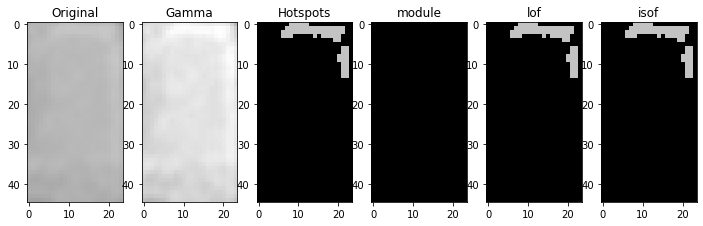

[-1.00008869 -1.         -1.00008869 -1.00823848 -0.98635542 -0.97878654
 -1.00716771 -1.01916859]
[-1.69100393]
[-0.45661346 -0.45479473 -0.45661346 -0.48554171 -0.43473742 -0.43749737
 -0.47018027 -0.48248687]
[-0.63640157]
0.0 0
1522.jpg Normal
[-1.16412236 -0.98127779 -1.0399921  -1.03775093 -0.98127779 -1.00944028
 -1.06438985 -1.00743691]
[-1.91118773]
[-0.51442273 -0.45316963 -0.465628   -0.48582886 -0.45316963 -0.48615311
 -0.50262958 -0.46331179]
[-0.72447509]
0.0 0
908.jpg Normal
[-1.04451421 -0.99794302 -1.01462389 -1.01677358 -0.97239806 -1.04451421
 -1.00831679 -1.35046616]
[-1.81431168]
[-0.4741976  -0.43744864 -0.45778842 -0.44910823 -0.44391678 -0.4741976
 -0.46230943 -0.57109007]
[-0.68572467]
0.0 0
1244.jpg Normal
[-1.13899646 -1.04069991 -1.34689759 -0.97609109 -1.1225694  -1.26287247
 -1.0657046  -1.13899646]
[-1.69100393]
[-0.51972832 -0.48166944 -0.55314456 -0.44903484 -0.50807283 -0.54886241
 -0.51477329 -0.51972832]
[-0.63640157]
0.0 0
5022.jpg Normal
[-1.001857

[-1.44967979 -1.01777812 -1.12811186 -0.99513803 -1.1667319  -1.00018385
 -1.12339543 -0.99791056]
[-1.88896714]
[-0.63552205 -0.47530484 -0.53488715 -0.44558789 -0.53658447 -0.47671775
 -0.47197661 -0.45504604]
[-0.71558686]
0.0 0
2957.jpg Normal
[-1.01201767 -0.96359261 -0.9721552  -0.96359261 -1.         -1.01201767
 -1.02178369 -1.03039113]
[-1.83714507]
[-0.49845363 -0.4457102  -0.51206444 -0.4457102  -0.44935734 -0.49845363
 -0.45605265 -0.50426341]
[-0.69485803]
0.0 0
3491.jpg Normal
[-0.99979505 -1.04544135 -1.01677378 -1.00558695 -1.00058492 -0.99963862
 -0.97874342 -0.99705737]
[-1.81431168]
[-0.44172469 -0.44879656 -0.45427465 -0.43989958 -0.46961144 -0.47045592
 -0.43413407 -0.43109698]
[-0.68572467]
0.0 0
1251.jpg Normal
[-1.10747778 -1.02811907 -1.08033981 -1.07969174 -0.99883995 -1.06556564
 -1.16999447 -0.99315912]
[-1.73581688]
[-0.48004523 -0.46384394 -0.52384949 -0.49796303 -0.4544655  -0.49431922
 -0.51294839 -0.44065555]
[-0.65432675]
0.0 0
2980.jpg Normal
[-0.9844

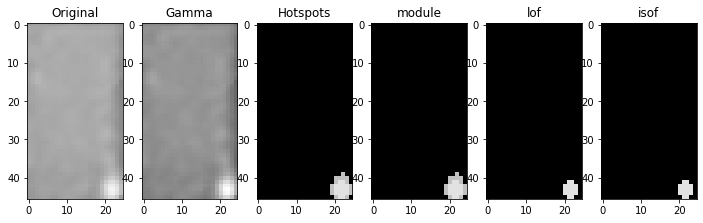

[-0.99218265 -0.99432932 -0.97373851 -0.99626786 -1.09761135 -0.99623403
 -1.03634945 -0.95828845]
[-1.69100393]
[-0.42618612 -0.46895008 -0.46710109 -0.43574375 -0.52143802 -0.43514305
 -0.48422883 -0.42133329]
[-0.63640157]
0.0 0
3334.jpg Normal
[-1.01546643 -1.12339543 -0.98611464 -1.0163142  -1.02060121 -1.01546643
 -0.99613539 -1.00152377]
[-1.88896714]
[-0.49218186 -0.47197661 -0.42840429 -0.47383177 -0.49800392 -0.49218186
 -0.48549882 -0.48937568]
[-0.71558686]
0.0 0
2994.jpg Normal
[-0.97225072 -1.10988119 -1.03039113 -0.96734269 -1.31931754 -1.01201767
 -1.01201767 -0.98493881]
[-1.83714507]
[-0.5072274  -0.54640896 -0.50426341 -0.4707413  -0.60686096 -0.49845363
 -0.49845363 -0.46131778]
[-0.69485803]
0.0 0
3452.jpg Normal
[-1.00794693 -0.99075297 -1.02811907 -0.98947635 -1.00348835 -1.10747778
 -2.5717965  -0.99322179]
[-1.73581688]
[-0.46034037 -0.45242579 -0.46384394 -0.44223278 -0.45183981 -0.48004523
 -0.70048509 -0.44941211]
[-0.65432675]
0.0 0
5023.jpg Normal
[-1.0680

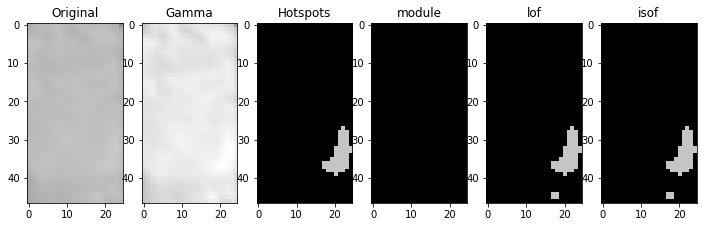

[-1.01705327 -1.12811186 -1.00152377 -1.12811186 -1.31646597 -1.00018385
 -1.01262762 -0.99513803]
[-1.88896714]
[-0.49892647 -0.53488715 -0.48937568 -0.53488715 -0.56451524 -0.47671775
 -0.46944146 -0.44558789]
[-0.71558686]
0.0 0
2764.jpg Normal
[-0.97552276 -1.00287732 -1.04479896 -0.99914938 -1.00103612 -1.00317364
 -1.00054072 -1.04416442]
[-1.81431168]
[-0.4420496  -0.4404138  -0.49795225 -0.43652813 -0.46588298 -0.43589778
 -0.46656139 -0.45537679]
[-0.68572467]
0.0 0
921.jpg Normal
[-1.01677358 -0.99794302 -0.9863097  -0.9577743  -0.99794302 -0.97239806
 -1.01469146 -0.9577743 ]
[-1.81431168]
[-0.44910823 -0.43744864 -0.44685088 -0.43445392 -0.43744864 -0.44391678
 -0.45474765 -0.43445392]
[-0.68572467]
0.0 0
2002.jpg Normal
[-0.9980371  -1.00348835 -0.99558367 -1.02489833 -0.99453969 -1.00348835
 -0.99322179 -0.983277  ]
[-1.73581688]
[-0.46823236 -0.45183981 -0.44622444 -0.4709469  -0.46240643 -0.45183981
 -0.44941211 -0.43920571]
[-0.65432675]
0.0 0
4473.jpg Normal
[-0.99218

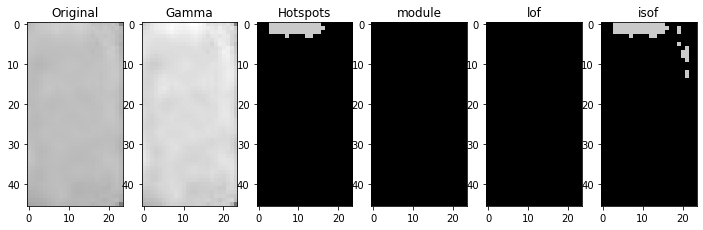

[-0.99613539 -0.99984772 -0.99474092 -0.99017609 -1.0163142  -1.01038789
 -1.06335817 -0.99613539]
[-1.88896714]
[-0.48549882 -0.45181353 -0.50043581 -0.47387163 -0.47383177 -0.45236022
 -0.49006541 -0.48549882]
[-0.71558686]
0.0 0
1735.jpg Normal
[-1.05723229 -1.00558695 -0.99736189 -1.33812714 -1.01046277 -0.97171928
 -1.10504562 -1.01988179]
[-1.81431168]
[-0.51581208 -0.43989958 -0.44566577 -0.5643501  -0.50227594 -0.45396031
 -0.50332222 -0.51073514]
[-0.68572467]
0.0 0
3122.jpg Normal
[-1.02071012 -1.00495937 -0.97609109 -0.99496343 -0.99218265 -0.97609109
 -1.05575881 -0.99623403]
[-1.69100393]
[-0.47472651 -0.46034361 -0.44903484 -0.47874012 -0.42618612 -0.44903484
 -0.45410586 -0.43514305]
[-0.63640157]
0.0 0
4895.jpg Normal
[-1.09569889 -1.00207028 -1.04294437 -1.03059838 -1.10511766 -1.04294437
 -1.05716194 -0.99315912]
[-1.73581688]
[-0.4878893  -0.45553277 -0.49530353 -0.4365831  -0.48599671 -0.49530353
 -0.52918865 -0.44065555]
[-0.65432675]
0.0 0
3644.jpg Normal
[-1.2675

[-1.09512179 -0.99017609 -1.00448623 -1.0016139  -1.00018385 -0.99017609
 -1.00202659 -1.79666114]
[-1.88896714]
[-0.53100889 -0.47387163 -0.45659689 -0.4987464  -0.47671775 -0.47387163
 -0.48530746 -0.62516795]
[-0.71558686]
0.0 0
2566.jpg Normal
[-0.97082734 -1.03059838 -1.02088628 -0.99075297 -0.98491093 -1.05294581
 -0.99574641 -0.99075297]
[-1.73581688]
[-0.45771448 -0.4365831  -0.46842575 -0.45242579 -0.43615098 -0.46867056
 -0.4627332  -0.45242579]
[-0.65432675]
0.0 0
3678.jpg Normal
[-1.47977356 -1.02711966 -0.99712391 -3.12916473 -1.07883634 -1.06795276
 -0.986911   -0.97082833]
[-1.83714507]
[-0.57757792 -0.4348597  -0.43941753 -0.74554599 -0.49483393 -0.45608039
 -0.43532877 -0.43272906]
[-0.69485803]
0.0 0
4117.jpg Normal
[-0.97373851 -1.01125066 -1.01804299 -3.62583282 -1.00695244 -1.09761135
 -1.05575881 -1.04069991]
[-1.69100393]
[-0.46710109 -0.43828712 -0.4821375  -0.7608334  -0.44509238 -0.52143802
 -0.45410586 -0.48166944]
[-0.63640157]
0.0 0
2572.jpg Normal
[-1.    

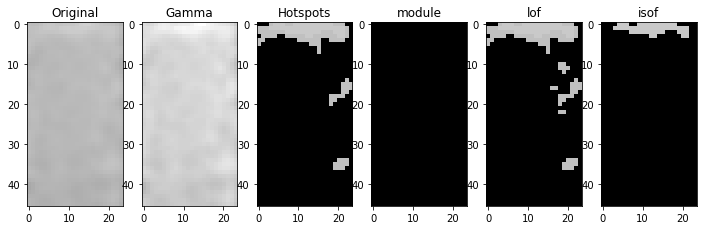

[-0.97740162 -1.06802405 -1.13266856 -0.98928536 -0.97740162 -2.21868437
 -0.96685961 -1.00356488]
[-1.83714507]
[-0.40941877 -0.42655337 -0.44407675 -0.42264125 -0.40941877 -0.64162781
 -0.42312981 -0.43945524]
[-0.69485803]
0.0 0
470.jpg Normal
[-0.99771889 -1.0210599  -1.04544135 -1.01156    -0.99669935 -1.01046277
 -1.0149323  -0.97902498]
[-1.81431168]
[-0.46264183 -0.45471709 -0.44879656 -0.45013107 -0.46830182 -0.50227594
 -0.46161963 -0.43253671]
[-0.68572467]
0.0 0
4088.jpg Normal
[-1.00988493 -1.02489935 -2.22567741 -0.97028444 -1.05463125 -1.25966733
 -1.01088633 -0.97373851]
[-1.69100393]
[-0.47590331 -0.43254188 -0.63814516 -0.42124602 -0.45555175 -0.52807065
 -0.46124481 -0.46710109]
[-0.63640157]
0.0 0
464.jpg Normal
[-1.1088987  -1.22421755 -1.06884705 -1.58944808 -1.25305116 -1.00433424
 -1.03224289 -1.1088987 ]
[-1.9128832]
[-0.51742785 -0.55199862 -0.49651882 -0.59166046 -0.5540879  -0.47885998
 -0.50294479 -0.51742785]
[-0.72515328]
0.0 0
1696.jpg Normal
[-0.9807751

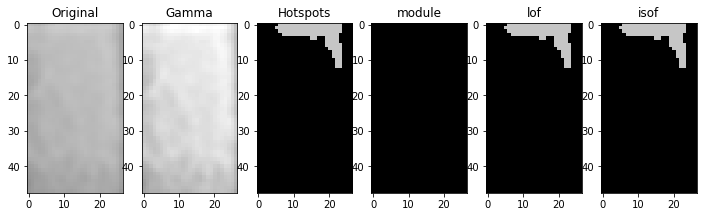

[-1.42330382 -1.05618045 -2.81107626 -1.26027293 -1.18317276 -2.13530013
 -1.75147884 -1.66358732]
[-1.88896714]
[-0.55817611 -0.48108668 -0.71071727 -0.56588917 -0.53632084 -0.66167919
 -0.61506399 -0.59696671]
[-0.71558686]
0.0 0
2412.jpg Normal
[-1.59781328 -1.02168931 -1.01804299 -0.95828845 -1.2372655  -1.26287247
 -1.29348877 -3.01006896]
[-1.69100393]
[-0.64538085 -0.46164602 -0.4821375  -0.42133329 -0.55791975 -0.54886241
 -0.55999432 -0.72162121]
[-0.63640157]
495.5 139.1543276309967 0.32155856981252506 0.7335892553394416
495.5 139.1543276309967 0.32155856981252506 0.7335892553394416
53.0 505
4077.jpg Multi-Hotspots


[-0.98732412 -1.06779502 -1.10094283 -1.01343225 -0.96382353 -0.97250982
 -1.06919857 -3.67114874]
[-1.83714507]
[-0.44261604 -0.4947937  -0.51190317 -0.45104024 -0.44199207 -0.42978625
 -0.49066586 -0.78012027]
[-0.69485803]
0.0 0
3718.jpg Normal
[-0.99887277 -1.01407519 -1.00612344 -1.05983617 -1.02980691 -0.98944457
 -0.98888662 -0.99887277]
[-1.9128832]
[-0.4600679  -0.46373886 -0.46885711 -0.49539713 -0.45645576 -0.45439502
 -0.44834875 -0.4600679 ]
[-0.72515328]
0.0 0
2406.jpg Normal
[-1.10440756 -1.02293816 -0.99315912 -1.39786148 -1.13260387 -1.04692692
 -1.04294437 -0.97082734]
[-1.73581688]
[-0.52535264 -0.45383465 -0.44065555 -0.53172654 -0.50826317 -0.50465021
 -0.49530353 -0.45771448]
[-0.65432675]
0.0 0
1669.jpg Normal
[-1.10988119 -0.97225072 -0.99826967 -1.03039113 -1.04927139 -0.98423852
 -0.9721552  -1.20825254]
[-1.83714507]
[-0.54640896 -0.5072274  -0.49395734 -0.50426341 -0.51716286 -0.47311024
 -0.51206444 -0.59437064]
[-0.69485803]
0.0 0
2360.jpg Normal
[-0.98051

[-1.04357554 -0.98736346 -1.06071737 -0.97239806 -1.55721943 -1.02088456
 -0.9577743  -1.11150808]
[-1.81431168]
[-0.46198195 -0.46225672 -0.48473549 -0.44391678 -0.58369594 -0.44873671
 -0.43445392 -0.51156027]
[-0.68572467]
0.0 0
855.jpg Normal
[-0.99297631 -1.16412236 -0.98325532 -1.2815969  -1.07415961 -1.08851257
 -1.34746544 -1.00482549]
[-1.91118773]
[-0.47997556 -0.51442273 -0.43893164 -0.5474436  -0.5008157  -0.50907329
 -0.57811006 -0.47153156]
[-0.72447509]
0.0 0
1319.jpg Normal
[-0.96958567 -1.00956655 -1.05294581 -0.98491093 -1.03059838 -0.98947635
 -1.16999447 -0.99558367]
[-1.73581688]
[-0.44245118 -0.47861937 -0.46867056 -0.43615098 -0.4365831  -0.44223278
 -0.51294839 -0.44622444]
[-0.65432675]
0.0 0
15.jpg Normal
[-1.04092043 -1.01656784 -1.00815111 -1.00692918 -1.00055568 -1.02226552
 -1.00704812 -1.10419874]
[-1.83714507]
[-0.47301997 -0.45293123 -0.46904683 -0.45060818 -0.46470182 -0.47377321
 -0.45429772 -0.51614263]
[-0.69485803]
0.0 0
4507.jpg Normal
[-1.0633581

[-1.05610061 -1.00634235 -1.00814488 -0.96185709 -1.03354061 -0.98367891
 -1.00814488 -0.99604916]
[-1.9128832]
[-0.44801213 -0.45904648 -0.44025086 -0.43454327 -0.47694319 -0.44500939
 -0.44025086 -0.45451219]
[-0.72515328]
0.0 0
843.jpg Normal
[-0.96926242 -0.99228728 -0.97129065 -1.07123408 -0.99848118 -0.97518641
 -0.90282681 -1.42505814]
[-1.83714507]
[-0.42955288 -0.4337433  -0.41574654 -0.46511477 -0.42889626 -0.42208283
 -0.42334212 -0.53917669]
[-0.69485803]
0.0 0
1469.jpg Normal
[-1.00831679 -0.99958088 -1.01677358 -0.99409817 -0.9971851  -1.52810903
 -1.04451421 -0.99794302]
[-1.81431168]
[-0.46230943 -0.49005783 -0.44910823 -0.48109985 -0.47021565 -0.57383784
 -0.4741976  -0.43744864]
[-0.68572467]
0.0 0
2160.jpg Normal
[-1.03461316 -1.02008526 -0.99504743 -0.99864306 -0.99375596 -1.0288128
 -1.16412236 -1.00809177]
[-1.91118773]
[-0.51834027 -0.47062984 -0.45706813 -0.48824262 -0.45661402 -0.50738688
 -0.51442273 -0.47879853]
[-0.72447509]
0.0 0
4511.jpg Normal
[-1.       

[-1.19093303 -1.00058492 -1.0225302  -0.96501406 -1.09300663 -0.97874342
 -1.03069498 -1.05723229]
[-1.81431168]
[-0.55089046 -0.46961144 -0.50416063 -0.42901223 -0.52363389 -0.43413407
 -0.48707812 -0.51581208]
[-0.68572467]
0.0 0
3068.jpg Normal
[-1.00822905 -1.00119878 -1.00569558 -1.02515538 -0.97284021 -1.04505087
 -0.99272811 -1.        ]
[-1.9128832]
[-0.46501493 -0.44239943 -0.46683754 -0.49242222 -0.43583575 -0.47644213
 -0.486637   -0.45012303]
[-0.72515328]
0.0 0
2376.jpg Normal
[-1.00815111 -1.02540346 -1.00642183 -0.99686858 -0.99383298 -0.98493881
 -1.01110749 -0.96359261]
[-1.83714507]
[-0.46904683 -0.48267669 -0.4651714  -0.45754262 -0.43409287 -0.46131778
 -0.47595737 -0.4457102 ]
[-0.69485803]
0.0 0
4713.jpg Normal
[-1.02081735 -1.05118613 -1.02887774 -1.20829099 -0.97304105 -1.01474113
 -1.06795276 -1.00831031]
[-1.83714507]
[-0.46045394 -0.52427009 -0.47189268 -0.57304758 -0.43666119 -0.52772151
 -0.45608039 -0.52115924]
[-0.69485803]
0.0 0
2362.jpg Normal
[-1.01325

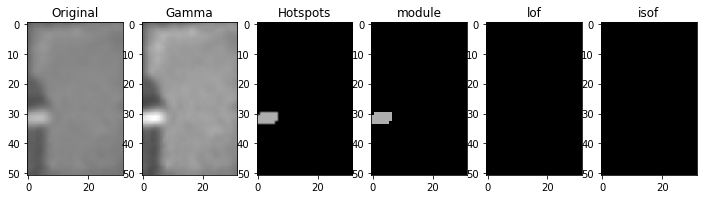

[-0.99392021 -0.99753926 -1.03936464 -0.96989403 -1.03252108 -0.99674499
 -0.99506264 -1.00195808]
[-1.76166564]
[-0.48801699 -0.46304762 -0.49331601 -0.46561956 -0.47219992 -0.47216698
 -0.44783056 -0.46833113]
[-0.66466626]
0.0 0
4075.jpg Normal
[-1.02730481 -1.         -1.00608477 -0.98472615 -1.01337877 -1.02924037
 -0.99908689 -0.98543111]
[-1.88896714]
[-0.48255399 -0.46127316 -0.45532676 -0.46078094 -0.47357986 -0.4916131
 -0.46550107 -0.44989371]
[-0.71558686]
0.0 0
1125.jpg Normal
[-1.16089538 -0.98319183 -1.03345474 -0.9971851  -1.0487654  -1.28817133
 -1.11291144 -1.1590538 ]
[-1.81431168]
[-0.53155943 -0.47031901 -0.50286151 -0.47021565 -0.52703381 -0.60265641
 -0.54147708 -0.50112325]
[-0.68572467]
0.0 0
3732.jpg Normal
[-1.2726889  -0.99669935 -1.11661452 -1.01988179 -1.11661452 -1.08487979
 -1.21636958 -1.16899819]
[-1.81431168]
[-0.55578004 -0.46830182 -0.52539812 -0.51073514 -0.52539812 -0.51355307
 -0.56603647 -0.54698092]
[-0.68572467]
0.0 0
3054.jpg Normal
[-1.01179

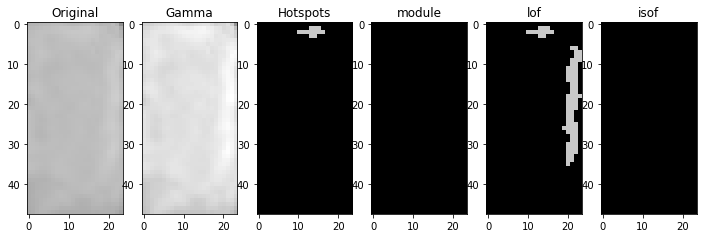

[-1.01096291 -1.0070454  -1.02667848 -1.00368189 -1.05420031 -1.07742515
 -1.05420031 -1.01032   ]
[-1.83714507]
[-0.50292904 -0.47269671 -0.50968057 -0.44079418 -0.50091612 -0.46676786
 -0.50091612 -0.48074945]
[-0.69485803]
0.0 0
3040.jpg Normal
[-0.99123032 -1.05406894 -1.01007716 -1.17973198 -1.00054072 -0.98051899
 -1.17973198 -1.00962894]
[-1.81431168]
[-0.46275836 -0.51252913 -0.46187094 -0.53209281 -0.46656139 -0.45457579
 -0.53209281 -0.48670879]
[-0.68572467]
0.0 0
2438.jpg Normal
[-0.98319183 -1.04575433 -0.99630323 -1.01462389 -0.9971851  -1.03872654
 -1.00685308 -1.00072288]
[-1.81431168]
[-0.47031901 -0.47462748 -0.44888402 -0.45778842 -0.47021565 -0.497163
 -0.467415   -0.46909658]
[-0.68572467]
0.0 0
3726.jpg Normal
[-1.22421755 -1.03064037 -1.58944808 -1.00814488 -1.28106429 -1.39232298
 -1.07864021 -1.03617262]
[-1.9128832]
[-0.55199862 -0.49874744 -0.59166046 -0.44025086 -0.55417101 -0.56224649
 -0.50618659 -0.51057992]
[-0.72515328]
0.0 0
4049.jpg Normal
[-2.4279551

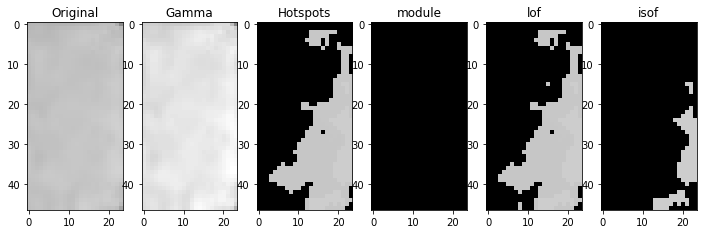

[-1.06188397 -1.03423256 -1.02116277 -0.97082833 -1.032614   -0.9944431
 -1.06795276 -0.99712391]
[-1.83714507]
[-0.47165152 -0.52553595 -0.464251   -0.43272906 -0.50002953 -0.43333335
 -0.45608039 -0.43941753]
[-0.69485803]
0.0 0
4908.jpg Normal
[-0.99879895 -0.97524231 -1.00756261 -0.98367891 -1.00219531 -1.00814488
 -4.65113011 -0.97531594]
[-1.9128832]
[-0.45446339 -0.44773623 -0.48419433 -0.44500939 -0.46476642 -0.44025086
 -0.79924289 -0.43204528]
[-0.72515328]
0.0 0
3901.jpg Normal
[-0.99794302 -0.99059929 -1.46291956 -1.0054264  -0.99148909 -0.99148909
 -1.07225892 -1.06071737]
[-1.81431168]
[-0.43744864 -0.46869282 -0.56960038 -0.4691551  -0.45173935 -0.45173935
 -0.50455742 -0.48473549]
[-0.68572467]
0.0 0
3929.jpg Normal
[-0.9629854  -1.01007716 -1.32494088 -0.99914938 -0.9629854  -2.15609223
 -1.02723165 -1.02703115]
[-1.81431168]
[-0.42397456 -0.46187094 -0.5641484  -0.43652813 -0.42397456 -0.68773141
 -0.44819715 -0.4706911 ]
[-0.68572467]
0.0 0
472.jpg Normal
[-1.2750112

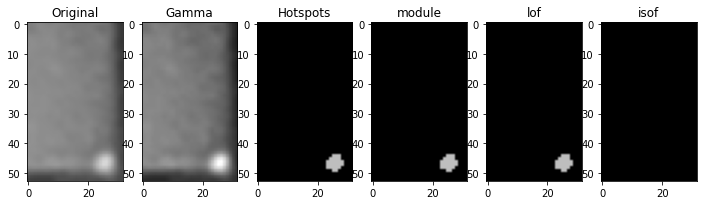

[-1.0225302  -0.99771889 -0.99705737 -1.00246744 -1.01587951 -1.05723229
 -1.56740611 -1.01156   ]
[-1.81431168]
[-0.50416063 -0.46264183 -0.43109698 -0.49425092 -0.51521    -0.51581208
 -0.57308085 -0.45013107]
[-0.68572467]
0.0 0
1694.jpg Normal
[-1.06071737 -0.99635942 -1.46291956 -0.99635942 -1.02340749 -1.05097787
 -1.07225892 -1.21035571]
[-1.81431168]
[-0.48473549 -0.46506589 -0.56960038 -0.46506589 -0.47331333 -0.47311558
 -0.50455742 -0.50305411]
[-0.68572467]
0.0 0
466.jpg Normal
[-1.03354061 -1.00612344 -0.98367891 -1.04070101 -0.96185709 -0.98793758
 -1.05610061 -1.00612344]
[-1.9128832]
[-0.47694319 -0.46885711 -0.44500939 -0.47350087 -0.43454327 -0.45254749
 -0.44801213 -0.46885711]
[-0.72515328]
0.0 0
4115.jpg Normal
[-1.01040512 -1.02431243 -0.99686858 -1.02431243 -1.04927139 -1.00055568
 -1.00755886 -1.02178369]
[-1.83714507]
[-0.47175658 -0.51397918 -0.45754262 -0.51397918 -0.51716286 -0.46470182
 -0.44209041 -0.45605265]
[-0.69485803]
0.0 0
2564.jpg Normal
[-0.986086

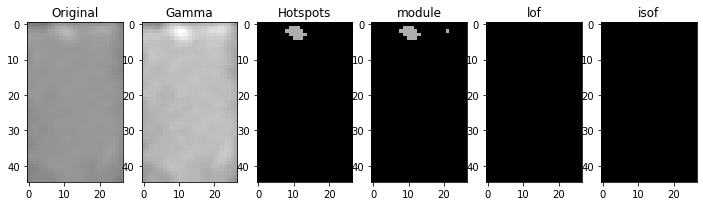

[-0.98367891 -1.00878262 -0.96185709 -0.99387122 -1.05610061 -1.00156851
 -1.00814488 -1.8415376 ]
[-1.9128832]
[-0.44500939 -0.45740973 -0.43454327 -0.45224007 -0.44801213 -0.47798087
 -0.44025086 -0.60010481]
[-0.72515328]
0.0 0
3646.jpg Normal
[-0.98456983 -0.97501425 -1.06118777 -0.97284021 -1.00119878 -1.00767372
 -1.32321905 -1.02171287]
[-1.9128832]
[-0.44398444 -0.45931912 -0.4747022  -0.43583575 -0.44239943 -0.46494828
 -0.53470692 -0.4832148 ]
[-0.72515328]
0.0 0
2558.jpg Normal
[-0.99352973 -0.99914938 -1.00998485 -1.01007716 -1.00998485 -1.20359465
 -0.99352973 -1.00887097]
[-1.81431168]
[-0.45267898 -0.43652813 -0.47240566 -0.46187094 -0.47240566 -0.5281397
 -0.45267898 -0.45393218]
[-0.68572467]
0.0 0
4897.jpg Normal
[-0.97239806 -1.06210393 -0.9577743  -1.0054264  -1.01271218 -0.9863097
 -1.22647042 -0.97075605]
[-1.81431168]
[-0.44391678 -0.47170136 -0.43445392 -0.4691551  -0.46351141 -0.44685088
 -0.51257144 -0.44984983]
[-0.68572467]
0.0 0
3120.jpg Normal
[-1.01177994

[-0.45728654 -0.43656204 -0.44982068 -0.42334259 -0.4316726  -0.49201366
 -0.44123891 -0.46326513]
[-0.69319991]
0.0 0
2766.jpg Normal
[-0.99506264 -1.0089318  -0.97972234 -1.01348809 -0.96989403 -1.04888798
 -1.27697421 -0.93734784]
[-1.76166564]
[-0.44783056 -0.46398738 -0.43240228 -0.46892946 -0.46561956 -0.45449774
 -0.52955801 -0.43074717]
[-0.66466626]
0.0 0
3478.jpg Normal
[-1.00612461 -1.03571836 -0.99390929 -1.02730481 -1.00038046 -1.
 -1.01337877 -0.97784697]
[-1.88896714]
[-0.49204446 -0.47399401 -0.46262336 -0.48255399 -0.47066132 -0.47152465
 -0.47357986 -0.4861777 ]
[-0.71558686]
0.0 0
4317.jpg Normal
[-1.00724471 -0.99756907 -0.97171928 -0.99669935 -1.01156    -1.02928407
 -1.0149323  -1.04544135]
[-1.81431168]
[-0.44664723 -0.46845916 -0.45396031 -0.46830182 -0.45013107 -0.50663071
 -0.46161963 -0.44879656]
[-0.68572467]
0.0 0
2772.jpg Normal
[-0.97034982 -0.98555019 -1.00801859 -0.99847432 -0.98328895 -1.01350736
 -1.00801859 -1.0077171 ]
[-1.78206358]
[-0.45736811 -0.

[-0.48750305 -0.48031366 -0.59185628 -0.47180784 -0.48889841 -0.53526202
 -0.50620122 -0.51440425]
[-0.69319991]
0.0 0
1285.jpg Normal
[-0.98653993 -0.98357495 -1.00608477 -1.01268935 -2.17581042 -0.99146604
 -0.98900024 -1.00643819]
[-1.88896714]
[-0.45642092 -0.46137796 -0.45532676 -0.47385027 -0.64095405 -0.48163285
 -0.45899951 -0.4846598 ]
[-0.71558686]
0.0 0
2954.jpg Normal
[-1.06990608 -1.00122908 -1.37789477 -1.16899819 -1.03069498 -0.99736189
 -1.05723229 -1.14183562]
[-1.81431168]
[-0.52128422 -0.48323667 -0.55973636 -0.54698092 -0.48707812 -0.44566577
 -0.51581208 -0.53795354]
[-0.68572467]
0.0 0
3492.jpg Normal
[-1.05142435 -0.9923796  -0.98014271 -1.05797689 -1.29653851 -1.06352232
 -1.         -1.05999732]
[-1.83299977]
[-0.48349826 -0.44123891 -0.44888672 -0.49617415 -0.51894091 -0.46818262
 -0.42463294 -0.4916091 ]
[-0.69319991]
0.0 0
2798.jpg Normal
[-0.99812607 -0.99487445 -1.04888798 -0.98765506 -0.96289017 -0.96989403
 -0.99166667 -1.02146642]
[-1.76166564]
[-0.4633

[-0.45126641 -0.46127316 -0.4549469  -0.47670026 -0.46864318 -0.601781
 -0.46274744 -0.47105367]
[-0.71558686]
0.0 0
2767.jpg Normal
[-1.05533516 -1.01032    -1.00590218 -1.01032    -1.032614   -1.01427732
 -1.01731333 -0.99766652]
[-1.83714507]
[-0.44360666 -0.48074945 -0.472632   -0.48074945 -0.50002953 -0.4421252
 -0.48759379 -0.47065131]
[-0.69485803]
0.0 0
5008.jpg Normal
[-1.03640817 -1.06856153 -1.01481312 -1.02841587 -1.14286586 -1.08490382
 -1.02218807 -1.02238797]
[-1.78206358]
[-0.49897894 -0.51935625 -0.49291855 -0.48759642 -0.51988389 -0.4953867
 -0.49830413 -0.49994473]
[-0.67282543]
0.0 0
922.jpg Normal
[-1.68896056 -1.12347795 -1.90475809 -1.35051513 -1.00584268 -2.49230597
 -1.30950758 -1.01871156]
[-1.76166564]
[-0.60817026 -0.53225925 -0.61565292 -0.55392303 -0.4625845  -0.71771435
 -0.52091578 -0.47880173]
[-0.66466626]
0.0 0
1939.jpg Normal
[-0.97906341 -1.00275665 -0.99795097 -1.32929325 -1.01180274 -1.12884623
 -0.98767596 -1.01818458]
[-1.81431168]
[-0.45768463 

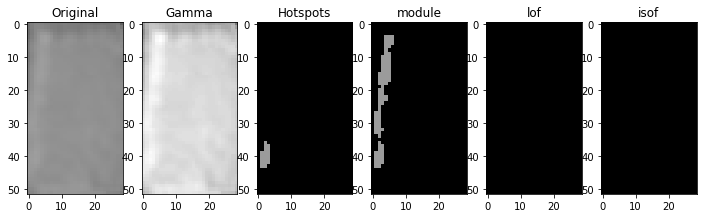

[-0.99914938 -1.01628433 -1.3045398  -1.01628433 -1.00175977 -0.9629854
 -0.99855006 -1.00887097]
[-1.81431168]
[-0.43652813 -0.45647998 -0.55074205 -0.45647998 -0.4582376  -0.42397456
 -0.44573535 -0.45393218]
[-0.68572467]
0.0 0
1093.jpg Normal
[-1.18272667 -1.02256098 -1.01042893 -1.00294609 -0.94283026 -1.09230589
 -1.001084   -1.09230589]
[-1.82039509]
[-0.56538286 -0.48344665 -0.50861108 -0.50360691 -0.42669327 -0.52450808
 -0.49744098 -0.52450808]
[-0.68815803]
0.0 0
3684.jpg Normal
[-0.99064478 -1.02047378 -1.01711936 -1.06415828 -1.00755858 -0.97082833
 -0.97250982 -0.986911  ]
[-1.83714507]
[-0.45649993 -0.4478679  -0.44509435 -0.48624721 -0.43643159 -0.43272906
 -0.42978625 -0.43532877]
[-0.69485803]
0.0 0
4855.jpg Normal
[-1.0360438  -0.97889938 -1.02705312 -0.99198479 -0.97889938 -1.
 -0.99923512 -1.00227594]
[-1.83299977]
[-0.46643619 -0.43930784 -0.4639309  -0.42559296 -0.43930784 -0.43287537
 -0.44416591 -0.45166258]
[-0.69319991]
0.0 0
261.jpg Normal
[-1.01505415 -0.97

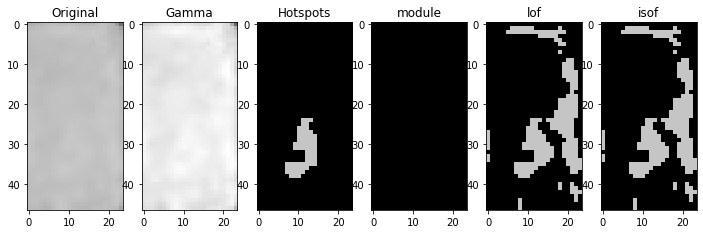

[-0.99794302 -0.98736346 -1.02088456 -0.9577743  -0.97075605 -0.99148909
 -1.21035571 -1.02952479]
[-1.81431168]
[-0.43744864 -0.46225672 -0.44873671 -0.43445392 -0.44984983 -0.45173935
 -0.50305411 -0.4433711 ]
[-0.68572467]
0.0 0
301.jpg Normal
[-0.96326327 -1.01510637 -1.         -1.0716058  -3.46624022 -0.99620052
 -1.         -1.01431206]
[-1.83299977]
[-0.43703632 -0.46326513 -0.42334259 -0.47111951 -0.69616544 -0.47034376
 -0.42334259 -0.46071123]
[-0.69319991]
0.0 0
3082.jpg Normal
[-1.01168308 -0.99908689 -1.01337877 -0.99858599 -1.         -1.02517854
 -0.98288445 -0.98653993]
[-1.88896714]
[-0.49230459 -0.46550107 -0.47357986 -0.44749645 -0.46127316 -0.47026404
 -0.45126641 -0.45642092]
[-0.71558686]
0.0 0
4935.jpg Normal
[-0.99272811 -0.98608683 -0.99266029 -0.99116298 -1.01627935 -1.17310132
 -1.00569558 -0.99813726]
[-1.9128832]
[-0.486637   -0.44360468 -0.4840639  -0.45160885 -0.47086165 -0.51647274
 -0.46683754 -0.4623259 ]
[-0.72515328]
0.0 0
467.jpg Normal
[-0.9974269

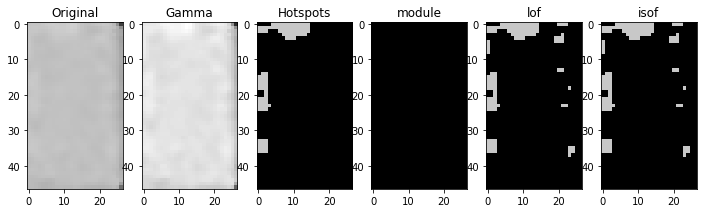

[-1.01505415 -0.9877151  -1.11442854 -1.03285613 -0.98338478 -0.98538844
 -1.01163624 -0.96825666]
[-1.86224249]
[-0.4470827  -0.45338106 -0.48722162 -0.47806673 -0.43830995 -0.45224607
 -0.45758408 -0.44135081]
[-0.704897]
15.5 17.071067690849304 0.6683749941974539 0.9698915231888942
15.5 17.071067690849304 0.6683749941974539 0.9698915231888942
24.0 0
3727.jpg Junction-Box-Error


[-1.0179592  -1.01965781 -1.00755858 -0.9945185  -1.01427732 -1.43506741
 -0.97250982 -1.01711936]
[-1.83714507]
[-0.43666167 -0.45705806 -0.43643159 -0.44495183 -0.4421252  -0.576089
 -0.42978625 -0.44509435]
[-0.69485803]
0.0 0
2439.jpg Normal
[-1.57879643 -0.99819218 -1.01601977 -2.59631289 -0.99930249 -0.99994187
 -1.09387304 -0.97908031]
[-1.83299977]
[-0.5795063  -0.44777145 -0.46985933 -0.71173285 -0.43738681 -0.50199335
 -0.50591604 -0.43936519]
[-0.69319991]
0.0 0
3733.jpg Normal
[-0.96782797 -1.0589506  -0.9876249  -1.10038618 -1.05983346 -0.9908218
 -1.06285357 -0.99438242]
[-1.76166564]
[-0.43473109 -0.45171961 -0.43423689 -0.51497915 -0.46850086 -0.4285664
 -0.45701392 -0.42504852]
[-0.66466626]
0.0 0
1124.jpg Normal
[-1.00525685 -0.97365431 -1.03571836 -0.98472615 -1.00911578 -0.97784697
 -1.00612461 -1.07455129]
[-1.88896714]
[-0.48560234 -0.4613155  -0.47399401 -0.46078094 -0.49491471 -0.4861777
 -0.49204446 -0.50779727]
[-0.71558686]
0.0 0
1642.jpg Normal
[-1.09300663 

[-0.45005497 -0.44180497 -0.43930784 -0.44416591 -0.42559296 -0.46381254
 -0.43287537 -0.42656099]
[-0.69319991]
0.0 0
3243.jpg Normal
[-1.01444125 -0.97902498 -0.98828719 -0.99538326 -1.00902657 -0.99963862
 -1.02662163 -2.30533857]
[-1.81431168]
[-0.45388725 -0.43253671 -0.46351782 -0.46257743 -0.44037854 -0.47045592
 -0.45662936 -0.66793193]
[-0.68572467]
0.0 0
4538.jpg Normal
[-0.9674747  -1.21272771 -1.00588789 -1.04248426 -2.31162199 -0.97686703
 -1.00504047 -0.97605136]
[-1.86224249]
[-0.45452162 -0.49767272 -0.44454898 -0.47107329 -0.63335712 -0.44867261
 -0.45643809 -0.433601  ]
[-0.704897]
0.0 0
3257.jpg Normal
[-0.96871319 -0.96382353 -1.00755858 -1.10581399 -0.986911   -1.02047378
 -0.97250982 -1.0057379 ]
[-1.83714507]
[-0.43002354 -0.44199207 -0.43643159 -0.52167853 -0.43532877 -0.4478679
 -0.42978625 -0.42798906]
[-0.69485803]
0.0 0
2149.jpg Normal
[-0.99968124 -0.98794775 -1.00119878 -1.13460894 -0.98801311 -4.5286096
 -0.99813726 -1.04743473]
[-1.9128832]
[-0.4494662  

[-1.01561189 -0.98844196 -1.02238797 -1.02243297 -0.97574518 -1.00805535
 -0.98875171 -2.11018745]
[-1.78206358]
[-0.47429248 -0.4603008  -0.49994473 -0.47727629 -0.44984026 -0.48648977
 -0.45909493 -0.67208101]
[-0.67282543]
0.0 0
842.jpg Normal
[-1.03232083 -1.0382098  -1.02952479 -1.09891932 -2.11868006 -1.00131395
 -1.04004685 -1.03604706]
[-1.81431168]
[-0.50042402 -0.52055484 -0.4433711  -0.53729082 -0.64319542 -0.4794848
 -0.51740183 -0.50409047]
[-0.68572467]
0.0 0
2607.jpg Normal
[-1.0123766  -0.99387122 -0.97544177 -0.99387122 -1.01869517 -1.01134075
 -1.01017401 -0.98367891]
[-1.9128832]
[-0.46259308 -0.45224007 -0.45397597 -0.45224007 -0.44247571 -0.43597185
 -0.4651132  -0.44500939]
[-0.72515328]
0.0 0
3519.jpg Normal
[-1.02834648 -0.96326327 -1.         -1.0430131  -1.08218637 -1.
 -0.99133618 -1.01431206]
[-1.83299977]
[-0.49282855 -0.43703632 -0.42334259 -0.43966714 -0.51473981 -0.46140884
 -0.43656204 -0.46071123]
[-0.69319991]
0.0 0
4276.jpg Normal
[-0.97501425 -1.016

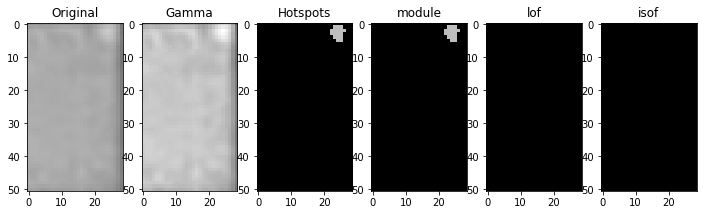

[-1.00902657 -0.99736189 -1.23291612 -1.04500615 -0.97359645 -1.00902657
 -1.01417652 -0.98767596]
[-1.81431168]
[-0.44037854 -0.44566577 -0.55996668 -0.47704063 -0.4421959  -0.44037854
 -0.45603873 -0.42961073]
[-0.68572467]
0.0 0
4266.jpg Normal
[-1.02487355 -0.98463078 -1.03345474 -0.9971851  -0.98736346 -1.00168836
 -0.99934516 -1.00506608]
[-1.81431168]
[-0.50115275 -0.48277028 -0.50286151 -0.47021565 -0.46225672 -0.48418405
 -0.47313796 -0.48561059]
[-0.68572467]
0.0 0
2617.jpg Normal
[-1.02912706 -1.03250358 -1.03340393 -1.10649348 -1.03115239 -1.03467717
 -1.02325905 -1.31955219]
[-1.86224249]
[-0.52491308 -0.48758009 -0.52917079 -0.55009503 -0.48306015 -0.46954349
 -0.47193643 -0.53622582]
[-0.704897]
0.0 0
2171.jpg Normal
[-1.03848614 -0.96801642 -1.00872153 -0.99482235 -1.00063721 -0.99614239
 -0.99482235 -1.03848614]
[-1.82039509]
[-0.48217236 -0.45169131 -0.45407167 -0.45474606 -0.47599017 -0.47934298
 -0.45474606 -0.48217236]
[-0.68815803]
0.0 0
4500.jpg Normal
[-0.997476

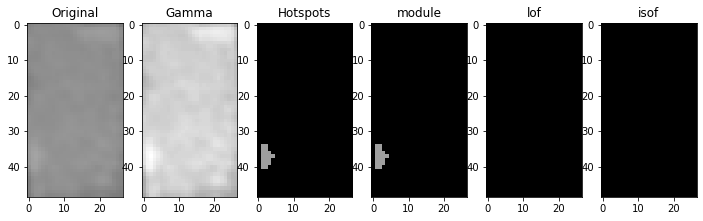

[-1.60396999 -1.43469288 -1.17049547 -1.51516889 -0.99177673 -1.3320166
 -1.80099745 -1.36254198]
[-1.83299977]
[-0.63523559 -0.58566342 -0.54274176 -0.60010677 -0.47396678 -0.5491285
 -0.69044711 -0.56806716]
[-0.69319991]
0.0 0
2165.jpg Normal
[-1.55253566 -1.16367873 -2.1791615  -1.01845387 -1.16367873 -1.00730968
 -0.99812607 -1.43406908]
[-1.76166564]
[-0.59319914 -0.50991842 -0.70299809 -0.48339216 -0.50991842 -0.47502098
 -0.46338456 -0.59754588]
[-0.66466626]
0.0 0.0 0 0
1.0 4.0 0.7853981633974483 1.0
62.5 49.55634891986847 0.31980943871489637 0.9383372593388903
62.5 49.55634891986847 0.31980943871489637 0.9383372593388903
61.0 25
4514.jpg Single-Hotspot


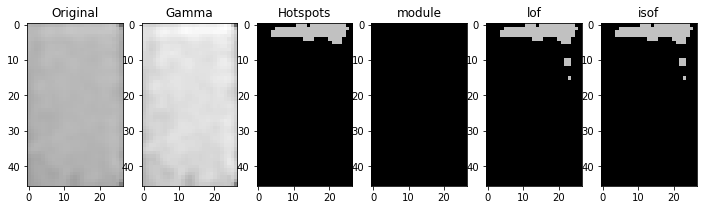

[-1.01343225 -1.00755858 -1.06415828 -0.96871319 -0.9945185  -1.02918231
 -0.96382353 -0.9944431 ]
[-1.83714507]
[-0.45104024 -0.43643159 -0.48624721 -0.43002354 -0.44495183 -0.46271614
 -0.44199207 -0.43333335]
[-0.69485803]
0.0 0
4272.jpg Normal
[-0.99193474 -1.01481312 -1.02768089 -0.99585566 -0.98328895 -1.02674877
 -0.99052976 -0.99193474]
[-1.78206358]
[-0.4573302  -0.49291855 -0.46972106 -0.45127887 -0.44967615 -0.51045959
 -0.45900659 -0.4573302 ]
[-0.67282543]
0.0 0
2603.jpg Normal
[-1.18501703 -1.00244749 -0.98718689 -1.00612344 -1.28651519 -1.04174361
 -1.8415376  -1.00703197]
[-1.9128832]
[-0.51871538 -0.47332503 -0.467846   -0.46885711 -0.53211995 -0.48682567
 -0.60010481 -0.46302405]
[-0.72515328]
0.0 0
846.jpg Normal
[-0.98608683 -0.98794775 -0.99968124 -1.05210758 -1.00564888 -3.08339728
 -0.9937519  -0.98608683]
[-1.9128832]
[-0.44360468 -0.44948282 -0.4494662  -0.47307543 -0.4626131  -0.69094382
 -0.4518636  -0.44360468]
[-0.72515328]
0.0 0
675.jpg Normal
[-0.97848854

[-0.56886112 -0.50061415 -0.56308147 -0.51053643 -0.65921304 -0.5865156
 -0.55199862 -0.49261744]
[-0.72515328]
0.0 0
2401.jpg Normal
[-0.98818127 -1.01748551 -1.00565235 -0.97284021 -0.9962312  -0.9937519
 -0.98818127 -1.01627935]
[-1.9128832]
[-0.47467382 -0.45197923 -0.47167531 -0.43583575 -0.47106659 -0.4518636
 -0.47467382 -0.47086165]
[-0.72515328]
0.0 0
4070.jpg Normal
[-0.99742699 -1.01765281 -0.9828861  -1.00653042 -1.00872153 -1.0259804
 -0.99160586 -0.99482235]
[-1.82039509]
[-0.50107216 -0.49408452 -0.46309583 -0.44107312 -0.45407167 -0.48463476
 -0.43773461 -0.45474606]
[-0.68815803]
0.0 0
3079.jpg Normal
[-0.98051899 -0.99998054 -1.00998485 -1.07125127 -1.         -1.00317364
 -0.99998054 -1.00962894]
[-1.81431168]
[-0.45457579 -0.46425118 -0.47240566 -0.5179486  -0.4416542  -0.43589778
 -0.46425118 -0.48670879]
[-0.68572467]
0.0 0
4716.jpg Normal
[-0.97183841 -0.99862217 -1.21272771 -0.97686703 -0.99888321 -1.04452922
 -0.96825666 -0.97183841]
[-1.86224249]
[-0.45314487 

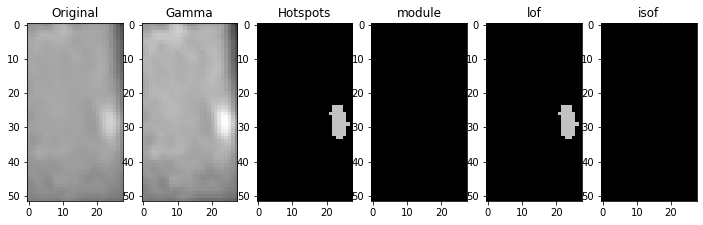

[-1.06884705 -1.05949876 -1.02980691 -1.0205709  -1.66727653 -0.99879895
 -1.07864021 -1.04070101]
[-1.9128832]
[-0.49651882 -0.50802634 -0.45645576 -0.49937956 -0.57552261 -0.45446339
 -0.50618659 -0.47350087]
[-0.72515328]
0.0 0
1861.jpg Normal
[-1.04004685 -1.09891932 -0.97075605 -1.03872654 -1.16089538 -1.06076345
 -1.16089538 -1.28817133]
[-1.81431168]
[-0.51740183 -0.53729082 -0.44984983 -0.497163   -0.53155943 -0.52668265
 -0.53155943 -0.60265641]
[-0.68572467]
0.0 0
3910.jpg Normal
[-1.0015712  -1.03467717 -0.99862217 -1.021533   -1.05343386 -1.00635782
 -1.02229976 -0.96825666]
[-1.86224249]
[-0.45316038 -0.46954349 -0.44345238 -0.44537878 -0.50341216 -0.46708356
 -0.47079381 -0.44135081]
[-0.704897]
0.0 0
3904.jpg Normal
[-1.04720745 -0.99339018 -1.41195519 -1.00422633 -1.02609074 -1.01501095
 -1.18272667 -1.09230589]
[-1.82039509]
[-0.56160178 -0.49020146 -0.60541744 -0.49199997 -0.44409527 -0.52706009
 -0.56538286 -0.52450808]
[-0.68815803]
0.0 0
1875.jpg Normal
[-0.9959842

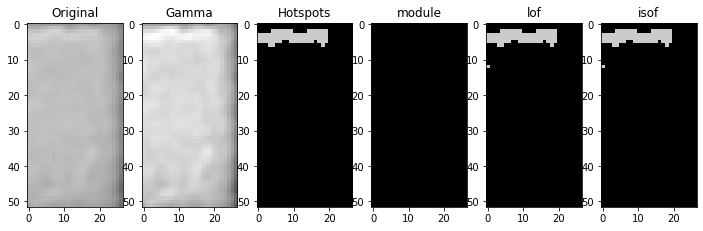

[-0.96902008 -1.01993197 -1.05983346 -1.00549075 -1.43249424 -0.9876249
 -0.98929487 -1.07014917]
[-1.76166564]
[-0.44064954 -0.45253237 -0.46850086 -0.44942489 -0.56240662 -0.43423689
 -0.43598633 -0.47610315]
[-0.66466626]
0.0 0
1054.jpg Normal
[-1.05641194 -1.39188055 -1.07624585 -0.98543111 -1.07455129 -1.35264356
 -0.99390929 -1.9137173 ]
[-1.88896714]
[-0.49682283 -0.58667355 -0.49078903 -0.44989371 -0.50779727 -0.57020766
 -0.46262336 -0.68935702]
[-0.71558686]
51.5 42.38477599620819 0.3602444581744499 0.9362752736455477
51.5 42.38477599620819 0.3602444581744499 0.9362752736455477
52.0 19
3643.jpg Single-Hotspot


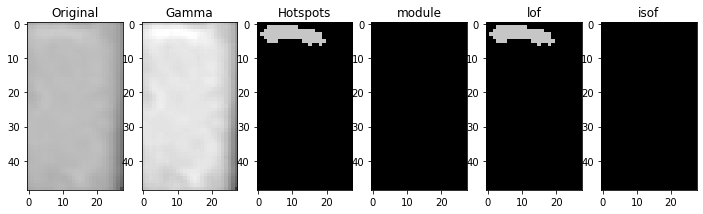

[-1.21035571 -1.04575433 -0.9577743  -1.04357554 -1.02925646 -1.02088456
 -1.0054264  -1.52810903]
[-1.81431168]
[-0.50305411 -0.47462748 -0.43445392 -0.46198195 -0.47285725 -0.44873671
 -0.4691551  -0.57383784]
[-0.68572467]
0.0 0
3657.jpg Normal
[-0.99538326 -0.99669935 -1.00058492 -0.96501406 -1.01046277 -0.98828719
 -1.02662163 -1.0210599 ]
[-1.81431168]
[-0.46257743 -0.46830182 -0.46961144 -0.42901223 -0.50227594 -0.46351782
 -0.45662936 -0.45471709]
[-0.68572467]
0.0 0
4138.jpg Normal
[-1.04888798 -0.98965926 -1.02539388 -0.98848476 -1.00580491 -1.07695679
 -0.98899375 -0.97972234]
[-1.76166564]
[-0.45449774 -0.44519772 -0.47948604 -0.44711136 -0.45885094 -0.4423121
 -0.46859063 -0.43240228]
[-0.66466626]
0.0 0
2549.jpg Normal
[-1.02243297 -1.06406453 -1.02960378 -0.99052976 -1.20885403 -1.02243297
 -1.02674877 -1.47714717]
[-1.78206358]
[-0.47727629 -0.52312591 -0.49283896 -0.45900659 -0.55254418 -0.47727629
 -0.51045959 -0.61171417]
[-0.67282543]
0.0 0
1040.jpg Normal
[-1.12087

[-1.0104557  -1.00219249 -0.99997153 -0.99701961 -0.99080898 -1.0104557
 -1.00227594 -1.00522995]
[-1.83299977]
[-0.44574232 -0.43170363 -0.4504588  -0.46882558 -0.46172824 -0.44574232
 -0.45166258 -0.46696218]
[-0.69319991]
0.0 0
1901.jpg Normal
[-1.05059815 -0.98476486 -0.98476486 -1.02108068 -0.98707496 -1.02146642
 -1.01032298 -0.99392021]
[-1.76166564]
[-0.49353044 -0.4857333  -0.4857333  -0.49012231 -0.47749078 -0.49686536
 -0.49793556 -0.48801699]
[-0.66466626]
0.0 0
4879.jpg Normal
[-0.99228033 -0.99858599 -1.00643819 -0.98357495 -0.99212742 -0.9943037
 -1.02517854 -1.02730481]
[-1.88896714]
[-0.46274744 -0.44749645 -0.4846598  -0.46137796 -0.4549469  -0.46989815
 -0.47026404 -0.48255399]
[-0.71558686]
0.0 0
5030.jpg Normal
[-0.99622259 -1.         -2.12568619 -1.1986085  -1.00960455 -1.00008876
 -0.98024369 -1.        ]
[-1.83299977]
[-0.4438562  -0.46140884 -0.61666087 -0.49365228 -0.44897344 -0.43443906
 -0.45378906 -0.45728654]
[-0.69319991]
0.0 0
2987.jpg Normal
[-0.999609

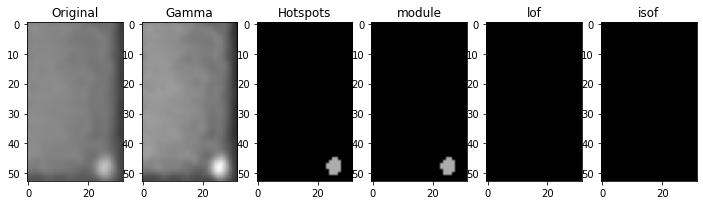

[-0.99887277 -0.99387122 -0.99773702 -1.0206836  -1.03726801 -0.97544177
 -1.01869517 -0.97524231]
[-1.9128832]
[-0.4600679  -0.45224007 -0.46193555 -0.47644391 -0.4927786  -0.45397597
 -0.44247571 -0.44773623]
[-0.72515328]
0.0 0
3333.jpg Normal
[-1.         -0.9800579  -1.10225864 -1.04658539 -1.03857371 -1.
 -0.96929609 -1.09150205]
[-1.92217542]
[-0.4351737  -0.42295332 -0.45586261 -0.45348508 -0.43244667 -0.43515227
 -0.42397564 -0.46796072]
[-0.72887017]
0.0 0
1524.jpg Normal
[-1.80002667 -1.09004835 -1.30961725 -0.96769418 -1.43766049 -1.13471987
 -1.17828014 -1.09004835]
[-1.82039509]
[-0.59987832 -0.44972519 -0.49430423 -0.43260682 -0.51436022 -0.47770499
 -0.49784259 -0.44972519]
[-0.68815803]
0.0 0
1242.jpg Normal
[-0.99614239 -1.00941775 -0.9828861  -0.98616041 -1.00872153 -1.08038446
 -0.99482235 -1.00758082]
[-1.82039509]
[-0.47934298 -0.47762779 -0.46309583 -0.47450168 -0.45407167 -0.45738887
 -0.45474606 -0.49220513]
[-0.68815803]
0.0 0
5024.jpg Normal
[-1.05052035 -0.9

[-0.44079418 -0.4947937  -0.44079418 -0.44495183 -0.42798906 -0.42978625
 -0.46045394 -0.4478679 ]
[-0.69485803]
0.0 0
2789.jpg Normal
[-0.98949702 -1.05610061 -1.01017401 -1.01134075 -1.04174361 -1.05610061
 -0.98888662 -0.97544177]
[-1.9128832]
[-0.45344787 -0.44801213 -0.4651132  -0.43597185 -0.48682567 -0.44801213
 -0.44834875 -0.45397597]
[-0.72515328]
0.0 0
3497.jpg Normal
[-0.99813726 -1.00119878 -1.21379389 -0.99266029 -1.01748551 -1.
 -0.97663885 -1.01556967]
[-1.9128832]
[-0.4623259  -0.44239943 -0.53025361 -0.4840639  -0.45197923 -0.46255101
 -0.46110012 -0.45593508]
[-0.72515328]
0.0 0
2951.jpg Normal
[-1.00063721 -0.98913451 -1.04302585 -1.00463306 -0.98569197 -1.05344235
 -1.08038446 -0.99482235]
[-1.82039509]
[-0.47599017 -0.45208395 -0.48966989 -0.46568288 -0.44845684 -0.48792608
 -0.45738887 -0.45474606]
[-0.68815803]
0.0 0
3483.jpg Normal
[-0.99997153 -0.99118402 -1.00536499 -0.98424616 -1.00522995 -0.99997153
 -0.98772259 -1.        ]
[-1.83299977]
[-0.4504588  -0.43

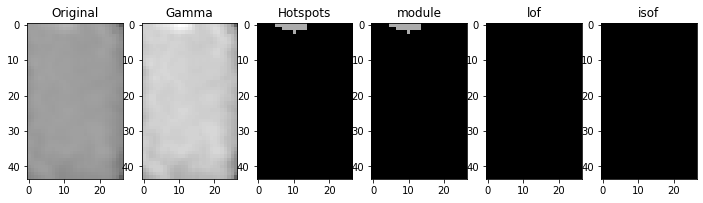

[-0.98431707 -0.96825666 -1.02229976 -0.99862217 -0.99104798 -1.01163624
 -1.01075689 -1.16816951]
[-1.86224249]
[-0.42991939 -0.44135081 -0.47079381 -0.44345238 -0.44326272 -0.45758408
 -0.44641182 -0.49219772]
[-0.704897]
0.0 0
1519.jpg Normal
[-1.00573531 -1.10787977 -0.99118747 -1.0274082  -3.5199068  -0.98102569
 -1.01487328 -0.99118747]
[-1.92217542]
[-0.44736184 -0.4940961  -0.45554062 -0.47418693 -0.7493922  -0.43109781
 -0.46788587 -0.45554062]
[-0.72887017]
0.0 0
933.jpg Normal
[-1.17494595 -0.97183828 -1.08004386 -1.0279374  -1.31352932 -1.39696952
 -1.11086039 -1.06230559]
[-1.82039509]
[-0.53982951 -0.44540602 -0.52936974 -0.52813603 -0.5847875  -0.49870332
 -0.54006725 -0.52410387]
[-0.68815803]
0.0 0
3468.jpg Normal
[-1.01444125 -0.98767596 -0.99979505 -1.12884623 -0.98828719 -1.00558695
 -0.98767596 -0.99340202]
[-1.81431168]
[-0.45388725 -0.42961073 -0.44172469 -0.52171678 -0.46351782 -0.43989958
 -0.42961073 -0.44108081]
[-0.68572467]
0.0 0
4307.jpg Normal
[-1.0240908

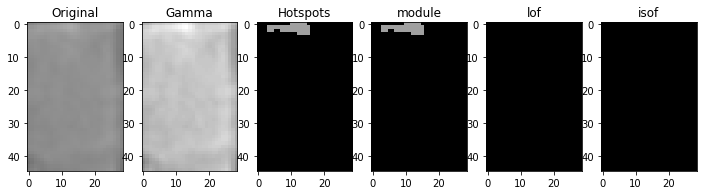

[-1.03791156 -1.00802061 -0.9863097  -1.04451421 -1.02088456 -1.01076955
 -0.99794302 -1.79588441]
[-1.81431168]
[-0.46917775 -0.4511581  -0.44685088 -0.4741976  -0.44873671 -0.46986981
 -0.43744864 -0.6195629 ]
[-0.68572467]
0.0 0
3454.jpg Normal
[-0.97552276 -1.24950936 -1.77600564 -1.04032814 -1.04416442 -1.02723165
 -0.99983233 -1.27472973]
[-1.81431168]
[-0.4420496  -0.51579199 -0.64755231 -0.4678124  -0.45537679 -0.44819715
 -0.44026935 -0.52228312]
[-0.68572467]
0.0 0
2992.jpg Normal
[-0.9739307  -1.         -0.99272701 -1.00539509 -0.9989071  -0.99429184
 -0.97140336 -1.0364232 ]
[-1.92217542]
[-0.43995599 -0.42642184 -0.4676153  -0.44385789 -0.43262934 -0.44292748
 -0.4245988  -0.4584836 ]
[-0.72887017]
0.0 0
5025.jpg Normal
[-0.99212742 -0.99908689 -1.00069912 -1.17416999 -1.00525685 -0.98079696
 -1.         -1.00069912]
[-1.88896714]
[-0.4549469  -0.46550107 -0.45988746 -0.49592503 -0.48560234 -0.47105367
 -0.46127316 -0.45988746]
[-0.71558686]
0.0 0
1243.jpg Normal
[-0.9984

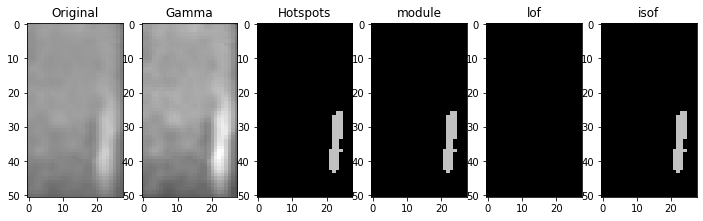

[-1.59187362 -0.99701961 -1.00219249 -1.2691842  -1.906701   -1.08897258
 -1.59187362 -1.35464455]
[-1.83299977]
[-0.60593781 -0.46882558 -0.43170363 -0.51821391 -0.67040548 -0.49670773
 -0.60593781 -0.57060363]
[-0.69319991]
3.5 7.414213538169861 0.8001063703614795 1.0
8.0 11.656854152679443 0.7398388372977943 0.9847175296605464
18.5 21.071067690849304 0.5236106940716727 0.9666463538370974
1.5 10.242640614509583 0.17967069736490698 0.9367937339359904
0.5 3.414213538169861 0.5390120920947209 1.0
1.5 12.242640614509583 0.12576243030866918 0.9177814136775014
7.5 13.071067571640015 0.5516314364833987 0.9863710039854603
0.0 2.0 0.0 1.0
7.5 11.071067690849304 0.768939401168237 1.0
42.0 52.14213538169861 0.19412502676844817 0.8204080387446973
8.0 11.656854152679443 0.7398388372977943 0.9847175296605464
18.5 21.071067690849304 0.5236106940716727 0.9666463538370974
7.5 13.071067571640015 0.5516314364833987 0.9863710039854603
7.5 11.071067690849304 0.768939401168237 1.0
6.0 64
3871.jpg Multi-Ho

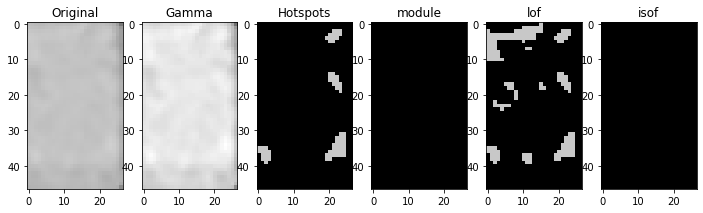

[-0.99487445 -2.37776595 -1.02182668 -1.02539388 -1.05629852 -0.99392021
 -1.30950758 -1.04523083]
[-1.76166564]
[-0.46644906 -0.7066321  -0.47040049 -0.46870456 -0.46284856 -0.48801699
 -0.52091578 -0.4744171 ]
[-0.66466626]
0.0 0
4878.jpg Normal
[-1.18864939 -0.96127804 -0.98145415 -1.10203991 -1.10120509 -1.11032327
 -1.0265705  -1.00613527]
[-1.82039509]
[-0.59922408 -0.43720753 -0.43733297 -0.50759231 -0.53959813 -0.51921421
 -0.45768715 -0.47531531]
[-0.68815803]
0.0 0
1900.jpg Normal
[-1.00275665 -0.99736189 -0.9934479  -1.04544135 -1.52061786 -0.99592911
 -0.99756907 -0.97359645]
[-1.81431168]
[-0.46753732 -0.44566577 -0.47776905 -0.44879656 -0.57413874 -0.47691185
 -0.46845916 -0.4421959 ]
[-0.68572467]
0.0 0
1914.jpg Normal
[-1.01711936 -1.10581399 -1.01343225 -0.97304105 -0.99064478 -0.97250982
 -0.98548563 -1.07988203]
[-1.83714507]
[-0.44509435 -0.52167853 -0.45104024 -0.43666119 -0.45649993 -0.42978625
 -0.44981674 -0.45953811]
[-0.69485803]
0.0 0
258.jpg Normal
[-1.02517

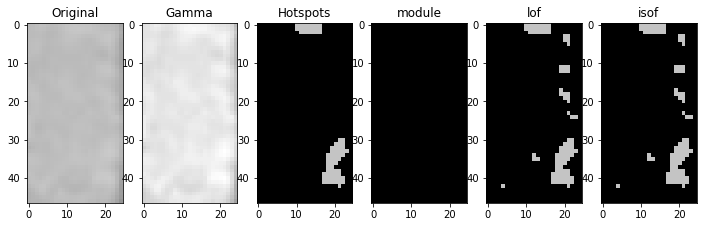

[-0.974165   -0.99695581 -1.21272771 -0.97605136 -1.08069954 -0.9895221
 -2.77020287 -1.00588789]
[-1.86224249]
[-0.43525717 -0.44255077 -0.49767272 -0.433601   -0.46574472 -0.43881022
 -0.72465827 -0.44454898]
[-0.704897]
0.0 0
264.jpg Normal
[-1.07087069 -0.95608575 -1.00258215 -1.26371131 -0.95608575 -3.77090932
 -1.05291992 -1.09241658]
[-1.82039509]
[-0.48516457 -0.42750548 -0.43727025 -0.55689481 -0.42750548 -0.73841374
 -0.4654333  -0.47309198]
[-0.68815803]
0.0 0
502.jpg Normal
[-1.02887774 -1.02047378 -1.05533516 -3.74975711 -1.02918231 -0.986911
 -1.01840761 -1.00668392]
[-1.83714507]
[-0.47189268 -0.4478679  -0.44360666 -0.78754484 -0.46271614 -0.43532877
 -0.47264151 -0.52604596]
[-0.69485803]
0.0 0
1096.jpg Normal
[-1.08897258 -1.0104557  -1.01054765 -1.00662801 -0.99997153 -1.00023202
 -1.00522995 -1.30764433]
[-1.83299977]
[-0.49670773 -0.44574232 -0.47457371 -0.43343901 -0.4504588  -0.47329355
 -0.46696218 -0.54645301]
[-0.69319991]
0.0 0
3681.jpg Normal
[-0.97861502 -1

[-0.47174882 -0.45160885 -0.45191073 -0.69094382 -0.46255101 -0.44420328
 -0.4832148  -0.43583575]
[-0.72515328]
0.0 0
3939.jpg Normal
[-1.01337365 -1.03712088 -2.01756037 -1.00457928 -1.02955382 -1.00694075
 -1.24441435 -1.06664121]
[-1.82039509]
[-0.47788862 -0.46633942 -0.66285868 -0.43987617 -0.47790261 -0.46493121
 -0.53409607 -0.45007044]
[-0.68815803]
0.0 0
462.jpg Normal
[-1.47552246 -1.0775084  -1.03479031 -1.22042855 -1.04575433 -1.19290804
 -1.28817133 -1.00506608]
[-1.81431168]
[-0.66779323 -0.53296575 -0.51719979 -0.58310746 -0.47462748 -0.55598836
 -0.60265641 -0.48561059]
[-0.68572467]
0.0 0
1690.jpg Normal
[-0.99980846 -0.99914938 -0.99983233 -1.         -0.99855006 -0.9629854
 -1.01628433 -1.00175977]
[-1.81431168]
[-0.45624388 -0.43652813 -0.44026935 -0.4416542  -0.44573535 -0.42397456
 -0.45647998 -0.4582376 ]
[-0.68572467]
0.0 0
304.jpg Normal
[-1.03354061 -1.10950256 -1.00612344 -0.99773702 -1.10950256 -1.33296707
 -1.00156851 -1.00244749]
[-1.9128832]
[-0.47694319

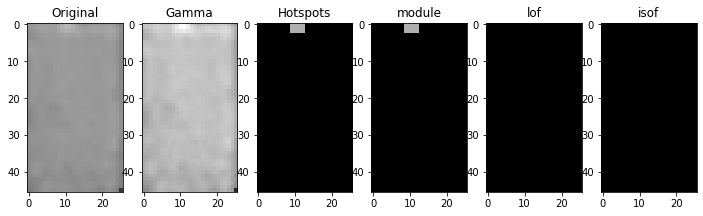

[-0.95115951 -1.06226823 -0.96937293 -1.02252949 -1.30961725 -1.03995598
 -1.05252226 -0.97366761]
[-1.82039509]
[-0.4272609  -0.46063847 -0.44252382 -0.45721368 -0.49430423 -0.46007389
 -0.47850425 -0.44262948]
[-0.68815803]
0.0 0
2399.jpg Normal
[-0.99674499 -0.98892426 -0.98819895 -1.00590186 -0.99812607 -1.0482664
 -0.99148119 -1.40702574]
[-1.76166564]
[-0.47216698 -0.44181963 -0.45525307 -0.46658936 -0.46338456 -0.4498573
 -0.46404483 -0.56175705]
[-0.66466626]
0.0 0
4930.jpg Normal
[-1.01022757 -0.99687797 -1.00643819 -0.99218693 -1.02730481 -0.99327271
 -1.1048887  -1.01022757]
[-1.88896714]
[-0.4752491  -0.47997972 -0.4846598  -0.47191217 -0.48255399 -0.46224246
 -0.4881093  -0.4752491 ]
[-0.71558686]
0.0 0
3093.jpg Normal
[-1.00381238 -1.00569558 -0.98801311 -1.01406039 -0.99821377 -3.28747625
 -0.99272811 -0.98818127]
[-1.9128832]
[-0.47920209 -0.46683754 -0.45191073 -0.50239072 -0.45711853 -0.72613065
 -0.486637   -0.47467382]
[-0.72515328]
0.0 0
4924.jpg Normal
[-0.9682566

[-0.44549158 -0.44123891 -0.42463294 -0.42675447 -0.69390877 -0.43656204
 -0.44425304 -0.4316726 ]
[-0.69319991]
0.0 0
1492.jpg Normal
[-1.00342042 -1.09004835 -1.67289798 -1.02258752 -0.97366761 -1.05923171
 -1.02252949 -0.96769418]
[-1.82039509]
[-0.42746702 -0.44972519 -0.58648826 -0.46558506 -0.44262948 -0.47278926
 -0.45721368 -0.43260682]
[-0.68815803]
0.0 0
660.jpg Normal
[-1.02047378 -0.97082833 -1.01711936 -1.0179592  -1.0070454  -0.986911
 -1.0057379  -1.05379436]
[-1.83714507]
[-0.4478679  -0.43272906 -0.44509435 -0.43666167 -0.47269671 -0.43532877
 -0.42798906 -0.46654966]
[-0.69485803]
0.0 0
2825.jpg Normal
[-1.00522995 -1.86957284 -1.         -1.0372665  -1.11209136 -1.01203606
 -1.0360438  -1.00672113]
[-1.83299977]
[-0.46696218 -0.58906194 -0.43287537 -0.48673003 -0.49935463 -0.47092577
 -0.46643619 -0.45891231]
[-0.69319991]
0.0 0
4298.jpg Normal
[-0.98367891 -0.97531594 -0.99845848 -0.97531594 -1.00878262 -1.22284509
 -0.96185709 -1.01134075]
[-1.9128832]
[-0.44500939

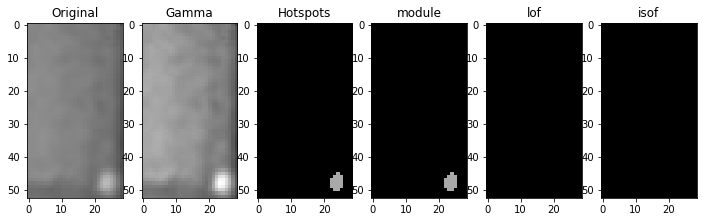

[-1.08004386 -1.06285432 -0.99816718 -1.0279374  -1.02182286 -1.24122496
 -1.05005059 -1.03034409]
[-1.82039509]
[-0.52936974 -0.49486231 -0.43453333 -0.52813603 -0.52393478 -0.5922192
 -0.48413653 -0.46821328]
[-0.68815803]
0.0 0
5151.jpg Normal
[-1.09265346 -0.99429184 -0.99570393 -0.96929609 -1.85579653 -1.09265346
 -0.9979563  -1.01428398]
[-1.92217542]
[-0.49922032 -0.44292748 -0.47291458 -0.42397564 -0.68758186 -0.49922032
 -0.46590002 -0.44814735]
[-0.72887017]
0.0 0
3520.jpg Normal
[-1.021533   -1.14564021 -0.99104798 -1.01163624 -1.02325905 -1.02508153
 -0.98538844 -0.974165  ]
[-1.86224249]
[-0.44537878 -0.50134874 -0.44326272 -0.45758408 -0.47193643 -0.44976128
 -0.45224607 -0.43525717]
[-0.704897]
0.0 0
1337.jpg Normal
[-1.02103488 -1.17416999 -1.32320315 -1.02819671 -1.0080902  -1.62472703
 -1.14266662 -1.42720492]
[-1.88896714]
[-0.46738505 -0.49592503 -0.5364845  -0.47670026 -0.47833866 -0.60156073
 -0.5037014  -0.53429181]
[-0.71558686]
0.0 0
1323.jpg Normal
[-0.9974269

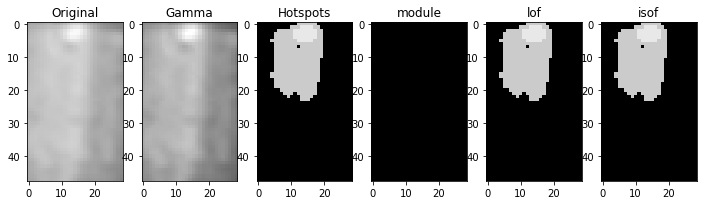

[-1.03632645 -1.04218377 -0.97204049 -1.27916165 -0.9827167  -0.96127804
 -0.99417005 -1.02538189]
[-1.82039509]
[-0.46489792 -0.47812927 -0.43870305 -0.57116143 -0.41320471 -0.43720753
 -0.49079964 -0.45719115]
[-0.68815803]
0.0 0
3278.jpg Normal
[-0.9629854  -1.04416442 -1.03569292 -0.99980846 -1.02703115 -0.9629854
 -2.05305086 -1.00287732]
[-1.81431168]
[-0.42397456 -0.45537679 -0.47628613 -0.45624388 -0.4706911  -0.42397456
 -0.67163689 -0.4404138 ]
[-0.68572467]
0.0 0
2172.jpg Normal
[-0.99736189 -0.97902498 -0.98828719 -0.99592911 -4.04496359 -1.04544135
 -1.01444125 -1.02921078]
[-1.81431168]
[-0.44566577 -0.43253671 -0.46351782 -0.47691185 -0.77530627 -0.44879656
 -0.45388725 -0.5085653 ]
[-0.68572467]
0.0 0
4503.jpg Normal
[-0.99858599 -0.99687797 -0.9943037  -0.99212742 -1.01788743 -0.99569282
 -0.99327271 -0.99908689]
[-1.88896714]
[-0.44749645 -0.47997972 -0.46989815 -0.4549469  -0.47588078 -0.47043322
 -0.46224246 -0.46550107]
[-0.71558686]
0.0 0
689.jpg Normal
[-1.039955

[-0.45040818 -0.45575924 -0.4221309  -0.43515671 -0.49516605 -0.4324981
 -0.41486123 -0.47365716]
[-0.72887017]
0.0 0
2364.jpg Normal
[-1.09241658 -0.98569197 -1.04736324 -1.07087069 -0.99160586 -0.94283026
 -1.00063721 -1.02609074]
[-1.82039509]
[-0.47309198 -0.44845684 -0.48455198 -0.48516457 -0.43773461 -0.42669327
 -0.47599017 -0.44409527]
[-0.68815803]
0.0 0
2402.jpg Normal
[-1.00806166 -1.00806166 -1.03467717 -1.00021055 -1.021533   -0.9674747
 -2.31162199 -1.0015712 ]
[-1.86224249]
[-0.47089998 -0.47089998 -0.46954349 -0.4354091  -0.44537878 -0.45452162
 -0.63335712 -0.45316038]
[-0.704897]
0.0 0
4073.jpg Normal
[-1.         -1.09387304 -1.02705312 -0.99790746 -0.98360039 -1.00219249
 -0.99923512 -1.00329319]
[-1.83299977]
[-0.44685993 -0.50591604 -0.4639309  -0.43662187 -0.48031366 -0.43170363
 -0.44416591 -0.44586363]
[-0.69319991]
0.0 0
2416.jpg Normal
[-1.31834826 -1.0291614  -1.06146212 -0.9876249  -1.74891992 -1.31834826
 -1.60463991 -1.01247395]
[-1.76166564]
[-0.56696885

[-1.56235182 -1.37789477 -1.14183562 -1.2726889  -1.42321648 -1.05472332
 -1.02921078 -1.2726889 ]
[-1.81431168]
[-0.60611124 -0.55973636 -0.53795354 -0.55578004 -0.57182982 -0.48578559
 -0.5085653  -0.55578004]
[-0.68572467]
0.0 0
1679.jpg Normal
[-1.         -0.99641246 -0.97663885 -1.00119878 -1.01748551 -0.97284021
 -1.01556967 -2.94734463]
[-1.9128832]
[-0.44420328 -0.47710534 -0.46110012 -0.44239943 -0.45197923 -0.43583575
 -0.45593508 -0.69345207]
[-0.72515328]
0.0 0
4701.jpg Normal
[-0.98960196 -1.04218377 -0.97693724 -1.01268211 -1.09116549 -1.05452314
 -0.98145415 -0.97736343]
[-1.82039509]
[-0.47802916 -0.47812927 -0.47798124 -0.46954824 -0.51848883 -0.45365283
 -0.43733297 -0.4428214 ]
[-0.68815803]
0.0 0
2370.jpg Normal
[-1.02317287 -0.9753475  -1.00350877 -1.20577793 -1.         -2.32497326
 -0.9800579  -0.97774893]
[-1.92217542]
[-0.43416289 -0.43461565 -0.43052346 -0.52643562 -0.43515227 -0.66549373
 -0.42295332 -0.44153961]
[-0.72887017]
0.0 0
4932.jpg Normal
[-1.02108

[-0.44641182 -0.42991939 -0.46291234 -0.47193643 -0.46358418 -0.58968216
 -0.45314487 -0.45758408]
[-0.704897]
0.0 0
4661.jpg Normal
[-1.03778605 -1.19848228 -0.94283026 -1.07613605 -0.99483429 -1.12491362
 -1.07087069 -1.00258215]
[-1.82039509]
[-0.47760276 -0.54925871 -0.42669327 -0.50426488 -0.44536324 -0.49729397
 -0.48516457 -0.43727025]
[-0.68815803]
0.0 0
1719.jpg Normal
[-1.01046916 -0.96937293 -1.05252226 -0.99192485 -1.01663403 -0.99752487
 -2.00227686 -1.01320445]
[-1.82039509]
[-0.460922   -0.44252382 -0.47850425 -0.45622914 -0.45053355 -0.44941121
 -0.63349054 -0.4412122 ]
[-0.68815803]
0.0 0
3668.jpg Normal
[-1.3031204  -1.42321648 -1.11661452 -1.26674214 -1.61333271 -1.11661452
 -1.03069498 -1.3031204 ]
[-1.81431168]
[-0.55835729 -0.57182982 -0.52539812 -0.55787118 -0.61136895 -0.52539812
 -0.48707812 -0.55835729]
[-0.68572467]
0.0 0
4107.jpg Normal
[-0.99930249 -1.00227594 -1.01134623 -1.         -0.98705617 -1.00219249
 -1.03790845 -1.10284166]
[-1.83299977]
[-0.437386

[-0.4470827  -0.45758408 -0.46574472 -0.43881022 -0.44345238 -0.45563126
 -0.45224607 -0.5804309 ]
[-0.704897]
0.0 0
3330.jpg Normal
[-1.07087069 -1.05291992 -1.12491362 -0.99483429 -1.26371131 -1.04966761
 -3.55537124 -1.01575119]
[-1.82039509]
[-0.48516457 -0.4654333  -0.49729397 -0.44536324 -0.55689481 -0.50913292
 -0.73741521 -0.48429713]
[-0.68815803]
0.0 0
1527.jpg Normal
[-1.20359465 -1.01677231 -1.43950073 -1.0934889  -1.24124765 -0.99304714
 -1.17973198 -1.37999807]
[-1.81431168]
[-0.5281397  -0.44844142 -0.60250355 -0.5140788  -0.57030857 -0.46391173
 -0.53209281 -0.57339379]
[-0.68572467]
0.0 0
1533.jpg Normal
[-0.99800943 -0.97241684 -1.00955131 -0.96929609 -0.9800579  -0.99272701
 -1.09265346 -0.9739307 ]
[-1.92217542]
[-0.46691492 -0.42812282 -0.46516489 -0.42397564 -0.42295332 -0.4676153
 -0.49922032 -0.43995599]
[-0.72887017]
0.0 0
3324.jpg Normal
[-0.98658578 -0.99816718 -1.06350972 -1.01320445 -0.99598428 -0.98658578
 -1.04659022 -0.99194347]
[-1.82039509]
[-0.4340757

[-0.99495495 -0.97884922 -0.95083511 -1.         -1.01709214 -1.
 -1.02692308 -1.04685016]
[-1.92217542]
[-0.40311489 -0.41528475 -0.39940057 -0.42433633 -0.41154742 -0.410388
 -0.42156991 -0.4487294 ]
[-0.72887017]
0.0 0
3481.jpg Normal
[-1.01314045 -1.01204881 -0.96801642 -1.00281201 -1.02328117 -1.01204881
 -1.012241   -1.11887549]
[-1.82039509]
[-0.48707559 -0.5043986  -0.45169131 -0.501568   -0.48119483 -0.5043986
 -0.47543479 -0.56459186]
[-0.68815803]
0.0 0
4489.jpg Normal
[-1.0015712  -4.04923798 -1.19370354 -1.03115239 -1.00021055 -1.03285613
 -1.03250358 -2.25858883]
[-1.86224249]
[-0.45316038 -0.80260664 -0.49607519 -0.48306015 -0.4354091  -0.47806673
 -0.48758009 -0.64698223]
[-0.704897]
0.0 0
3480.jpg Normal
[-1.02614822 -0.97034982 -0.97544722 -1.01350736 -0.99535908 -1.00680558
 -1.0168679  -0.99631656]
[-1.78206358]
[-0.50878613 -0.45736811 -0.47967183 -0.48268345 -0.4727144  -0.5243622
 -0.48745536 -0.45000416]
[-0.67282543]
0.0 0
2946.jpg Normal
[-0.98608683 -0.976638

[-1.10915354 -1.07199502 -1.         -0.98690156 -1.00737437 -1.
 -1.2262801  -0.98922227]
[-1.92217542]
[-0.46097422 -0.4585872  -0.41385988 -0.42156597 -0.40501458 -0.42433633
 -0.48889699 -0.42691198]
[-0.72887017]
0.0 0
1283.jpg Normal
[-1.31568745 -0.9740485  -1.04144769 -1.10345985 -1.15446086 -1.72183445
 -1.31568745 -1.00934429]
[-1.92217542]
[-0.56067554 -0.42030484 -0.49070053 -0.48317328 -0.5065563  -0.69412528
 -0.56067554 -0.41486123]
[-0.72887017]
0.0 0
3494.jpg Normal
[-0.99856201 -1.03224832 -0.97640484 -1.00758349 -0.99539871 -1.01941821
 -0.97640484 -1.04965709]
[-1.78206358]
[-0.44298657 -0.47498144 -0.46440486 -0.4469951  -0.44344041 -0.48385998
 -0.46440486 -0.47274252]
[-0.67282543]
0.0 0
2952.jpg Normal
[-1.58753881 -1.03640817 -1.07478801 -0.97544722 -1.8122247  -1.50344767
 -1.0121528  -0.98377427]
[-1.78206358]
[-0.68718526 -0.49897894 -0.53855747 -0.47967183 -0.63519982 -0.65283113
 -0.53516874 -0.45878324]
[-0.67282543]
330.5 90.52691125869751 0.506787532793

[-0.99821377 -1.00565235 -1.01748551 -0.98818127 -1.00944625 -0.97284021
 -1.00822905 -1.03065863]
[-1.9128832]
[-0.45711853 -0.47167531 -0.45197923 -0.47467382 -0.48813633 -0.43583575
 -0.46501493 -0.47470539]
[-0.72515328]
0.0 0
4476.jpg Normal
[-1.03120456 -1.13795362 -0.99695581 -1.11325845 -1.02688373 -1.02508153
 -1.35239609 -1.00021055]
[-1.86224249]
[-0.47292315 -0.49222905 -0.44255077 -0.48842425 -0.46291234 -0.44976128
 -0.55922898 -0.4354091 ]
[-0.704897]
0.0 0
3319.jpg Normal
[-1.         -1.00962894 -0.97552276 -0.99123032 -0.99123032 -1.
 -1.03281439 -1.14623939]
[-1.81431168]
[-0.45919462 -0.48670879 -0.4420496  -0.46275836 -0.46275836 -0.4416542
 -0.46535231 -0.53536912]
[-0.68572467]
0.0 0
4310.jpg Normal
[-1.00492799 -1.05141601 -1.00058398 -1.00930981 -2.17543586 -1.00492799
 -0.99667832 -0.98658578]
[-1.82039509]
[-0.44631075 -0.45574318 -0.47731731 -0.46771188 -0.62533219 -0.44631075
 -0.45353057 -0.43407572]
[-0.68815803]
0.0 0
2761.jpg Normal
[-0.94283026 -1.0043

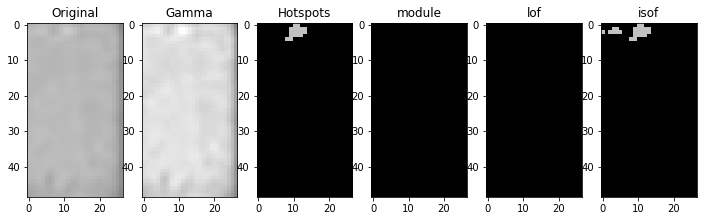

[-1.16367873 -1.03936464 -0.99753926 -1.08845477 -1.55253566 -1.02146642
 -0.98819895 -1.26895752]
[-1.76166564]
[-0.50991842 -0.49331601 -0.46304762 -0.53631068 -0.59319914 -0.49686536
 -0.45525307 -0.55150255]
[-0.66466626]
0.0 0
3866.jpg Normal
[-0.98455244 -1.96830645 -1.06118777 -0.98455244 -0.97663885 -1.05567573
 -1.17310132 -1.05567573]
[-1.9128832]
[-0.459473   -0.64487695 -0.4747022  -0.459473   -0.46110012 -0.48845354
 -0.51647274 -0.48845354]
[-0.72515328]
0.0 0
1917.jpg Normal
[-0.97906341 -0.99705737 -0.99795097 -0.97359645 -1.05472332 -0.97874342
 -2.30533857 -1.10504562]
[-1.81431168]
[-0.45768463 -0.43109698 -0.44717127 -0.4421959  -0.48578559 -0.43413407
 -0.66793193 -0.50332222]
[-0.68572467]
0.0 0
1903.jpg Normal
[-1.03426774 -1.00737437 -1.06052523 -1.04097662 -1.07476361 -0.95083511
 -1.07199502 -0.97884922]
[-1.92217542]
[-0.47161003 -0.40501458 -0.42889925 -0.44471133 -0.45695954 -0.39940057
 -0.4585872  -0.41528475]
[-0.72887017]
0.0 0
529.jpg Normal
[-1.013873

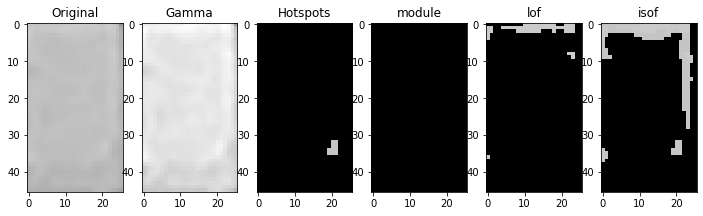

[-1.01823049 -0.97564213 -1.01861141 -1.00704587 -1.00039392 -0.96355554
 -1.00120127 -0.99448166]
[-1.72207615]
[-0.46875734 -0.43999196 -0.47770116 -0.47740067 -0.46646417 -0.44116096
 -0.47882477 -0.46850619]
[-0.64883046]
0.0 0
4890.jpg Normal
[-1.03359373 -1.00815241 -1.03312358 -0.97227289 -0.98489004 -0.99779362
 -1.1984188  -1.04493499]
[-1.75809585]
[-0.44545055 -0.43185671 -0.47400669 -0.50196861 -0.47102532 -0.49071307
 -0.51824383 -0.4533456 ]
[-0.66323834]
0.0 0
2239.jpg Normal
[-1.00974735 -1.02397124 -0.9848069  -0.99290715 -1.00094438 -0.98281246
 -1.         -1.03469001]
[-1.86224249]
[-0.44601333 -0.46674659 -0.43866865 -0.42626733 -0.44886889 -0.43136777
 -0.4275363  -0.45982648]
[-0.704897]
0.0 0
3133.jpg Normal
[-0.98747057 -1.21481982 -1.02840715 -1.27048962 -1.04828381 -1.2262801
 -1.2262801  -0.99495495]
[-1.92217542]
[-0.44620646 -0.5210978  -0.47163561 -0.54910615 -0.482034   -0.48889699
 -0.48889699 -0.40311489]
[-0.72887017]
0.0 0
4884.jpg Normal
[-1.6381705

[-0.44537878 -0.45643809 -0.47193643 -0.4470827  -0.65573818 -0.47079381
 -0.45452162 -0.44537878]
[-0.704897]
0.0 0
1122.jpg Normal
[-0.98549846 -1.05754486 -1.02366178 -1.0575412  -1.06806921 -1.01478197
 -1.0075812  -0.98549846]
[-1.75809585]
[-0.49631894 -0.45990062 -0.47202044 -0.51830649 -0.51154898 -0.49084757
 -0.44332034 -0.49631894]
[-0.66323834]
0.0 0
1644.jpg Normal
[-1.04705037 -0.99390769 -1.06330459 -1.03915284 -0.96006314 -1.00940133
 -1.00672685 -1.03250223]
[-1.72207615]
[-0.4394794  -0.45397376 -0.45370212 -0.48527257 -0.43483098 -0.48175694
 -0.45994941 -0.50780448]
[-0.64883046]
0.0 0
3053.jpg Normal
[-1.04235136 -1.42392044 -0.99118569 -0.9997539  -1.00681448 -1.02070709
 -1.10882943 -1.00187293]
[-1.72207615]
[-0.54133451 -0.63683668 -0.48486784 -0.49536264 -0.47068162 -0.5181474
 -0.54964301 -0.49736746]
[-0.64883046]
0.0 0
2359.jpg Normal
[-0.99664202 -1.04636818 -0.97729724 -1.0289853  -1.10105068 -0.98866383
 -1.04636818 -1.00290173]
[-1.78206358]
[-0.4645211

[-0.42691198 -0.42288121 -0.46074618 -0.43142976 -0.44620646 -0.49400811
 -0.40501458 -0.42156991]
[-0.72887017]
0.0 0
4270.jpg Normal
[-1.01656595 -1.04986732 -0.99797425 -1.1161453  -0.94568308 -1.00842941
 -1.39081201 -0.95131079]
[-1.69492094]
[-0.55857886 -0.50658357 -0.53993988 -0.51971729 -0.50114641 -0.49505262
 -0.62934892 -0.49516899]
[-0.63796838]
0.0 0
3279.jpg Normal
[-1.00675417 -1.00039392 -0.99422959 -1.07416093 -1.02156603 -1.00217958
 -1.32024412 -0.96355554]
[-1.72207615]
[-0.45917981 -0.46646417 -0.44188827 -0.49780735 -0.50025819 -0.45290319
 -0.54583706 -0.44116096]
[-0.64883046]
0.0 0
4516.jpg Normal
[-1.27548301 -1.06996033 -1.00386559 -1.00316745 -0.9955567  -0.99719235
 -2.00726077 -1.0563057 ]
[-1.72207615]
[-0.55041586 -0.47031481 -0.46225508 -0.468502   -0.42918158 -0.47284486
 -0.67370761 -0.48750292]
[-0.64883046]
0.0 0
2167.jpg Normal
[-0.99339302 -1.11198339 -0.99520489 -0.98320278 -0.98976106 -1.92342351
 -1.03843958 -1.02931646]
[-1.85857924]
[-0.4577

[-0.50260666 -0.46356788 -0.47867741 -0.47745828 -0.47117557 -0.49114657
 -0.46438878 -0.49816505]
[-0.67282543]
0.0 0
4269.jpg Normal
[-0.9997539  -1.03203419 -1.01921407 -1.00704587 -1.01897277 -1.01760465
 -0.99095037 -0.99699278]
[-1.72207615]
[-0.49536264 -0.44971202 -0.46091154 -0.47740067 -0.50488816 -0.46840173
 -0.478251   -0.48757207]
[-0.64883046]
0.0 0
3506.jpg Normal
[-0.99002186 -0.98620829 -1.04858807 -1.054858   -1.02407587 -1.10457629
 -0.98620829 -1.0070661 ]
[-1.75809585]
[-0.44340229 -0.42459834 -0.46953428 -0.45731244 -0.48682249 -0.51635443
 -0.42459834 -0.43604012]
[-0.66323834]
0.0 0
2618.jpg Normal
[-0.9955567  -1.00547576 -1.83849554 -1.04603075 -1.03480873 -1.14459755
 -1.25275792 -0.99044645]
[-1.72207615]
[-0.42918158 -0.45754658 -0.63566541 -0.49256437 -0.47013958 -0.4921824
 -0.54444346 -0.43968329]
[-0.64883046]
0.0 0
685.jpg Normal
[-0.99453399 -1.15781653 -1.00531146 -1.04463683 -0.99211712 -0.97019163
 -0.99211712 -1.0283861 ]
[-1.69492094]
[-0.434461

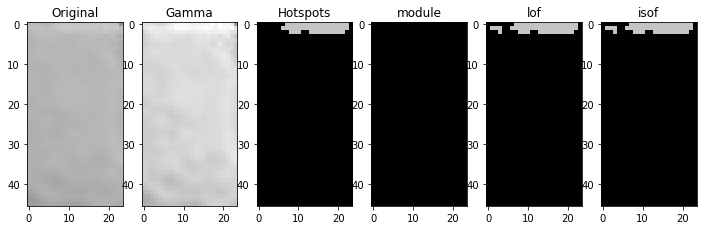

[-1.46253296 -1.01367373 -1.01177784 -1.00152319 -0.99352608 -1.25433766
 -1.18745535 -1.41547433]
[-1.75809585]
[-0.6283235  -0.44509878 -0.51610519 -0.44116077 -0.4853731  -0.56243514
 -0.55350679 -0.59004453]
[-0.66323834]
0.0 0
4282.jpg Normal
[-0.98108108 -1.04428518 -0.98941441 -1.00276533 -1.04673566 -0.99408639
 -0.98152256 -0.98620829]
[-1.75809585]
[-0.4577841  -0.45300011 -0.44147163 -0.44286584 -0.45570473 -0.45932732
 -0.45171077 -0.42459834]
[-0.66323834]
0.0 0
2195.jpg Normal
[-1.00284346 -1.19137311 -1.02809776 -0.9954955  -0.97479097 -1.71594342
 -0.99436937 -1.00768659]
[-1.69492094]
[-0.44382007 -0.50637973 -0.47214996 -0.45114071 -0.42283976 -0.60020776
 -0.42603354 -0.4436697 ]
[-0.63796838]
0.0 0
108.jpg Normal
[-0.97964515 -0.97688731 -0.98057387 -1.02931646 -1.00490222 -0.98041339
 -0.99156648 -1.00937672]
[-1.85857924]
[-0.47567492 -0.41798419 -0.42719321 -0.44506315 -0.42561718 -0.42849207
 -0.45059503 -0.44324114]
[-0.7034317]
0.0 0
120.jpg Normal
[-1.3440409

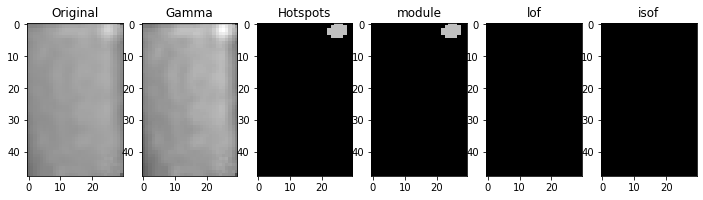

[-1.02366178 -1.00235797 -1.06124287 -1.0575412  -1.01102908 -1.03312358
 -1.05560586 -0.97619654]
[-1.75809585]
[-0.47202044 -0.50313673 -0.51203492 -0.51830649 -0.46827709 -0.47400669
 -0.49929367 -0.49521872]
[-0.66323834]
0.0 0
2368.jpg Normal
[-1.29991398 -0.96974621 -1.0289853  -0.97729724 -0.98979663 -0.99855029
 -1.0289853  -0.97452882]
[-1.78206358]
[-0.53992404 -0.43847877 -0.45612417 -0.45532517 -0.46280571 -0.47666143
 -0.45612417 -0.45364338]
[-0.67282543]
0.0 0
3710.jpg Normal
[-1.         -1.41945698 -1.02156636 -0.97519196 -0.99076311 -1.07120464
 -1.09050366 -1.        ]
[-1.69492094]
[-0.42917396 -0.55744227 -0.44471389 -0.44191613 -0.45182612 -0.50009822
 -0.4844624  -0.42917396]
[-0.63796838]
0.0 0
493.jpg Normal
[-1.2959091  -1.         -0.97108093 -1.06526011 -1.06462549 -0.98635988
 -0.98799751 -0.96282849]
[-1.75809585]
[-0.52502751 -0.43368743 -0.43508753 -0.47466218 -0.44862639 -0.42896595
 -0.43626401 -0.43414916]
[-0.66323834]
0.0 0
1107.jpg Normal
[-1.00419

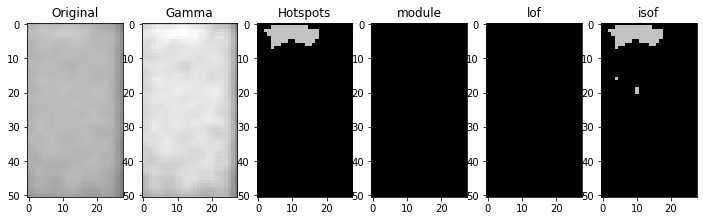

[-1.13053105 -1.23496792 -1.02593104 -1.02593104 -1.15122932 -1.18791171
 -1.05369076 -1.14675806]
[-1.85857924]
[-0.50363132 -0.53947604 -0.48042132 -0.48042132 -0.55709972 -0.53956534
 -0.47802882 -0.52537237]
[-0.7034317]
0.0 0
3937.jpg Normal
[-1.13328127 -0.9993481  -0.97935815 -0.96282849 -1.33362426 -1.00152319
 -1.06526011 -0.98697008]
[-1.75809585]
[-0.51491419 -0.44513641 -0.44607982 -0.43414916 -0.54380039 -0.44116077
 -0.47466218 -0.44372065]
[-0.66323834]
0.0 0
444.jpg Normal
[-1.03203419 -1.58456404 -1.00675417 -0.96355554 -1.00675417 -0.98333724
 -1.20613877 -1.12392467]
[-1.72207615]
[-0.44971202 -0.58589201 -0.45917981 -0.44116096 -0.45917981 -0.43895204
 -0.54270307 -0.50523132]
[-0.64883046]
0.0 0
322.jpg Normal
[-1.02283054 -1.87328347 -1.00756559 -1.0344658  -1.03500794 -1.04028771
 -0.99247092 -1.04028771]
[-1.85857924]
[-0.46217844 -0.60397229 -0.44010571 -0.44230115 -0.4589036  -0.45813647
 -0.45245694 -0.45813647]
[-0.7034317]
0.0 0
4916.jpg Normal
[-1.0182797 

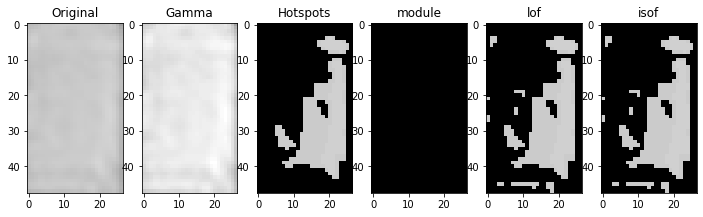

[-0.96431521 -0.98620829 -1.01876986 -0.99161176 -1.056003   -0.96431521
 -1.4608022  -0.99847345]
[-1.75809585]
[-0.43765762 -0.42459834 -0.44790606 -0.43672377 -0.44403619 -0.43765762
 -0.53876209 -0.43971084]
[-0.66323834]
0.0 0
4651.jpg Normal
[-1.0845663  -0.99149673 -1.51003021 -1.04954725 -1.22363143 -1.0718525
 -2.26504531 -1.0283861 ]
[-1.69492094]
[-0.49019455 -0.42259849 -0.59147397 -0.47818562 -0.58319382 -0.4998881
 -0.70927062 -0.46851161]
[-0.63796838]
0.0 0
1729.jpg Normal
[-1.21754674 -1.11198339 -1.0098735  -2.4807072  -1.17497263 -1.12922463
 -1.03336744 -1.13053105]
[-1.85857924]
[-0.53855343 -0.48066675 -0.4677385  -0.67716886 -0.52001192 -0.53201318
 -0.43978198 -0.50363132]
[-0.7034317]
0.0 0
4137.jpg Normal
[-1.0280243  -1.00681448 -1.02977405 -1.00885046 -0.96355554 -1.00773271
 -1.3543404  -1.01861141]
[-1.72207615]
[-0.4949534  -0.47068162 -0.45730893 -0.46340756 -0.44116096 -0.47731852
 -0.54270697 -0.47770116]
[-0.64883046]
0.0 0
3658.jpg Normal
[-1.4627850

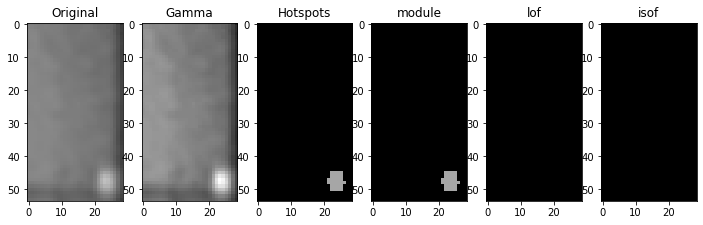

[-1.67463241 -1.01611791 -1.3016729  -0.98826055 -1.17047371 -1.06302518
 -0.98451127 -1.14418806]
[-1.72207615]
[-0.72826567 -0.50942929 -0.60245498 -0.48933008 -0.54355002 -0.54473965
 -0.50942214 -0.5397822 ]
[-0.64883046]
31.5 58.72792184352875 0.11477073201891193 0.8779189555800584
0.0 2.0 0.0 1.0
0.0 0.0 0 0
0.0 0
4692.jpg Normal
[-1.         -0.99290715 -0.99267064 -1.03663543 -2.05348588 -0.98431578
 -0.99290715 -1.00129249]
[-1.86224249]
[-0.4167921  -0.42626733 -0.44314487 -0.45840889 -0.6121651  -0.43265874
 -0.42626733 -0.44405578]
[-0.704897]
0.0 0
2585.jpg Normal
[-2.38706796 -0.97479097 -0.99436937 -0.98719319 -1.1172172  -1.04463683
 -1.45341125 -1.05871476]
[-1.69492094]
[-0.74576937 -0.42283976 -0.42603354 -0.4558882  -0.54196312 -0.44174017
 -0.61260974 -0.48261044]
[-0.63796838]
0.0 0
3843.jpg Normal
[-0.99524895 -1.05033858 -1.4175636  -0.98977628 -0.99673235 -2.24173881
 -0.98494265 -0.99726171]
[-1.83299977]
[-0.45551656 -0.4698301  -0.54181453 -0.45720941 -0.460

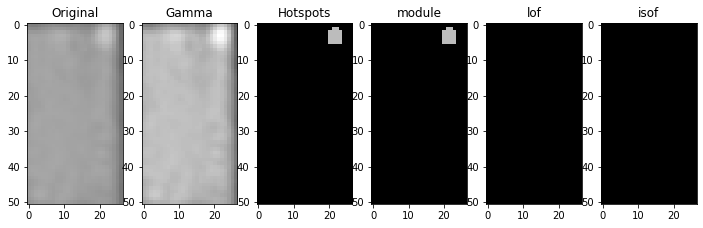

[-0.98804602 -1.08356726 -0.98976106 -1.13053105 -1.02540293 -2.26140514
 -1.03385323 -0.98041339]
[-1.85857924]
[-0.43726641 -0.50766673 -0.44800756 -0.50363132 -0.45455069 -0.65775167
 -0.44382469 -0.42849207]
[-0.7034317]
0.0 0
2744.jpg Normal
[-0.99331193 -1.         -1.09548076 -1.         -0.97108093 -1.03505373
 -0.99366453 -1.01391683]
[-1.75809585]
[-0.43015038 -0.43368743 -0.49686711 -0.45069487 -0.43508753 -0.44882078
 -0.44057694 -0.45172561]
[-0.66323834]
0.0 0
4335.jpg Normal
[-0.98921593 -1.29007516 -0.98977628 -1.00819469 -0.99208746 -0.99626277
 -0.99524895 -1.0264167 ]
[-1.83299977]
[-0.44195773 -0.52721823 -0.45720941 -0.46526276 -0.44758233 -0.45623088
 -0.45551656 -0.4732808 ]
[-0.69319991]
0.0 0
901.jpg Normal
[-1.01760465 -0.99095037 -1.01823049 -1.01110049 -1.03203419 -0.99422959
 -1.01760465 -1.02277201]
[-1.72207615]
[-0.46840173 -0.478251   -0.46875734 -0.48215525 -0.44971202 -0.44188827
 -0.46840173 -0.4755893 ]
[-0.64883046]
0.0 0
4453.jpg Normal
[-0.997305

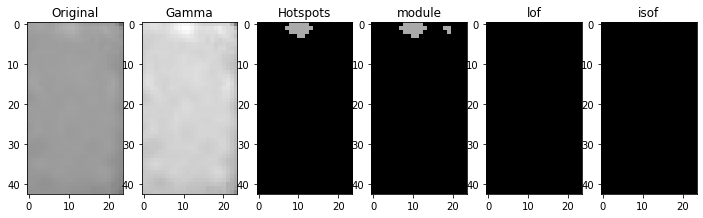

[-1.         -1.00103938 -1.00174257 -0.98447115 -0.99526316 -0.98996265
 -1.00764561 -0.98775421]
[-1.69492094]
[-0.42917396 -0.46324466 -0.43785405 -0.43782283 -0.46908294 -0.4478786
 -0.47296615 -0.4574038 ]
[-0.63796838]
0.0 0
4485.jpg Normal
[-1.15711639 -0.99757131 -0.99487459 -1.0242151  -1.00785161 -1.04145178
 -1.00972686 -1.0058721 ]
[-1.70933596]
[-0.5626057  -0.47769188 -0.45941374 -0.48338187 -0.44880786 -0.48910427
 -0.46378329 -0.47345659]
[-0.64373438]
0.0 0
2792.jpg Normal
[-1.06806921 -1.37730466 -1.00825107 -1.02034438 -2.66928996 -1.06806921
 -0.98054652 -1.00235797]
[-1.75809585]
[-0.51154898 -0.56913584 -0.48135379 -0.49057343 -0.65786883 -0.51154898
 -0.43898575 -0.50313673]
[-0.66323834]
0.0 0
4308.jpg Normal
[-1.07162249 -0.97509453 -1.51984096 -1.01481474 -1.11281884 -0.99849598
 -1.22306714 -0.96892777]
[-1.85857924]
[-0.49831705 -0.46326235 -0.62638138 -0.48420187 -0.51334934 -0.46032773
 -0.53822324 -0.44246499]
[-0.7034317]
0.0 0
3467.jpg Normal
[-0.994389

[-1.12756166 -1.00547576 -1.25275792 -1.20420342 -0.99719235 -1.02484759
 -1.45475445 -1.09559844]
[-1.72207615]
[-0.50552908 -0.45754658 -0.54444346 -0.52039782 -0.47284486 -0.49836839
 -0.56497119 -0.50598306]
[-0.64883046]
0.0 0
1270.jpg Normal
[-0.97688731 -1.0121736  -1.06049761 -0.98361088 -0.99520489 -0.99520489
 -1.03336744 -1.01626977]
[-1.85857924]
[-0.41798419 -0.44242504 -0.48543725 -0.42090096 -0.444562   -0.444562
 -0.43978198 -0.43314027]
[-0.7034317]
0.0 0
1516.jpg Normal
[-1.00217958 -0.96468791 -1.00516313 -0.98333724 -0.99422959 -1.01823049
 -0.96355554 -1.0489229 ]
[-1.72207615]
[-0.45290319 -0.4417769  -0.47545757 -0.43895204 -0.44188827 -0.46875734
 -0.44116096 -0.46495613]
[-0.64883046]
0.0 0
3301.jpg Normal
[-0.98620829 -1.01674796 -0.98620829 -1.04673566 -1.04673566 -1.0070661
 -0.97691441 -1.0319238 ]
[-1.75809585]
[-0.42459834 -0.50229554 -0.42459834 -0.45570473 -0.45570473 -0.43604012
 -0.42280347 -0.46823639]
[-0.66323834]
0.0 0
3315.jpg Normal
[-0.99493763

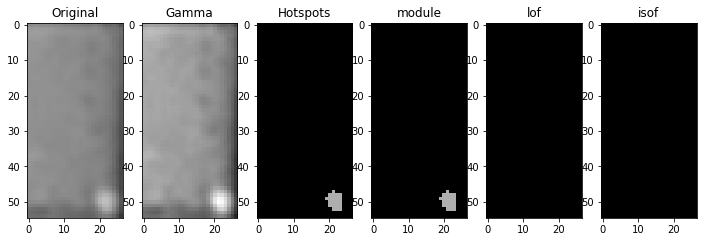

[-1.0100343  -0.99234908 -1.01367373 -0.99462656 -1.03026074 -0.98284593
 -1.00750752 -0.99462656]
[-1.75809585]
[-0.47060305 -0.48360253 -0.44509878 -0.51194812 -0.47199024 -0.42597942
 -0.47341405 -0.51194812]
[-0.66323834]
0.0 0
4334.jpg Normal
[-0.9967109  -1.03806614 -1.12621522 -1.02397124 -1.06148685 -0.9848069
 -1.0703536  -1.01221768]
[-1.86224249]
[-0.44950044 -0.4941099  -0.53250845 -0.46674659 -0.489497   -0.43866865
 -0.50372872 -0.47746013]
[-0.704897]
0.0 0
2745.jpg Normal
[-1.01339992 -1.23119299 -1.07049734 -1.02592767 -0.99111598 -1.49968845
 -1.12344152 -1.04944614]
[-1.76166564]
[-0.53083695 -0.61008219 -0.48729127 -0.52747356 -0.50949761 -0.6905868
 -0.55348517 -0.53468475]
[-0.66466626]
1.0 4.0 0.7853981633974483 1.0
0.0 0.0 0 0
22.0 40.14213538169861 0.17156614865899678 0.9300283089480748
0.0 4.0 0.0 1.0
3.0 7.656854152679443 0.6430287180776717 1.0
0.0 5.656854152679443 0.0 1.0
0.0 0
2023.jpg Normal
[-1.01672556 -1.00885046 -1.02277201 -0.9973096  -0.9997539  -1.

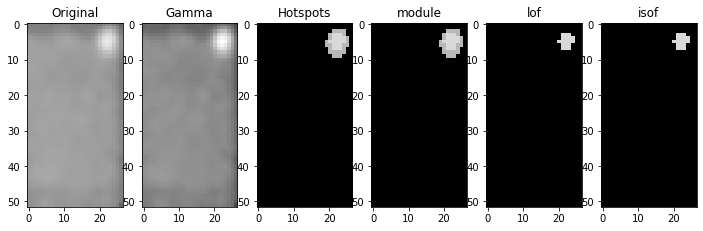

[-0.9892558  -1.07498035 -0.98724724 -1.00210992 -1.19489626 -1.01710038
 -1.02179496 -1.0238463 ]
[-1.76166564]
[-0.44458474 -0.45572648 -0.43786424 -0.45641576 -0.5009335  -0.43491987
 -0.45672277 -0.45938011]
[-0.66466626]
0.0 0
525.jpg Normal
[-1.         -1.00067002 -1.00045595 -0.98996265 -1.02156636 -1.
 -0.99311146 -0.99020523]
[-1.69492094]
[-0.44905497 -0.4667505  -0.44235862 -0.4478786  -0.44471389 -0.4367404
 -0.43037184 -0.44122068]
[-0.63796838]
0.0 0
531.jpg Normal
[-0.99688754 -1.00788506 -1.04296183 -3.70333362 -1.03744351 -0.99390769
 -0.96992098 -1.01577461]
[-1.72207615]
[-0.45407918 -0.49672057 -0.51035054 -0.76472608 -0.48731564 -0.45397376
 -0.47770133 -0.48303792]
[-0.64883046]
0.0 0
4863.jpg Normal
[-1.06403767 -1.16794739 -1.02551601 -0.99366436 -1.16794739 -0.97674112
 -0.99372971 -0.98281246]
[-1.86224249]
[-0.45839988 -0.46279033 -0.46256007 -0.43115865 -0.46279033 -0.42749971
 -0.42547618 -0.43136777]
[-0.704897]
0.0 0
257.jpg Normal
[-0.99462656 -1.007507

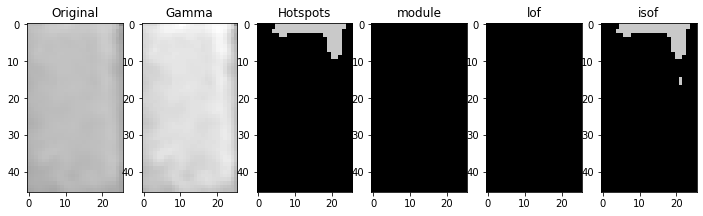

[-0.99095037 -1.01823049 -1.01861141 -0.99095037 -1.00885046 -1.01760465
 -0.99699278 -1.0489229 ]
[-1.72207615]
[-0.478251   -0.46875734 -0.47770116 -0.478251   -0.46340756 -0.46840173
 -0.48757207 -0.46495613]
[-0.64883046]
0.0 0
2590.jpg Normal
[-0.99988027 -1.15627154 -0.97849394 -1.027038   -1.38991558 -1.00269707
 -0.98839085 -1.00124278]
[-1.76166564]
[-0.4366038  -0.48456634 -0.44837711 -0.44359826 -0.55104886 -0.47157187
 -0.44786949 -0.43140794]
[-0.66466626]
0.0 0
1099.jpg Normal
[-0.98016304 -1.02620889 -1.02283054 -0.97450936 -0.99781257 -1.00020509
 -1.04376562 -0.98739027]
[-1.85857924]
[-0.47338007 -0.49991563 -0.46217844 -0.47370107 -0.4741216  -0.48660866
 -0.49798582 -0.41413721]
[-0.7034317]
0.0 0
1927.jpg Normal
[-0.99581382 -1.05103941 -1.00547576 -1.08352667 -0.98297347 -1.09785095
 -1.06475313 -0.99867675]
[-1.72207615]
[-0.44061932 -0.48560718 -0.45754658 -0.47419044 -0.43700156 -0.477998
 -0.46477009 -0.4462444 ]
[-0.64883046]
0.0 0
4687.jpg Normal
[-1.0123779

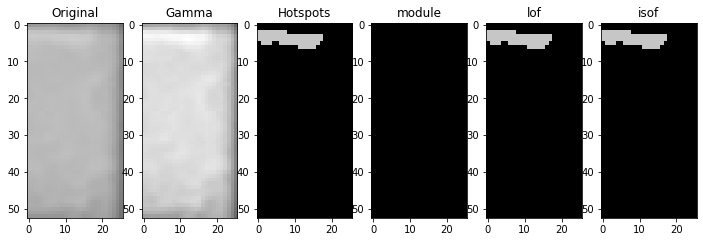

[-1.03843958 -1.11198339 -1.00079975 -1.05369076 -0.97599526 -1.06049761
 -1.00756049 -0.98320278]
[-1.85857924]
[-0.48645126 -0.48066675 -0.45169325 -0.47802882 -0.45236497 -0.48543725
 -0.48870628 -0.43760892]
[-0.7034317]
0.0 0
3895.jpg Normal
[-0.99214993 -1.00704587 -1.06283376 -0.99095037 -1.00675417 -1.01083169
 -1.00015513 -1.00187293]
[-1.72207615]
[-0.49490206 -0.47740067 -0.53667612 -0.478251   -0.45917981 -0.49755384
 -0.46364302 -0.49736746]
[-0.64883046]
0.0 0
2553.jpg Normal
[-1.54292839 -1.09205005 -1.27713926 -1.21836213 -1.86052387 -1.19852196
 -1.24468127 -1.45508283]
[-1.75809585]
[-0.61155856 -0.51072038 -0.55216293 -0.56372318 -0.71144068 -0.50438587
 -0.54380233 -0.61741976]
[-0.66323834]
60.0 74.97056245803833 0.13414657109540482 0.9546746927398446
0.5 3.414213538169861 0.5390120920947209 1.0
0.0 2.0 0.0 1.0
0.0 0
4122.jpg Normal
[-0.97509453 -1.00328411 -1.01188229 -1.02221649 -1.00290048 -0.98016304
 -1.01481474 -0.99526581]
[-1.85857924]
[-0.46326235 -0.47339

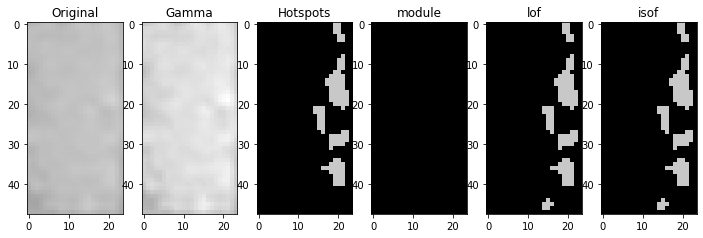

[-0.99205591 -0.98061933 -1.00675417 -1.01823049 -0.96468791 -1.02977405
 -1.02156603 -0.98333724]
[-1.72207615]
[-0.44251637 -0.4462249  -0.45917981 -0.46875734 -0.4417769  -0.45730893
 -0.50025819 -0.43895204]
[-0.64883046]
0.0 0
2355.jpg Normal
[-1.05537479 -0.96892777 -1.00756559 -1.04260718 -1.00756559 -0.97934034
 -1.01188229 -1.07189533]
[-1.85857924]
[-0.47044841 -0.44246499 -0.44010571 -0.46418532 -0.44010571 -0.42659777
 -0.44742071 -0.49289237]
[-0.7034317]
0.0 0
4724.jpg Normal
[-1.04065189 -0.9955567  -1.06475313 -0.9892418  -0.99422508 -1.01681749
 -1.5915638  -1.03497804]
[-1.72207615]
[-0.46544332 -0.42918158 -0.46477009 -0.45283005 -0.45915534 -0.47251579
 -0.60667783 -0.44974233]
[-0.64883046]
0.0 0
4042.jpg Normal
[-0.96703019 -0.96432923 -1.04493499 -0.98656449 -1.01237797 -3.68546774
 -1.0170638  -1.01237797]
[-1.75809585]
[-0.42825225 -0.42972445 -0.4533456  -0.45551205 -0.43089182 -0.74050689
 -0.44677199 -0.43089182]
[-0.66323834]
0.0 0
2433.jpg Normal
[-1.02197

[-0.986777   -1.00210992 -0.97990379 -0.9850572  -1.02617444 -1.01766676
 -1.10599047 -0.98572559]
[-1.76166564]
[-0.45161833 -0.45641576 -0.45167664 -0.43018515 -0.45502433 -0.44043436
 -0.49480557 -0.44482903]
[-0.66466626]
0.0 0
4730.jpg Normal
[-2.10206698 -1.27963791 -1.00203104 -1.48611335 -3.01449868 -1.71353327
 -0.96432923 -1.14749643]
[-1.75809585]
[-0.72040363 -0.61824653 -0.50501148 -0.63956574 -0.63289202 -0.6753008
 -0.42972445 -0.56079145]
[-0.66323834]
2.0 6.828427076339722 0.5390120920947209 1.0
0.0 0.0 0 0
0.0 0.0 0 0
0.0 2.0 0.0 1.0
3.0 10.828427076339722 0.32151435378294857 0.9835483467188959
1.0 4.828427076339722 0.5390120952601716 1.0
0.0 4.0 0.0 1.0
0.0 2.0 0.0 1.0
8.5 12.242640614509583 0.7126537717491254 0.9708975320849444
0.0 0.0 0 0
0.0 0.0 0 0
365.5 164.1248904466629 0.1705094081377135 0.6410550585465666
0.0 0
1890.jpg Normal
[-1.26065594 -1.08912931 -1.53640234 -1.17413881 -1.04788446 -1.33227586
 -2.20176116 -1.        ]
[-1.86224249]
[-0.55147092 -0.54132

[-0.98479175 -1.00886867 -0.9957061  -1.03500794 -0.98739027 -0.97934034
 -1.02794038 -0.9957061 ]
[-1.85857924]
[-0.43466286 -0.47380566 -0.44468114 -0.4589036  -0.41413721 -0.42659777
 -0.44703304 -0.44468114]
[-0.7034317]
0.0 0
653.jpg Normal
[-0.99310879 -1.07105598 -1.02793389 -1.00334038 -1.03505373 -0.9920963
 -0.99366453 -1.46046797]
[-1.75809585]
[-0.48318498 -0.47847341 -0.48040191 -0.49831757 -0.44882078 -0.47143261
 -0.44057694 -0.56167127]
[-0.66323834]
0.0 0
2816.jpg Normal
[-0.9892418  -0.99422508 -1.00386559 -1.20420342 -1.03497804 -0.97556188
 -0.9892418  -1.09785095]
[-1.72207615]
[-0.45283005 -0.45915534 -0.46225508 -0.52039782 -0.44974233 -0.42762173
 -0.45283005 -0.477998  ]
[-0.64883046]
0.0 0
135.jpg Normal
[-1.00627644 -1.00773757 -1.20459063 -1.02156636 -0.99311146 -1.03061755
 -0.99751363 -0.99086323]
[-1.69492094]
[-0.45387271 -0.43667107 -0.51682749 -0.44471389 -0.43037184 -0.49271013
 -0.44740287 -0.46310546]
[-0.63796838]
0.0 0
121.jpg Normal
[-1.00680461 

[-1.84819244 -1.27790229 -1.08247469 -1.58970398 -1.37968212 -1.45722865
 -0.98800129 -1.22908931]
[-1.78206358]
[-0.72543591 -0.56463807 -0.49890081 -0.6381138  -0.56805598 -0.59951117
 -0.46356788 -0.55912081]
[-0.67282543]
7.5 15.071067690849304 0.41493788266882725 0.9570435830321561
0.0 2.0 0.0 1.0
46.5 36.72792184352875 0.43318170439652703 0.912711898671343
0.0 4.0 0.0 1.0
0.0 0.0 0 0
1.0 4.828427076339722 0.5390120952601716 1.0
7.5 15.071067690849304 0.41493788266882725 0.9570435830321561
46.5 36.72792184352875 0.43318170439652703 0.912711898671343
19.0 60
2143.jpg Multi-Hotspots


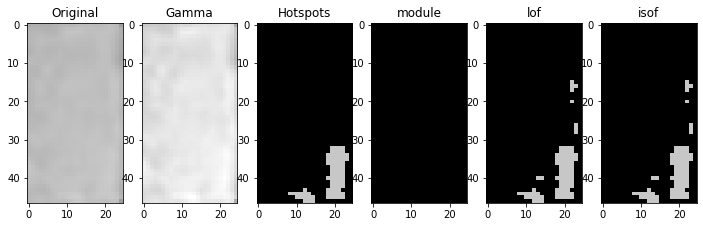

[-0.97688731 -1.01228725 -1.0074191  -1.04681997 -0.97316278 -1.0074191
 -0.99520489 -1.00931476]
[-1.85857924]
[-0.41798419 -0.43143355 -0.43315534 -0.46397492 -0.41837965 -0.43315534
 -0.444562   -0.46617529]
[-0.7034317]
0.0 0
2625.jpg Normal
[-1.03869853 -0.99487459 -0.98736559 -0.98916663 -0.98916663 -0.98197941
 -0.99018035 -1.00972686]
[-1.70933596]
[-0.46357531 -0.45941374 -0.44415248 -0.44753401 -0.44753401 -0.43320633
 -0.44802541 -0.46378329]
[-0.64373438]
0.0 0
4254.jpg Normal
[-1.04102611 -0.99422959 -1.12392467 -0.98333724 -1.00015513 -1.00039392
 -1.42633582 -1.0147803 ]
[-1.72207615]
[-0.462783   -0.44188827 -0.50523132 -0.43895204 -0.46364302 -0.46646417
 -0.56587365 -0.49229253]
[-0.64883046]
0.0 0
860.jpg Normal
[-0.97556188 -1.19135107 -1.50002041 -0.99422508 -1.         -0.99422508
 -0.99730503 -1.00386559]
[-1.72207615]
[-0.42762173 -0.5055144  -0.57766428 -0.45915534 -0.43186517 -0.45915534
 -0.42469385 -0.46225508]
[-0.64883046]
0.0 0
20.jpg Normal
[-0.99076311 

[-0.97452882 -1.01420977 -0.99126731 -0.9787975  -0.97452882 -1.79746257
 -1.04986649 -0.96811228]
[-1.78206358]
[-0.45364338 -0.46011909 -0.47867741 -0.44979862 -0.45364338 -0.62255614
 -0.45995721 -0.44737883]
[-0.67282543]
5.5 19.41421353816986 0.1833719693677908 0.9850054182402465
0.0 0
3539.jpg Normal
[-0.99311146 -1.00764561 -0.99526316 -1.00174257 -1.         -1.86188687
 -1.         -0.99311146]
[-1.69492094]
[-0.43037184 -0.47296615 -0.46908294 -0.43785405 -0.44462032 -0.62186572
 -0.44462032 -0.43037184]
[-0.63796838]
0.0 0
2627.jpg Normal
[-1.00722964 -1.02221649 -1.00328411 -0.99849598 -0.99699858 -0.97509453
 -1.05311009 -1.00290048]
[-1.85857924]
[-0.47100517 -0.46342856 -0.47339953 -0.46032773 -0.45342842 -0.46326235
 -0.44909209 -0.46093728]
[-0.7034317]
0.0 0
5148.jpg Normal
[-1.02580701 -1.33362426 -1.03929128 -1.09548076 -0.98799751 -1.64602303
 -0.97935815 -1.00152319]
[-1.75809585]
[-0.44715743 -0.54380039 -0.47257241 -0.49686711 -0.43626401 -0.59716661
 -0.4460798

[-0.96974621 -1.072634   -1.01588788 -1.02067171 -0.97233471 -0.99692188
 -0.96727119 -1.08781326]
[-1.78206358]
[-0.43847877 -0.47746214 -0.48261914 -0.47745828 -0.46433892 -0.47989517
 -0.44285435 -0.49999766]
[-0.67282543]
0.0 0
4040.jpg Normal
[-1.         -1.18953384 -0.9848069  -1.         -1.77133853 -1.18953384
 -1.02551601 -1.        ]
[-1.86224249]
[-0.42783489 -0.46871528 -0.43866865 -0.42783489 -0.55977732 -0.46871528
 -0.46256007 -0.43613466]
[-0.704897]
0.0 0
4726.jpg Normal
[-0.99967825 -1.06606736 -1.07352747 -1.00281942 -1.02580701 -0.98284593
 -1.00750752 -1.00221913]
[-1.75809585]
[-0.44939275 -0.46190635 -0.46252286 -0.44337051 -0.44715743 -0.42597942
 -0.47341405 -0.43556005]
[-0.66323834]
0.0 0
3049.jpg Normal
[-1.58797739 -1.30642112 -1.05386482 -1.16607736 -1.54292839 -0.99847345
 -1.80421261 -1.41228628]
[-1.75809585]
[-0.63810002 -0.57886731 -0.51087341 -0.55662337 -0.61155856 -0.43971084
 -0.6970479  -0.61046262]
[-0.66323834]
0.0 2.0 0.0 1.0
0.0 2.0 0.0 1.0


[-0.99779362 -1.04942162 -1.00825107 -1.03198059 -1.01102908 -0.96944617
 -1.03647999 -0.98489004]
[-1.75809585]
[-0.49071307 -0.44222459 -0.48135379 -0.4702229  -0.46827709 -0.44310332
 -0.46518457 -0.47102532]
[-0.66323834]
0.0 0
3908.jpg Normal
[-1.00648926 -0.98333373 -1.03445188 -0.99800348 -0.99480617 -0.99223572
 -0.98333373 -1.01333144]
[-1.70933596]
[-0.4509967  -0.44066504 -0.46817571 -0.45279359 -0.43689337 -0.44493039
 -0.44066504 -0.45880473]
[-0.64373438]
0.0 0
4901.jpg Normal
[-1.00221913 -1.03929128 -0.98284593 -1.69239338 -0.98799751 -0.98635988
 -1.00152319 -0.99331193]
[-1.75809585]
[-0.43556005 -0.47257241 -0.42597942 -0.59959389 -0.43626401 -0.42896595
 -0.44116077 -0.43015038]
[-0.66323834]
0.0 0
1879.jpg Normal
[-1.00045595 -1.         -1.09050366 -0.99020523 -1.36791078 -0.97278223
 -0.97519196 -0.98922807]
[-1.69492094]
[-0.44235862 -0.4367404  -0.4844624  -0.44122068 -0.54868369 -0.42851129
 -0.44191613 -0.45370403]
[-0.63796838]
0.0 0
335.jpg Normal
[-1.00124

[-1.00907756 -1.4441534  -0.97962239 -1.14596633 -1.18356366 -1.06518539
 -0.96006314 -0.97608901]
[-1.72207615]
[-0.46077027 -0.57129394 -0.49192852 -0.50217457 -0.48939861 -0.49972567
 -0.43483098 -0.47869613]
[-0.64883046]
0.0 0
4120.jpg Normal
[-0.99349404 -1.05341174 -0.98620829 -1.11905188 -1.03135907 -1.03938867
 -0.99335287 -0.98620829]
[-1.75809585]
[-0.48188933 -0.46679808 -0.42459834 -0.54837261 -0.50562979 -0.47424672
 -0.47403283 -0.42459834]
[-0.66323834]
0.0 0
2551.jpg Normal
[-1.03696217 -0.97689629 -1.03351979 -0.97688974 -1.01222493 -1.05001112
 -1.05224596 -1.03312358]
[-1.75809585]
[-0.49436642 -0.49588424 -0.47883907 -0.50805689 -0.49810806 -0.4783542
 -0.50266567 -0.47400669]
[-0.66323834]
0.0 0
3897.jpg Normal
[-0.97650617 -1.05058729 -1.07447597 -1.02173295 -1.00907756 -0.96006314
 -1.00703113 -0.97199051]
[-1.72207615]
[-0.45912118 -0.47968566 -0.50788967 -0.47198819 -0.46077027 -0.43483098
 -0.44598982 -0.46497761]
[-0.64883046]
0.0 0
1058.jpg Normal
[-0.99949

[-0.50286465 -0.48041143 -0.48403888 -0.48529309 -0.4642234  -0.48554807
 -0.49172315 -0.47941941]
[-0.69319991]
0.0 0
533.jpg Normal
[-0.99847345 -0.99002186 -1.32721478 -0.97691441 -0.98656111 -1.00294084
 -0.98152256 -1.04569329]
[-1.75809585]
[-0.43971084 -0.44340229 -0.50238585 -0.42280347 -0.45529029 -0.43987798
 -0.45171077 -0.49714515]
[-0.66323834]
0.0 0
1528.jpg Normal
[-0.97934034 -1.8075274  -0.9957061  -0.98479175 -1.18689528 -1.02030788
 -0.98739027 -1.02777123]
[-1.85857924]
[-0.42659777 -0.60573064 -0.44468114 -0.43466286 -0.51110162 -0.48106405
 -0.41413721 -0.42859058]
[-0.7034317]
0.0 0
4450.jpg Normal
[-0.98826055 -1.01246927 -1.00604467 -1.00570013 -1.00984682 -1.00264982
 -1.05103941 -0.98826055]
[-1.72207615]
[-0.48933008 -0.49686346 -0.50245298 -0.4965719  -0.50195608 -0.51804226
 -0.48560718 -0.48933008]
[-0.64883046]
0.0 0
2021.jpg Normal
[-0.98610391 -1.0121904  -1.05750383 -1.02632103 -0.98055954 -1.
 -0.99911023 -0.98728222]
[-1.72690247]
[-0.46575952 -0.45

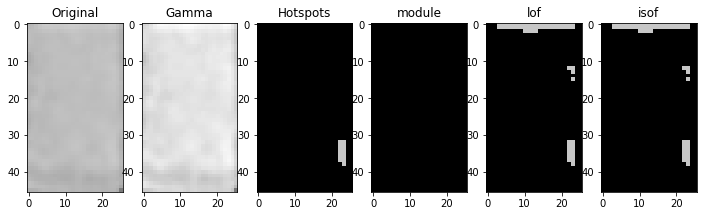

[-1.20772609 -1.04589873 -0.99981169 -1.14148951 -1.02065885 -0.98922807
 -1.26980038 -1.14148951]
[-1.69492094]
[-0.55384682 -0.51213707 -0.48861434 -0.52241611 -0.48403691 -0.45370403
 -0.57954451 -0.52241611]
[-0.63796838]
0.0 0
2009.jpg Normal
[-1.01367373 -0.98799751 -0.97935815 -0.98284593 -1.15473305 -0.98799751
 -0.98635988 -0.98284593]
[-1.75809585]
[-0.44509878 -0.43626401 -0.44607982 -0.42597942 -0.52798695 -0.43626401
 -0.42896595 -0.42597942]
[-0.66323834]
0.0 0
4493.jpg Normal
[-0.99774775 -0.99408639 -0.99161176 -0.99774775 -1.00276533 -0.99002186
 -1.05055283 -1.01881812]
[-1.75809585]
[-0.42743945 -0.45932732 -0.43672377 -0.42743945 -0.44286584 -0.44340229
 -0.44423487 -0.46126072]
[-0.66323834]
11.0 15.656854152679443 0.5638888888359976 0.9464948442054
11.0 15.656854152679443 0.5638888888359976 0.9464948442054
3.0 16
719.jpg Single-Hotspot


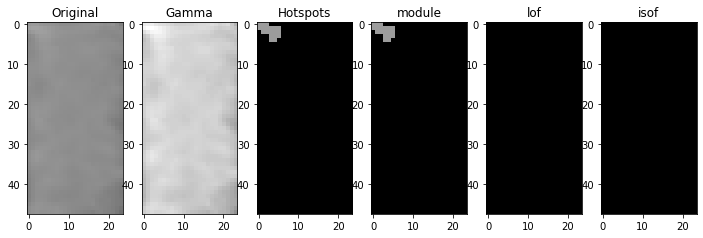

[-0.98804602 -0.98976106 -0.99156648 -1.04681997 -5.95190107 -1.01549164
 -0.98361088 -0.97688731]
[-1.85857924]
[-0.43726641 -0.44800756 -0.45059503 -0.46397492 -0.80641688 -0.46250784
 -0.42090096 -0.41798419]
[-0.7034317]
0.0 0
2784.jpg Normal
[-1.01685989 -0.99307359 -1.05713599 -1.02243081 -1.60122621 -1.15987911
 -0.98333373 -0.99018035]
[-1.70933596]
[-0.47967526 -0.42822754 -0.49271665 -0.45372122 -0.60088729 -0.50880134
 -0.44066504 -0.44802541]
[-0.64373438]
0.0 0
2948.jpg Normal
[-0.9745524  -0.99174563 -1.00935143 -0.97979634 -1.02811064 -0.9745524
 -0.98778817 -0.97979634]
[-1.83299977]
[-0.48529309 -0.48041143 -0.48990131 -0.48825629 -0.51979983 -0.48529309
 -0.49413958 -0.48825629]
[-0.69319991]
0.0 0
2790.jpg Normal
[-1.02977405 -1.07416093 -1.00675417 -0.99960228 -0.99205591 -1.07416093
 -1.25662007 -0.99960228]
[-1.72207615]
[-0.45730893 -0.49780735 -0.45917981 -0.46506013 -0.44251637 -0.49780735
 -0.54033429 -0.46506013]
[-0.64883046]
0.0 0
1299.jpg Normal
[-1.037515

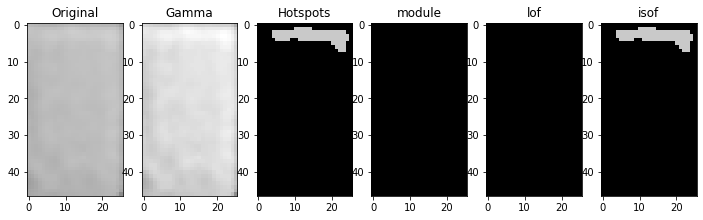

[-1.00120127 -1.13757382 -1.01672556 -1.04235136 -1.61326476 -0.9973096
 -1.01387374 -0.99960228]
[-1.72207615]
[-0.47882477 -0.54350528 -0.51325588 -0.54133451 -0.68286374 -0.48010811
 -0.51259447 -0.46506013]
[-0.64883046]
6.0 11.656854152679443 0.5548791279733458 0.9631048512866727
0.0 0.0 0 0
0.0 0.0 0 0
50.5 47.55634880065918 0.2805977825886075 0.9335395563381437
6.0 11.656854152679443 0.5548791279733458 0.9631048512866727
50.5 47.55634880065918 0.2805977825886075 0.9335395563381437
57.0 28
1501.jpg Multi-Hotspots


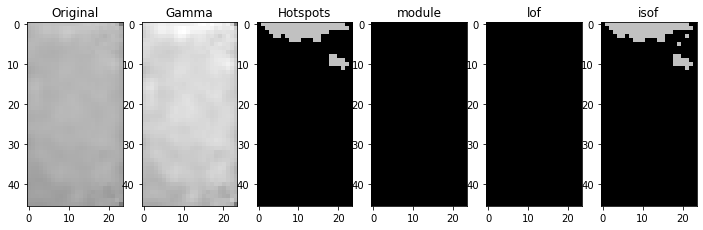

[-1.         -1.92128203 -1.20217377 -1.58470708 -1.07540025 -1.33227586
 -1.00011743 -1.44602573]
[-1.86224249]
[-0.4167921  -0.71392316 -0.54614093 -0.64248542 -0.51886015 -0.57268793
 -0.44869333 -0.61731131]
[-0.704897]
0.0 2.0 0.0 1.0
124.0 93.4558435678482 0.1784097666924015 0.7672025115088225
0.0 0.0 0 0
0.0 0.0 0 0
0.0 0.0 0 0
0.0 0
1515.jpg Normal
[-1.04376562 -0.99026902 -1.00020509 -0.99247092 -1.14210354 -1.00020509
 -1.14210354 -1.04376562]
[-1.85857924]
[-0.49798582 -0.48268543 -0.48660866 -0.45245694 -0.50312437 -0.48660866
 -0.50312437 -0.49798582]
[-0.7034317]
0.0 0
3302.jpg Normal
[-1.09785095 -1.00761308 -1.         -1.         -0.99581382 -0.9955567
 -1.05486693 -1.38139237]
[-1.72207615]
[-0.477998   -0.48639919 -0.43691603 -0.43186517 -0.44061932 -0.42918158
 -0.46566281 -0.55065602]
[-0.64883046]
0.0 0
3464.jpg Normal
[-1.03219999 -1.         -1.         -0.97591012 -0.99479076 -0.99530577
 -1.00069193 -1.01379784]
[-1.72690247]
[-0.47457758 -0.43958019 -0.461539

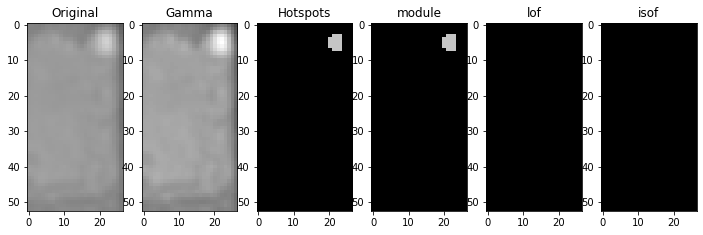

[-1.0070661  -1.53642311 -1.03391235 -1.37416925 -1.04569329 -1.00381323
 -1.19852196 -1.00381323]
[-1.75809585]
[-0.43604012 -0.55690688 -0.48379895 -0.52393441 -0.49714515 -0.45885495
 -0.50438587 -0.45885495]
[-0.66323834]
0.0 0
1924.jpg Normal
[-1.0260545  -0.99267064 -0.98274118 -1.71992327 -0.98431578 -0.97674112
 -1.00041455 -1.16794739]
[-1.86224249]
[-0.45550376 -0.44314487 -0.43611165 -0.57011087 -0.43265874 -0.42749971
 -0.45058094 -0.46279033]
[-0.704897]
0.0 0
268.jpg Normal
[-1.00648926 -1.0242151  -0.98698683 -0.99757131 -0.99487459 -0.99737854
 -1.08056149 -0.99480617]
[-1.70933596]
[-0.4509967  -0.48338187 -0.45709822 -0.47769188 -0.45941374 -0.45725752
 -0.52570332 -0.43689337]
[-0.64373438]
0.0 0
4684.jpg Normal
[-1.01777299 -0.97519196 -0.97278223 -1.03494617 -0.99526316 -1.08745374
 -0.9977858  -1.36791078]
[-1.69492094]
[-0.45895998 -0.44191613 -0.42851129 -0.49416121 -0.46908294 -0.4676613
 -0.47549578 -0.54868369]
[-0.63796838]
0.0 0
3855.jpg Normal
[-0.9997539 

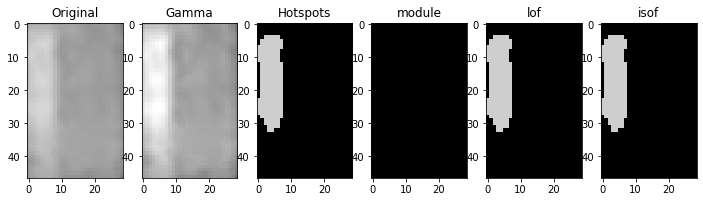

[-0.98653583 -0.99175644 -0.99726171 -1.17545702 -1.00009368 -1.01103622
 -0.98778817 -1.04525844]
[-1.83299977]
[-0.49091327 -0.4703645  -0.45950617 -0.51633385 -0.48554807 -0.48496459
 -0.49413958 -0.51598404]
[-0.69319991]
0.0 0
3841.jpg Normal
[-0.97990379 -1.02617444 -1.02592767 -1.06339183 -1.08426009 -0.9635095
 -0.98839085 -1.03774039]
[-1.76166564]
[-0.45167664 -0.45502433 -0.52747356 -0.45982428 -0.48306309 -0.42244867
 -0.44786949 -0.48004677]
[-0.66466626]
0.0 0
2587.jpg Normal
[-1.01750807 -1.06996033 -1.00587047 -0.99867675 -1.00161499 -1.01246927
 -0.99581382 -1.00316745]
[-1.72207615]
[-0.50213092 -0.47031481 -0.50665783 -0.4462444  -0.49835913 -0.49686346
 -0.44061932 -0.468502  ]
[-0.64883046]
0.0 0
4848.jpg Normal
[-1.01539347 -0.98976106 -1.01626977 -1.0074191  -0.99156648 -1.04681997
 -0.98804602 -0.97688731]
[-1.85857924]
[-0.47054307 -0.44800756 -0.43314027 -0.43315534 -0.45059503 -0.46397492
 -0.43726641 -0.41798419]
[-0.7034317]
0.0 0
4690.jpg Normal
[-1.027940

[-1.09192358 -0.99480617 -2.03477572 -0.99307359 -0.99858384 -1.29548388
 -1.03869853 -0.99431744]
[-1.70933596]
[-0.4905068  -0.43689337 -0.64778726 -0.42822754 -0.44654077 -0.54200435
 -0.46357531 -0.43055398]
[-0.64373438]
0.0 0
283.jpg Normal
[-1.00007961 -1.08644025 -1.03870197 -1.02095014 -1.17497263 -0.99294174
 -1.03870197 -1.00937672]
[-1.85857924]
[-0.44532193 -0.49839686 -0.48025591 -0.46072306 -0.52001192 -0.4660392
 -0.48025591 -0.44324114]
[-0.7034317]
0.0 0
4647.jpg Normal
[-1.00613592 -0.99118569 -1.03203419 -1.02879061 -1.00938339 -1.01921407
 -1.00217958 -0.99817088]
[-1.72207615]
[-0.47141415 -0.48486784 -0.44971202 -0.47754955 -0.48875083 -0.46091154
 -0.45290319 -0.48717955]
[-0.64883046]
0.0 0
3128.jpg Normal
[-1.01611791 -1.00373466 -1.00570013 -1.01099976 -0.98451127 -0.99581382
 -1.00264982 -1.22649134]
[-1.72207615]
[-0.50942929 -0.49763207 -0.4965719  -0.48215586 -0.50942214 -0.44061932
 -0.51804226 -0.57003755]
[-0.64883046]
0.0 0
2236.jpg Normal
[-1.0271329

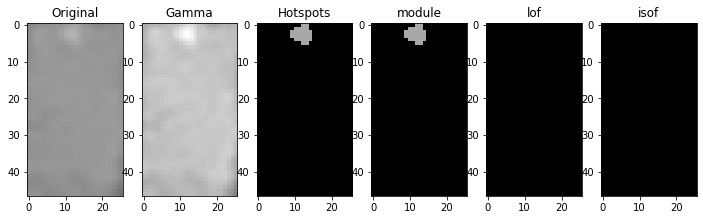

[-0.99331193 -1.03505373 -1.01603911 -1.01367373 -0.98036192 -0.99967825
 -1.01035899 -1.00221913]
[-1.75809585]
[-0.43015038 -0.44882078 -0.43811984 -0.44509878 -0.49200893 -0.44939275
 -0.46469124 -0.43556005]
[-0.66323834]
0.0 0
2395.jpg Normal
[-0.9944133  -1.04712051 -0.99813861 -1.20969928 -1.01004687 -0.98655452
 -1.07376738 -1.01010206]
[-1.78206358]
[-0.44243165 -0.47754442 -0.46723975 -0.50238426 -0.44073734 -0.43637657
 -0.49719692 -0.44648158]
[-0.67282543]
0.0 0
308.jpg Normal
[-0.99737854 -0.99261953 -0.99246907 -0.99599412 -1.04961859 -0.99307359
 -1.02243081 -1.02243081]
[-1.70933596]
[-0.45725752 -0.44282194 -0.45262914 -0.46440913 -0.51396777 -0.42822754
 -0.45372122 -0.45372122]
[-0.64373438]
0.0 0
1844.jpg Normal
[-1.06148655 -0.99345511 -1.19665383 -0.99337026 -0.99400764 -1.052522
 -0.99337026 -1.09445163]
[-1.72690247]
[-0.47279361 -0.45192078 -0.55445482 -0.45874144 -0.45339884 -0.48953705
 -0.45874144 -0.52830664]
[-0.65076099]
0.0 0
1677.jpg Normal
[-1.1375738

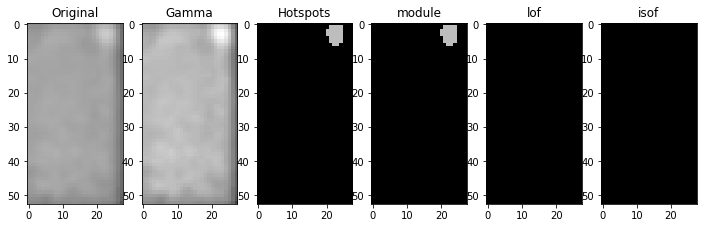

[-1.00764561 -0.98447115 -0.99751363 -1.         -1.26062492 -1.02156636
 -1.00174257 -5.27922883]
[-1.69492094]
[-0.47296615 -0.43782283 -0.44740287 -0.42917396 -0.52525486 -0.44471389
 -0.43785405 -0.81574581]
[-0.63796838]
0.0 0
1893.jpg Normal
[-1.02397124 -1.         -0.98431578 -0.99372971 -1.03729747 -1.03663543
 -0.99290715 -1.03469001]
[-1.86224249]
[-0.46674659 -0.42352116 -0.43265874 -0.42547618 -0.47864517 -0.45840889
 -0.42626733 -0.45982648]
[-0.704897]
0.0 0
4055.jpg Normal
[-1.01188229 -0.99699858 -0.98739027 -1.0642853  -1.0344658  -0.97934034
 -0.98896994 -0.98151213]
[-1.85857924]
[-0.44742071 -0.45342842 -0.41413721 -0.48557654 -0.44230115 -0.42659777
 -0.44230796 -0.44722792]
[-0.7034317]
0.0 0
2424.jpg Normal
[-0.99551047 -0.99379702 -1.15412474 -0.98754325 -1.01000156 -1.02118693
 -0.99457087 -1.        ]
[-1.94887669]
[-0.42242195 -0.43287561 -0.52109804 -0.43998008 -0.43622649 -0.42705732
 -0.44266365 -0.43668262]
[-0.73955068]
0.0 0
4041.jpg Normal
[-0.9897545

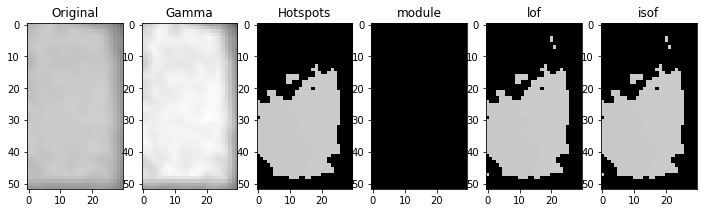

[-0.96468791 -1.04102611 -1.04102611 -0.99205591 -1.00039392 -1.01087139
 -0.98061933 -0.98333724]
[-1.72207615]
[-0.4417769  -0.462783   -0.462783   -0.44251637 -0.46646417 -0.45878974
 -0.4462249  -0.43895204]
[-0.64883046]
0.0 0
2197.jpg Normal
[-0.99411236 -1.02632103 -1.02323986 -0.98728222 -0.99911023 -1.05750383
 -1.00069193 -1.16703904]
[-1.72690247]
[-0.45107488 -0.46822545 -0.4774188  -0.43841288 -0.46566151 -0.48086318
 -0.45866657 -0.54301145]
[-0.65076099]
0.0 0
3289.jpg Normal
[-0.98698683 -0.99816239 -1.02192486 -0.99817727 -0.97455125 -0.99971014
 -1.00845414 -1.01333144]
[-1.70933596]
[-0.45709822 -0.454124   -0.50283763 -0.46759661 -0.45806344 -0.45851155
 -0.43237177 -0.45880473]
[-0.64373438]
0.0 0
2829.jpg Normal
[-1.07707048 -1.08094304 -1.07984286 -1.14243263 -1.14352991 -1.07783013
 -1.09001571 -1.08838514]
[-1.78206358]
[-0.5108586  -0.50901531 -0.50009072 -0.49727364 -0.53963185 -0.49335893
 -0.50419817 -0.49660177]
[-0.67282543]
0.0 0
4280.jpg Normal
[-0.9849

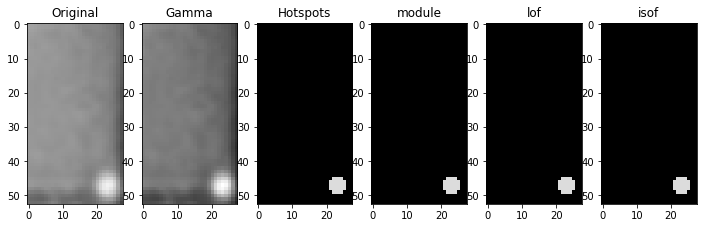

[-0.98575    -1.30940375 -1.07490087 -1.75819889 -0.96826716 -1.06914897
 -0.99512987 -2.58488732]
[-1.9128832]
[-0.42061548 -0.54617494 -0.45416806 -0.58167919 -0.42093605 -0.48251561
 -0.43184255 -0.6465316 ]
[-0.72515328]
0.0 0
37.jpg Normal
[-1.03288272 -1.08288628 -1.00749176 -1.0559026  -0.98352188 -0.98352188
 -1.00637242 -1.02364287]
[-1.85857924]
[-0.45903556 -0.49587372 -0.46955759 -0.45311121 -0.45253641 -0.45253641
 -0.42932269 -0.46578818]
[-0.7034317]
0.0 0
2632.jpg Normal
[-1.09548076 -0.98603515 -0.98603515 -1.06462549 -1.33016769 -0.98284593
 -0.98855811 -1.05307908]
[-1.75809585]
[-0.49686711 -0.48949911 -0.48949911 -0.44862639 -0.58126831 -0.42597942
 -0.49833034 -0.47236622]
[-0.66323834]
0.0 0
4243.jpg Normal
[-1.00764561 -2.06601132 -0.97278223 -1.07120464 -1.44553527 -0.97519196
 -1.31987444 -1.00174257]
[-1.69492094]
[-0.47296615 -0.65589424 -0.42851129 -0.50009822 -0.56770543 -0.44191613
 -0.54460573 -0.43785405]
[-0.63796838]
0.0 0
1303.jpg Normal
[-0.98567591

[-0.99223572 -1.2128392  -0.98197941 -1.01152471 -1.00845414 -0.98916663
 -0.98580434 -1.06385559]
[-1.70933596]
[-0.44493039 -0.54172459 -0.43320633 -0.45723608 -0.43237177 -0.44753401
 -0.4364217  -0.47706017]
[-0.64373438]
0.0 0
640.jpg Normal
[-0.9852741  -1.00276246 -0.9957061  -1.02629971 -0.98479175 -1.00376892
 -1.00756559 -1.38406203]
[-1.85857924]
[-0.41931941 -0.46326173 -0.44468114 -0.47012446 -0.43466286 -0.44305216
 -0.44010571 -0.55953992]
[-0.7034317]
0.0 0
2805.jpg Normal
[-1.00922119 -1.         -1.03740636 -1.03610421 -1.02699746 -1.00951246
 -1.01400442 -1.02733066]
[-1.94887669]
[-0.47258207 -0.43726193 -0.50790395 -0.44007897 -0.50527677 -0.51284992
 -0.47680869 -0.45769489]
[-0.73955068]
0.0 0
668.jpg Normal
[-1.03040857 -0.99106141 -1.01777299 -1.04589873 -1.02065885 -1.02405215
 -0.97519196 -0.99850119]
[-1.69492094]
[-0.49313593 -0.48047394 -0.45895998 -0.51213707 -0.48403691 -0.48741451
 -0.44191613 -0.47391379]
[-0.63796838]
0.0 0
4284.jpg Normal
[-1.1093498

[-0.97812103 -0.97020089 -0.98201155 -1.03584034 -1.00508114 -0.98769966
 -1.07265813 -0.9899714 ]
[-1.94887669]
[-0.44175129 -0.41600207 -0.43319846 -0.45719491 -0.45230047 -0.42052842
 -0.48665804 -0.42953957]
[-0.73955068]
0.0 0
3702.jpg Normal
[-1.002817   -1.03281043 -1.01036375 -0.98597949 -0.98086235 -1.0080561
 -1.04571759 -0.98264554]
[-1.9128832]
[-0.46290305 -0.4589007  -0.49284197 -0.45108942 -0.46033264 -0.43878567
 -0.43516382 -0.4663379 ]
[-0.72515328]
0.0 0
3064.jpg Normal
[-1.03631325 -1.         -1.33016769 -0.9920963  -1.07490462 -1.
 -0.99310879 -0.98603515]
[-1.75809585]
[-0.48931634 -0.45069487 -0.58126831 -0.47143261 -0.53478736 -0.43368743
 -0.48318498 -0.48949911]
[-0.66323834]
0.0 0
1673.jpg Normal
[-1.00541464 -1.00653647 -0.99530577 -1.00541464 -0.98728222 -1.04417089
 -0.9979798  -0.98055954]
[-1.72690247]
[-0.4666074  -0.46402868 -0.47114757 -0.4666074  -0.43841288 -0.49103575
 -0.4392856  -0.45217351]
[-0.65076099]
0.0 0
4723.jpg Normal
[-1.02260758 -1.01

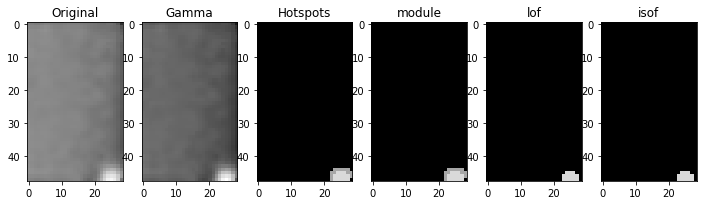

[-1.01247339 -1.02429879 -1.83658227 -1.17175982 -1.00622762 -1.01969676
 -0.98369613 -0.98369613]
[-1.83299977]
[-0.46715297 -0.48980201 -0.5911116  -0.50968871 -0.45950635 -0.45602295
 -0.44602317 -0.44602317]
[-0.69319991]
0.0 0
4051.jpg Normal
[-0.99288679 -0.98580434 -1.03869853 -0.98580434 -1.46530954 -1.14194598
 -1.00845414 -0.98736559]
[-1.70933596]
[-0.43770317 -0.4364217  -0.46357531 -0.4364217  -0.58161619 -0.50007719
 -0.43237177 -0.44415248]
[-0.64373438]
0.0 0
1129.jpg Normal
[-1.00900901 -1.33514928 -0.99379702 -0.99313158 -1.         -0.96259576
 -1.03351029 -1.01332038]
[-1.94887669]
[-0.43559068 -0.53535829 -0.43287561 -0.4409936  -0.43668262 -0.40881058
 -0.43678978 -0.42779043]
[-0.73955068]
0.0 0
1897.jpg Normal
[-1.01387374 -1.02277201 -0.99817088 -1.02070709 -1.1971887  -1.00187293
 -0.97564213 -1.00613592]
[-1.72207615]
[-0.51259447 -0.4755893  -0.48717955 -0.5181474  -0.58992467 -0.49736746
 -0.43999196 -0.47141415]
[-0.64883046]
0.0 0
3058.jpg Normal
[-0.9773

[-1.08022496 -1.26065594 -1.17413881 -1.00386289 -1.20217377 -1.06148685
 -1.36967308 -1.10357133]
[-1.86224249]
[-0.51820078 -0.55147092 -0.52905458 -0.47098907 -0.54614093 -0.489497
 -0.59490027 -0.54351258]
[-0.704897]
0.0 0
4092.jpg Normal
[-0.99960228 -0.99422959 -1.13009214 -1.00516313 -1.10709692 -1.02977405
 -0.99205591 -0.99960228]
[-1.72207615]
[-0.46506013 -0.44188827 -0.51170973 -0.47545757 -0.50021329 -0.45730893
 -0.44251637 -0.46506013]
[-0.64883046]
0.0 0
3925.jpg Normal
[-1.00339782 -0.99626277 -1.00511358 -0.99493022 -1.00798333 -1.17175982
 -1.00511358 -1.02429879]
[-1.83299977]
[-0.48363245 -0.45623088 -0.47519297 -0.44780742 -0.49363926 -0.50968871
 -0.47519297 -0.48980201]
[-0.69319991]
0.0 0
2385.jpg Normal
[-0.98975459 -0.99757131 -1.01821479 -1.00648926 -1.04145178 -0.99971014
 -1.0058721  -0.98433513]
[-1.70933596]
[-0.46608667 -0.47769188 -0.4701692  -0.4509967  -0.48910427 -0.45851155
 -0.47345659 -0.4307059 ]
[-0.64373438]
0.0 0
1854.jpg Normal
[-0.99568741

[-1.72467581 -1.29257961 -1.1111159  -1.38715861 -1.55035374 -1.26661675
 -1.42795739 -1.26661675]
[-1.94887669]
[-0.71759647 -0.59648172 -0.56143893 -0.60635327 -0.63311703 -0.58139249
 -0.63523242 -0.58139249]
[-0.73955068]
0.0 0
2232.jpg Normal
[-0.99528643 -1.00548209 -1.00493638 -1.00676597 -1.05943977 -0.98280994
 -1.0026282  -1.02088161]
[-1.9128832]
[-0.46127213 -0.44937251 -0.44366129 -0.42327942 -0.51522935 -0.45190179
 -0.46756251 -0.43793881]
[-0.72515328]
0.0 0
4643.jpg Normal
[-0.98522384 -1.0121904  -1.         -1.         -1.00069193 -1.
 -0.98567591 -0.98522384]
[-1.72690247]
[-0.45544948 -0.45123293 -0.45417798 -0.45178782 -0.45866657 -0.43958019
 -0.45886506 -0.45544948]
[-0.65076099]
0.0 0
4870.jpg Normal
[-1.         -1.00152319 -1.07105598 -0.99366453 -1.74774055 -1.01603911
 -1.22251751 -0.98635988]
[-1.75809585]
[-0.45069487 -0.44116077 -0.47847341 -0.44057694 -0.60690405 -0.43811984
 -0.54813685 -0.42896595]
[-0.66323834]
0.0 0
244.jpg Normal
[-1.02156636 -0.99

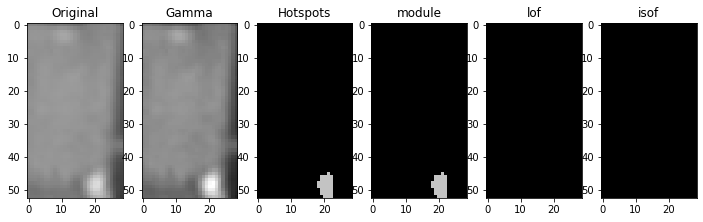

[-1.         -1.15268895 -0.98638418 -1.         -0.97415139 -1.23493213
 -0.96932484 -0.99741949]
[-1.70933596]
[-0.43703425 -0.46463925 -0.42495402 -0.43440581 -0.43764398 -0.52647753
 -0.43151249 -0.44174894]
[-0.64373438]
0.0 0
536.jpg Normal
[-0.99626277 -1.01969676 -1.13795741 -1.01135071 -0.99316095 -1.66743846
 -1.05033858 -0.99673235]
[-1.83299977]
[-0.45623088 -0.45602295 -0.5061314  -0.46238188 -0.45111107 -0.56959363
 -0.4698301  -0.46034739]
[-0.69319991]
0.0 0
250.jpg Normal
[-1.02364287 -1.08288628 -1.05311009 -2.74501459 -0.98896994 -1.02777123
 -1.01554503 -1.02336472]
[-1.85857924]
[-0.46578818 -0.49587372 -0.44909209 -0.71151396 -0.44230796 -0.42859058
 -0.42579377 -0.47293557]
[-0.7034317]
0.0 0
4864.jpg Normal
[-0.98078982 -0.99850534 -1.00284495 -1.10103356 -0.98604644 -1.03518452
 -0.98078982 -1.05209821]
[-1.94887669]
[-0.44912738 -0.42356713 -0.4276356  -0.50084568 -0.45742076 -0.44438282
 -0.44912738 -0.49524556]
[-0.73955068]
0.0 0
278.jpg Normal
[-0.99737854

[-1.08352667 -0.99306946 -0.97556188 -1.06475313 -1.02049974 -0.97632086
 -1.14459755 -1.00386559]
[-1.72207615]
[-0.47419044 -0.4598193  -0.42762173 -0.46477009 -0.48529265 -0.44181857
 -0.4921824  -0.46225508]
[-0.64883046]
0.0 0
1277.jpg Normal
[-1.09930366 -1.02152464 -1.03582565 -0.99850119 -1.16737109 -1.43533182
 -1.03582565 -1.07199894]
[-1.69492094]
[-0.54411189 -0.49147089 -0.51175376 -0.47391379 -0.53233021 -0.64114139
 -0.51175376 -0.53799091]
[-0.63796838]
15.5 25.41421353816986 0.3015700533554364 0.9864978812900941
7.0 10.828427076339722 0.75020015882688 1.0
15.5 25.41421353816986 0.3015700533554364 0.9864978812900941
7.0 10.828427076339722 0.75020015882688 1.0
31.0 11
5011.jpg Junction-Box-Error


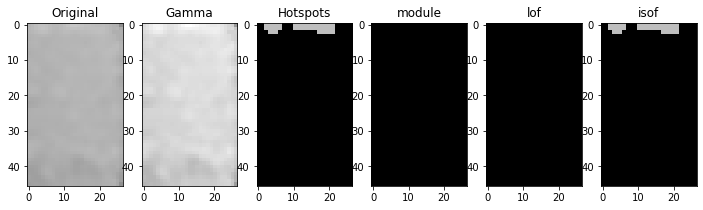

[-0.98333373 -0.99431744 -1.06385559 -1.01043962 -0.99431744 -0.99307359
 -1.51279946 -1.00845414]
[-1.70933596]
[-0.44066504 -0.43055398 -0.47706017 -0.44657195 -0.43055398 -0.42822754
 -0.58448632 -0.43237177]
[-0.64373438]
0.0 0
3460.jpg Normal
[-0.97108093 -1.03929128 -1.99618783 -0.98284593 -0.96282849 -0.9993481
 -1.         -1.2959091 ]
[-1.75809585]
[-0.43508753 -0.47257241 -0.62693241 -0.42597942 -0.43414916 -0.44513641
 -0.45069487 -0.52502751]
[-0.66323834]
0.0 0
3306.jpg Normal
[-1.12908922 -0.98160687 -1.00191485 -0.98655452 -1.00173039 -0.98056563
 -1.07821094 -0.9903432 ]
[-1.78206358]
[-0.49184692 -0.44253157 -0.43403849 -0.43637657 -0.44938986 -0.43402218
 -0.50865501 -0.44469267]
[-0.67282543]
0.0 0
4469.jpg Normal
[-1.         -0.99372971 -1.         -1.16794739 -0.99366436 -0.98274118
 -1.         -0.99366436]
[-1.86224249]
[-0.43476215 -0.42547618 -0.42352116 -0.46279033 -0.43115865 -0.43611165
 -0.42783489 -0.43115865]
[-0.704897]
0.0 0
2018.jpg Normal
[-0.9841324

[-0.45108942 -0.45426469 -0.41620491 -0.44366129 -0.46737434 -0.43499617
 -0.55603241 -0.43793881]
[-0.72515328]
0.0 0
4483.jpg Normal
[-1.04481057 -1.00121072 -1.00954964 -1.24411907 -1.04481057 -1.02191376
 -1.01681861 -1.03533659]
[-1.72690247]
[-0.46883985 -0.43489455 -0.44659736 -0.55809921 -0.46883985 -0.43933368
 -0.5066179  -0.4572428 ]
[-0.65076099]
0.0 0
709.jpg Normal
[-1.07105598 -1.0225557  -0.98855811 -0.99331193 -1.05871364 -1.0225557
 -1.03334022 -1.03026074]
[-1.75809585]
[-0.47847341 -0.4914766  -0.49833034 -0.43015038 -0.54103416 -0.4914766
 -0.46414006 -0.47199024]
[-0.66323834]
0.0 0
2794.jpg Normal
[-0.99817088 -1.04235136 -1.01110049 -1.01897277 -1.02070709 -1.00681448
 -1.0139515  -1.10882943]
[-1.72207615]
[-0.48717955 -0.54133451 -0.48215525 -0.50488816 -0.5181474  -0.47068162
 -0.50924733 -0.54964301]
[-0.64883046]
0.0 0
2780.jpg Normal
[-0.98996265 -1.00773757 -1.         -1.05105492 -0.98996265 -1.26062492
 -1.05105492 -1.        ]
[-1.69492094]
[-0.4478786

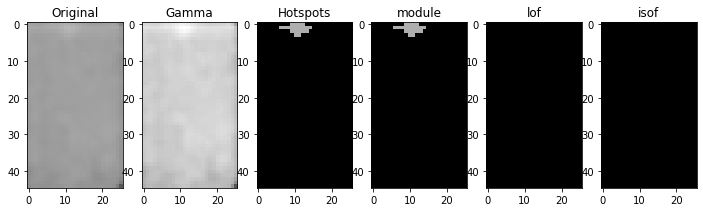

[-1.17545702 -1.0182797  -0.97737807 -1.41459074 -1.08057777 -0.98752143
 -0.9920646  -1.01459186]
[-1.83299977]
[-0.51633385 -0.46070547 -0.46954707 -0.55813443 -0.51389756 -0.45441908
 -0.4642234  -0.50658005]
[-0.69319991]
0.0 0
3449.jpg Normal
[-1.01188229 -0.98896994 -1.02777123 -0.98479175 -1.03743875 -0.9852741
 -1.01580546 -1.3089093 ]
[-1.85857924]
[-0.44742071 -0.44230796 -0.42859058 -0.43466286 -0.46213349 -0.41931941
 -0.46353831 -0.53944064]
[-0.7034317]
0.0 0
4326.jpg Normal
[-1.02770195 -0.98719717 -1.28547552 -1.30771885 -1.02323986 -1.05750383
 -0.99427119 -1.00357626]
[-1.72690247]
[-0.4829773  -0.45858951 -0.55324878 -0.542758   -0.4774188  -0.48086318
 -0.45603824 -0.47820073]
[-0.65076099]
16.0 20.485281229019165 0.4791218596397519 0.9399838145278125
16.0 20.485281229019165 0.4791218596397519 0.9399838145278125
26.0 0
5038.jpg Junction-Box-Error


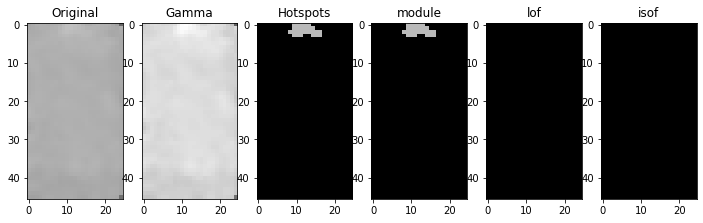

[-0.99836856 -1.18417781 -1.0721017  -1.11859019 -1.08487288 -1.01010612
 -2.44180687 -1.61161179]
[-1.94887669]
[-0.44062808 -0.54107631 -0.47804243 -0.51339495 -0.48214543 -0.41840864
 -0.64426554 -0.60432688]
[-0.73955068]
0.0 0
2757.jpg Normal
[-1.01677958 -1.02150001 -1.02699746 -1.04584222 -1.02321857 -1.07195537
 -1.01512106 -1.01677958]
[-1.94887669]
[-0.48665607 -0.45850006 -0.50527677 -0.51980938 -0.48269278 -0.52719151
 -0.46273611 -0.48665607]
[-0.73955068]
0.0 0
912.jpg Normal
[-0.98433513 -1.07329797 -0.99858384 -0.9992348  -0.99480617 -1.03445188
 -0.98197941 -1.81006349]
[-1.70933596]
[-0.4307059  -0.47602135 -0.44654077 -0.45103897 -0.43689337 -0.46817571
 -0.43320633 -0.62985844]
[-0.64373438]
0.0 0
906.jpg Normal
[-0.99079793 -1.02157763 -1.0045909  -1.01651148 -0.98610032 -0.99591798
 -1.04509154 -1.0214719 ]
[-1.84052542]
[-0.45043937 -0.47424904 -0.48341955 -0.47651716 -0.46675477 -0.46761044
 -0.48942331 -0.4722161 ]
[-0.69621017]
0.0 0
4332.jpg Normal
[-1.035053

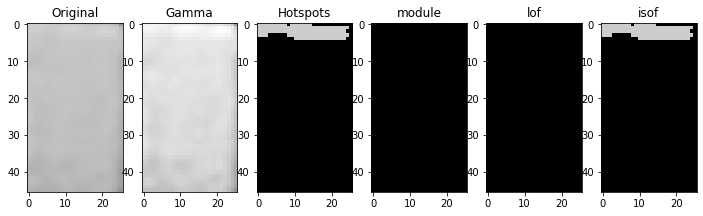

[-0.97191612 -1.02612489 -1.02704179 -1.02612489 -1.16749982 -1.02416731
 -0.98056563 -0.98655452]
[-1.78206358]
[-0.43779584 -0.4511629  -0.46316294 -0.4511629  -0.50360888 -0.45006424
 -0.43402218 -0.43637657]
[-0.67282543]
0.0 0
5004.jpg Normal
[-0.98280994 -0.96826716 -1.02088161 -1.07459564 -0.99528643 -0.9800816
 -1.01036375 -1.03846004]
[-1.9128832]
[-0.45190179 -0.42093605 -0.43793881 -0.51817279 -0.46127213 -0.43006855
 -0.49284197 -0.49545991]
[-0.72515328]
0.0 0
3461.jpg Normal
[-0.98698683 -1.00972686 -1.37182835 -0.99800348 -0.99223572 -1.03445188
 -0.99307359 -0.98975459]
[-1.70933596]
[-0.45709822 -0.46378329 -0.57368286 -0.45279359 -0.44493039 -0.46817571
 -0.42822754 -0.46608667]
[-0.64373438]
0.0 0
5010.jpg Normal
[-0.9920963  -0.98635988 -1.03631325 -1.00750752 -1.07352747 -0.9993481
 -1.01864309 -1.03505373]
[-1.75809585]
[-0.47143261 -0.42896595 -0.48931634 -0.47341405 -0.46252286 -0.44513641
 -0.48195593 -0.44882078]
[-0.66323834]
0.0 0
1276.jpg Normal
[-1.1828037

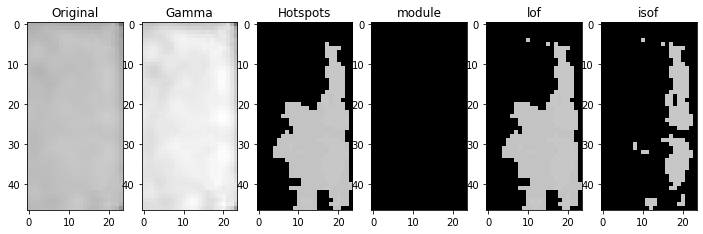

[-0.9915156  -1.07162249 -0.99247092 -1.45602443 -1.01481474 -0.99928387
 -2.65998081 -0.97450936]
[-1.85857924]
[-0.49071601 -0.49831705 -0.45245694 -0.60833561 -0.48420187 -0.47385486
 -0.73388373 -0.47370107]
[-0.7034317]
6.0 9.656854152679443 0.8085181428902574 1.0
6.0 9.656854152679443 0.8085181428902574 1.0
0.0 11
2019.jpg Single-Hotspot


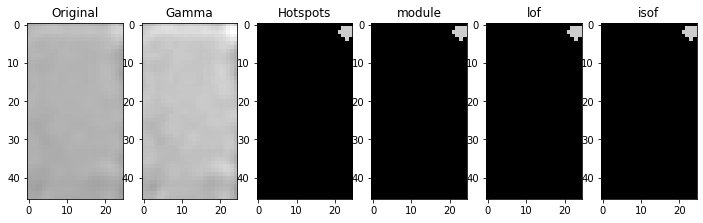

[-1.00708869 -0.96932484 -1.         -0.99576126 -1.04475115 -1.12995407
 -1.02438323 -1.0121355 ]
[-1.70933596]
[-0.4914524  -0.43151249 -0.44128767 -0.47911687 -0.46478238 -0.47204396
 -0.50420164 -0.46645185]
[-0.64373438]
0.0 0
4468.jpg Normal
[-1.02150001 -1.02119495 -0.99739725 -0.97915438 -1.08573194 -0.97915438
 -1.01006764 -1.62321365]
[-1.94887669]
[-0.45850006 -0.4589991  -0.44581803 -0.44277007 -0.50101146 -0.44277007
 -0.44433109 -0.60048302]
[-0.73955068]
0.0 0
3307.jpg Normal
[-1.0601227  -1.30791617 -1.0444281  -1.23495165 -1.64333514 -1.07199894
 -1.16737109 -1.03495528]
[-1.69492094]
[-0.53964546 -0.59425476 -0.50445062 -0.560466   -0.69335349 -0.53799091
 -0.53233021 -0.48767259]
[-0.63796838]
0.0 6.0 0.0 1.0
33.0 48.14213538169861 0.17892585625962415 0.8614945450104332
0.0 0
3688.jpg Normal
[-1.01898153 -0.9703341  -1.06830176 -0.99107143 -1.04821327 -1.66303796
 -1.07457744 -0.9800816 ]
[-1.9128832]
[-0.41620491 -0.42765148 -0.48522405 -0.43953907 -0.45140166 -0.56

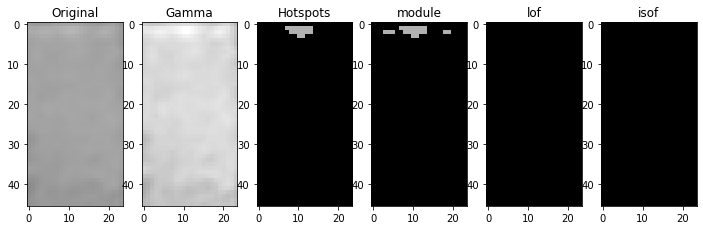

[-1.07814433 -1.00187293 -1.0139515  -1.27423608 -1.02070709 -1.00120127
 -1.03300771 -1.13757382]
[-1.72207615]
[-0.55041931 -0.49736746 -0.50924733 -0.60428157 -0.5181474  -0.47882477
 -0.52652843 -0.54350528]
[-0.64883046]
0.0 0
2227.jpg Normal
[-0.98056563 -0.9697334  -0.9697334  -1.00191485 -0.98774764 -1.12805201
 -1.02612489 -0.98310731]
[-1.78206358]
[-0.43402218 -0.43865374 -0.43865374 -0.43403849 -0.43664186 -0.47095266
 -0.4511629  -0.44713878]
[-0.67282543]
0.0 0
2541.jpg Normal
[-1.0830782  -1.15711639 -1.0242151  -1.48536313 -1.20127076 -1.04145178
 -0.99971014 -1.08056149]
[-1.70933596]
[-0.51127245 -0.5626057  -0.48338187 -0.62640119 -0.55809552 -0.48910427
 -0.45851155 -0.52570332]
[-0.64373438]
0.0 0
3887.jpg Normal
[-1.02369022 -0.99850534 -2.23851442 -1.254379   -0.98351521 -1.03594678
 -0.95960256 -1.00284495]
[-1.94887669]
[-0.46778388 -0.42356713 -0.67289595 -0.50716544 -0.42795704 -0.43853634
 -0.41781406 -0.4276356 ]
[-0.73955068]
0.0 0
4130.jpg Normal
[-0.9874

[-0.45050573 -0.43854566 -0.43933368 -0.42528921 -0.46276785 -0.4577931
 -0.43333382 -0.43489455]
[-0.65076099]
0.0 0
1869.jpg Normal
[-1.0026282  -0.98278284 -1.01898153 -0.98597949 -1.0467857  -0.98086235
 -1.00152308 -2.11571152]
[-1.9128832]
[-0.46756251 -0.46737434 -0.41620491 -0.45108942 -0.50532702 -0.46033264
 -0.45426469 -0.63029272]
[-0.72515328]
0.0 0
331.jpg Normal
[-0.99440179 -0.99551047 -1.01213162 -1.03854283 -1.00284495 -1.01332038
 -1.00348916 -1.02369022]
[-1.94887669]
[-0.43034836 -0.42242195 -0.42799003 -0.46715195 -0.4276356  -0.42779043
 -0.44151965 -0.46778388]
[-0.73955068]
0.0 0
4905.jpg Normal
[-1.04299897 -1.0690639  -1.04682794 -1.01680205 -1.01286142 -1.04299897
 -1.0375719  -0.97279086]
[-1.69492094]
[-0.48319681 -0.45541136 -0.52723049 -0.48175683 -0.47708375 -0.48319681
 -0.52594814 -0.46266735]
[-0.63796838]
0.0 0
457.jpg Normal
[-1.         -1.06526011 -0.99366453 -0.98635988 -1.15473305 -1.01035899
 -1.02580701 -0.98697008]
[-1.75809585]
[-0.43368743

[-0.44722496 -0.42662939 -0.50582536 -0.43589642 -0.46463925 -0.42440575
 -0.45666512 -0.43440581]
[-0.64373438]
0.0 0
4285.jpg Normal
[-0.99699858 -0.98739027 -0.96892777 -0.9957061  -1.06669591 -1.00756559
 -0.96892777 -0.9852741 ]
[-1.85857924]
[-0.45342842 -0.41413721 -0.44246499 -0.44468114 -0.49728677 -0.44010571
 -0.44246499 -0.41931941]
[-0.7034317]
0.0 0
669.jpg Normal
[-1.05858577 -0.99101449 -1.01474498 -0.99728316 -1.07066072 -1.02893458
 -1.02433422 -1.00653331]
[-1.72690247]
[-0.47750506 -0.43333382 -0.45333473 -0.45799341 -0.47661925 -0.49106319
 -0.46739292 -0.4722608 ]
[-0.65076099]
0.0 0
2192.jpg Normal
[-1.00876291 -1.00990565 -0.95582637 -1.04482579 -1.00630955 -2.62995625
 -0.9899714  -0.98201155]
[-1.94887669]
[-0.43331608 -0.48537705 -0.42414657 -0.43403037 -0.42671476 -0.62326931
 -0.42953957 -0.43319846]
[-0.73955068]
0.0 0
127.jpg Normal
[-0.99902301 -1.01651148 -0.98879354 -0.99339455 -1.01589126 -0.99902301
 -0.99591798 -1.00835173]
[-1.84052542]
[-0.4576579

[-0.41146511 -0.43953907 -0.48015079 -0.41677305 -0.42105501 -0.4481385
 -0.53811647 -0.42992236]
[-0.72515328]
0.0 0.0 0 0
12.0 20.82842707633972 0.3475987146958307 0.9840866130335069
12.0 20.82842707633972 0.3475987146958307 0.9840866130335069
14.0 9
1464.jpg Junction-Box-Error


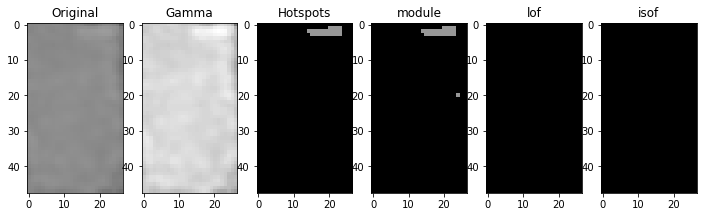

[-0.95514168 -0.99038081 -0.9882527  -0.9639408  -1.00707301 -1.03564908
 -0.97368699 -1.01613457]
[-1.82418808]
[-0.44524219 -0.44780078 -0.47429061 -0.45963769 -0.48281596 -0.47132434
 -0.44665033 -0.46975909]
[-0.68967523]
0.0 0
3273.jpg Normal
[-1.00544025 -0.98160687 -1.51802534 -0.96169882 -2.51504572 -1.07198642
 -1.0243486  -0.99639201]
[-1.78206358]
[-0.43457805 -0.44253157 -0.60120981 -0.42829059 -0.66616672 -0.48666509
 -0.44823586 -0.44306687]
[-0.67282543]
0.0 0
3503.jpg Normal
[-1.         -0.97756459 -1.10314248 -0.98892237 -1.         -1.014274
 -0.9979798  -0.98522384]
[-1.72690247]
[-0.42800025 -0.4546378  -0.52217159 -0.44380253 -0.43958019 -0.48137518
 -0.4392856  -0.45544948]
[-0.65076099]
0.0 0
680.jpg Normal
[-1.         -1.03620932 -1.         -1.05083236 -0.99217931 -1.04475115
 -0.96932484 -1.0121355 ]
[-1.70933596]
[-0.44128767 -0.49217703 -0.43853965 -0.45740321 -0.47313975 -0.46478238
 -0.43151249 -0.46645185]
[-0.64373438]
0.0 0
1314.jpg Normal
[-0.9917734

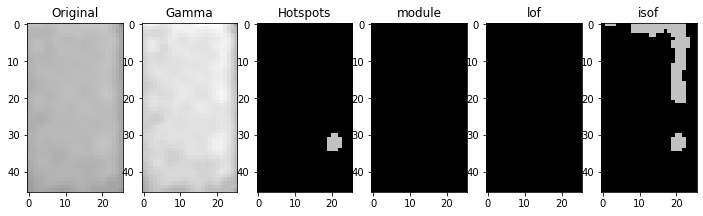

[-2.01962299 -1.01018812 -0.98601672 -3.75765093 -1.09106067 -1.01400442
 -0.99960485 -0.98794247]
[-1.94887669]
[-0.61953243 -0.44599607 -0.44304603 -0.77172072 -0.50190251 -0.47680869
 -0.4432116  -0.44383968]
[-0.73955068]
0.0 0
2635.jpg Normal
[-1.         -1.19865217 -1.00632314 -1.00968595 -1.05083236 -1.00625025
 -1.59096906 -1.        ]
[-1.70933596]
[-0.42440575 -0.51567453 -0.46578532 -0.44722496 -0.45740321 -0.48220517
 -0.61448756 -0.44128767]
[-0.64373438]
0.0 0
30.jpg Normal
[-0.99955562 -1.03217022 -0.98188144 -1.00433733 -0.95595358 -0.99171759
 -1.00842002 -0.99573868]
[-1.70933596]
[-0.49324171 -0.45525166 -0.47405691 -0.46080498 -0.42677544 -0.47080993
 -0.4572114  -0.47136296]
[-0.64373438]
0.0 0
870.jpg Normal
[-1.58480442 -1.05473475 -1.07198642 -1.11029425 -1.07512021 -0.9884436
 -1.30992146 -1.14751725]
[-1.78206358]
[-0.61008736 -0.44895908 -0.48666509 -0.51355417 -0.48766041 -0.45874732
 -0.55084201 -0.49726279]
[-0.67282543]
0.0 0
643.jpg Normal
[-1.01333144 

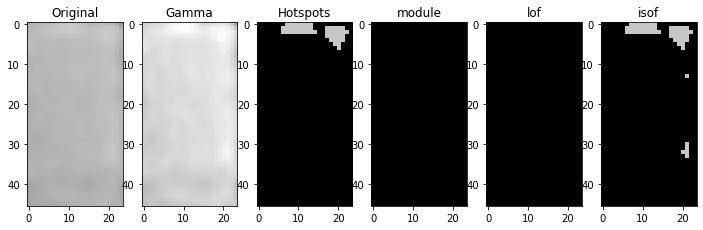

[-0.99342362 -1.58957289 -0.99248677 -1.28220971 -1.00058076 -1.16896407
 -0.99342362 -1.04509154]
[-1.84052542]
[-0.48600933 -0.59488162 -0.44118947 -0.52393255 -0.47355694 -0.53147248
 -0.48600933 -0.48942331]
[-0.69621017]
0.0 0
496.jpg Normal
[-0.98212461 -1.06209831 -1.01547483 -2.50383414 -1.04482579 -1.04482579
 -0.95582637 -1.02282027]
[-1.94887669]
[-0.43591521 -0.4763648  -0.44427458 -0.62880065 -0.43403037 -0.43403037
 -0.42414657 -0.45222658]
[-0.73955068]
0.0 0
1102.jpg Normal
[-1.16630276 -0.99534684 -0.99599137 -1.02433422 -1.06155897 -1.07371007
 -1.0879049  -1.03323496]
[-1.72690247]
[-0.59647452 -0.45158723 -0.51116255 -0.46739292 -0.54831548 -0.51269399
 -0.529199   -0.45587197]
[-0.65076099]
0.0 0
1664.jpg Normal
[-1.00281942 -1.0100343  -1.33362426 -0.99310879 -1.01992076 -0.98603515
 -1.00458058 -0.98697008]
[-1.75809585]
[-0.44337051 -0.47060305 -0.54380039 -0.48318498 -0.49355464 -0.48949911
 -0.48750186 -0.44372065]
[-0.66323834]
0.0 0
3073.jpg Normal
[-1.07863

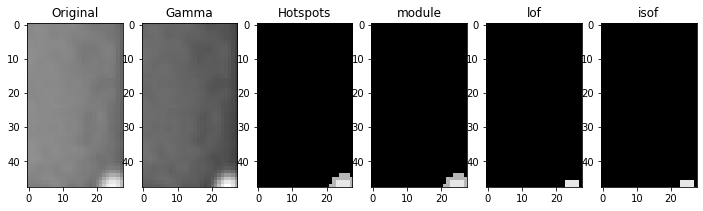

[-1.02793389 -0.99310879 -1.0100343  -1.15796132 -0.99462656 -1.01992076
 -0.98036192 -1.00281942]
[-1.75809585]
[-0.48040191 -0.48318498 -0.47060305 -0.51933819 -0.51194812 -0.49355464
 -0.49200893 -0.44337051]
[-0.66323834]
0.0 0
3098.jpg Normal
[-0.99773752 -1.52567811 -2.23971823 -2.43868233 -1.01636937 -1.32266366
 -1.52567811 -1.82000184]
[-1.82418808]
[-0.5036169  -0.54917872 -0.67646917 -0.75980455 -0.44812708 -0.56212388
 -0.54917872 -0.66802002]
[-0.68967523]
27.5 28.727921843528748 0.41873005741404734 0.9543160401311646
1.0 4.828427076339722 0.5390120952601716 1.0
0.0 2.0 0.0 1.0
13.5 19.899494647979736 0.4284099386328506 0.948084276039175
27.5 28.727921843528748 0.41873005741404734 0.9543160401311646
0.0 0.0 0 0
13.5 19.899494647979736 0.4284099386328506 0.948084276039175
7.0 57
1857.jpg Multi-Hotspots


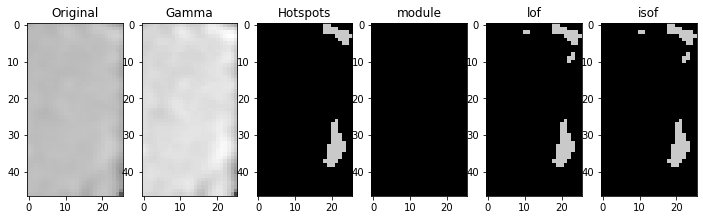

[-0.98278284 -1.00676597 -1.00548209 -0.99670743 -1.15773401 -0.9800816
 -0.99512987 -1.0026282 ]
[-1.9128832]
[-0.46737434 -0.42327942 -0.44937251 -0.45612526 -0.48721008 -0.43006855
 -0.43184255 -0.46756251]
[-0.72515328]
0.0 0
4091.jpg Normal
[-0.97769501 -0.98871481 -1.13801194 -1.02752408 -1.67888026 -0.99979699
 -0.99979699 -0.97769501]
[-1.84052542]
[-0.47919366 -0.46605962 -0.55364774 -0.48377836 -0.70674812 -0.51216084
 -0.51216084 -0.47919366]
[-0.69621017]
0.0 2.8284270763397217 0.0 1.0
43.0 44.485281229019165 0.2730521740122509 0.9635068786125566
43.0 44.485281229019165 0.2730521740122509 0.9635068786125566
47.0 18
3926.jpg Single-Hotspot


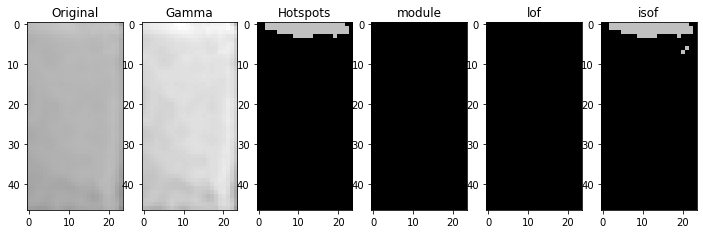

[-1.00173039 -1.0273576  -1.06189852 -0.9905049  -0.96169882 -0.98056563
 -2.14552838 -1.0047285 ]
[-1.78206358]
[-0.44938986 -0.43851812 -0.4800128  -0.45535228 -0.42829059 -0.43402218
 -0.6462866  -0.44740033]
[-0.67282543]
0.0 0
4085.jpg Normal
[-1.00158416 -1.00700126 -0.99385172 -0.99503373 -0.99600415 -0.9821374
 -1.00878303 -1.03738064]
[-1.69492094]
[-0.47510371 -0.45971601 -0.42876783 -0.45969387 -0.47139594 -0.45595729
 -0.45598883 -0.49265691]
[-0.63796838]
0.0 0
3932.jpg Normal
[-1.00433733 -1.10969427 -1.05189227 -0.96584996 -1.03836153 -1.3507635
 -0.99492755 -1.01996439]
[-1.70933596]
[-0.46080498 -0.50756497 -0.46895015 -0.41936755 -0.47922286 -0.56666347
 -0.42199604 -0.45259128]
[-0.64373438]
0.0 0
469.jpg Normal
[-1.07256752 -0.98404502 -1.2609319  -1.         -1.         -1.20695329
 -1.57936387 -1.16699153]
[-1.85857924]
[-0.4752934  -0.45004732 -0.52608843 -0.44831897 -0.44831897 -0.53445748
 -0.58281829 -0.51922332]
[-0.7034317]
0.0 0
1843.jpg Normal
[-1.473331  

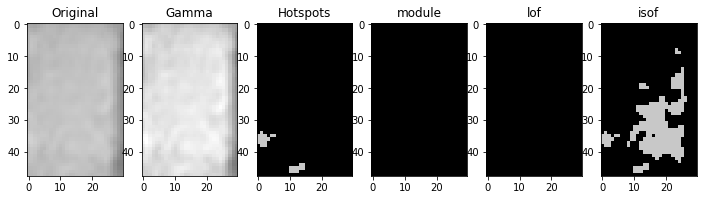

[-1.00493638 -1.         -1.00215572 -1.18938418 -1.0176585  -0.9800816
 -0.98621135 -0.98280994]
[-1.9128832]
[-0.44366129 -0.43213927 -0.43499617 -0.4931287  -0.43206231 -0.43006855
 -0.42105501 -0.45190179]
[-0.72515328]
0.0 0
4898.jpg Normal
[-0.98635988 -1.01603911 -1.13328127 -0.96282849 -0.9993481  -1.02645396
 -0.98697008 -0.98284593]
[-1.75809585]
[-0.42896595 -0.43811984 -0.51491419 -0.43414916 -0.44513641 -0.47615853
 -0.44372065 -0.42597942]
[-0.66323834]
0.0 0
2231.jpg Normal
[-1.00263274 -1.02118693 -0.98754325 -1.10103356 -1.00900901 -1.00284495
 -0.99850534 -1.03518452]
[-1.94887669]
[-0.47331957 -0.42705732 -0.43998008 -0.50084568 -0.43559068 -0.4276356
 -0.42356713 -0.44438282]
[-0.73955068]
0.0 0
4640.jpg Normal
[-1.06452907 -1.00990565 -1.0721017  -0.98212461 -1.06452907 -1.0721017
 -1.29800572 -0.98201155]
[-1.94887669]
[-0.51343376 -0.48537705 -0.47804243 -0.43591521 -0.51343376 -0.47804243
 -0.53887289 -0.43319846]
[-0.73955068]
10.0 11.656854152679443 0.92479854

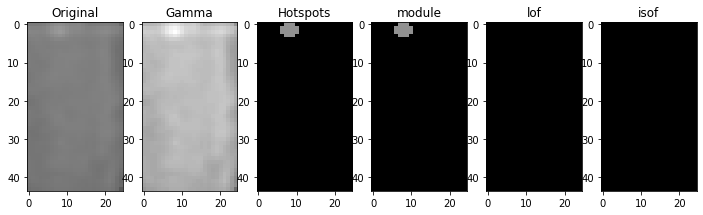

[-1.01547931 -0.98061933 -0.99095037 -1.01861141 -1.00187293 -0.99118569
 -1.00885046 -1.00120127]
[-1.72207615]
[-0.48927845 -0.4462249  -0.478251   -0.47770116 -0.49736746 -0.48486784
 -0.46340756 -0.47882477]
[-0.64883046]
0.0 0
4126.jpg Normal
[-1.20127076 -0.98698683 -1.1324803  -1.05290214 -1.0830782  -1.2481404
 -1.38824802 -1.00972686]
[-1.70933596]
[-0.55809552 -0.45709822 -0.52887224 -0.51528447 -0.51127245 -0.56426727
 -0.60221659 -0.46378329]
[-0.64373438]
0.0 0
3891.jpg Normal
[-0.98106381 -1.07065463 -0.99520265 -0.99211582 -1.76224666 -1.01430354
 -1.         -1.00408778]
[-1.69492094]
[-0.43315026 -0.50096222 -0.46077602 -0.45392435 -0.58535321 -0.44510828
 -0.41432861 -0.43372748]
[-0.63796838]
0.0 0
2557.jpg Normal
[-1.00166419 -1.02030111 -0.99024898 -0.96215398 -0.99609818 -1.01636937
 -1.05237403 -0.98727226]
[-1.82418808]
[-0.44187245 -0.45886486 -0.46120789 -0.44060854 -0.45515645 -0.44812708
 -0.45742569 -0.45864828]
[-0.68967523]
0.0 0
4132.jpg Normal
[-1.00750

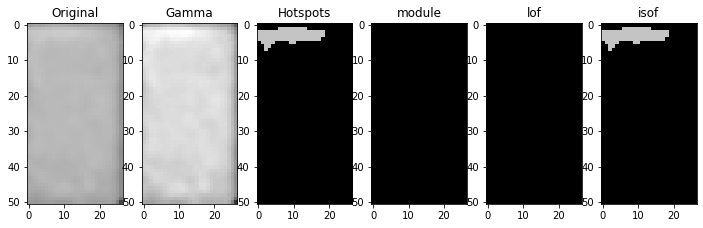

[-1.00521574 -0.99850534 -1.09630026 -0.98351521 -1.33514928 -0.99379702
 -0.98078982 -1.00900901]
[-1.94887669]
[-0.43810649 -0.42356713 -0.48101942 -0.42795704 -0.53535829 -0.43287561
 -0.44912738 -0.43559068]
[-0.73955068]
0.0 0
2594.jpg Normal
[-1.04102611 -1.22937522 -1.70318304 -1.0147803  -1.02156603 -0.96355554
 -1.07416093 -1.00039392]
[-1.72207615]
[-0.462783   -0.54007924 -0.59669783 -0.49229253 -0.50025819 -0.44116096
 -0.49780735 -0.46646417]
[-0.64883046]
0.0 0
3846.jpg Normal
[-0.9800816  -1.11385014 -1.01000621 -1.0176585  -1.00152308 -1.97226787
 -0.9703341  -0.9800816 ]
[-1.9128832]
[-0.43006855 -0.4748036  -0.4695601  -0.43206231 -0.45426469 -0.61837192
 -0.42765148 -0.43006855]
[-0.72515328]
0.0 0
2580.jpg Normal
[-0.98922807 -0.98996265 -1.00174257 -0.97278223 -1.23925833 -1.
 -0.98996265 -0.99076311]
[-1.69492094]
[-0.45370403 -0.4478786  -0.43785405 -0.42851129 -0.53034061 -0.42917396
 -0.4478786  -0.45182612]
[-0.63796838]
0.0 0
1089.jpg Normal
[-1.         -1.0

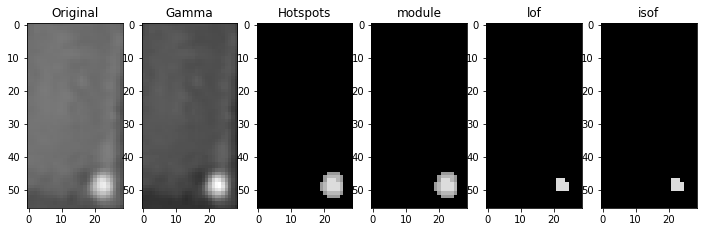

[-1.64279613 -0.99223572 -0.99858384 -1.01333144 -1.06385559 -0.99288679
 -0.98433513 -0.99816239]
[-1.70933596]
[-0.60244154 -0.44493039 -0.44654077 -0.45880473 -0.47706017 -0.43770317
 -0.4307059  -0.454124  ]
[-0.64373438]
0.0 0
737.jpg Normal
[-0.99576126 -1.02238232 -0.98638418 -0.99741949 -1.0121355  -1.02438323
 -1.02238232 -1.01401165]
[-1.70933596]
[-0.47911687 -0.45353703 -0.42495402 -0.44174894 -0.46645185 -0.50420164
 -0.45353703 -0.46542029]
[-0.64373438]
0.0 0
2972.jpg Normal
[-1.03231665 -1.09019752 -1.03761212 -1.51190456 -4.61662981 -1.04682794
 -0.99503373 -1.10677318]
[-1.69492094]
[-0.51418478 -0.56738396 -0.52170718 -0.67615695 -0.75570308 -0.52723049
 -0.45969387 -0.56629574]
[-0.63796838]
58.0 62.97056245803833 0.18380728181081615 0.8840958043089292
0.0 0
2966.jpg Normal
[-1.02329576 -1.01013737 -0.9998073  -1.24502334 -1.02404389 -0.99917569
 -1.00027318 -0.98614575]
[-1.70933596]
[-0.48050978 -0.47470908 -0.47598807 -0.51540916 -0.4642835  -0.46898635
 -0.48070

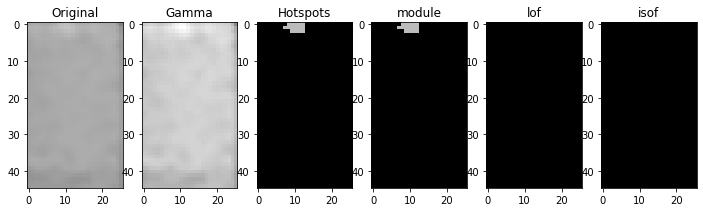

[-1.12867959 -1.39494518 -1.04475115 -1.16110656 -0.99160734 -1.03472668
 -1.28988669 -0.99454403]
[-1.70933596]
[-0.53459492 -0.57469696 -0.46478238 -0.5220452  -0.49948314 -0.53617895
 -0.58326206 -0.43456199]
[-0.64373438]
0.0 0
3338.jpg Normal
[-1.00876291 -1.03854151 -0.98769966 -0.97020089 -1.00508114 -1.01324296
 -2.00783596 -1.01547483]
[-1.94887669]
[-0.43331608 -0.42607126 -0.42052842 -0.41600207 -0.45230047 -0.42641593
 -0.65416017 -0.44427458]
[-0.73955068]
0.0 0
1249.jpg Normal
[-1.42291643 -1.08807697 -2.25667333 -1.00009758 -1.08807697 -1.17816782
 -1.77399163 -1.17816782]
[-1.88410943]
[-0.53478968 -0.48285085 -0.64338093 -0.43714696 -0.48285085 -0.49721309
 -0.65541099 -0.49721309]
[-0.71364377]
0.0 0
905.jpg Normal
[-1.01018812 -1.03102029 -0.98601672 -1.01436343 -1.03125919 -2.17744056
 -0.99466321 -0.97900033]
[-1.94887669]
[-0.44599607 -0.49596428 -0.44304603 -0.46902002 -0.45649631 -0.63604622
 -0.48056371 -0.44401235]
[-0.73955068]
0.0 0
4331.jpg Normal
[-1.03351

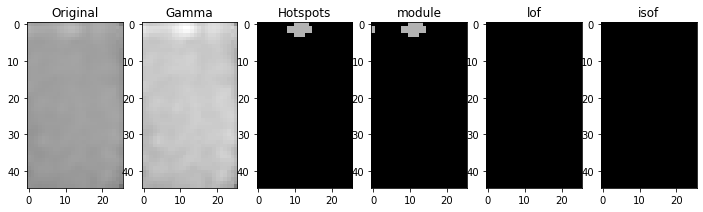

[-1.07814433 -0.98413243 -1.02260758 -1.03300771 -1.01672556 -1.23329677
 -1.02070709 -1.10882943]
[-1.72207615]
[-0.55041931 -0.48655443 -0.47220218 -0.52652843 -0.51325588 -0.59611474
 -0.5181474  -0.54964301]
[-0.64883046]
0.0 0
1936.jpg Normal
[-1.39316196 -1.15538289 -1.39316196 -1.07064557 -1.23357869 -1.09684286
 -1.65807019 -1.06329614]
[-1.94887669]
[-0.63886176 -0.56125471 -0.63886176 -0.48041726 -0.60052276 -0.50752106
 -0.71954998 -0.54297001]
[-0.73955068]
0.0 0
1922.jpg Normal
[-0.98728222 -1.02770195 -1.         -0.98055954 -1.00541464 -0.98101988
 -1.09694677 -1.00541464]
[-1.72690247]
[-0.43841288 -0.4829773  -0.47585321 -0.45217351 -0.4666074  -0.45999319
 -0.50736564 -0.4666074 ]
[-0.65076099]
0.0 0
4682.jpg Normal
[-0.99773752 -1.02030111 -0.97806706 -1.10398832 -1.19621607 -1.00235478
 -0.99219365 -0.99773752]
[-1.82418808]
[-0.5036169  -0.45886486 -0.47850304 -0.50912427 -0.56444668 -0.45581352
 -0.45367037 -0.5036169 ]
[-0.68967523]
0.0 0
2595.jpg Normal
[-0.9903

[-0.59452193 -0.45107488 -0.77590913 -0.55243563 -0.50736564 -0.5144885
 -0.47413311 -0.55403733]
[-0.65076099]
5.5 9.41421353816986 0.7798381254407765 1.0
5.5 9.41421353816986 0.7798381254407765 1.0
0.0 11
1705.jpg Single-Hotspot


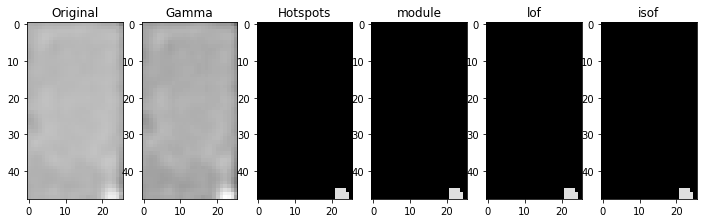

[-0.99029289 -1.         -0.99479348 -1.21549236 -1.02238232 -1.02886558
 -0.99741949 -1.05550204]
[-1.70933596]
[-0.4508583  -0.43440581 -0.49600952 -0.50582536 -0.45353703 -0.47990008
 -0.44174894 -0.48051223]
[-0.64373438]
0.0 0
3112.jpg Normal
[-0.9969407  -1.04330207 -0.98727226 -0.96215398 -1.01636937 -0.9969407
 -1.02030111 -1.47287514]
[-1.82418808]
[-0.43251568 -0.45786184 -0.45864828 -0.44060854 -0.44812708 -0.43251568
 -0.45886486 -0.59313613]
[-0.68967523]
0.0 0
3674.jpg Normal
[-0.95361291 -1.03623733 -1.01643561 -1.07682705 -1.00260932 -1.00328615
 -1.03623733 -0.95357469]
[-1.88410943]
[-0.4570833  -0.45944178 -0.46357132 -0.45110146 -0.45800588 -0.44952362
 -0.45944178 -0.49058868]
[-0.71364377]
0.0 0
1063.jpg Normal
[-1.02070862 -1.05131464 -1.00398253 -1.03282618 -0.95595358 -1.09129138
 -0.99177346 -2.33237882]
[-1.70933596]
[-0.45290417 -0.47748003 -0.43360813 -0.46032736 -0.42677544 -0.49288363
 -0.42327512 -0.66790217]
[-0.64373438]
0.0 0
468.jpg Normal
[-0.988388

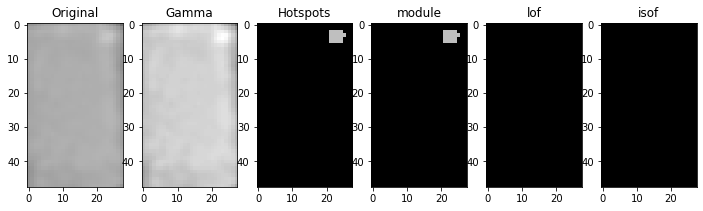

[-0.98774764 -0.98056563 -1.0243486  -1.0273576  -0.9697334  -0.98160687
 -1.01319842 -0.9903432 ]
[-1.78206358]
[-0.43664186 -0.43402218 -0.44823586 -0.43851812 -0.43865374 -0.44253157
 -0.44674481 -0.44469267]
[-0.67282543]
0.0 0
4090.jpg Normal
[-1.02915885 -1.18938418 -0.98257992 -1.05864787 -1.51912102 -1.01898153
 -4.69440891 -0.97379032]
[-1.9128832]
[-0.45150436 -0.4931287  -0.41677305 -0.46973672 -0.55817002 -0.41620491
 -0.78647988 -0.42992236]
[-0.72515328]
0.0 0
454.jpg Normal
[-0.99600415 -0.98450516 -1.29076171 -1.02039245 -0.98074416 -1.01430354
 -0.98450516 -1.09147634]
[-1.69492094]
[-0.47139594 -0.44767175 -0.55467925 -0.45602053 -0.46072625 -0.44510828
 -0.44767175 -0.48354222]
[-0.63796838]
0.0 0
332.jpg Normal
[-0.98438944 -0.99339455 -1.09647447 -0.98871481 -0.97556477 -1.73449756
 -1.01853794 -1.00768792]
[-1.84052542]
[-0.45253622 -0.46742062 -0.52105043 -0.46605962 -0.45385774 -0.58834073
 -0.47722114 -0.46116895]
[-0.69621017]
0.0 0
4906.jpg Normal
[-1.       

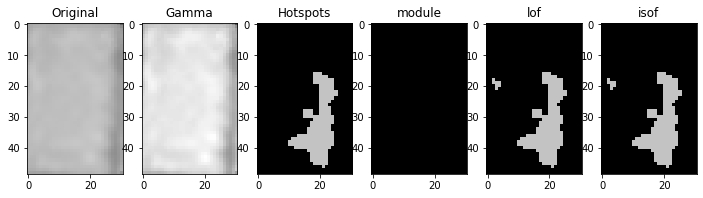

[-1.95746498 -0.99029289 -1.10519295 -1.21549236 -0.98638418 -1.02541931
 -1.         -1.        ]
[-1.70933596]
[-0.629364   -0.4508583  -0.47372455 -0.50582536 -0.42495402 -0.47164606
 -0.42440575 -0.43853965]
[-0.64373438]
0.0 0
4709.jpg Normal
[-0.99691099 -0.98426447 -1.00101415 -1.03107068 -1.00184014 -1.00027318
 -0.99573868 -1.00842002]
[-1.70933596]
[-0.48449177 -0.43298086 -0.49384949 -0.44274862 -0.43973274 -0.48070828
 -0.47136296 -0.4572114 ]
[-0.64373438]
0.0 0
3066.jpg Normal
[-1.23118525 -0.97250068 -1.0061585  -0.98586638 -1.14196893 -1.32634933
 -1.01903107 -1.32634933]
[-1.88410943]
[-0.59032804 -0.42677524 -0.51260413 -0.47199588 -0.54355949 -0.58260116
 -0.48650548 -0.58260116]
[-0.71364377]
0.0 0
3700.jpg Normal
[-0.98655452 -1.06211752 -0.96169882 -0.9944133  -1.07821094 -1.01004687
 -1.00043487 -2.46016202]
[-1.78206358]
[-0.43637657 -0.47050776 -0.42829059 -0.44243165 -0.50865501 -0.44073734
 -0.44204346 -0.64226713]
[-0.67282543]
0.0 0
483.jpg Normal
[-1.05842

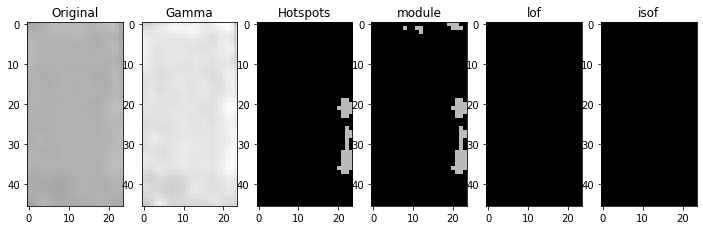

[-1.14790468 -1.06905765 -1.39644318 -1.01876986 -1.12624045 -0.98621554
 -1.35627476 -1.00585896]
[-1.94887669]
[-0.52689165 -0.50471567 -0.60884853 -0.49757515 -0.52519454 -0.43514818
 -0.59606881 -0.44694301]
[-0.73955068]
0.0 0
2191.jpg Normal
[-1.04379728 -1.10233745 -1.02995673 -1.0600247  -1.13798518 -1.01224926
 -1.35461368 -1.05895722]
[-1.88410943]
[-0.53532885 -0.55502789 -0.48153798 -0.50354054 -0.55249831 -0.55541322
 -0.7043737  -0.56834399]
[-0.71364377]
0.0 0
4286.jpg Normal
[-0.99365797 -1.0690639  -0.99170133 -4.35948592 -1.01941786 -1.00878303
 -1.00260646 -0.98749454]
[-1.69492094]
[-0.46186753 -0.45541136 -0.43279666 -0.75417074 -0.4781753  -0.45598883
 -0.43754443 -0.42012486]
[-0.63796838]
0.0 2.0 0.0 1.0
15.0 15.656854152679443 0.7689393938672696 1.0
15.0 15.656854152679443 0.7689393938672696 1.0
23.0 0
4292.jpg Junction-Box-Error


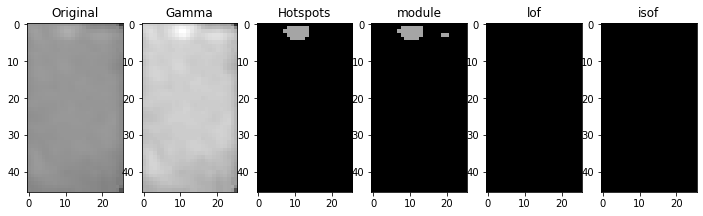

[-0.98917689 -0.99975162 -0.9697334  -1.05473475 -0.99568741 -1.00043487
 -1.3486037  -1.01010206]
[-1.78206358]
[-0.45097351 -0.43181244 -0.43865374 -0.44895908 -0.44109785 -0.44204346
 -0.55839123 -0.44648158]
[-0.67282543]
0.0 0
2185.jpg Normal
[-1.01636676 -0.96259576 -1.21930722 -1.0072542  -0.99440179 -1.05932704
 -0.99440179 -1.02118693]
[-1.94887669]
[-0.44493889 -0.40881058 -0.50924701 -0.44248199 -0.43034836 -0.46679586
 -0.43034836 -0.42705732]
[-0.73955068]
0.0 0
118.jpg Normal
[-0.99297392 -1.26919732 -1.00480357 -1.         -1.0001433  -0.99297392
 -1.04233424 -1.82249186]
[-1.85857924]
[-0.43852611 -0.5427076  -0.44167547 -0.43518203 -0.43381165 -0.43852611
 -0.480515   -0.61128954]
[-0.7034317]
0.0 0
130.jpg Normal
[-0.985325   -1.03192079 -1.00958833 -0.9934341  -1.01859762 -0.99773752
 -1.00146939 -0.9811647 ]
[-1.82418808]
[-0.46811192 -0.45950857 -0.46125369 -0.47162953 -0.46241545 -0.5036169
 -0.45452387 -0.45048155]
[-0.68967523]
0.0 0
656.jpg Normal
[-1.01651148 

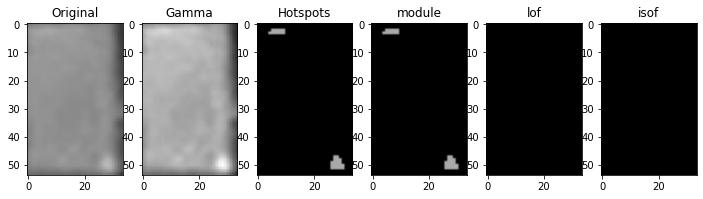

[-1.02005513 -1.04393392 -1.00137434 -1.02005513 -1.06656898 -1.04640484
 -1.00579231 -1.00328615]
[-1.88410943]
[-0.51223847 -0.47322172 -0.46928929 -0.51223847 -0.54734173 -0.52411854
 -0.50323394 -0.44952362]
[-0.71364377]
0.0 0
4523.jpg Normal
[-1.59471066 -1.04309553 -1.41983796 -1.23634593 -1.38454255 -1.18522564
 -1.10177898 -0.97450639]
[-1.70933596]
[-0.65498229 -0.52371151 -0.61076241 -0.5545415  -0.61425065 -0.55828411
 -0.53151912 -0.42662939]
[-0.64373438]
1.5 5.414213538169861 0.6430287075658971 1.0
1.5 10.242640614509583 0.17967069736490698 0.96521492170929
9.0 14.828427076339722 0.5143540952323796 0.9759724309365341
0.0 4.0 0.0 1.0
57.5 72.18376517295837 0.13867515043273412 0.6690965112359134
3.0 8.828427076339722 0.4836870396227584 1.0
12.0 17.313708186149597 0.5030497334464646 0.9654070898885346
2.0 6.828427076339722 0.5390120920947209 1.0
0.0 0.0 0 0
0.0 0.0 0 0
0.0 0.0 0 0
0.0 0.0 0 0
0.0 6.0 0.0 1.0
4.5 8.242640614509583 0.8323186927986581 1.0
0.0 9
2152.jpg Single

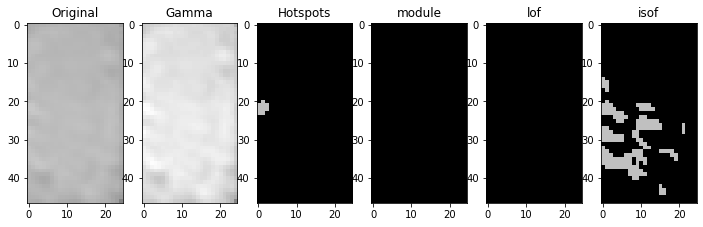

[-1.02733066 -1.49677355 -1.0604899  -0.99960485 -1.12290078 -1.00724629
 -1.14373638 -1.07297885]
[-1.94887669]
[-0.45769489 -0.59105994 -0.47778989 -0.4432116  -0.53302075 -0.45730875
 -0.53470515 -0.49447616]
[-0.73955068]
0.0 0
871.jpg Normal
[-0.98338008 -0.99219365 -1.04129245 -1.01850911 -1.05079166 -0.99982766
 -0.99895856 -1.00146939]
[-1.82418808]
[-0.46092961 -0.45367037 -0.4534588  -0.45545301 -0.46716404 -0.46887192
 -0.45403006 -0.45452387]
[-0.68967523]
0.0 0
31.jpg Normal
[-1.06449269 -1.04984977 -1.02864551 -1.42291643 -1.05784434 -1.06018247
 -1.05215242 -0.96964847]
[-1.88410943]
[-0.51286348 -0.43789096 -0.46275684 -0.53478968 -0.4822948  -0.4473299
 -0.4832689  -0.44800544]
[-0.71364377]
0.0 0
2634.jpg Normal
[-1.0121904  -0.99400764 -1.         -0.98522384 -1.04321328 -1.14373423
 -0.97591012 -0.99625375]
[-1.72690247]
[-0.45123293 -0.45339884 -0.43233441 -0.45544948 -0.47413311 -0.53388478
 -0.44025847 -0.45514284]
[-0.65076099]
0.0 0
4245.jpg Normal
[-1.01540234

[-0.46645185 -0.51536666 -0.4914524  -0.46645185 -0.49948314 -0.46645185
 -0.52371151 -0.43151249]
[-0.64373438]
0.0 0
4550.jpg Normal
[-0.98614575 -1.12536956 -1.07556757 -1.4129587  -0.99250685 -1.03217022
 -1.24502334 -0.99573868]
[-1.70933596]
[-0.47938635 -0.50660284 -0.50166155 -0.58367347 -0.45431598 -0.45525166
 -0.51540916 -0.47136296]
[-0.64373438]
0.0 0
2135.jpg Normal
[-0.98522384 -0.9979798  -1.07016591 -1.         -0.9979798  -0.99634613
 -0.97647392 -1.052522  ]
[-1.72690247]
[-0.45544948 -0.4392856  -0.50029733 -0.45178782 -0.4392856  -0.45797744
 -0.44883503 -0.48953705]
[-0.65076099]
0.0 0
4.jpg Normal
[-0.98028082 -0.99079793 -1.01318242 -0.99433747 -0.98438944 -2.19080455
 -1.02157763 -0.98438944]
[-1.84052542]
[-0.47751316 -0.45043937 -0.48260097 -0.46760474 -0.45253622 -0.63996651
 -0.47424904 -0.45253622]
[-0.69621017]
0.0 0
4544.jpg Normal
[-0.98769966 -0.99836856 -0.99836856 -1.05842834 -1.08487288 -0.98431554
 -1.01010612 -1.01010612]
[-1.94887669]
[-0.4205284

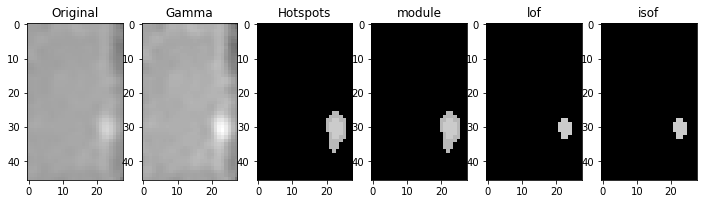

[-0.99492755 -0.96584996 -1.00792956 -0.99177346 -1.28372969 -1.03282618
 -0.96584996 -1.03107068]
[-1.70933596]
[-0.42199604 -0.41936755 -0.43321458 -0.42327512 -0.55256419 -0.46032736
 -0.41936755 -0.44274862]
[-0.64373438]
0.0 0
180.jpg Normal
[-0.9812891  -1.00166419 -1.87588775 -1.00595597 -1.01850911 -0.97683175
 -1.07540228 -0.98846657]
[-1.82418808]
[-0.43519915 -0.44187245 -0.62434429 -0.4648379  -0.45545301 -0.44726291
 -0.50065578 -0.45423425]
[-0.68967523]
0.0 0
1414.jpg Normal
[-1.01589126 -1.13466684 -0.99248677 -0.98215504 -0.97031572 -1.06120766
 -1.00835173 -0.99342362]
[-1.84052542]
[-0.48467258 -0.53798436 -0.44118947 -0.44896358 -0.46988755 -0.50254913
 -0.45726423 -0.48600933]
[-0.69621017]
0.0 0
1400.jpg Normal
[-1.0281094  -1.02738324 -0.99134501 -0.96941358 -1.01726433 -1.01771288
 -1.16258062 -1.01327676]
[-1.72690247]
[-0.4706135  -0.46832874 -0.4435987  -0.44815598 -0.46956989 -0.44075331
 -0.53515872 -0.44815328]
[-0.65076099]
0.0 0
194.jpg Normal
[-0.990730

[-0.45417798 -0.48816928 -0.45544948 -0.42800025 -0.50029733 -0.43958019
 -0.54369286 -0.45339884]
[-0.65076099]
0.0 0
1158.jpg Normal
[-1.         -1.07256752 -0.97195886 -1.24812253 -1.         -1.
 -0.98404502 -0.98790598]
[-1.85857924]
[-0.44026594 -0.4752934  -0.44452674 -0.52344866 -0.44323639 -0.44323639
 -0.45004732 -0.43598516]
[-0.7034317]
0.0 0
4746.jpg Normal
[-0.97710105 -0.96215398 -1.09532851 -0.99024898 -1.00235478 -0.99392898
 -1.03490907 -1.92227785]
[-1.82418808]
[-0.4732583  -0.44060854 -0.53607167 -0.46120789 -0.45581352 -0.46495426
 -0.45467825 -0.61920884]
[-0.68967523]
0.0 0
3029.jpg Normal
[-1.00152308 -1.00676597 -0.9800816  -1.05864787 -1.03846004 -1.04821327
 -1.018032   -1.00548209]
[-1.9128832]
[-0.45426469 -0.42327942 -0.43006855 -0.46973672 -0.49545991 -0.45140166
 -0.47061461 -0.44937251]
[-0.72515328]
0.0 0
2337.jpg Normal
[-0.9639408  -1.01617068 -0.99785758 -0.97497433 -0.99494036 -1.06870428
 -0.97255564 -0.99494036]
[-1.82418808]
[-0.45963769 -0.44

[-0.45759593 -0.4368288  -0.44898182 -0.52110496 -0.47745855 -0.45494986
 -0.44576225 -0.4752934 ]
[-0.7034317]
0.0 0
4961.jpg Normal
[-1.09338858 -0.99217931 -1.14282804 -1.02438323 -0.99029289 -1.07630993
 -1.02438323 -1.02541931]
[-1.70933596]
[-0.54766731 -0.47313975 -0.53690023 -0.50420164 -0.4508583  -0.53310978
 -0.50420164 -0.47164606]
[-0.64373438]
0.0 0
2257.jpg Normal
[-1.02007974 -1.01101127 -2.25062369 -1.00137434 -1.00607831 -1.0061585
 -0.95265376 -1.00137434]
[-1.88410943]
[-0.5337502  -0.47778518 -0.77533072 -0.46928929 -0.50154874 -0.51260413
 -0.43120564 -0.46928929]
[-0.71364377]
0.0 0
3149.jpg Normal
[-1.01986197 -1.03786435 -1.00334989 -0.99002105 -0.95595358 -0.99573868
 -1.00842002 -2.03354157]
[-1.70933596]
[-0.46162766 -0.46153174 -0.46249252 -0.47598106 -0.42677544 -0.47136296
 -0.4572114  -0.63819356]
[-0.64373438]
0.0 0
4626.jpg Normal
[-0.99850534 -1.01161156 -1.00284495 -1.01332038 -0.99313158 -1.83922018
 -0.99089119 -0.96259576]
[-1.94887669]
[-0.423567

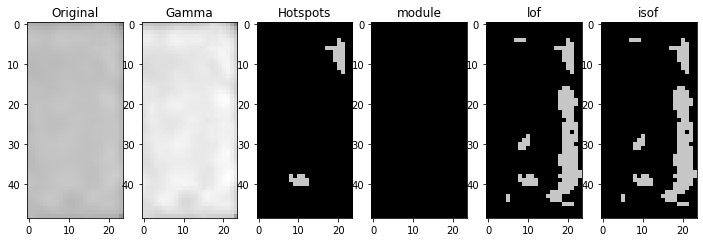

[-1.00260932 -0.98857097 -0.98586638 -1.05965043 -0.95361291 -0.98857097
 -1.02750937 -1.01458849]
[-1.88410943]
[-0.45800588 -0.43928964 -0.47199588 -0.45041069 -0.4570833  -0.43928964
 -0.47063112 -0.47739955]
[-0.71364377]
0.0 0
2243.jpg Normal
[-1.0283584  -1.05872484 -1.00158416 -1.07065463 -1.01941786 -1.03039424
 -0.99385172 -1.        ]
[-1.69492094]
[-0.45861995 -0.55390453 -0.47510371 -0.50096222 -0.4781753  -0.53765003
 -0.42876783 -0.41432861]
[-0.63796838]
0.0 0
4632.jpg Normal
[-1.00684344 -0.96130003 -1.02609387 -1.04872734 -1.00797871 -0.96734271
 -1.01432689 -0.97980415]
[-1.88410943]
[-0.47243248 -0.43437254 -0.42833569 -0.46006268 -0.43237685 -0.45961562
 -0.46571409 -0.41863363]
[-0.71364377]
0.0 0
1762.jpg Normal
[-1.12513025 -0.99134501 -1.17787671 -1.02276484 -0.98262317 -1.83499979
 -1.01463797 -0.99930867]
[-1.72690247]
[-0.50001047 -0.4435987  -0.51883727 -0.49054607 -0.48308659 -0.63662548
 -0.46543237 -0.44517083]
[-0.65076099]
0.0 0
3175.jpg Normal
[-1.4017

[-0.44232278 -0.46288478 -0.46539821 -0.46448637 -0.4387087  -0.48499306
 -0.45483717 -0.48718711]
[-0.69799439]
0.0 0
4342.jpg Normal
[-1.02501307 -0.9969407  -2.65121502 -1.03763932 -0.9969407  -1.02501307
 -0.97683175 -0.98338008]
[-1.82418808]
[-0.45553594 -0.43251568 -0.74403424 -0.48869766 -0.43251568 -0.45553594
 -0.44726291 -0.46092961]
[-0.68967523]
0.0 0
976.jpg Normal
[-1.00565578 -1.00922119 -0.98601672 -1.02321857 -1.0604899  -0.98794247
 -1.04019024 -0.97243853]
[-1.94887669]
[-0.4479044  -0.47258207 -0.44304603 -0.48269278 -0.47778989 -0.44383968
 -0.50139911 -0.44041773]
[-0.73955068]
0.0 0
4424.jpg Normal
[-1.47161865 -0.98666333 -1.00166419 -0.99848557 -1.4313857  -1.1929339
 -0.98372803 -1.15112311]
[-1.82418808]
[-0.57878106 -0.44151147 -0.44187245 -0.47885769 -0.58937172 -0.51096882
 -0.46354435 -0.49954282]
[-0.68967523]
0.0 0
2055.jpg Normal
[-0.99785758 -0.97036013 -1.01617068 -1.01124108 -1.028655   -0.97368699
 -0.96755533 -1.04987457]
[-1.82418808]
[-0.448947

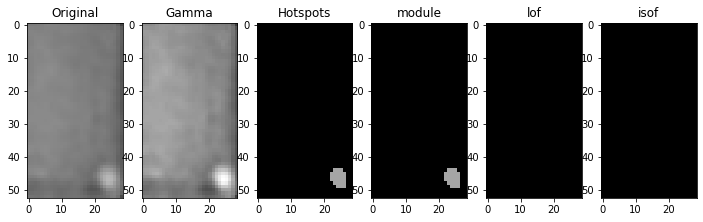

[-1.43495387 -1.20337263 -0.95161115 -0.97364098 -1.3926762  -1.20337263
 -1.04961148 -1.70602835]
[-1.88410943]
[-0.60997171 -0.56331489 -0.417176   -0.45676326 -0.60455706 -0.56331489
 -0.51812507 -0.68196758]
[-0.71364377]
0.0 0
1548.jpg Normal
[-1.         -1.03219999 -1.         -1.00653647 -1.00269898 -0.98838878
 -0.99400764 -1.01379784]
[-1.72690247]
[-0.47585321 -0.47457758 -0.43924506 -0.46402868 -0.44279712 -0.45449856
 -0.45339884 -0.46926364]
[-0.65076099]
0.0 0
962.jpg Normal
[-1.01463797 -0.96898367 -0.9873193  -1.00582199 -1.27789436 -0.97635579
 -1.09089207 -0.9995369 ]
[-1.72690247]
[-0.46543237 -0.46440657 -0.48101668 -0.47078724 -0.55932964 -0.47175802
 -0.49861472 -0.49870606]
[-0.65076099]
0.0 0
5048.jpg Normal
[-1.05682851 -0.99380964 -1.07890129 -1.0206826  -1.04439754 -0.9856584
 -1.03058264 -1.02701046]
[-1.88410943]
[-0.45686327 -0.4431028  -0.5168266  -0.44111319 -0.49500252 -0.41560895
 -0.48131615 -0.46403047]
[-0.71364377]
0.0 0
2727.jpg Normal
[-1.002606

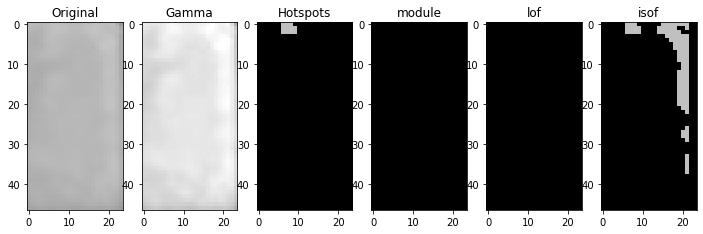

[-0.99038081 -1.00707301 -1.07203536 -1.01856789 -1.02302071 -1.00225976
 -1.01613457 -0.97368699]
[-1.82418808]
[-0.44780078 -0.48281596 -0.48806236 -0.43880609 -0.49876225 -0.4610393
 -0.46975909 -0.44665033]
[-0.68967523]
0.0 0
3363.jpg Normal
[-1.04019024 -1.01436343 -0.97243853 -1.03102029 -1.00951246 -1.14790468
 -0.99409306 -1.01677958]
[-1.94887669]
[-0.50139911 -0.46902002 -0.44041773 -0.49596428 -0.51284992 -0.52689165
 -0.45430803 -0.48665607]
[-0.73955068]
0.0 0
5074.jpg Normal
[-0.99461363 -1.20697317 -1.08858287 -0.99002105 -1.07556757 -1.20697317
 -0.99239884 -1.36586007]
[-1.70933596]
[-0.48384881 -0.52589646 -0.5182046  -0.47598106 -0.50166155 -0.52589646
 -0.49645702 -0.57049231]
[-0.64373438]
0.0 0
3405.jpg Normal
[-0.99982766 -1.06724956 -1.03490907 -1.01850911 -1.06400626 -0.9812891
 -1.04129245 -0.98666333]
[-1.82418808]
[-0.46887192 -0.50062113 -0.45467825 -0.45545301 -0.52197288 -0.43519915
 -0.4534588  -0.44151147]
[-0.68967523]
0.0 2.0 0.0 1.0
2.0 6.8284270763

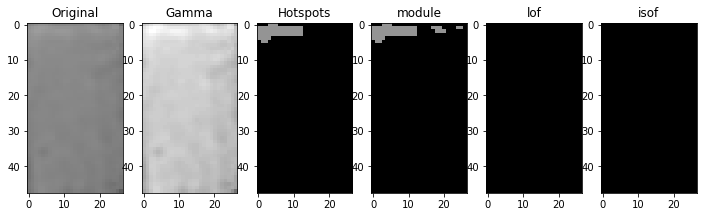

[-0.98106381 -0.98450516 -0.99928901 -1.01228889 -0.98171915 -0.99170133
 -1.09147634 -1.03364548]
[-1.69492094]
[-0.43315026 -0.44767175 -0.43249183 -0.43461211 -0.42235022 -0.43279666
 -0.48354222 -0.44318467]
[-0.63796838]
0.0 0
786.jpg Normal
[-1.         -1.01200892 -1.         -1.         -0.97195886 -1.
 -1.         -1.1688616 ]
[-1.85857924]
[-0.44323639 -0.4368288  -0.45520212 -0.45124981 -0.44452674 -0.45759593
 -0.44831897 -0.50363614]
[-0.7034317]
0.0 0
4381.jpg Normal
[-1.01327676 -1.00357174 -1.02429873 -2.83334561 -1.03598722 -1.00304157
 -1.01327676 -1.00582199]
[-1.72690247]
[-0.44815328 -0.44423781 -0.47139119 -0.78276383 -0.46349555 -0.44038419
 -0.44815328 -0.47078724]
[-0.65076099]
0.0 0
2928.jpg Normal
[-0.95161115 -0.96130003 -1.10221355 -1.81066642 -0.96130003 -1.07481927
 -1.02609387 -1.05473199]
[-1.88410943]
[-0.417176   -0.43437254 -0.49519086 -0.63259935 -0.43437254 -0.48358223
 -0.42833569 -0.45468474]
[-0.71364377]
0.0 0
2096.jpg Normal
[-0.99591798 -0.99

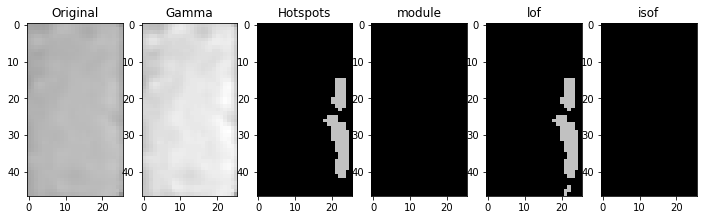

[-0.99165842 -0.98658247 -1.05452535 -1.00649671 -0.98661211 -0.99487219
 -1.12910595 -1.08646559]
[-1.84498598]
[-0.45099738 -0.4393289  -0.47992633 -0.43494773 -0.45540422 -0.45561959
 -0.50427204 -0.49719987]
[-0.69799439]
0.0 0
779.jpg Normal
[-1.00972966 -1.01385028 -0.96491918 -1.00972966 -1.00868462 -0.9774018
 -0.99717153 -1.0008799 ]
[-1.84052542]
[-0.43251624 -0.46940322 -0.43622002 -0.43251624 -0.43464487 -0.45741595
 -0.44321665 -0.45009636]
[-0.69621017]
0.0 0
2914.jpg Normal
[-0.98257992 -1.0080561  -1.34623073 -1.01898153 -0.98575    -0.99107143
 -1.05054203 -0.96826716]
[-1.9128832]
[-0.41677305 -0.43878567 -0.55295657 -0.41620491 -0.42061548 -0.43953907
 -0.48015079 -0.42093605]
[-0.72515328]
0.0 0
751.jpg Normal
[-1.05608426 -1.78472348 -1.0001433  -1.01675474 -1.24080843 -1.38183027
 -1.01181898 -1.13322212]
[-1.85857924]
[-0.46337514 -0.60744122 -0.43381165 -0.46159526 -0.53418556 -0.54370841
 -0.46202707 -0.49966695]
[-0.7034317]
0.0 0
989.jpg Normal
[-0.97756459 -

[-1.0376028  -1.01758592 -1.00449951 -0.98775459 -0.9774018  -1.01275133
 -1.18007251 -1.02933199]
[-1.84052542]
[-0.45815224 -0.45254161 -0.45536008 -0.45815621 -0.45741595 -0.45798856
 -0.52536057 -0.44249922]
[-0.69621017]
0.0 0
1575.jpg Normal
[-0.96775605 -0.98460815 -0.9856584  -1.04948701 -1.01570281 -1.0206826
 -1.04984977 -0.96775605]
[-1.88410943]
[-0.41927406 -0.42546191 -0.41560895 -0.46402519 -0.44509174 -0.44111319
 -0.43789096 -0.41927406]
[-0.71364377]
0.0 0
787.jpg Normal
[-1.05239563 -0.97756459 -0.98522384 -1.06148655 -0.98522384 -1.19665383
 -0.97756459 -1.07992176]
[-1.72690247]
[-0.48895547 -0.4546378  -0.45544948 -0.47279361 -0.45544948 -0.55445482
 -0.4546378  -0.51434261]
[-0.65076099]
0.0 0
1213.jpg Normal
[-1.0001433  -0.98404502 -1.         -1.15474105 -1.24812253 -1.03847583
 -1.         -1.00480357]
[-1.85857924]
[-0.43381165 -0.45004732 -0.44898182 -0.49372182 -0.52344866 -0.47745855
 -0.44696208 -0.44167547]
[-0.7034317]
0.0 0
3404.jpg Normal
[-1.0101373

[-0.44898182 -0.45759593 -0.64757992 -0.45513346 -0.43598516 -0.44576225
 -0.47501274 -0.44452674]
[-0.7034317]
0.0 0
4196.jpg Normal
[-1.22566764 -1.86140047 -2.33467369 -0.97699702 -1.53179948 -0.99261643
 -1.80224132 -2.04732923]
[-1.84498598]
[-0.52408574 -0.63600327 -0.73198999 -0.49617157 -0.5874103  -0.44941093
 -0.61588693 -0.68737275]
[-0.69799439]
3.5 7.414213538169861 0.8001063703614795 1.0
30.5 38.72792184352875 0.2555414277838561 0.7585793978087245
48.5 31.55634891986847 0.6120376004221625 0.9076140714531055
32.0 35.31370830535889 0.3224580264151723 0.915337547837705
0.0 0.0 0 0
25.0 20.485281229019165 0.7486279056871125 0.9739111912819676
3.5 8.242640614509583 0.6473589832878452 1.0
262.5 115.49747359752655 0.24728296686914028 0.818554155360274
30.5 38.72792184352875 0.2555414277838561 0.7585793978087245
0.0 2.0 0.0 1.0
0.0 2.0 0.0 1.0
32.0 35.31370830535889 0.3224580264151723 0.915337547837705
1.5 7.414213538169861 0.34290273015491973 0.9759724309365341
0.0 0.0 0 0
0.0 9

[-0.99751263 -0.9873193  -1.02805381 -0.96941358 -0.98319015 -0.98262317
 -1.02276484 -0.97688323]
[-1.72690247]
[-0.48691804 -0.48101668 -0.46416465 -0.44815598 -0.49459316 -0.48308659
 -0.49054607 -0.43391167]
[-0.65076099]
0.0 0
1950.jpg Normal
[-1.01319935 -1.52251139 -0.9820849  -1.00332355 -1.04414244 -1.15855081
 -1.23994923 -1.04872734]
[-1.88410943]
[-0.46534624 -0.59745638 -0.45915823 -0.4814672  -0.4800672  -0.52840742
 -0.52742709 -0.46006268]
[-0.71364377]
0.0 0
1788.jpg Normal
[-0.97583777 -1.05930853 -1.03463298 -1.0325661  -0.98452956 -1.00976958
 -1.07563695 -1.04414244]
[-1.88410943]
[-0.46075719 -0.48342044 -0.44796231 -0.45685942 -0.46489718 -0.46725959
 -0.46345797 -0.4800672 ]
[-0.71364377]
0.0 0
4828.jpg Normal
[-0.98871481 -1.02720769 -0.98262498 -0.98811359 -1.01439151 -0.98215504
 -0.98438944 -0.98438944]
[-1.84052542]
[-0.46605962 -0.47219982 -0.46496311 -0.47019039 -0.52077744 -0.44896358
 -0.45253622 -0.45253622]
[-0.69621017]
0.0 0
2281.jpg Normal
[-0.9618

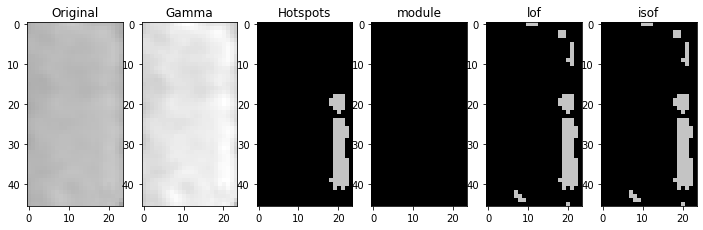

[-1.38183027 -1.04233424 -0.99192352 -1.01181898 -1.18533983 -1.61719171
 -1.13322212 -0.98683811]
[-1.85857924]
[-0.54370841 -0.480515   -0.44828577 -0.46202707 -0.51336142 -0.5920414
 -0.49966695 -0.45462188]
[-0.7034317]
0.0 0
1011.jpg Normal
[-1.00792956 -1.06302551 -1.02070862 -1.3165257  -0.99492755 -1.03958979
 -1.00184014 -1.07797056]
[-1.70933596]
[-0.43321458 -0.47221576 -0.45290417 -0.55112269 -0.42199604 -0.44365919
 -0.43973274 -0.49085315]
[-0.64373438]
0.0 0
585.jpg Normal
[-0.97638391 -1.15961846 -0.96949821 -1.01892602 -1.02679987 -1.51178697
 -1.00009758 -1.01570281]
[-1.88410943]
[-0.42560085 -0.52015412 -0.43700716 -0.45420796 -0.46523549 -0.58289468
 -0.43714696 -0.44509174]
[-0.71364377]
0.0 0
1777.jpg Normal
[-1.31610634 -1.57980462 -1.01018812 -2.7884471  -1.27915792 -1.00724629
 -1.07195537 -1.2180755 ]
[-1.94887669]
[-0.57992479 -0.59638159 -0.44599607 -0.71879856 -0.57756986 -0.45730875
 -0.52719151 -0.55509234]
[-0.73955068]
0.0 0
3160.jpg Normal
[-1.0141276

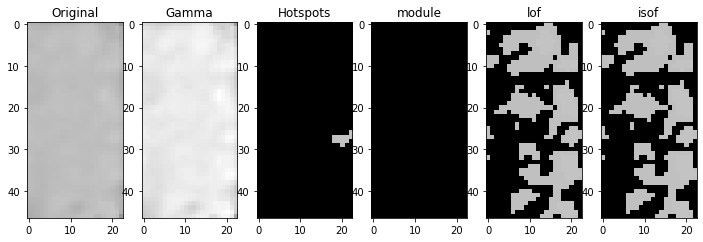

[-1.0249258  -1.0617158  -0.99490117 -0.99261643 -1.027779   -1.08743361
 -0.98973876 -1.17218519]
[-1.84498598]
[-0.48681928 -0.48341201 -0.44717918 -0.44941093 -0.46859273 -0.50196835
 -0.45902173 -0.52599476]
[-0.69799439]
0.0 0
591.jpg Normal
[-0.98736371 -1.07075002 -0.96412516 -1.44811991 -1.02368    -0.9977278
 -0.98819258 -1.03360172]
[-1.81122329]
[-0.43906464 -0.47037627 -0.43588664 -0.54986408 -0.46226176 -0.4498334
 -0.43144976 -0.46857121]
[-0.68448931]
0.0 0
1005.jpg Normal
[-1.53585121 -1.53585121 -2.02141648 -1.39644318 -1.76268462 -1.76268462
 -1.27915792 -1.59137814]
[-1.94887669]
[-0.6432103  -0.6432103  -0.71984413 -0.60884853 -0.67371327 -0.67371327
 -0.57756986 -0.65813292]
[-0.73955068]
1.0 4.828427076339722 0.5390120952601716 1.0
1.0 6.828427076339722 0.26950604604736045 0.9739111912819676
40.0 41.79898953437805 0.28769895814473834 0.8458344007528414
0.5 3.414213538169861 0.5390120920947209 1.0
11.0 40.485281229019165 0.08433507360876416 0.9495697915764972
0.0 2

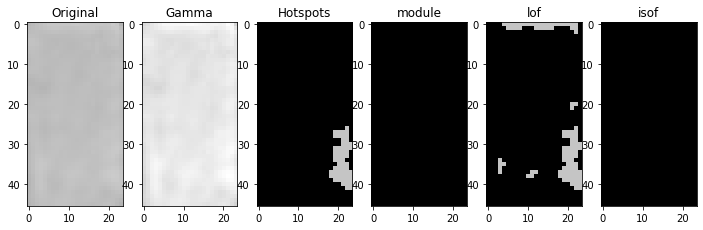

[-1.05914728 -0.97583777 -1.01640898 -1.11767104 -0.95524298 -1.0325661
 -0.95121883 -0.99134985]
[-1.88410943]
[-0.46247371 -0.46075719 -0.44726171 -0.50432858 -0.45239337 -0.45685942
 -0.44464525 -0.47019687]
[-0.71364377]
0.0 0
2524.jpg Normal
[-1.04439754 -1.17816782 -0.96775605 -1.03058264 -1.01456902 -1.03389604
 -0.98973259 -1.06018247]
[-1.88410943]
[-0.49500252 -0.49721309 -0.41927406 -0.48131615 -0.43535263 -0.5516165
 -0.43212244 -0.4473299 ]
[-0.71364377]
0.0 0
4155.jpg Normal
[-1.00561514 -0.99855811 -0.97698296 -1.12479769 -1.00950615 -1.03335215
 -1.0032515  -1.02875782]
[-1.88896714]
[-0.43152329 -0.43537802 -0.45235661 -0.49710311 -0.46995769 -0.45896619
 -0.44636638 -0.44956502]
[-0.71558686]
0.0 0
4633.jpg Normal
[-1.12394725 -1.00878303 -1.03231665 -1.40100691 -1.0730609  -1.02039245
 -1.03761212 -1.20878433]
[-1.69492094]
[-0.56713022 -0.45598883 -0.51418478 -0.64622782 -0.55085768 -0.45602053
 -0.52170718 -0.5762682 ]
[-0.63796838]
0.0 0.0 0 0
1.5 8.24264061450958

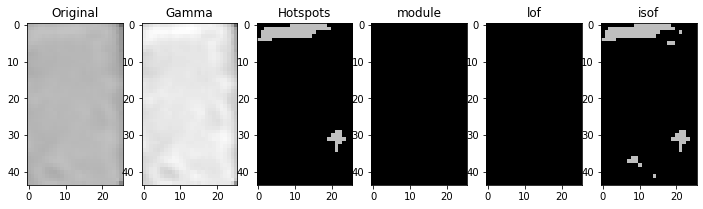

[-1.8064379  -1.18007251 -1.33964828 -1.0516311  -1.33964828 -1.51042497
 -0.9774018  -1.0318382 ]
[-1.84052542]
[-0.67619158 -0.52536057 -0.54746381 -0.47583822 -0.54746381 -0.58793375
 -0.45741595 -0.46446047]
[-0.69621017]
0.0 0
1993.jpg Normal
[-1.07256752 -1.2609319  -1.83186388 -1.16699153 -1.42885383 -1.21239716
 -1.33839001 -1.        ]
[-1.85857924]
[-0.4752934  -0.52608843 -0.6296158  -0.51922332 -0.58323472 -0.53618392
 -0.56199171 -0.45520212]
[-0.7034317]
0.0 0
1987.jpg Normal
[-1.08210258 -0.99138846 -1.04535066 -0.98622912 -1.81044675 -1.06476986
 -1.02609535 -1.04109773]
[-1.84498598]
[-0.45017492 -0.4731579  -0.44875384 -0.42141823 -0.55546603 -0.47949414
 -0.41962983 -0.46942712]
[-0.69799439]
0.0 0
4627.jpg Normal
[-0.99171759 -0.99250685 -1.00792956 -0.99977597 -1.01986197 -1.00334989
 -0.99917569 -1.07556757]
[-1.70933596]
[-0.47080993 -0.45431598 -0.43321458 -0.49213994 -0.46162766 -0.46249252
 -0.46898635 -0.50166155]
[-0.64373438]
0.0 0
3148.jpg Normal
[-1.10444

[-0.47919366 -0.55364774 -0.51216084 -0.4864873  -0.49813699 -0.65626484
 -0.52922946 -0.55826576]
[-0.69621017]
0.0 0
1617.jpg Normal
[-1.04535066 -1.02609535 -1.04673705 -0.98424235 -4.90877035 -1.00901403
 -1.00901403 -0.96186356]
[-1.84498598]
[-0.44875384 -0.41962983 -0.44348184 -0.43170739 -0.78170534 -0.41195969
 -0.41195969 -0.40686726]
[-0.69799439]
0.0 0
1171.jpg Normal
[-1.29006944 -1.01053811 -0.99855811 -1.0758856  -1.02556563 -1.82159188
 -1.34057691 -1.29006944]
[-1.88896714]
[-0.58904699 -0.50795118 -0.43537802 -0.52803444 -0.49485158 -0.67601364
 -0.5444919  -0.58904699]
[-0.71558686]
0.0 0
4009.jpg Normal
[-0.98589307 -0.99165842 -0.98957312 -1.13867544 -0.98881695 -0.95794729
 -0.99165842 -1.0550216 ]
[-1.84498598]
[-0.45771163 -0.4491308  -0.42438507 -0.4912229  -0.4418129  -0.44867082
 -0.4491308  -0.50736359]
[-0.69799439]
0.0 0
3766.jpg Normal
[-0.98171915 -1.01286142 -0.98106381 -0.99520265 -1.00260646 -1.00408778
 -1.00631178 -1.0076771 ]
[-1.69492094]
[-0.4223

[-0.48806236 -0.5108027  -0.52386443 -0.43969117 -0.49457564 -0.43099741
 -0.62184821 -0.43880609]
[-0.68967523]
0.0 0
2108.jpg Normal
[-1.14373423 -1.         -0.99400764 -0.99479076 -0.99400764 -0.99625375
 -1.         -1.06264683]
[-1.72690247]
[-0.53388478 -0.42800025 -0.45339884 -0.4427648  -0.45339884 -0.45514284
 -0.44782111 -0.47327121]
[-0.65076099]
0.0 0
195.jpg Normal
[-1.08858287 -0.99002105 -3.1613209  -0.99250685 -0.98614575 -1.36586007
 -0.99171759 -1.02329576]
[-1.70933596]
[-0.5182046  -0.47598106 -0.74403424 -0.45431598 -0.47938635 -0.57049231
 -0.47080993 -0.48050978]
[-0.64373438]
5.5 9.41421353816986 0.7798381254407765 1.0
5.5 9.41421353816986 0.7798381254407765 1.0
0.0 11
1401.jpg Single-Hotspot


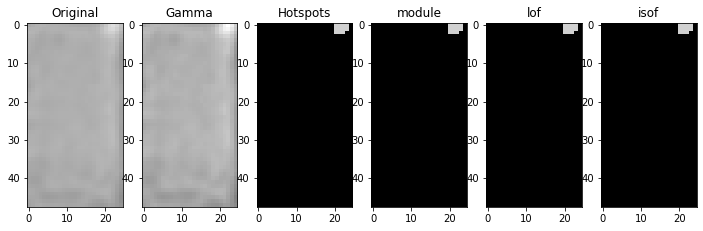

[-1.01152784 -1.01384776 -1.00332355 -1.05612218 -0.95161115 -1.01504488
 -0.9927059  -1.02786137]
[-1.88410943]
[-0.45619008 -0.45669466 -0.4814672  -0.48668813 -0.417176   -0.43899763
 -0.43709941 -0.43952408]
[-0.71364377]
0.0 0
1367.jpg Normal
[-1.01916391 -1.06009724 -3.02805032 -1.01266747 -1.15454775 -1.04395883
 -1.06009724 -1.03835507]
[-1.88896714]
[-0.50374271 -0.51282669 -0.71815773 -0.49879378 -0.56609168 -0.47630163
 -0.51282669 -0.50183353]
[-0.71558686]
0.0 0
5101.jpg Normal
[-1.75738364 -1.05041276 -1.05626424 -2.57998875 -1.3881341  -1.27053494
 -1.03052028 -1.05140269]
[-1.81122329]
[-0.66970122 -0.47274575 -0.53276425 -0.8051122  -0.60667154 -0.54720251
 -0.44564219 -0.4585628 ]
[-0.68448931]
0.0 0
3570.jpg Normal
[-1.03847583 -1.         -1.00960714 -1.         -0.98669288 -1.11603977
 -0.98404502 -1.15199478]
[-1.85857924]
[-0.47745855 -0.44576225 -0.44804865 -0.45759593 -0.45494986 -0.47551517
 -0.45004732 -0.50685214]
[-0.7034317]
0.0 0
5115.jpg Normal
[-1.08532

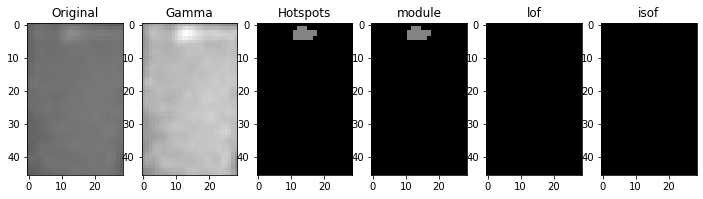

[-1.05682851 -1.02210284 -2.67457579 -0.98973259 -1.11666777 -0.98460815
 -1.01056417 -1.04404642]
[-1.88410943]
[-0.45686327 -0.43451627 -0.71700309 -0.43212244 -0.48999314 -0.42546191
 -0.44259539 -0.45740137]
[-0.71364377]
0.0 0
1373.jpg Normal
[-1.028655   -2.08658741 -1.38663471 -1.05971882 -1.18542761 -0.9808196
 -0.97368699 -0.98156137]
[-1.82418808]
[-0.45236345 -0.62184821 -0.58623605 -0.50430108 -0.49457564 -0.4573974
 -0.44665033 -0.43099741]
[-0.68967523]
0.0 0
1415.jpg Normal
[-0.96335621 -1.03296493 -0.96941358 -0.97688323 -1.01327676 -0.99930867
 -0.99803173 -1.2046693 ]
[-1.72690247]
[-0.43313648 -0.45231498 -0.44815598 -0.43391167 -0.44815328 -0.44517083
 -0.44199236 -0.51421136]
[-0.65076099]
0.0 0
181.jpg Normal
[-0.96416619 -0.99428828 -1.06160991 -1.00901403 -1.06368395 -1.13874872
 -0.99428828 -0.98905767]
[-1.84498598]
[-0.42922448 -0.40646278 -0.44359322 -0.41195969 -0.44130804 -0.48172202
 -0.40646278 -0.43061223]
[-0.69799439]
0.0 0
3202.jpg Normal
[-0.9679280

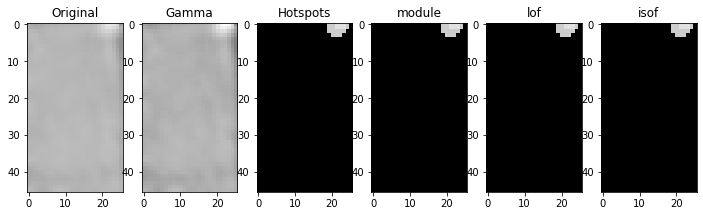

[-1.80224132 -1.06993599 -1.35777114 -1.02667562 -1.57616884 -1.03477078
 -0.97245458 -1.35777114]
[-1.84498598]
[-0.61588693 -0.51820188 -0.55043255 -0.51523457 -0.60118919 -0.46718823
 -0.48481221 -0.55043255]
[-0.69799439]
0.0 0
4223.jpg Normal
[-0.9973053  -1.46858414 -1.01859505 -2.83781093 -1.10255573 -0.99902251
 -1.85947885 -5.79911228]
[-1.81122329]
[-0.45947518 -0.56453232 -0.48818079 -0.68662482 -0.51208342 -0.45984456
 -0.65542079 -0.8407497 ]
[-0.68448931]
0.0 0
817.jpg Normal
[-1.         -0.99381582 -1.30771885 -0.98892237 -0.99337026 -1.
 -1.         -1.00269898]
[-1.72690247]
[-0.45417798 -0.45020901 -0.542758   -0.44380253 -0.45874144 -0.42800025
 -0.42800025 -0.44279712]
[-0.65076099]
0.0 0
57.jpg Normal
[-0.98794247 -0.97900033 -1.00724629 -1.02733066 -1.         -0.98601672
 -1.07930477 -0.97254005]
[-1.94887669]
[-0.44383968 -0.44401235 -0.45730875 -0.45769489 -0.43726193 -0.44304603
 -0.48934699 -0.4395217 ]
[-0.73955068]
0.0 0
803.jpg Normal
[-0.96335621 -1.1297

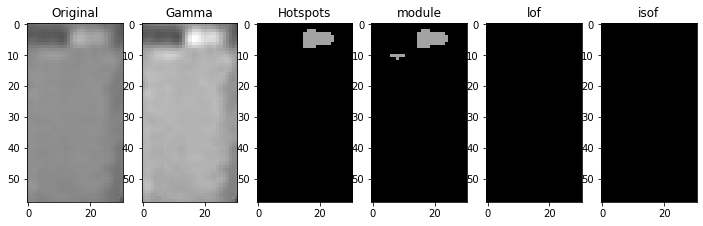

[-1.00449951 -1.03437871 -0.94200865 -1.01473109 -1.01275133 -1.0318382
 -1.01275133 -1.0095001 ]
[-1.84052542]
[-0.45536008 -0.45323021 -0.4591364  -0.44717292 -0.45798856 -0.46446047
 -0.45798856 -0.47206952]
[-0.69621017]
0.0 0
197.jpg Normal
[-0.97040276 -0.96093689 -1.02924878 -0.95978766 -1.01291035 -0.96966434
 -1.00967044 -1.00989684]
[-1.84498598]
[-0.46949721 -0.45337454 -0.45190998 -0.46338199 -0.47396766 -0.46814702
 -0.49526543 -0.45713765]
[-0.69799439]
0.0 0
3214.jpg Normal
[-1.00334989 -1.3165257  -0.98426447 -0.98188144 -0.99492755 -1.02404389
 -1.03282618 -1.01986197]
[-1.70933596]
[-0.46249252 -0.55112269 -0.43298086 -0.47405691 -0.42199604 -0.4642835
 -0.46032736 -0.46162766]
[-0.64373438]
0.0 0
3200.jpg Normal
[-0.99581415 -0.99141102 -1.01448989 -0.96412516 -0.98009397 -1.01448989
 -0.98126389 -0.97838007]
[-1.81122329]
[-0.42607623 -0.45459385 -0.44221155 -0.43588664 -0.46185677 -0.44221155
 -0.43154573 -0.45265817]
[-0.68448931]
0.0 0
183.jpg Normal
[-1.54864339

[-0.4610393  -0.47249658 -0.49876225 -0.45963769 -0.48129037 -0.4610393
 -0.44524219 -0.55691625]
[-0.68967523]
9.0 13.656854152679443 0.606388603606561 0.9685080207575992
9.0 13.656854152679443 0.606388603606561 0.9685080207575992
16.0 0
4989.jpg Junction-Box-Error


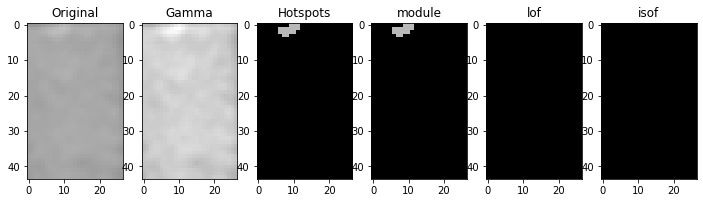

[-0.98905767 -0.99428828 -1.34825826 -1.08210258 -1.03518371 -0.98784556
 -0.99428828 -0.96186356]
[-1.84498598]
[-0.43061223 -0.40646278 -0.56298082 -0.45017492 -0.45259607 -0.43237165
 -0.40646278 -0.40686726]
[-0.69799439]
0.0 0
2320.jpg Normal
[-1.05608426 -1.01181898 -1.05608426 -1.20351638 -1.01181898 -1.02981757
 -0.97880483 -1.07902951]
[-1.85857924]
[-0.46337514 -0.46202707 -0.46337514 -0.52306315 -0.46202707 -0.47872245
 -0.44850131 -0.479038  ]
[-0.7034317]
0.0 0
1629.jpg Normal
[-1.01999423 -0.97109171 -1.00077437 -0.99866402 -1.01249975 -0.98312563
 -0.99715438 -1.01592541]
[-1.86224249]
[-0.45991141 -0.48900868 -0.42990687 -0.5212862  -0.46850014 -0.50665149
 -0.44550137 -0.49709885]
[-0.704897]
0.0 0
4779.jpg Normal
[-1.02649993 -0.99917569 -0.99977597 -1.01986197 -1.15911467 -0.99250685
 -0.99573868 -1.02404389]
[-1.70933596]
[-0.45395234 -0.46898635 -0.49213994 -0.46162766 -0.52370602 -0.45431598
 -0.47136296 -0.4642835 ]
[-0.64373438]
0.0 0
3016.jpg Normal
[-1.5761688

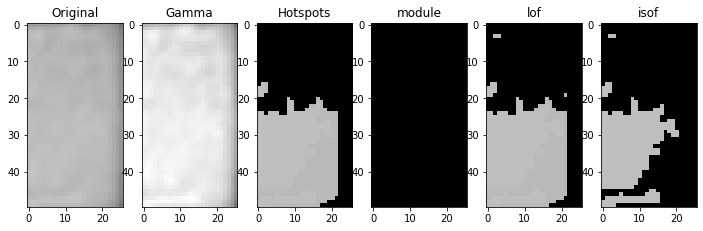

[-0.97915438 -1.02119495 -1.07863598 -1.0050123  -0.99960485 -1.27291884
 -0.99776136 -0.98621554]
[-1.94887669]
[-0.44277007 -0.4589991  -0.48212765 -0.43524056 -0.4432116  -0.52976917
 -0.43537607 -0.43514818]
[-0.73955068]
0.0 0
1167.jpg Normal
[-1.01771288 -0.99192541 -1.00304157 -0.96335621 -1.12735782 -1.0417971
 -0.99617701 -1.01327676]
[-1.72690247]
[-0.44075331 -0.45484477 -0.44038419 -0.43313648 -0.50890999 -0.45623572
 -0.44201922 -0.44815328]
[-0.65076099]
0.0 0
3770.jpg Normal
[-1.02215034 -0.99130986 -1.02962921 -0.98819258 -2.39612379 -0.99788638
 -0.9992785  -0.9824061 ]
[-1.81122329]
[-0.44941506 -0.449836   -0.46189211 -0.43144976 -0.70830228 -0.45235121
 -0.42532484 -0.44743104]
[-0.68448931]
0.0 0
3764.jpg Normal
[-1.03776226 -0.99955895 -1.07402069 -1.34057691 -0.99001836 -1.0336786
 -1.03111077 -1.02126622]
[-1.88896714]
[-0.46844472 -0.45161183 -0.50750639 -0.5444919  -0.45683489 -0.48294944
 -0.47131093 -0.45458968]
[-0.71558686]
0.0 0
1173.jpg Normal
[-1.223629

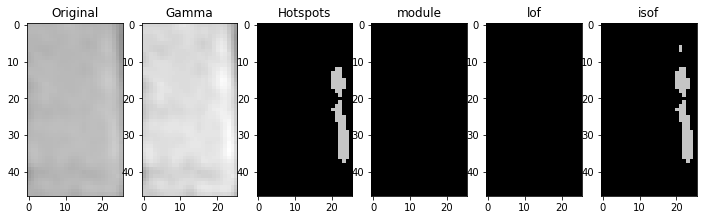

[-1.09306924 -0.99428828 -0.96416619 -1.00901403 -0.96186356 -1.00480172
 -1.04673705 -0.98622912]
[-1.84498598]
[-0.50099014 -0.40646278 -0.42922448 -0.41195969 -0.40686726 -0.44885153
 -0.44348184 -0.42141823]
[-0.69799439]
0.0 0
381.jpg Normal
[-1.11427495 -1.0040692  -1.00898517 -1.19175891 -1.00898517 -1.04667145
 -1.06993599 -0.97245458]
[-1.84498598]
[-0.53132045 -0.47726699 -0.49106416 -0.54220889 -0.49106416 -0.51203579
 -0.51820188 -0.48481221]
[-0.69799439]
0.0 0
3002.jpg Normal
[-0.99415953 -0.99177804 -1.06102141 -1.00384347 -0.97657631 -1.00174703
 -0.99646209 -1.00384347]
[-1.82418808]
[-0.48374164 -0.47781039 -0.49629704 -0.48077082 -0.48856723 -0.50733028
 -0.47789302 -0.48077082]
[-0.68967523]
0.0 0
4786.jpg Normal
[-0.97638391 -1.03142145 -1.34255238 -0.97724905 -0.98973259 -1.01208757
 -0.9856584  -1.01456902]
[-1.88410943]
[-0.42560085 -0.45170322 -0.54823555 -0.42086363 -0.43212244 -0.46681175
 -0.41560895 -0.43535263]
[-0.71364377]
0.0 0
1826.jpg Normal
[-1.02535

[-0.96584996 -1.00398253 -1.03107068 -1.05131464 -1.00792956 -0.99257804
 -1.05189227 -0.99177346]
[-1.70933596]
[-0.41936755 -0.43360813 -0.44274862 -0.47748003 -0.43321458 -0.45836084
 -0.46895015 -0.42327512]
[-0.64373438]
0.0 0
2532.jpg Normal
[-1.09506648 -1.09506648 -0.97035699 -0.98551405 -1.0081761  -1.00349938
 -1.00841237 -0.98947047]
[-1.81122329]
[-0.44800935 -0.44800935 -0.41205714 -0.44706479 -0.44765635 -0.41343729
 -0.45964041 -0.41613085]
[-0.68448931]
0.0 0
2254.jpg Normal
[-0.99419426 -1.00181051 -1.05414445 -0.99464053 -0.99790056 -1.03877787
 -0.96285513 -0.99710422]
[-1.81122329]
[-0.42649491 -0.46303873 -0.41572171 -0.46456281 -0.4377656  -0.44017053
 -0.42770779 -0.43139849]
[-0.68448931]
0.0 0
4625.jpg Normal
[-1.00480357 -0.99632006 -1.         -1.34650778 -1.01675474 -1.
 -0.97189764 -1.01200892]
[-1.85857924]
[-0.44167547 -0.43908315 -0.44026594 -0.5480677  -0.46159526 -0.43518203
 -0.43182709 -0.4368288 ]
[-0.7034317]
0.0 0
1985.jpg Normal
[-1.02146461 -0.9

[-0.97364559 -1.11204494 -0.96416619 -1.06812986 -0.96093689 -1.00989684
 -1.03143922 -0.97214576]
[-1.84498598]
[-0.45841877 -0.45038738 -0.42922448 -0.49082275 -0.45337454 -0.45713765
 -0.47635508 -0.45428911]
[-0.69799439]
0.0 0
1952.jpg Normal
[-0.98907384 -1.01701337 -0.99064109 -1.05270719 -1.00734289 -1.02515353
 -1.05558154 -0.98907384]
[-1.82418808]
[-0.42488532 -0.47348105 -0.44901072 -0.47244214 -0.43541259 -0.47657867
 -0.45679669 -0.42488532]
[-0.68967523]
0.0 0
578.jpg Normal
[-1.04805255 -0.97665841 -0.950136   -1.04569344 -1.01925837 -0.99913616
 -1.08061415 -1.0085034 ]
[-1.80505583]
[-0.46324707 -0.41416924 -0.45617783 -0.42310963 -0.43055831 -0.4686697
 -0.46820617 -0.44774178]
[-0.68202233]
0.0 0
3823.jpg Normal
[-1.00725535 -1.00713634 -0.97109171 -0.992097   -1.05689886 -1.015125
 -1.39544656 -1.1424679 ]
[-1.86224249]
[-0.50229214 -0.45892825 -0.48900868 -0.43575302 -0.50143561 -0.52167941
 -0.60711995 -0.54234349]
[-0.704897]
0.0 0
4194.jpg Normal
[-1.32007622 -

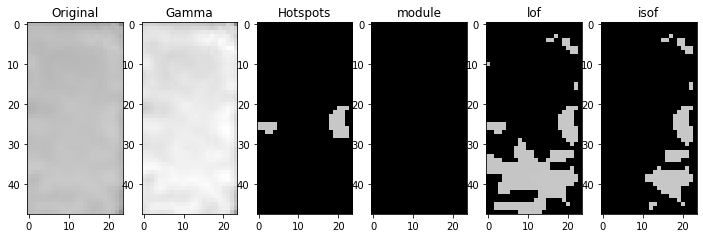

[-1.00797871 -1.00777272 -1.01504488 -1.00987932 -1.0449538  -1.04414244
 -1.02786137 -1.05914728]
[-1.88410943]
[-0.43237685 -0.46884787 -0.43899763 -0.44525861 -0.46941372 -0.4800672
 -0.43952408 -0.46247371]
[-0.71364377]
0.0 0
3189.jpg Normal
[-0.97364559 -1.00989684 -1.11778503 -0.96093689 -1.12833475 -1.05510696
 -0.97420252 -1.00373612]
[-1.84498598]
[-0.45841877 -0.45713765 -0.4458025  -0.45337454 -0.50491652 -0.46113076
 -0.45975784 -0.45297213]
[-0.69799439]
0.0 0
2297.jpg Normal
[-1.31814414 -0.97936909 -1.01669813 -1.04687886 -1.05041276 -0.96285513
 -0.98744311 -1.03110118]
[-1.81122329]
[-0.58243691 -0.42837117 -0.46684718 -0.43326562 -0.47274575 -0.42770779
 -0.4127563  -0.5292989 ]
[-0.68448931]
0.0 0
222.jpg Normal
[-0.98188144 -1.03958979 -0.99461363 -1.00334989 -1.03106189 -1.0168051
 -1.00873719 -1.03107068]
[-1.70933596]
[-0.47405691 -0.44365919 -0.48384881 -0.46249252 -0.47404685 -0.44770544
 -0.49199186 -0.44274862]
[-0.64373438]
0.0 0
4816.jpg Normal
[-1.0126741

[-1.01053811 -1.18353935 -1.0494502  -1.63597198 -1.25203271 -0.99926929
 -1.02402706 -1.06009724]
[-1.88896714]
[-0.50795118 -0.58075722 -0.51156951 -0.63982941 -0.5825711  -0.46099797
 -0.48817903 -0.51282669]
[-0.71558686]
0.0 0
4427.jpg Normal
[-1.39544656 -1.09767869 -1.05689886 -1.68616459 -1.00725535 -1.015125
 -1.18010214 -1.22630152]
[-1.86224249]
[-0.60711995 -0.52192118 -0.50143561 -0.69799047 -0.50229214 -0.52167941
 -0.56175251 -0.56662635]
[-0.704897]
0.0 0
3348.jpg Normal
[-1.07343061 -0.96105887 -0.97562436 -1.0293918  -1.0556348  -1.07909685
 -1.01215425 -0.96105887]
[-1.81122329]
[-0.52577962 -0.41587208 -0.44085743 -0.42788433 -0.48562781 -0.47112049
 -0.4572384  -0.41587208]
[-0.68448931]
0.0 0
2056.jpg Normal
[-1.03125919 -0.99508838 -0.98621554 -0.99073073 -1.00724629 -0.98601672
 -1.0604899  -1.        ]
[-1.94887669]
[-0.45649631 -0.44983428 -0.43514818 -0.44989075 -0.45730875 -0.44304603
 -0.47778989 -0.45412958]
[-0.73955068]
0.0 0
2730.jpg Normal
[-1.        

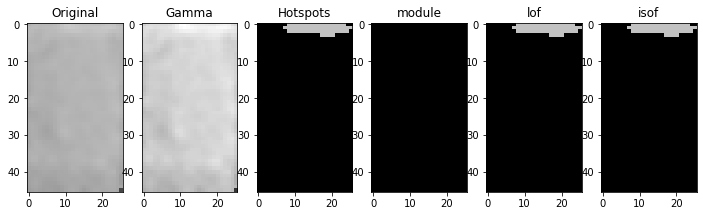

[-2.10490474 -1.01306965 -1.04248036 -1.00544197 -1.02469614 -0.99771016
 -0.99717153 -1.4095173 ]
[-1.84052542]
[-0.6018338  -0.44013862 -0.45404527 -0.43066379 -0.44173767 -0.46325063
 -0.44321665 -0.52992752]
[-0.69621017]
0.0 0
1211.jpg Normal
[-0.99855811 -0.96809883 -1.03736312 -1.01215057 -1.01409139 -1.00145855
 -1.05940619 -1.00561514]
[-1.88896714]
[-0.43537802 -0.4217231  -0.4689935  -0.43114412 -0.45197962 -0.43386536
 -0.50943812 -0.43152329]
[-0.71558686]
0.0 0
785.jpg Normal
[-1.0333013  -0.9927059  -0.96734271 -1.00843413 -1.02609387 -2.98635235
 -1.00797871 -0.97980415]
[-1.88410943]
[-0.44677182 -0.43709941 -0.45961562 -0.45020239 -0.42833569 -0.68464919
 -0.43237685 -0.41863363]
[-0.71364377]
0.0 0
1577.jpg Normal
[-1.16747331 -1.00784376 -1.03472486 -1.16747331 -1.33297997 -1.07645223
 -1.02080459 -1.01794261]
[-1.81122329]
[-0.55779715 -0.51740794 -0.51319433 -0.55779715 -0.60237779 -0.5052578
 -0.44944376 -0.52256401]
[-0.68448931]
0.0 0
3360.jpg Normal
[-1.181155

[-1.60110794 -1.07797056 -1.03786435 -1.09129138 -1.00295267 -1.0352094
 -1.06302551 -1.02070862]
[-1.70933596]
[-0.58717635 -0.49085315 -0.46153174 -0.49288363 -0.44405731 -0.44427854
 -0.47221576 -0.45290417]
[-0.64373438]
0.0 0
1588.jpg Normal
[-2.08993907 -1.04584222 -1.31610634 -1.48386855 -1.24623202 -0.99466321
 -1.48386855 -1.76268462]
[-1.94887669]
[-0.72767904 -0.51980938 -0.57992479 -0.62529258 -0.56991487 -0.48056371
 -0.62529258 -0.67371327]
[-0.73955068]
1.5 5.414213538169861 0.6430287075658971 1.0
2.0 8.828427076339722 0.3224580264151723 0.951284485472469
66.0 60.14213538169861 0.22929580627035348 0.8897392984611538
0.0 2.0 0.0 1.0
0.0 0.0 0 0
0.0 0
2081.jpg Normal
[-0.98115037 -1.0090107  -1.45261439 -1.00544197 -1.02715272 -1.00544197
 -1.00868462 -1.0394777 ]
[-1.84052542]
[-0.44888249 -0.43317236 -0.54695008 -0.43066379 -0.4521723  -0.43066379
 -0.43464487 -0.45614633]
[-0.69621017]
0.0 0
2095.jpg Normal
[-1.0204441  -1.01073309 -1.04955305 -1.03364114 -1.01565201 -0

[-1.08565118 -1.         -0.98669288 -0.98533047 -1.         -1.
 -1.         -0.97739858]
[-1.85857924]
[-0.48073981 -0.44528217 -0.45494986 -0.44366162 -0.45858834 -0.44898182
 -0.44788777 -0.46281399]
[-0.7034317]
0.0 0
4397.jpg Normal
[-1.05689886 -0.96954072 -1.02574884 -0.99715438 -1.60159208 -0.97109171
 -0.96796814 -1.05689886]
[-1.86224249]
[-0.50143561 -0.42994426 -0.47252291 -0.44550137 -0.66193708 -0.48900868
 -0.48258619 -0.50143561]
[-0.704897]
0.0 0
2080.jpg Normal
[-1.0932241  -1.5635555  -1.23668942 -1.02549247 -1.41554903 -1.41554903
 -0.96751493 -1.23668942]
[-1.84052542]
[-0.49726037 -0.60586591 -0.53027104 -0.45086185 -0.55393689 -0.55393689
 -0.44441523 -0.53027104]
[-0.69621017]
0.0 0
1589.jpg Normal
[-1.14340772 -1.05155074 -1.10531511 -1.01152784 -1.11106507 -0.96256522
 -1.05612218 -1.01250045]
[-1.88410943]
[-0.54143756 -0.46122887 -0.48426846 -0.45619008 -0.49055631 -0.44245945
 -0.48668813 -0.493808  ]
[-0.71364377]
0.0 0
1562.jpg Normal
[-1.02013788 -1.007

[-0.50013701 -0.42169376 -0.45396199 -0.46791498 -0.44758969 -0.59412874
 -0.43952377 -0.41613085]
[-0.68448931]
0.0 0
4817.jpg Normal
[-1.00734289 -1.01701337 -0.99064109 -0.99231778 -3.23027962 -1.05270719
 -0.98717418 -0.96078442]
[-1.82418808]
[-0.43541259 -0.47348105 -0.44901072 -0.44167353 -0.70750099 -0.47244214
 -0.42385576 -0.42452798]
[-0.68967523]
0.0 0
223.jpg Normal
[-1.04650736 -1.04569344 -1.02202893 -0.99649399 -1.01925837 -1.0100968
 -0.96147219 -0.99649399]
[-1.80505583]
[-0.45639933 -0.42310963 -0.43702446 -0.41367949 -0.43055831 -0.4442558
 -0.42731073 -0.41367949]
[-0.68202233]
0.0 0
545.jpg Normal
[-1.00418808 -0.96898367 -1.0063052  -0.96941358 -0.99343637 -0.96941358
 -1.02276484 -1.02805381]
[-1.72690247]
[-0.46517832 -0.46440657 -0.44620694 -0.44815598 -0.4684491  -0.44815598
 -0.49054607 -0.46416465]
[-0.65076099]
0.0 0
4181.jpg Normal
[-1.41554903 -0.99443366 -1.01473109 -1.10456278 -1.10456278 -1.37570113
 -1.62048106 -1.41554903]
[-1.84052542]
[-0.55393689

[-0.45975784 -0.48147128 -0.4458025  -0.47919849 -0.40646278 -0.49082275
 -0.46814702 -0.46338199]
[-0.69799439]
0.0 0
2527.jpg Normal
[-1.07863598 -1.00565578 -0.99960485 -1.01483059 -1.01483059 -1.03125919
 -1.23786658 -0.99739725]
[-1.94887669]
[-0.48212765 -0.4479044  -0.4432116  -0.46322324 -0.46322324 -0.45649631
 -0.52830814 -0.44581803]
[-0.73955068]
0.0 0
3639.jpg Normal
[-1.00012543 -0.99956437 -0.99079983 -1.0114923  -1.66291988 -0.99529375
 -0.97197647 -1.00012543]
[-1.80505583]
[-0.4581926  -0.45898752 -0.45873579 -0.47582397 -0.60401042 -0.49737876
 -0.43301518 -0.4581926 ]
[-0.68202233]
0.0 0
4156.jpg Normal
[-0.97327148 -1.96694413 -0.98115037 -1.4095173  -1.07927511 -5.37317764
 -0.99771016 -1.00972966]
[-1.84052542]
[-0.46255363 -0.5695003  -0.44888249 -0.52992752 -0.48117889 -0.77748564
 -0.46325063 -0.43251624]
[-0.69621017]
0.0 0
425.jpg Normal
[-0.94904599 -0.99208777 -1.00434893 -0.98241054 -0.96157606 -1.19284765
 -0.94904599 -1.00184745]
[-1.80505583]
[-0.41621

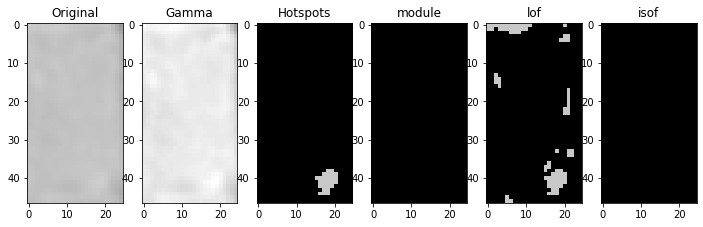

[-1.12513025 -0.98374756 -1.21025271 -1.01463797 -1.16016811 -1.33652041
 -0.96335621 -1.12513025]
[-1.72690247]
[-0.50001047 -0.48855676 -0.54016945 -0.46543237 -0.53960636 -0.54564698
 -0.43313648 -0.50001047]
[-0.65076099]
0.0 0
3003.jpg Normal
[-0.97804834 -1.02271478 -1.03519232 -0.99208777 -1.00313259 -0.99349467
 -1.01016317 -0.99821774]
[-1.80505583]
[-0.40319564 -0.42998076 -0.46196974 -0.42096533 -0.42726241 -0.42497645
 -0.45481816 -0.4247276 ]
[-0.68202233]
0.0 0
380.jpg Normal
[-1.00244565 -1.03562964 -1.00107779 -1.1181115  -1.00303854 -0.96241666
 -1.03035135 -1.00706985]
[-1.80144609]
[-0.41800396 -0.45168471 -0.42487682 -0.49192612 -0.43789717 -0.42550056
 -0.45220411 -0.4328235 ]
[-0.68057844]
0.0 0
1614.jpg Normal
[-0.97838007 -1.01737471 -1.29512959 -1.05840052 -1.02049496 -0.99581415
 -0.98819258 -0.99141102]
[-1.81122329]
[-0.45265817 -0.46329118 -0.51644755 -0.46780884 -0.4795466  -0.42607623
 -0.43144976 -0.45459385]
[-0.68448931]
0.0 0
1600.jpg Normal
[-0.98987

[-1.00734289 -1.01294403 -0.98717418 -0.99231778 -1.05567852 -1.02245009
 -1.03822306 -1.0000491 ]
[-1.82418808]
[-0.43541259 -0.46147227 -0.42385576 -0.44167353 -0.47912098 -0.45083788
 -0.48349851 -0.44003752]
[-0.68967523]
0.0 0
1166.jpg Normal
[-2.19178662 -1.15316234 -1.10394708 -1.57811681 -1.         -1.89292601
 -4.54381866 -1.2609319 ]
[-1.85857924]
[-0.70440312 -0.51227777 -0.47792922 -0.60588272 -0.44026594 -0.64399976
 -0.76479348 -0.52608843]
[-0.7034317]
783.5 145.982754945755 0.462004019797051 0.7765393916396844
783.5 145.982754945755 0.462004019797051 0.7765393916396844
165.0 680
4036.jpg Module-Anomaly


[-1.01758592 -1.02469614 -0.96491918 -1.02549247 -1.25488287 -0.99196989
 -1.01473109 -3.57937813]
[-1.84052542]
[-0.45254161 -0.44173767 -0.43622002 -0.45086185 -0.53032605 -0.44462326
 -0.44717292 -0.71606352]
[-0.69621017]
0.0 0
3759.jpg Normal
[-0.96763989 -1.04868501 -0.99001836 -2.17263254 -1.00145855 -0.98738009
 -1.41295201 -1.12479769]
[-1.88896714]
[-0.44555807 -0.49208651 -0.45683489 -0.63757451 -0.43386536 -0.45318867
 -0.56336086 -0.49710311]
[-0.71558686]
0.0 0
2447.jpg Normal
[-1.01152784 -1.0325661  -1.01504488 -1.0449538  -1.00963125 -1.07481927
 -1.05930853 -1.07563695]
[-1.88410943]
[-0.45619008 -0.45685942 -0.43899763 -0.46941372 -0.44932374 -0.48358223
 -0.48342044 -0.46345797]
[-0.71364377]
0.0 0
3981.jpg Normal
[-1.09117282 -1.00666953 -1.07307638 -1.11570492 -1.02623466 -1.00548202
 -0.98407115 -0.99909381]
[-1.80505583]
[-0.47320341 -0.44950766 -0.50111718 -0.47553382 -0.44872046 -0.42950938
 -0.46287141 -0.47120448]
[-0.68202233]
0.0 0
1628.jpg Normal
[-0.9975

[-0.43251624 -0.46255363 -0.43622002 -0.43251624 -0.55384968 -0.45404527
 -0.44321665 -0.42259811]
[-0.69621017]
0.0 0
828.jpg Normal
[-1.21025271 -0.9995369  -0.99134501 -1.14847699 -1.07712515 -1.00249446
 -1.04276319 -1.02222913]
[-1.72690247]
[-0.54016945 -0.49870606 -0.4435987  -0.52672509 -0.48816256 -0.47831
 -0.48776527 -0.47788878]
[-0.65076099]
0.0 0
1364.jpg Normal
[-1.02583467 -1.33438571 -1.00328901 -1.04174113 -0.9752901  -0.96819097
 -1.26431703 -1.00066895]
[-1.86224249]
[-0.44928585 -0.53133599 -0.4693106  -0.47430503 -0.41106558 -0.42324135
 -0.54467894 -0.44517776]
[-0.704897]
0.0 0
68.jpg Normal
[-0.99181562 -1.00898517 -0.96802028 -1.11427495 -1.00429642 -1.0275481
 -0.97245458 -1.0040692 ]
[-1.84498598]
[-0.44232278 -0.49106416 -0.47030243 -0.53132045 -0.48499306 -0.45491402
 -0.48481221 -0.47726699]
[-0.69799439]
0.0 0
5102.jpg Normal
[-1.14228899 -1.05392472 -1.00784376 -0.97838007 -1.5601723  -0.99739451
 -1.16747331 -1.07645223]
[-1.81122329]
[-0.54607989 -0.5

[-1.00092652 -1.0903118  -1.16521226 -1.56510106 -1.01068529 -1.00523411
 -3.22130601 -1.26803536]
[-1.80505583]
[-0.47354392 -0.53187783 -0.54131227 -0.57644638 -0.47142838 -0.49551023
 -0.75096484 -0.54707899]
[-0.68202233]
0.0 0
800.jpg Normal
[-1.1029421  -1.04569344 -1.50427956 -0.9821351  -0.97665841 -0.93392659
 -1.17066533 -2.96101799]
[-1.80505583]
[-0.44804565 -0.42310963 -0.61677619 -0.42802471 -0.41416924 -0.41603542
 -0.49483083 -0.79330251]
[-0.68202233]
0.0 0
40.jpg Normal
[-1.11603977 -1.30891278 -1.         -1.00240178 -2.42191513 -0.98669288
 -0.97880483 -0.98404502]
[-1.85857924]
[-0.47551517 -0.5428032  -0.45520212 -0.44365396 -0.66961769 -0.45494986
 -0.44850131 -0.45004732]
[-0.7034317]
0.0 0
2645.jpg Normal
[-1.00780749 -0.97613958 -1.01775452 -0.96969287 -0.99715438 -0.99880228
 -0.99599024 -1.00066895]
[-1.86224249]
[-0.45518909 -0.42128782 -0.44580945 -0.43603247 -0.44550137 -0.44432783
 -0.43679143 -0.44517776]
[-0.704897]
0.0 0
4234.jpg Normal
[-1.00184745 -

[-0.43679143 -0.48087349 -0.43343032 -0.41106558 -0.43575302 -0.45666742
 -0.42324135 -0.45118165]
[-0.704897]
0.0 0
50.jpg Normal
[-0.97804834 -1.00666953 -0.94904599 -1.00435806 -1.07399348 -1.00559635
 -0.9647544  -0.96157606]
[-1.80505583]
[-0.40319564 -0.44950766 -0.4162149  -0.43841578 -0.46576631 -0.41623399
 -0.46407787 -0.41245672]
[-0.68202233]
0.0 0
810.jpg Normal
[-0.97657631 -1.03520403 -0.99646209 -0.99646209 -1.00454228 -0.97657631
 -0.99415953 -1.04366755]
[-1.82418808]
[-0.48856723 -0.47926246 -0.47789302 -0.47789302 -0.480043   -0.48856723
 -0.48374164 -0.47587586]
[-0.68967523]
0.0 0
4224.jpg Normal
[-1.01589757 -1.00544197 -1.03777071 -1.02933199 -1.00544197 -1.01306965
 -1.02715272 -1.18276934]
[-1.84052542]
[-0.45337379 -0.43066379 -0.46362558 -0.44249922 -0.43066379 -0.44013862
 -0.4521723  -0.49581143]
[-0.69621017]
0.0 0
2655.jpg Normal
[-1.05450482 -1.02513332 -1.00606432 -0.98285239 -0.97613958 -0.99666748
 -1.04858034 -0.99599024]
[-1.86224249]
[-0.4437811  

[-0.50039798 -0.47668949 -0.4475197  -0.47406894 -0.50039798 -0.51740794
 -0.4736142  -0.76640944]
[-0.68448931]
0.0 0
3007.jpg Normal
[-0.98827261 -1.01188755 -0.9734843  -1.64430528 -0.99952376 -1.00429642
 -1.00299988 -0.96802028]
[-1.84498598]
[-0.47184999 -0.45385363 -0.48506233 -0.56374701 -0.45524429 -0.48499306
 -0.48718711 -0.47030243]
[-0.69799439]
0.0 0
4768.jpg Normal
[-1.01215057 -0.99855811 -0.96809883 -1.04395883 -0.99955895 -0.97698296
 -1.0017025  -1.02691017]
[-1.88896714]
[-0.43114412 -0.43537802 -0.4217231  -0.47630163 -0.45161183 -0.45235661
 -0.45879242 -0.47550449]
[-0.71558686]
0.0 0
2319.jpg Normal
[-0.97883335 -1.02033992 -0.99641925 -1.02910478 -1.02716754 -1.
 -1.00816493 -1.01020616]
[-1.80144609]
[-0.43505758 -0.46247092 -0.43147381 -0.45838835 -0.46496459 -0.44008165
 -0.43918315 -0.43225885]
[-0.68057844]
0.0 0
3761.jpg Normal
[-1.00868462 -1.01385028 -1.18276934 -0.98115037 -0.98483434 -1.02186196
 -1.00972966 -0.9774018 ]
[-1.84052542]
[-0.43464487 -0.

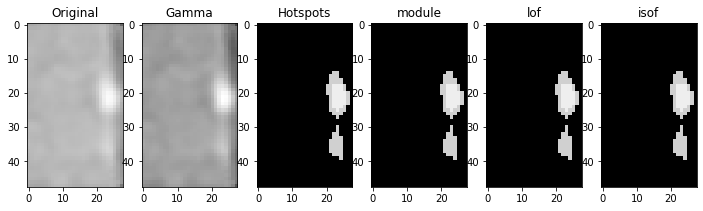

[-0.98528709 -1.05326361 -0.9768116  -1.00646516 -0.99200839 -1.00769201
 -1.0382362  -1.02871271]
[-1.87825281]
[-0.4444452  -0.48767259 -0.45094805 -0.45767486 -0.45756632 -0.50170099
 -0.50807427 -0.49463921]
[-0.71130113]
0.0 0
4740.jpg Normal
[-1.         -1.28329437 -1.05146415 -1.89302357 -1.00131783 -1.05146415
 -1.10230751 -0.97358294]
[-1.80144609]
[-0.44190699 -0.56529764 -0.44108949 -0.73595762 -0.46567886 -0.44108949
 -0.49009704 -0.47740749]
[-0.68057844]
0.0 0
4998.jpg Normal
[-0.98717418 -0.99064109 -1.35201478 -1.03786918 -1.00734289 -1.02669335
 -1.00149713 -1.0000491 ]
[-1.82418808]
[-0.42385576 -0.44901072 -0.5309348  -0.46846307 -0.43541259 -0.4890941
 -0.44391024 -0.44003752]
[-0.68967523]
0.0 0
2331.jpg Normal
[-0.97613958 -1.04483233 -0.96954072 -0.96969287 -0.96819097 -1.00328901
 -0.96819097 -1.00606432]
[-1.86224249]
[-0.42128782 -0.45666742 -0.42994426 -0.43603247 -0.42324135 -0.4693106
 -0.42324135 -0.4244028 ]
[-0.704897]
0.0 0
4754.jpg Normal
[-1.51956628

[-1.0001433  -1.8700463  -1.10394708 -0.99570281 -0.99297392 -0.9841796
 -2.9143377  -1.30891278]
[-1.85857924]
[-0.43381165 -0.61967773 -0.47792922 -0.45089874 -0.43852611 -0.45183161
 -0.731031   -0.5428032 ]
[-0.7034317]
0.0 0
2443.jpg Normal
[-1.23668942 -1.0376028  -1.0932241  -0.99961412 -1.87474858 -1.18007251
 -1.33964828 -0.96751493]
[-1.84052542]
[-0.53027104 -0.45815224 -0.49726037 -0.45758461 -0.6828739  -0.52536057
 -0.54746381 -0.44441523]
[-0.69621017]
29.0 35.65685415267944 0.28663011151656503 0.9797898790688573
29.0 35.65685415267944 0.28663011151656503 0.9797898790688573
33.0 14
3985.jpg Single-Hotspot


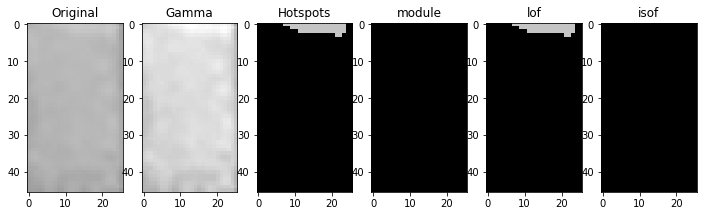

[-0.98530116 -1.11012293 -0.99110268 -1.05696418 -1.32766275 -1.04797919
 -1.18663647 -1.07075002]
[-1.81122329]
[-0.44394411 -0.49755149 -0.47294092 -0.48813145 -0.53339619 -0.46696332
 -0.50620315 -0.47037627]
[-0.68448931]
0.0 0
4032.jpg Normal
[-1.02623466 -0.9883096  -1.00313259 -0.99349467 -1.02458593 -1.10293361
 -0.96413476 -0.9883096 ]
[-1.80505583]
[-0.44872046 -0.43047155 -0.42726241 -0.42497645 -0.44556585 -0.49577289
 -0.44364808 -0.43047155]
[-0.68202233]
0.0 0
435.jpg Normal
[-1.0839221  -1.02261324 -1.04646711 -1.28407313 -1.04646711 -1.1038197
 -1.18391689 -1.1038197 ]
[-1.80144609]
[-0.49719972 -0.44170169 -0.46657458 -0.53689127 -0.46657458 -0.52290953
 -0.55155314 -0.52290953]
[-0.68057844]
0.0 0
353.jpg Normal
[-1.0029669  -1.06847804 -1.4896744  -1.         -0.98860668 -1.05104094
 -0.97883335 -1.1287416 ]
[-1.80144609]
[-0.45460861 -0.477122   -0.58302455 -0.44742691 -0.46319028 -0.48679088
 -0.43505758 -0.49903232]
[-0.68057844]
0.0 0
4967.jpg Normal
[-0.9943616

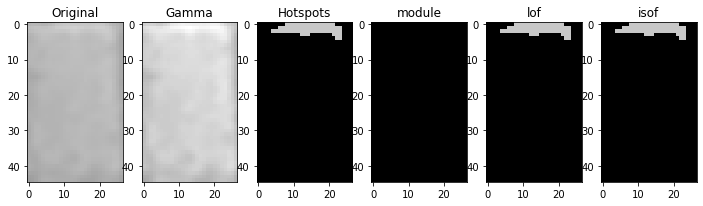

[-1.02429873 -1.00357174 -1.04176908 -0.99803173 -0.99803173 -1.24677622
 -0.99988392 -0.98771528]
[-1.72690247]
[-0.47139119 -0.44423781 -0.46663633 -0.44199236 -0.44199236 -0.55158615
 -0.45305728 -0.45886359]
[-0.65076099]
0.0 0
4783.jpg Normal
[-1.0516311  -1.08633625 -0.98775459 -0.94200865 -1.01306965 -1.0090107
 -1.03437871 -1.07085506]
[-1.84052542]
[-0.47583822 -0.50042242 -0.45815621 -0.4591364  -0.44013862 -0.43317236
 -0.45323021 -0.46527329]
[-0.69621017]
0.0 0
1823.jpg Normal
[-0.99911729 -0.98458176 -1.10511141 -0.96241666 -1.03035135 -1.10589975
 -1.02261324 -1.0412286 ]
[-1.80144609]
[-0.43981969 -0.42792465 -0.49014993 -0.42550056 -0.45220411 -0.5045579
 -0.44170169 -0.47355233]
[-0.68057844]
0.0 0
1837.jpg Normal
[-1.01315169 -0.96809883 -1.04868501 -0.97379189 -0.98987569 -0.99926929
 -1.02126622 -1.12479769]
[-1.88896714]
[-0.45332608 -0.4217231  -0.49208651 -0.45414941 -0.45045137 -0.46099797
 -0.45458968 -0.49710311]
[-0.71558686]
0.0 0
4797.jpg Normal
[-0.982594

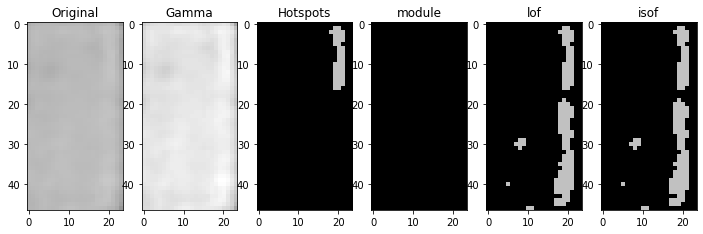

[-1.02316343 -1.00801807 -1.01529693 -1.00792981 -1.00693125 -0.94785846
 -0.98715659 -1.08759836]
[-1.80144609]
[-0.44191944 -0.42669622 -0.46497575 -0.45482078 -0.4280108  -0.42184258
 -0.44992239 -0.53883665]
[-0.68057844]
0.0 0
4634.jpg Normal
[-1.09666876 -1.07580134 -1.11570492 -0.94205255 -1.07399348 -1.03137077
 -1.07580134 -0.94205255]
[-1.80505583]
[-0.52554259 -0.44885131 -0.47553382 -0.45313857 -0.46576631 -0.4602167
 -0.44885131 -0.45313857]
[-0.68202233]
0.0 0
2251.jpg Normal
[-0.99436163 -1.00012543 -0.98582761 -0.99688152 -0.99093867 -1.00786324
 -1.01213719 -1.01190115]
[-1.80505583]
[-0.47821056 -0.4581926  -0.47688442 -0.50264738 -0.46478071 -0.47125239
 -0.4781145  -0.47810861]
[-0.68202233]
0.0 0
4620.jpg Normal
[-1.05326361 -1.00646516 -0.97060051 -0.96957312 -1.02627404 -1.05044013
 -0.96706986 -1.03067934]
[-1.87825281]
[-0.48767259 -0.45767486 -0.5283795  -0.49592284 -0.45392443 -0.4954178
 -0.49518521 -0.52507032]
[-0.71130113]
0.0 0
1980.jpg Normal
[-1.164871

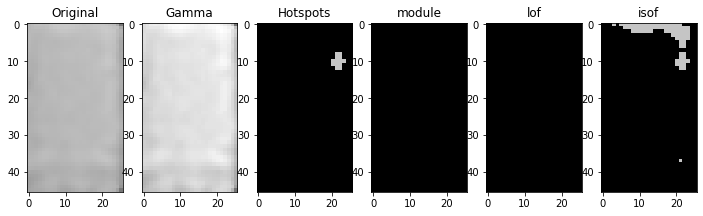

[-1.02716845 -0.99126155 -0.9829546  -1.00367422 -0.99525665 -1.09137811
 -0.99959323 -0.98689733]
[-1.80144609]
[-0.45137098 -0.44887323 -0.43130861 -0.44971798 -0.42575677 -0.52488197
 -0.44118686 -0.45006942]
[-0.68057844]
0.0 0
4191.jpg Normal
[-0.96796814 -0.96819097 -1.02160246 -0.96796814 -0.99715438 -1.01592541
 -1.01775452 -0.9642842 ]
[-1.86224249]
[-0.48258619 -0.42324135 -0.4984919  -0.48258619 -0.44550137 -0.49709885
 -0.44580945 -0.50095984]
[-0.704897]
0.0 0
3198.jpg Normal
[-0.99475689 -1.0189015  -0.97865732 -0.98234138 -0.99198627 -1.01072485
 -1.01710129 -0.99261643]
[-1.84498598]
[-0.41896567 -0.4821889  -0.44002512 -0.44395683 -0.44547585 -0.44416551
 -0.47181299 -0.44941093]
[-0.69799439]
0.0 0
2286.jpg Normal
[-1.00303854 -0.98458176 -1.10721265 -1.02414017 -1.00706985 -0.98167169
 -1.00706985 -0.98293034]
[-1.80144609]
[-0.43789717 -0.42792465 -0.5265798  -0.4544228  -0.4328235  -0.43135233
 -0.4328235  -0.44010356]
[-0.68057844]
0.0 0
1957.jpg Normal
[-1.013850

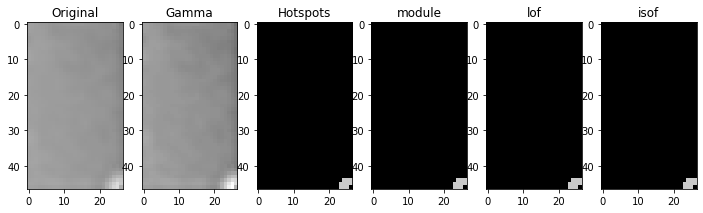

[-1.0091302  -0.9752901  -0.99666748 -0.9752901  -1.18857758 -1.02077032
 -1.1254057  -1.02513332]
[-1.86224249]
[-0.46065133 -0.41106558 -0.44920914 -0.41106558 -0.50508957 -0.44104027
 -0.50066035 -0.4572021 ]
[-0.704897]
0.0 0
780.jpg Normal
[-0.99206927 -0.97064935 -0.99833887 -1.05146415 -0.97064935 -1.00646143
 -1.20712895 -1.00457101]
[-1.80144609]
[-0.46400717 -0.43417148 -0.43007925 -0.44108949 -0.43417148 -0.47850983
 -0.52431619 -0.46072117]
[-0.68057844]
0.0 0
794.jpg Normal
[-1.08871916 -0.97876214 -0.99200839 -0.98972866 -0.99715909 -0.99908631
 -1.02573558 -0.97972219]
[-1.87825281]
[-0.48764213 -0.44482637 -0.45756632 -0.48091553 -0.45939639 -0.44691399
 -0.48996417 -0.43322562]
[-0.71130113]
0.0 0
1200.jpg Normal
[-0.99961412 -1.04248036 -1.02549247 -0.99443366 -1.96694413 -0.98483434
 -0.94200865 -1.07085506]
[-1.84052542]
[-0.45758461 -0.45404527 -0.45086185 -0.4550755  -0.5695003  -0.42259811
 -0.4591364  -0.46527329]
[-0.69621017]
0.0 0
2709.jpg Normal
[-1.15947926

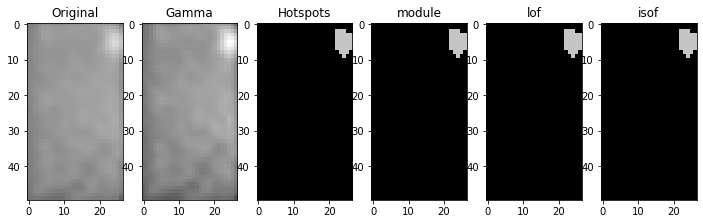

[-0.98985654 -1.02910478 -0.99205504 -0.98860668 -0.97611445 -0.98007964
 -1.         -1.09512967]
[-1.80144609]
[-0.4459725  -0.45838835 -0.43167614 -0.46319028 -0.44960552 -0.45767947
 -0.44742691 -0.49734977]
[-0.68057844]
0.0 0
3359.jpg Normal
[-0.98167169 -1.03301134 -0.96241666 -1.00801807 -1.02202567 -1.01678671
 -1.00107779 -1.02595039]
[-1.80144609]
[-0.43135233 -0.43562424 -0.42550056 -0.42669622 -0.43378453 -0.46899839
 -0.42487682 -0.44757495]
[-0.68057844]
0.0 0
4436.jpg Normal
[-1.22767019 -1.00213028 -1.07258465 -1.58484324 -1.10912156 -1.06266436
 -1.15947926 -1.33895023]
[-1.80505583]
[-0.59739778 -0.47145253 -0.52434345 -0.69259586 -0.56059491 -0.51605528
 -0.58915719 -0.60537646]
[-0.68202233]
0.0 2.0 0.0 1.0
0.0 0.0 0 0
105.0 86.76955199241638 0.17525259318195707 0.7497410169277818
0.0 2.0 0.0 1.0
0.0 0.0 0 0
0.0 0.0 0 0
0.0 0
2047.jpg Normal
[-1.08674788 -1.01555568 -0.99908631 -1.03194448 -0.98615967 -1.06267298
 -0.97876214 -0.97395978]
[-1.87825281]
[-0.48443549

[-0.48647437 -0.44944376 -0.44803785 -0.47294092 -0.46696332 -0.45265817
 -0.51644755 -0.43373887]
[-0.68448931]
0.0 0
971.jpg Normal
[-1.21363366 -1.18276934 -3.94959565 -1.30291167 -0.99961412 -2.9414366
 -1.00302343 -0.98077268]
[-1.84052542]
[-0.53775703 -0.49581143 -0.78010726 -0.55445333 -0.45758461 -0.69280329
 -0.46367119 -0.44881215]
[-0.69621017]
96.5 63.21320307254791 0.3034740659334319 0.9492448349704563
96.5 63.21320307254791 0.3034740659334319 0.9492448349704563
85.0 41
4345.jpg Single-Hotspot


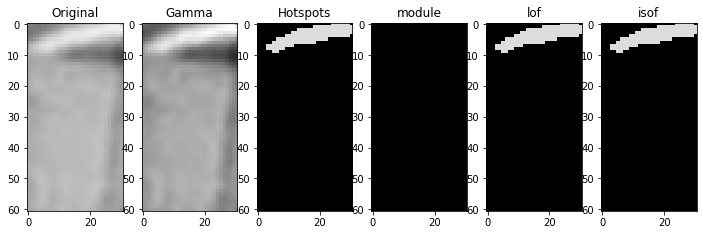

[-0.98951359 -0.98907384 -0.97657631 -1.03786918 -1.00556486 -0.99177804
 -1.10061986 -1.        ]
[-1.82418808]
[-0.49338873 -0.42488532 -0.48856723 -0.46846307 -0.50478677 -0.47781039
 -0.47776362 -0.51956124]
[-0.68967523]
0.0 0
2734.jpg Normal
[-1.1287416  -1.00367422 -0.97883335 -1.14156409 -0.9779693  -1.02910851
 -1.02910851 -1.        ]
[-1.80144609]
[-0.49903232 -0.44971798 -0.43505758 -0.50843066 -0.42465729 -0.46968228
 -0.46968228 -0.44008165]
[-0.68057844]
0.0 0
2052.jpg Normal
[-1.05569022 -1.00012543 -0.96957608 -0.98878514 -1.0287601  -1.00730101
 -0.99093867 -0.98878514]
[-1.80505583]
[-0.51743329 -0.4581926  -0.44900633 -0.45560797 -0.50078269 -0.44733283
 -0.46478071 -0.45560797]
[-0.68202233]
0.0 0
4423.jpg Normal
[-0.99096737 -0.99029504 -0.97972219 -1.23644444 -0.97818027 -0.97876214
 -1.06267298 -1.00378519]
[-1.87825281]
[-0.46711603 -0.47030104 -0.43322562 -0.50947965 -0.45636511 -0.44482637
 -0.44942627 -0.45401971]
[-0.71130113]
0.0 0
2046.jpg Normal
[-1.0095

[-0.56498315 -0.52507032 -0.54662262 -0.45636511 -0.54612544 -0.66479391
 -0.5127224  -0.58596583]
[-0.71130113]
0.0 0
3199.jpg Normal
[-1.00178765 -1.01812533 -0.99698341 -1.06152384 -1.04683986 -0.98713855
 -1.029166   -1.01697494]
[-1.87825281]
[-0.44609475 -0.44164239 -0.42398779 -0.47083275 -0.48121007 -0.42897444
 -0.4541117  -0.4747802 ]
[-0.71130113]
0.0 0
232.jpg Normal
[-1.01275133 -1.0318382  -1.02933199 -0.96751493 -0.96095409 -0.99961412
 -1.1573635  -1.0095001 ]
[-1.84052542]
[-0.45798856 -0.46446047 -0.44249922 -0.44441523 -0.46713173 -0.45758461
 -0.53481173 -0.47206952]
[-0.69621017]
0.0 0
4806.jpg Normal
[-0.98530116 -0.99581415 -1.61606607 -1.04638245 -1.29512959 -0.98395356
 -0.98819258 -1.04797919]
[-1.81122329]
[-0.44394411 -0.42607623 -0.59601216 -0.48445045 -0.51644755 -0.44803785
 -0.43144976 -0.46696332]
[-0.68448931]
0.0 0
554.jpg Normal
[-0.96078442 -1.05270719 -1.01701337 -0.99231778 -1.05558154 -2.608545
 -0.97433014 -1.22288169]
[-1.82418808]
[-0.42452798

[-1.05133363 -1.01701337 -0.96908929 -2.88087504 -0.97433014 -1.35201478
 -0.96078442 -0.98907384]
[-1.82418808]
[-0.49176459 -0.47348105 -0.45975422 -0.68995364 -0.42603526 -0.5309348
 -0.42452798 -0.42488532]
[-0.68967523]
0.0 0
2250.jpg Normal
[-1.0114923  -1.03386341 -1.0101881  -1.00714973 -0.98480527 -0.98222883
 -0.98192229 -0.98222883]
[-1.80505583]
[-0.47582397 -0.49697556 -0.46930967 -0.44649037 -0.451694   -0.45533873
 -0.47019099 -0.45533873]
[-0.68202233]
0.0 0
2536.jpg Normal
[-1.00897203 -1.01034851 -1.00178765 -1.02531584 -1.01764054 -0.99142157
 -1.01064685 -0.99803585]
[-1.87825281]
[-0.45752887 -0.43943244 -0.44609475 -0.46059461 -0.47012269 -0.43635623
 -0.4775905  -0.5022667 ]
[-0.71130113]
0.0 0
4147.jpg Normal
[-1.05149858 -1.         -0.99126155 -0.98888107 -2.48800241 -0.99780691
 -0.98888107 -1.00871922]
[-1.80144609]
[-0.47394495 -0.44008165 -0.44887323 -0.43076593 -0.67975219 -0.43203586
 -0.43076593 -0.45582405]
[-0.68057844]
0.0 0
3628.jpg Normal
[-1.02848

[-0.60111802 -0.46478071 -0.46806849 -0.4772831  -0.43301518 -0.5265738
 -0.49472384 -0.47582397]
[-0.68202233]
0.0 0
434.jpg Normal
[-1.         -1.02245009 -1.02864926 -0.98867004 -1.         -0.97433014
 -1.00454228 -1.00727728]
[-1.82418808]
[-0.48990956 -0.45083788 -0.48401529 -0.47987728 -0.48990956 -0.42603526
 -0.480043   -0.49580036]
[-0.68967523]
0.0 0
4966.jpg Normal
[-0.99973067 -0.9992785  -1.4837902  -0.97838007 -0.98819258 -1.04638245
 -1.0288505  -1.0288505 ]
[-1.81122329]
[-0.47668949 -0.42532484 -0.55297196 -0.45265817 -0.43144976 -0.48445045
 -0.4475197  -0.4475197 ]
[-0.68448931]
0.0 0
352.jpg Normal
[-0.99203674 -1.61353444 -1.10721265 -1.08451707 -1.32440467 -1.22364581
 -1.00107779 -0.98293034]
[-1.80144609]
[-0.45854766 -0.63899212 -0.5265798  -0.50685724 -0.54604282 -0.51232536
 -0.42487682 -0.44010356]
[-0.68057844]
0.0 0
2324.jpg Normal
[-1.05689886 -0.96796814 -1.00077437 -1.00725535 -1.02574884 -1.1424679
 -0.97109171 -1.45359017]
[-1.86224249]
[-0.50143561

[-1.06027765 -1.00525329 -1.00144393 -1.51573003 -1.09340858 -1.10601944
 -1.0141403  -1.00623202]
[-1.87825281]
[-0.49977735 -0.43673295 -0.47046219 -0.59362822 -0.51448281 -0.4988213
 -0.48838073 -0.43166208]
[-0.71130113]
0.0 0
3984.jpg Normal
[-0.9977278  -1.0288505  -1.06103952 -0.99581415 -0.9992785  -1.02368
 -0.9977278  -1.02049496]
[-1.81122329]
[-0.4498334  -0.4475197  -0.46586304 -0.42607623 -0.42532484 -0.46226176
 -0.4498334  -0.4795466 ]
[-0.68448931]
0.0 0
2442.jpg Normal
[-0.99855811 -0.96848022 -0.97698296 -2.90713413 -1.02927436 -1.03776226
 -0.99855811 -1.01215057]
[-1.88896714]
[-0.43537802 -0.4215442  -0.45235661 -0.72170442 -0.49282345 -0.46844472
 -0.43537802 -0.43114412]
[-0.71558686]
0.0 0
3748.jpg Normal
[-1.00714973 -1.01962127 -0.99281503 -1.00714973 -0.99093867 -1.0101881
 -0.99079983 -0.98480527]
[-1.80505583]
[-0.44649037 -0.4731828  -0.46883027 -0.44649037 -0.46478071 -0.46930967
 -0.45873579 -0.451694  ]
[-0.68202233]
0.0 0
4027.jpg Normal
[-1.02948603 

[-0.45161183 -0.44069452 -0.47131093 -0.45332001 -0.45458968 -0.43494015
 -0.45458968 -0.43386536]
[-0.71558686]
0.0 0
2873.jpg Normal
[-0.98126389 -0.98009397 -1.02080459 -0.99141102 -0.98009397 -1.06103952
 -0.99141102 -1.03858059]
[-1.81122329]
[-0.43154573 -0.46185677 -0.44944376 -0.45459385 -0.46185677 -0.46586304
 -0.45459385 -0.48150343]
[-0.68448931]
0.0 0
636.jpg Normal
[-1.         -0.99780691 -0.98888107 -0.97883335 -0.99959323 -1.
 -2.16692462 -1.03858697]
[-1.80144609]
[-0.44008165 -0.43203586 -0.43076593 -0.43505758 -0.44118686 -0.44742691
 -0.6438587  -0.47663083]
[-0.68057844]
0.0 0
805.jpg Normal
[-1.00270906 -1.02684601 -0.9956843  -1.51721329 -1.00477465 -0.99281503
 -0.9999711  -0.98192229]
[-1.80505583]
[-0.513547   -0.47343703 -0.4610247  -0.56270779 -0.44691064 -0.46883027
 -0.46840257 -0.47019099]
[-0.68202233]
0.0 0
45.jpg Normal
[-0.99669704 -1.02679088 -0.98717418 -0.99064109 -1.0000491  -2.0992643
 -1.02669335 -1.35201478]
[-1.82418808]
[-0.43115762 -0.48079

[-0.48978186 -0.55167513 -0.4459725  -0.50800276 -0.44405233 -0.53292246
 -0.4459725  -0.53292246]
[-0.68057844]
0.0 0
2118.jpg Normal
[-1.00012543 -0.9956843  -1.39528261 -0.98222883 -0.98940911 -0.98940911
 -1.9673626  -1.00714973]
[-1.80505583]
[-0.4581926  -0.4610247  -0.57354119 -0.45533873 -0.48381619 -0.48381619
 -0.58958627 -0.44649037]
[-0.68202233]
0.0 0
4569.jpg Normal
[-1.0169628  -1.06152384 -0.99007172 -1.23852363 -0.99660633 -1.01413018
 -1.00623202 -1.04344047]
[-1.87825281]
[-0.46346799 -0.47083275 -0.42735687 -0.50574588 -0.44239985 -0.46380608
 -0.43166208 -0.48018452]
[-0.71130113]
0.0 0
3206.jpg Normal
[-1.06267298 -0.97395978 -1.17964506 -0.99715909 -2.5243714  -0.97818027
 -0.99029504 -0.98615967]
[-1.87825281]
[-0.44942627 -0.44561589 -0.5319604  -0.45939639 -0.66905282 -0.45636511
 -0.47030104 -0.42945344]
[-0.71130113]
0.0 0
185.jpg Normal
[-1.94350096 -0.97327832 -3.28065052 -1.34188042 -1.03167222 -1.09069249
 -0.98835363 -1.00132287]
[-1.87825281]
[-0.58857

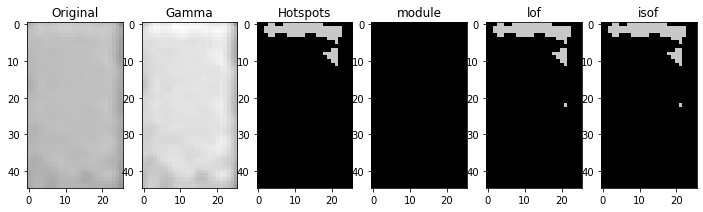

[-1.04695571 -0.98035742 -1.01279978 -0.98035742 -1.05294035 -0.96936482
 -1.0169628  -0.96289185]
[-1.87825281]
[-0.49899496 -0.49635212 -0.49231786 -0.49635212 -0.53709049 -0.48511899
 -0.46346799 -0.46926082]
[-0.71130113]
0.0 0
5111.jpg Normal
[-0.99908631 -1.82541475 -0.98972866 -0.99908631 -1.42017685 -0.98972866
 -1.23644444 -1.87531784]
[-1.87825281]
[-0.44691399 -0.60615127 -0.46479597 -0.44691399 -0.54223283 -0.46479597
 -0.50947965 -0.57430488]
[-0.71130113]
0.0 0
3574.jpg Normal
[-1.01213719 -1.02596546 -1.00927831 -1.00245394 -1.07258465 -0.99079983
 -1.0287601  -0.98878514]
[-1.80505583]
[-0.4781145  -0.49822828 -0.47171337 -0.49472384 -0.52434345 -0.45873579
 -0.50078269 -0.45560797]
[-0.68202233]
0.0 0
5105.jpg Normal
[-1.02495659 -1.01885632 -0.99919825 -0.99499575 -1.02057629 -1.0090097
 -1.00161948 -1.22774495]
[-1.84052542]
[-0.4704188  -0.46394168 -0.46492516 -0.46871024 -0.44269427 -0.45902205
 -0.44905645 -0.52096325]
[-0.69621017]
0.0 0
1363.jpg Normal
[-1.02700

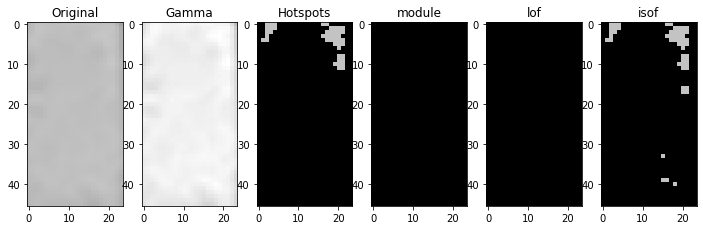

[-1.02994682 -1.02075219 -1.00985807 -0.97906869 -1.02075219 -1.01974118
 -1.02994682 -1.04599853]
[-1.87825281]
[-0.4798852  -0.45250111 -0.47672617 -0.42938162 -0.45250111 -0.45467135
 -0.4798852  -0.47930916]
[-0.71130113]
0.0 0
4555.jpg Normal
[-0.99129874 -0.99249904 -1.04077961 -0.98104466 -0.99430634 -1.0473166
 -1.03872707 -1.03307902]
[-1.62631593]
[-0.44163922 -0.41214961 -0.47070098 -0.45450097 -0.43589585 -0.46931236
 -0.47424189 -0.44218558]
[-0.61052637]
0.0 0
4233.jpg Normal
[-1.06847804 -0.99641925 -0.97883335 -0.98689733 -1.16635431 -1.
 -1.0029669  -1.02910851]
[-1.80144609]
[-0.477122   -0.43147381 -0.43505758 -0.45006942 -0.51932578 -0.45285647
 -0.45460861 -0.46968228]
[-0.68057844]
0.0 0
2642.jpg Normal
[-0.98907384 -1.31153048 -0.99077406 -1.02679088 -1.06151454 -4.48231271
 -0.98717418 -0.97433014]
[-1.82418808]
[-0.42488532 -0.5353036  -0.44035187 -0.48079293 -0.48190558 -0.79128358
 -0.42385576 -0.42603526]
[-0.68967523]
0.0 0
47.jpg Normal
[-1.10268447 -0.992

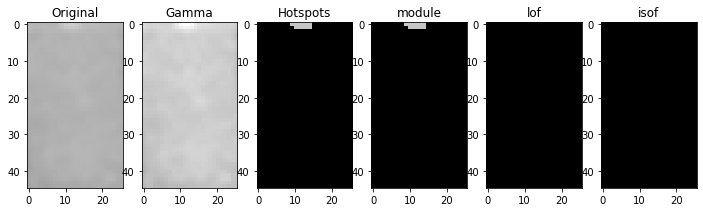

[-1.0726039  -1.0029669  -0.99205504 -1.02910851 -1.14156409 -0.97883335
 -0.9779693  -1.01020616]
[-1.80144609]
[-0.49981267 -0.45460861 -0.43167614 -0.46968228 -0.50843066 -0.43505758
 -0.42465729 -0.43225885]
[-0.68057844]
0.0 0
2656.jpg Normal
[-1.158682   -0.99698341 -0.96936482 -1.33812997 -1.01305177 -1.04344047
 -1.01819269 -1.00421285]
[-1.87825281]
[-0.54564747 -0.42398779 -0.48511899 -0.57802284 -0.49266262 -0.48018452
 -0.47428897 -0.52506354]
[-0.71130113]
0.0 0
2130.jpg Normal
[-1.04363494 -1.01328027 -0.96682177 -1.17371752 -1.31291768 -0.94116002
 -1.21651843 -0.94656562]
[-1.87825281]
[-0.51758599 -0.52200397 -0.49040761 -0.45023352 -0.6473202  -0.51420812
 -0.52606478 -0.51389532]
[-0.71130113]
0.0 0
4541.jpg Normal
[-1.03562515 -0.9997345  -1.01817637 -1.13512397 -1.04381408 -1.015948
 -1.40548012 -1.00161948]
[-1.84052542]
[-0.48329342 -0.4652803  -0.46307593 -0.48854748 -0.48123606 -0.4858433
 -0.54353773 -0.44905645]
[-0.69621017]
0.0 0
1.jpg Normal
[-1.0169628  -

[-1.41623267 -1.23465476 -1.41623267 -1.31569764 -1.31569764 -1.10259461
 -1.04732698 -1.53716612]
[-1.62631593]
[-0.58883758 -0.58395764 -0.58883758 -0.57718013 -0.57718013 -0.5342931
 -0.4574345  -0.6457702 ]
[-0.61052637]
1.0 4.828427076339722 0.5390120952601716 1.0
2.0 6.0 0.6981317007977318 1.0
19.5 32.3847758769989 0.23364833135100752 0.8971511929901139
0.0 6.0 0.0 1.0
7.5 14.242640614509583 0.4646116503384779 0.9639123207822055
1.0 4.0 0.7853981633974483 1.0
1.0 4.0 0.7853981633974483 1.0
4.5 21.071067690849304 0.12736476342283928 0.8673546242405538
0.5 3.414213538169861 0.5390120920947209 1.0
2.0 9.656854152679443 0.2695060476300858 0.9698547780056687
12.0 19.313708305358887 0.4042590714451287 0.9348385911221821
0.0 2.8284270763397217 0.0 1.0
0.0 0.0 0 0
7.5 14.242640614509583 0.4646116503384779 0.9639123207822055
0.0 0.0 0 0
12.0 19.313708305358887 0.4042590714451287 0.9348385911221821
20.0 16
3986.jpg Multi-Hotspots


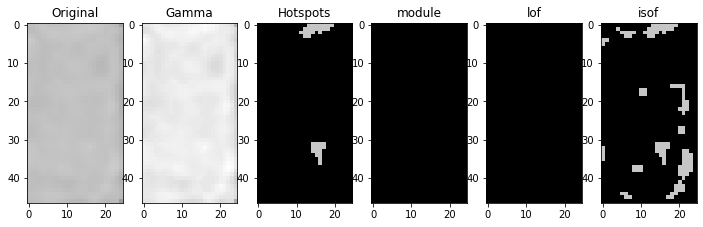

[-0.99678285 -1.00525051 -0.98241297 -1.00951276 -1.01700736 -0.99678285
 -0.99678285 -1.00142643]
[-1.84052542]
[-0.46901057 -0.47801116 -0.47633184 -0.4611412  -0.50157407 -0.46901057
 -0.46901057 -0.46315015]
[-0.69621017]
0.0 0
4031.jpg Normal
[-0.98520666 -1.03671934 -0.99079983 -1.06266436 -1.02596546 -1.01213719
 -1.02596546 -1.00213028]
[-1.80505583]
[-0.48910311 -0.50994281 -0.45873579 -0.51605528 -0.49822828 -0.4781145
 -0.49822828 -0.47145253]
[-0.68202233]
0.0 0
3038.jpg Normal
[-0.97684881 -1.44837374 -1.00437102 -1.03024652 -0.98749787 -0.99790203
 -0.99388727 -0.99469878]
[-1.84052542]
[-0.43812058 -0.55235123 -0.44625522 -0.46316616 -0.4406187  -0.45531254
 -0.45770553 -0.4610748 ]
[-0.69621017]
0.0 0
4757.jpg Normal
[-1.40102991 -1.16013191 -1.58632699 -0.9829546  -1.26584312 -1.16013191
 -1.02910478 -1.29615407]
[-1.80144609]
[-0.55954629 -0.4954828  -0.6193261  -0.43130861 -0.5512824  -0.4954828
 -0.45838835 -0.55167513]
[-0.68057844]
0.0 0
2326.jpg Normal
[-0.979516

[-0.99681362 -1.125092   -1.05801691 -1.03795655 -0.97933434 -1.05775237
 -1.03795655 -0.99249531]
[-1.62631593]
[-0.44742226 -0.49123923 -0.4393374  -0.46519916 -0.42689501 -0.43869552
 -0.46519916 -0.40073808]
[-0.61052637]
0.0 0
378.jpg Normal
[-1.00994153 -0.97684881 -0.99543721 -1.00610502 -1.02406655 -1.01045473
 -1.01817637 -0.99523592]
[-1.84052542]
[-0.48775779 -0.43812058 -0.4788162  -0.46134671 -0.48193599 -0.45893401
 -0.46307593 -0.48362613]
[-0.69621017]
0.0 0
4794.jpg Normal
[-1.01845606 -0.94116002 -1.2479632  -1.13951346 -1.04363494 -0.94656562
 -0.96682177 -0.97509628]
[-1.87825281]
[-0.53271309 -0.53312706 -0.54371964 -0.58466249 -0.51758599 -0.51389532
 -0.49040761 -0.43130936]
[-0.71130113]
3.5 7.414213538169861 0.8001063703614795 1.0
9.5 28.242640614509583 0.14966590286237125 0.9776795650918967
0.0 0
4958.jpg Normal
[-1.0091359  -0.98970839 -1.05506502 -1.03448243 -1.0799452  -1.00115214
 -1.03448243 -0.99591344]
[-1.62631593]
[-0.4395752  -0.42206905 -0.43332741 

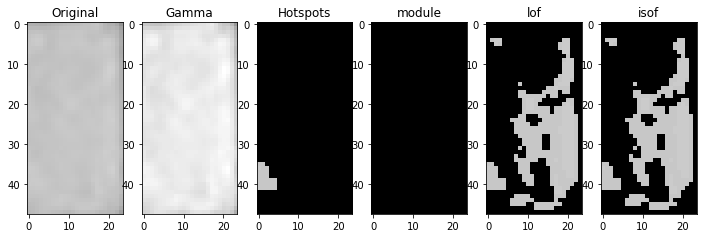

[-1.01177754 -1.00554412 -1.01134911 -0.97026027 -0.99055567 -4.62135289
 -1.01395997 -0.99894666]
[-1.84052542]
[-0.48616546 -0.4696618  -0.47482627 -0.44527444 -0.50256575 -0.76175674
 -0.48257293 -0.50488398]
[-0.69621017]
0.0 0
3789.jpg Normal
[-1.02544234 -1.05853715 -1.26393177 -0.96029376 -0.99591344 -1.07987138
 -0.97040272 -1.01561493]
[-1.62631593]
[-0.46310775 -0.46369371 -0.54480566 -0.41114866 -0.43502087 -0.47696426
 -0.42904276 -0.4432181 ]
[-0.61052637]
0.0 0
2497.jpg Normal
[-1.02474605 -1.06265901 -0.99641427 -1.         -1.14355377 -1.01179561
 -0.99933355 -0.97951693]
[-1.62631593]
[-0.42729891 -0.45740132 -0.45796841 -0.45897564 -0.54533047 -0.47071149
 -0.46536173 -0.43694161]
[-0.61052637]
0.0 0
3951.jpg Normal
[-1.01974118 -0.97906869 -1.03006334 -1.2884191  -1.01812533 -1.03006334
 -1.04172967 -1.00623202]
[-1.87825281]
[-0.45467135 -0.42938162 -0.46445139 -0.50978326 -0.44164239 -0.46445139
 -0.46197371 -0.43166208]
[-0.71130113]
0.0 0
3616.jpg Normal
[-0.9970

[-1.         -0.98276421 -1.04038364 -0.97731274 -0.99946595 -0.99954334
 -1.29268247 -1.01813416]
[-1.62631593]
[-0.44182469 -0.41561341 -0.47286507 -0.45559962 -0.42554048 -0.44539357
 -0.54637505 -0.45887997]
[-0.61052637]
0.0 0
3170.jpg Normal
[-0.94309598 -1.03354246 -0.99499575 -1.02943999 -1.02495659 -0.98749787
 -1.02057629 -1.03024652]
[-1.84052542]
[-0.45053528 -0.47962854 -0.46871024 -0.48053585 -0.4704188  -0.4406187
 -0.44269427 -0.46316616]
[-0.69621017]
0.0 0
3164.jpg Normal
[-0.96581728 -0.9997288  -1.05287138 -1.02907783 -0.9997288  -2.51577053
 -0.98660823 -0.98194249]
[-1.79976106]
[-0.46935381 -0.44820184 -0.50363135 -0.45274132 -0.44820184 -0.67778443
 -0.45202645 -0.46630027]
[-0.67990442]
0.0 0
1773.jpg Normal
[-1.12049643 -1.66849416 -1.04585466 -1.07864812 -1.17027666 -1.04162524
 -1.32759264 -1.06234933]
[-1.62631593]
[-0.55354567 -0.61430165 -0.46049315 -0.53243602 -0.54123165 -0.47391869
 -0.56649458 -0.48150703]
[-0.61052637]
0.0 0
581.jpg Normal
[-0.987612

[-0.43869552 -0.58647247 -0.48958025 -0.41821528 -0.63807697 -0.45157811
 -0.43954937 -0.4555952 ]
[-0.61052637]
8.5 11.071067690849304 0.8714646546573355 1.0
8.5 11.071067690849304 0.8714646546573355 1.0
14.0 0
2285.jpg Junction-Box-Error


[-0.99184062 -0.99248707 -0.98223313 -0.97565712 -0.97863698 -0.99790894
 -0.97863698 -0.99286988]
[-1.79976106]
[-0.43370009 -0.45284578 -0.4125795  -0.43029327 -0.43929473 -0.43879377
 -0.43929473 -0.44348329]
[-0.67990442]
0.0 0
218.jpg Normal
[-2.07048519 -1.53064839 -1.71059399 -0.98035742 -1.84833013 -1.38728308
 -1.99273092 -1.64394747]
[-1.87825281]
[-0.6758913  -0.61271793 -0.60574133 -0.49635212 -0.60914875 -0.58890065
 -0.64599692 -0.59385754]
[-0.71130113]
0.0 4.828427076339722 0.0 0.9631048527764642
0.0 4.0 0.0 1.0
192.0 150.02438485622406 0.10719817291575306 0.5622388730266317
9.0 14.485281229019165 0.5390120952601716 0.9508064703686189
9.0 11.656854152679443 0.8323186919600186 1.0
0.5 3.414213538169861 0.5390120920947209 1.0
0.0 0.0 0 0
0.0 6.0 0.0 1.0
0.0 0.0 0 0
9.0 14.485281229019165 0.5390120952601716 0.9508064703686189
9.0 11.656854152679443 0.8323186919600186 1.0
6.0 25
1954.jpg Multi-Hotspots


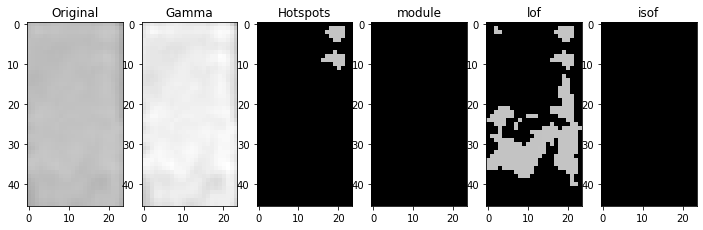

[-1.5088314  -1.01735493 -1.29220161 -1.42219862 -1.40053616 -1.78671689
 -1.01123443 -1.56527689]
[-1.62631593]
[-0.56890201 -0.45532623 -0.50088723 -0.60250332 -0.574884   -0.62693029
 -0.4684957  -0.59275763]
[-0.61052637]
103.5 61.21320295333862 0.3471043090038593 0.8497420271464201
103.5 61.21320295333862 0.3471043090038593 0.8497420271464201
76.0 56
3825.jpg Single-Hotspot


[-1.00437102 -0.99469878 -0.94309598 -2.30212545 -1.00917042 -0.99790203
 -0.99543721 -1.00758336]
[-1.84052542]
[-0.44625522 -0.4610748  -0.45053528 -0.64727103 -0.44736738 -0.45531254
 -0.4788162  -0.48139102]
[-0.69621017]
0.0 0
4192.jpg Normal
[-0.99562576 -1.00244948 -1.02716845 -1.00694019 -0.9829546  -0.99562576
 -0.9779693  -1.00857318]
[-1.80144609]
[-0.44230271 -0.43247628 -0.45137098 -0.44139757 -0.43130861 -0.44230271
 -0.42465729 -0.44405233]
[-0.68057844]
0.0 0
3372.jpg Normal
[-0.99249531 -2.36710373 -0.9968388  -4.46243492 -1.21649435 -1.27419273
 -0.97652611 -1.06981888]
[-1.62631593]
[-0.40073808 -0.64452096 -0.4065417  -0.79297091 -0.5150678  -0.51432847
 -0.42345975 -0.45157811]
[-0.61052637]
0.0 0
1565.jpg Normal
[-0.96029376 -1.12822667 -1.05853715 -1.06350336 -1.09820877 -1.28283891
 -1.08682704 -4.20121351]
[-1.62631593]
[-0.41114866 -0.52100586 -0.46369371 -0.478455   -0.48491034 -0.53380097
 -0.44811714 -0.80206379]
[-0.61052637]
0.0 0
797.jpg Normal
[-0.97906

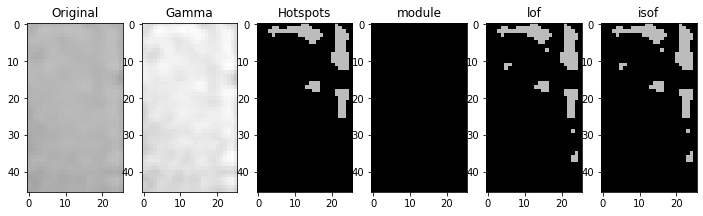

[-0.99828431 -1.42267245 -1.05660653 -1.00718653 -0.99660633 -2.02577221
 -0.97906869 -1.04683986]
[-1.87825281]
[-0.43444612 -0.58107901 -0.478371   -0.44166169 -0.44239985 -0.61953152
 -0.42938162 -0.48121007]
[-0.71130113]
0.0 0
1217.jpg Normal
[-1.02823963 -1.49691213 -1.02725257 -2.11706514 -1.17027666 -1.02474605
 -1.04162524 -0.98596633]
[-1.62631593]
[-0.45468874 -0.5834969  -0.47864143 -0.66954609 -0.54123165 -0.42729891
 -0.47391869 -0.42112588]
[-0.61052637]
0.0 0
783.jpg Normal
[-1.00362489 -1.01611637 -1.01253001 -0.99478012 -1.62622022 -1.14135633
 -1.07987138 -1.0035735 ]
[-1.62631593]
[-0.44695209 -0.49271985 -0.4764531  -0.4950347  -0.6389797  -0.54838371
 -0.47696426 -0.48881581]
[-0.61052637]
4.0 7.656854152679443 0.8573716241035623 1.0
2.5 7.414213538169861 0.5715045502581996 0.9759724309365341
0.0 2.0 0.0 1.0
15.0 15.656854152679443 0.7689393938672696 0.9772437647943251
9.5 12.242640614509583 0.7964953919549047 1.0
4.0 7.656854152679443 0.8573716241035623 1.0
15.0 

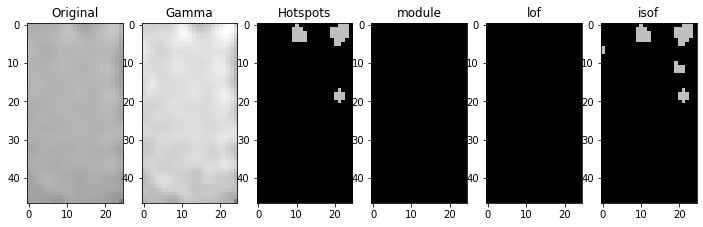

[-1.18825477 -1.03459886 -1.0364068  -1.10259461 -1.04077961 -1.21538643
 -1.37980694 -1.94780775]
[-1.62631593]
[-0.56748751 -0.48597326 -0.50113679 -0.5342931  -0.47070098 -0.57578863
 -0.58678613 -0.63753199]
[-0.61052637]
0.0 0
3366.jpg Normal
[-0.98000798 -1.05665958 -0.97863698 -0.96810721 -1.02553708 -0.98223313
 -1.70758332 -1.01588202]
[-1.79976106]
[-0.47169016 -0.47039453 -0.43929473 -0.45036478 -0.4904767  -0.4125795
 -0.63825325 -0.45064352]
[-0.67990442]
0.0 0
4409.jpg Normal
[-0.99706984 -0.98749787 -1.01885632 -1.00161948 -0.97026027 -1.03024652
 -0.97684881 -0.98978155]
[-1.84052542]
[-0.45215745 -0.4406187  -0.46394168 -0.44905645 -0.44527444 -0.46316616
 -0.43812058 -0.4524365 ]
[-0.69621017]
0.0 0
2078.jpg Normal
[-1.05104094 -1.         -1.1512985  -1.0029669  -1.05149858 -0.97611445
 -1.22475556 -1.09512967]
[-1.80144609]
[-0.48679088 -0.45285647 -0.50765133 -0.45460861 -0.47394495 -0.44960552
 -0.53292246 -0.49734977]
[-0.68057844]
3.0 7.656854152679443 0.6430287

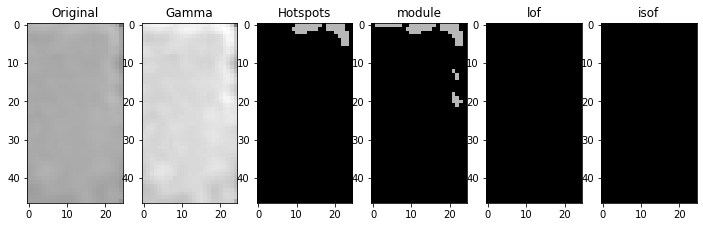

[-0.97211874 -1.01812533 -1.02291723 -1.02841889 -0.98713855 -1.01819269
 -1.04392955 -1.02841889]
[-1.87825281]
[-0.47036233 -0.44164239 -0.47532068 -0.48674567 -0.42897444 -0.47428897
 -0.49683052 -0.48674567]
[-0.71130113]
0.0 0
4421.jpg Normal
[-1.46584887 -1.9517114  -1.60001258 -1.7085616  -1.37857174 -1.46584887
 -0.97001948 -1.7085616 ]
[-1.62631593]
[-0.57569636 -0.63321326 -0.60639742 -0.5963682  -0.55559907 -0.57569636
 -0.43203253 -0.5963682 ]
[-0.61052637]
8.0 18.485281229019165 0.29420342659965626 0.9394364048526554
12.0 13.656854152679443 0.8085181381420814 0.9869555956409838
452.5 145.154327750206 0.2698786133226766 0.6586546076069741
4.5 8.242640614509583 0.8323186927986581 1.0
0.0 0.0 0 0
0.0 0.0 0 0
5.0 19.656854152679443 0.1626117178010123 0.9308878030495826
8.0 18.485281229019165 0.29420342659965626 0.9394364048526554
12.0 13.656854152679443 0.8085181381420814 0.9869555956409838
2.5 7.414213538169861 0.5715045502581996 1.0
0.0 0.0 0 0
0.0 4.0 0.0 1.0
32.0 4
2050.jp

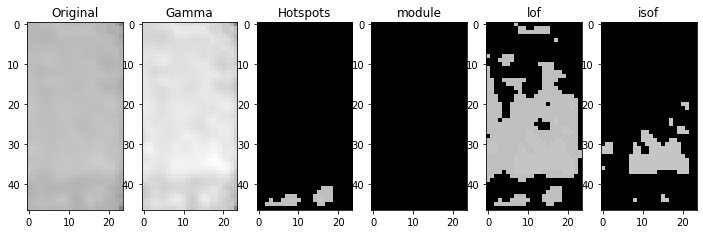

[-0.98516071 -0.97040272 -1.2179641  -1.02512959 -1.01611637 -0.99549778
 -1.00363609 -1.04934522]
[-1.62631593]
[-0.48653849 -0.42904276 -0.53337541 -0.46970469 -0.49271985 -0.43838029
 -0.47967225 -0.52401503]
[-0.61052637]
0.0 0
2736.jpg Normal
[-1.03195209 -1.02225674 -1.0364068  -1.02676091 -1.03483384 -1.01838452
 -1.02206643 -1.03085099]
[-1.62631593]
[-0.49317897 -0.47840357 -0.50113679 -0.47379104 -0.46688709 -0.48267833
 -0.48302029 -0.48034622]
[-0.61052637]
0.0 0
5059.jpg Normal
[-1.0340709  -0.98223313 -0.99805378 -1.01390909 -1.01611588 -0.98660823
 -0.99170379 -0.97111951]
[-1.79976106]
[-0.46625269 -0.4125795  -0.46633355 -0.47932693 -0.45481699 -0.45202645
 -0.44793928 -0.43775503]
[-0.67990442]
0.0 0
4347.jpg Normal
[-1.015948   -1.49664307 -0.98978155 -1.16479682 -1.31189728 -0.98978155
 -3.84023425 -1.00554412]
[-1.84052542]
[-0.4858433  -0.56560233 -0.4524365  -0.4991317  -0.54192844 -0.4524365
 -0.72162121 -0.4696618 ]
[-0.69621017]
0.0 0
3428.jpg Normal
[-1.03199

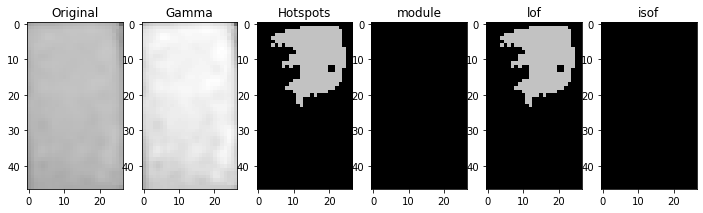

[-0.98596633 -1.02474605 -1.00077606 -1.03517423 -1.04162524 -1.00363082
 -0.99790301 -2.16927975]
[-1.62631593]
[-0.42112588 -0.42729891 -0.42940233 -0.44459842 -0.47391869 -0.46701709
 -0.43814604 -0.6485247 ]
[-0.61052637]
0.0 0
768.jpg Normal
[-0.99698341 -1.0169628  -1.01034851 -0.98713855 -0.99007172 -2.64742371
 -1.01034851 -1.04683986]
[-1.87825281]
[-0.42398779 -0.46346799 -0.43943244 -0.42897444 -0.42735687 -0.6703166
 -0.43943244 -0.48121007]
[-0.71130113]
0.0 0
4384.jpg Normal
[-0.99959323 -1.02033992 -1.83377761 -1.03858697 -1.0122474  -0.99780691
 -1.0726039  -1.        ]
[-1.80144609]
[-0.44118686 -0.46247092 -0.6173564  -0.47663083 -0.45026987 -0.43203586
 -0.49981267 -0.44008165]
[-0.68057844]
0.0 0
4390.jpg Normal
[-1.02823963 -1.04585466 -0.97731274 -1.57077293 -1.04038364 -1.05407494
 -1.02474605 -1.17027666]
[-1.62631593]
[-0.45468874 -0.46049315 -0.45559962 -0.60298107 -0.47286507 -0.49240749
 -0.42729891 -0.54123165]
[-0.61052637]
0.0 0
2939.jpg Normal
[-1.046063

[-0.46059461 -0.44164239 -0.45752887 -0.46059461 -0.42018384 -0.45467135
 -0.42938162 -0.75009967]
[-0.71130113]
0.0 0
3401.jpg Normal
[-1.02225674 -0.97933434 -1.02676091 -1.04062982 -1.10259461 -1.03267778
 -1.02206643 -1.04606377]
[-1.62631593]
[-0.47840357 -0.42689501 -0.47379104 -0.46370959 -0.5342931  -0.49224653
 -0.48302029 -0.47514939]
[-0.61052637]
14.0 17.656854152679443 0.5643015462265515 0.9756422427362345
14.0 17.656854152679443 0.5643015462265515 0.9756422427362345
23.0 0
5070.jpg Junction-Box-Error


[-0.96029376 -0.96029376 -0.98970839 -0.99591344 -1.01785178 -1.08682704
 -1.06943172 -1.05853715]
[-1.62631593]
[-0.41114866 -0.41114866 -0.42206905 -0.43502087 -0.4434503  -0.44811714
 -0.47152608 -0.46369371]
[-0.61052637]
0.0 0
2079.jpg Normal
[-1.26742806 -1.01123443 -1.35926405 -1.11630591 -1.29220161 -0.97735482
 -0.99641427 -1.39602524]
[-1.62631593]
[-0.48976287 -0.4684957  -0.51234122 -0.51181417 -0.50088723 -0.46541251
 -0.45796841 -0.55610252]
[-0.61052637]
0.0 0
4408.jpg Normal
[-1.16479682 -0.99596128 -1.00158373 -0.99919825 -1.01500915 -1.00161948
 -1.81754726 -0.97026027]
[-1.84052542]
[-0.4991317  -0.45502654 -0.46034188 -0.46492516 -0.45149924 -0.44905645
 -0.608395   -0.44527444]
[-0.69621017]
0.0 0
3367.jpg Normal
[-1.00244948 -1.00694019 -0.98157648 -1.0122474  -0.98050329 -1.02716845
 -0.99641925 -1.02716845]
[-1.80144609]
[-0.43247628 -0.44139757 -0.44926342 -0.45026987 -0.44182894 -0.45137098
 -0.43147381 -0.45137098]
[-0.68057844]
0.0 0
1570.jpg Normal
[-1.0138

[-0.98767956 -0.97565712 -0.99805378 -1.00138957 -1.03076124 -0.98706082
 -4.41227446 -1.04630967]
[-1.79976106]
[-0.46489492 -0.43029327 -0.46633355 -0.44339894 -0.46516189 -0.43311025
 -0.81375265 -0.46161153]
[-0.67990442]
0.0 0
219.jpg Normal
[-1.05506502 -1.0700047  -1.02512959 -1.11292419 -0.99927928 -1.18054062
 -0.98711684 -1.01611637]
[-1.62631593]
[-0.43332741 -0.51945497 -0.46970469 -0.49382943 -0.43822138 -0.52916131
 -0.49458223 -0.49271985]
[-0.61052637]
0.0 0
2284.jpg Normal
[-0.97883335 -0.98888107 -1.0122474  -0.99959323 -1.         -1.00367422
 -0.99987334 -0.99641925]
[-1.80144609]
[-0.43505758 -0.43076593 -0.45026987 -0.44118686 -0.45986597 -0.44971798
 -0.44691276 -0.43147381]
[-0.68057844]
0.0 0
4193.jpg Normal
[-0.97211874 -1.01812533 -1.84833013 -1.04219502 -1.2184137  -1.05294035
 -1.00897203 -1.01279978]
[-1.87825281]
[-0.47036233 -0.44164239 -0.60914875 -0.49363054 -0.55033963 -0.53709049
 -0.45752887 -0.49231786]
[-0.71130113]
0.0 0
3824.jpg Normal
[-1.16013

[-1.00816493 -1.05149858 -0.98689733 -1.03858697 -0.98888107 -0.9829546
 -0.99987334 -0.99780691]
[-1.80144609]
[-0.43918315 -0.47394495 -0.45006942 -0.47663083 -0.43076593 -0.43130861
 -0.44691276 -0.43203586]
[-0.68057844]
0.0 0
1028.jpg Normal
[-1.09082311 -1.01974118 -0.97673113 -1.04263994 -1.01034851 -0.97211874
 -1.01279978 -0.97211874]
[-1.87825281]
[-0.51774509 -0.45467135 -0.49770927 -0.50140199 -0.43943244 -0.47036233
 -0.49231786 -0.47036233]
[-0.71130113]
0.0 0
2521.jpg Normal
[-1.22475556 -1.06847804 -1.3569813  -1.20589313 -1.         -1.16635431
 -1.09512967 -1.14156409]
[-1.80144609]
[-0.53292246 -0.477122   -0.55168255 -0.53338902 -0.45986597 -0.51932578
 -0.49734977 -0.50843066]
[-0.68057844]
0.0 0
4150.jpg Normal
[-1.00077606 -1.06234933 -0.99946595 -1.60770333 -1.         -1.03517423
 -1.00077606 -1.06265901]
[-1.62631593]
[-0.42940233 -0.48150703 -0.42554048 -0.59929521 -0.44736852 -0.44459842
 -0.42940233 -0.45740132]
[-0.61052637]
0.0 0
2535.jpg Normal
[-0.99469

[-0.4611412  -0.45770553 -0.46034188 -0.56560233 -0.48329342 -0.44736738
 -0.4704188  -0.4406187 ]
[-0.69621017]
0.0 0
3978.jpg Normal
[-1.04876523 -0.98248859 -0.96542094 -1.04487174 -0.98248859 -2.94081017
 -0.96542094 -1.01480729]
[-1.79976106]
[-0.44520606 -0.41132087 -0.42785401 -0.49431097 -0.41132087 -0.74924238
 -0.42785401 -0.45014304]
[-0.67990442]
0.0 0
423.jpg Normal
[-0.99430634 -1.04218011 -0.98761208 -0.99681362 -1.08433516 -0.99204523
 -0.97933434 -0.98810652]
[-1.62631593]
[-0.43589585 -0.46042405 -0.41487739 -0.44742226 -0.44583916 -0.43800279
 -0.42689501 -0.41821528]
[-0.61052637]
0.0 0
345.jpg Normal
[-1.26899611 -1.02044485 -0.98516071 -1.01925465 -1.87797816 -1.0035735
 -1.00363609 -1.00654162]
[-1.62631593]
[-0.56115902 -0.4707303  -0.48653849 -0.45329905 -0.71730576 -0.48881581
 -0.47967225 -0.45316096]
[-0.61052637]
101.0 63.455843448638916 0.31520129683341985 0.9109719192522794
14.0 17.656854152679443 0.5643015462265515 0.973423717725626
101.0 63.455843448638

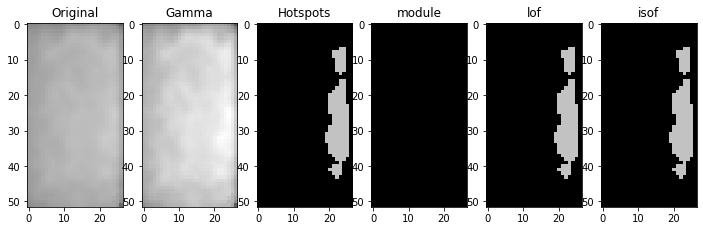

[-1.01134911 -0.99706984 -0.99596128 -1.00700956 -1.13512397 -1.01885632
 -1.02495659 -0.99678285]
[-1.84052542]
[-0.47482627 -0.45215745 -0.45502654 -0.45658101 -0.48854748 -0.46394168
 -0.4704188  -0.46901057]
[-0.69621017]
0.0 0
4971.jpg Normal
[-0.98888107 -1.00857318 -1.         -1.00871922 -0.99959323 -1.01020616
 -0.99205504 -1.4497738 ]
[-1.80144609]
[-0.43076593 -0.44405233 -0.45986597 -0.45582405 -0.44118686 -0.43225885
 -0.43167614 -0.59014429]
[-0.68057844]
0.0 0
2333.jpg Normal
[-1.02422947 -1.00732541 -0.96944278 -1.20865335 -1.09337389 -1.01037978
 -1.00531771 -0.99135952]
[-1.79976106]
[-0.44050269 -0.42791901 -0.41224298 -0.49818974 -0.48043436 -0.43176685
 -0.43854847 -0.41354073]
[-0.67990442]
0.0 0
4742.jpg Normal
[-1.17374898 -1.06265901 -1.01735493 -0.97735482 -1.35926405 -0.98276421
 -0.99815526 -0.97951693]
[-1.62631593]
[-0.50108208 -0.45740132 -0.45532623 -0.46541251 -0.51234122 -0.41561341
 -0.47136117 -0.43694161]
[-0.61052637]
0.0 0
4024.jpg Normal
[-0.9905

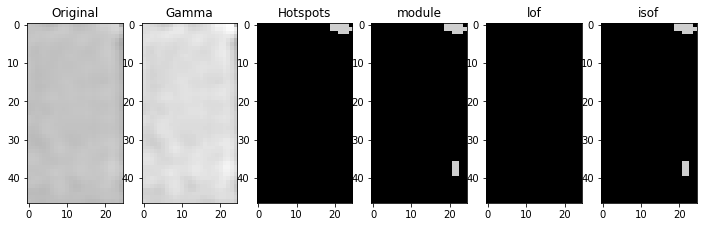

[-1.01253001 -0.97636327 -0.99733535 -0.9876488  -1.00566103 -1.01785178
 -1.01035419 -1.00363609]
[-1.62631593]
[-0.4764531  -0.44131849 -0.49391114 -0.48526034 -0.45490364 -0.4434503
 -0.48740233 -0.47967225]
[-0.61052637]
0.0 0
3987.jpg Normal
[-1.03307902 -0.99249531 -0.98104466 -1.17465682 -0.96937639 -1.00074822
 -0.98761208 -1.02077872]
[-1.62631593]
[-0.44218558 -0.40073808 -0.45450097 -0.48197785 -0.40627031 -0.42810866
 -0.41487739 -0.43654735]
[-0.61052637]
0.0 0
2441.jpg Normal
[-1.0091359  -1.00048482 -0.98384244 -1.00017516 -1.01561493 -1.00115214
 -1.00017516 -1.06805057]
[-1.62631593]
[-0.4395752  -0.43966629 -0.44018496 -0.4275209  -0.4432181  -0.43169757
 -0.4275209  -0.45718872]
[-0.61052637]
0.0 0
1148.jpg Normal
[-1.02646291 -0.98399914 -0.99556049 -0.98515626 -0.97881446 -1.03753846
 -0.99819631 -0.99420347]
[-1.79976106]
[-0.46461373 -0.46344871 -0.44193698 -0.47327828 -0.44947974 -0.45514158
 -0.46384393 -0.46084024]
[-0.67990442]
0.0 0
2327.jpg Normal
[-1.00556

[-0.99212797 -0.99135952 -0.99243866 -1.59263396 -1.01582413 -1.0478181
 -0.94723561 -2.52604776]
[-1.79976106]
[-0.45981924 -0.41354073 -0.44230144 -0.56788081 -0.44984152 -0.48602006
 -0.4645585  -0.65001252]
[-0.67990442]
0.0 0
2858.jpg Normal
[-0.98851871 -1.00161948 -1.02406655 -0.99461249 -1.00951276 -1.01177754
 -1.31189728 -0.97657949]
[-1.84052542]
[-0.50651282 -0.44905645 -0.48193599 -0.49373662 -0.4611412  -0.48616546
 -0.54192844 -0.47619154]
[-0.69621017]
0.0 0
2680.jpg Normal
[-1.         -1.05801691 -0.96937639 -1.1949251  -1.00074822 -0.97652611
 -0.99430634 -1.03307902]
[-1.62631593]
[-0.41342592 -0.4393374  -0.40627031 -0.48958025 -0.42810866 -0.42345975
 -0.43589585 -0.44218558]
[-0.61052637]
0.0 0
85.jpg Normal
[-0.98966771 -1.         -1.00240089 -1.03517423 -0.99954334 -1.01813416
 -1.0659183  -0.98596633]
[-1.62631593]
[-0.43406541 -0.44736852 -0.47489191 -0.44459842 -0.44539357 -0.45887997
 -0.47603774 -0.42112588]
[-0.61052637]
0.0 0
1389.jpg Normal
[-0.9907747

[-1.00395184 -0.99188533 -0.99556049 -0.99593287 -0.99188533 -0.99335537
 -1.06776434 -0.99126108]
[-1.79976106]
[-0.46257734 -0.45982757 -0.44193698 -0.46963673 -0.45982757 -0.4830326
 -0.45223261 -0.47093709]
[-0.67990442]
0.0 0
3213.jpg Normal
[-1.00069986 -1.02907181 -1.09634537 -0.99309136 -0.97173841 -3.44782637
 -1.00649114 -0.94735055]
[-1.73581688]
[-0.44099429 -0.43214509 -0.48415954 -0.43304603 -0.42901708 -0.79522494
 -0.45363332 -0.43552301]
[-0.65432675]
0.0 0
190.jpg Normal
[-1.12670956 -0.9952624  -0.97933341 -0.93702429 -0.93702429 -0.98407707
 -1.06757175 -1.53358374]
[-1.73581688]
[-0.46100206 -0.44137911 -0.424741   -0.43457456 -0.43457456 -0.43786708
 -0.46471209 -0.53535617]
[-0.65432675]
0.0 0
1404.jpg Normal
[-0.9921819  -0.98959756 -0.98399914 -2.64881484 -1.03736565 -1.0061237
 -0.98399914 -1.27816728]
[-1.79976106]
[-0.45731894 -0.4386277  -0.45915908 -0.71393434 -0.46885491 -0.48392447
 -0.45915908 -0.56087997]
[-0.67990442]
0.0 0
1410.jpg Normal
[-1.0394529

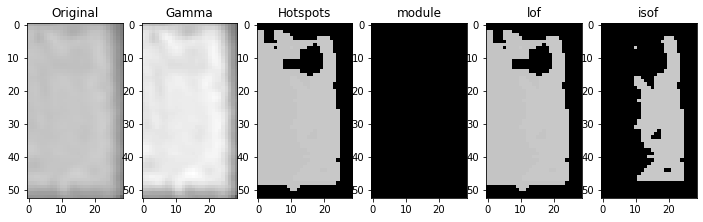

[-0.94933707 -1.040414   -0.94933707 -0.99436408 -0.9762191  -1.06757175
 -0.9952624  -1.08510024]
[-1.73581688]
[-0.43088386 -0.45185093 -0.43088386 -0.44908513 -0.43388136 -0.46471209
 -0.44137911 -0.47290802]
[-0.65432675]
0.0 0
5110.jpg Normal
[-0.94735055 -1.00116182 -1.00649114 -1.01920337 -1.02907181 -1.02866394
 -0.97933341 -1.04231916]
[-1.73581688]
[-0.43552301 -0.45900713 -0.45363332 -0.43534637 -0.43214509 -0.48680967
 -0.424741   -0.44360067]
[-0.65432675]
0.0 0
3561.jpg Normal
[-1.00649114 -0.97115731 -1.04584772 -0.9952624  -1.04231916 -1.0874006
 -1.02907181 -1.05234426]
[-1.73581688]
[-0.45363332 -0.4562277  -0.48630303 -0.44137911 -0.44360067 -0.46675291
 -0.43214509 -0.48154965]
[-0.65432675]
0.0 0
1376.jpg Normal


In [48]:
anomaly_modules= {}
os.makedirs(input_dir_path+"/hist/",exist_ok=True)
#for n, k in enumerate(list(thermal_img_files)[:10]):
for n, k in enumerate(list(thermal_img_files)):    
    # -- module label --
    l = module_labels[n]
    if l == -1:
        pass
    else:
        # -- clustering --
        clusters = thermal_data[l].clusters[k]
        # -- gamma correction --
        gamma_temperature_each = utils.gamma_correction(
            thermal_data[l].temperature[k], gamma = 3.0)
        # -- temperature --
        sliced_data = clusters.get_clusters_data(thermal_data[l].temperature[k])    
        clusters_temperature = np.stack([np.uint8(t.mean(axis=0)) for t in sliced_data])
        #print(clusters_temperature)
        # -- scaled temperature --
        sliced_data = clusters.get_clusters_data(
            preprocessing.RobustScaler().fit_transform(gamma_temperature_each)
        )
        scaled_clusters_temperature = np.stack([t.mean(axis=0) for t in sliced_data ])        
        # -- anomaly detection --    
        #hot_pixels_group, _ = anomaly_detection.get_hotspots_by_zscore(
        #    clusters_temperature, thermal_img_files[k], clusters, threshold=3.0, log=False)          
        hot_pixels_module, _ = anomaly_detection.get_hotspots_by_zscore(
            scaled_clusters_temperature, thermal_img_files[k], clusters, threshold=3.0, log=False)   
        hot_pixels_lof, _ = anomaly_detection.get_hotspots_by_models(
            clusters_temperature, scaled_clusters_temperature,
            thermal_img_files[k], clusters, anomodels.lof[l], log=False)        
        hot_pixels_isof, _ = anomaly_detection.get_hotspots_by_models(
            clusters_temperature, scaled_clusters_temperature,
            thermal_img_files[k], clusters, anomodels.isof[l], log=False)  
        hot_pixels = (hot_pixels_module | hot_pixels_lof | hot_pixels_isof)
        hot_pixels = anomaly_detection.remove_useless_clusters(
            anomaly_detection.remove_useless_clusters(hot_pixels))
        module_type = anomaly_detection.detect_module_type(hot_pixels, clusters)
        # -- save anomaly modules --
        if module_type not in anomaly_modules:
            anomaly_modules[module_type] = [k]
        else:
            anomaly_modules[module_type].append(k)        
        # -- display -- 
        img_clustered = clusters_temperature[clusters.labels].reshape(thermal_img_files[k].shape)
        img_hotspots = img_clustered * hot_pixels
        img_hotspots_module = img_clustered * hot_pixels_module
        img_hotspots_lof = img_clustered * hot_pixels_lof
        img_hotspots_isof = img_clustered * hot_pixels_isof
        print(k, module_type)
        if module_type not in ["Normal"]:
            anomaly_detection.show_modules({
                "Original": thermal_img_files[k], 
                "Gamma": utils.gamma_correction(thermal_img_files[k], gamma=anomodels.gamma), 
                "Hotspots": img_hotspots,
                "module": img_hotspots_module,
                "lof": img_hotspots_lof,
                "isof": img_hotspots_isof,
            })

In [49]:
list_anomaly_modules = [
    "172.jpg", 
    "300.jpg",                 
    "717.jpg",         
    "877.jpg",     
    "900.jpg",         
    "1248.jpg",             
    "1397.jpg",                 
    "1531.jpg",         
    "1638.jpg",     
    "1705.jpg",         
    "1955.jpg",     
    "3237.jpg",             
    "4036.jpg",         
    "4517.jpg",             
    "4908.jpg",             
]

[-0.99184498 -2.09344697 -1.00659858 -4.1485841  -1.02970695 -3.96197814
 -1.03360118 -1.65794752]
[-1.79270085]
[-0.50404839 -0.71106856 -0.50475297 -0.78159565 -0.50674703 -0.77895604
 -0.51897437 -0.64180265]
[-0.67708034]
363.5 110.04163014888763 0.37722481000510794 0.955615497623287
2.5 7.414213538169861 0.5715045502581996 1.0
363.5 110.04163014888763 0.37722481000510794 0.955615497623287
91.0 325
3237.jpg Cluster-Anomaly


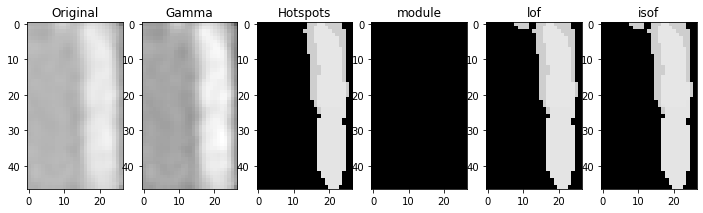

[-0.9853454  -1.00595147 -1.54526733 -0.98156132 -1.01414698 -1.03067123
 -0.98732345 -1.07498895]
[-1.85143439]
[-0.46042147 -0.47134703 -0.60462444 -0.44226803 -0.49703525 -0.45634481
 -0.4906539  -0.52655875]
[-0.70057376]
18.0 16.82842707633972 0.7987213968899363 0.9894140119553937
18.0 16.82842707633972 0.7987213968899363 0.9894140119553937
3.0 24
1397.jpg Single-Hotspot


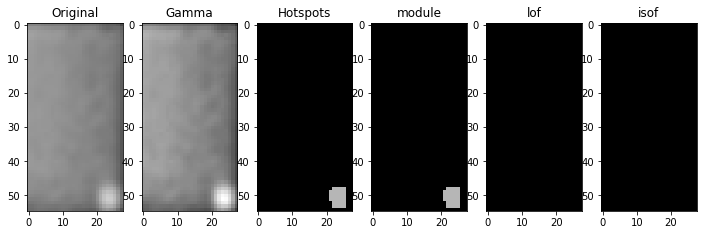

[-0.97844064 -1.82001093 -1.05463125 -1.0041524  -1.70612067 -1.04239338
 -1.1225694  -0.97028444]
[-1.69100393]
[-0.47183564 -0.69620976 -0.45555175 -0.43422809 -0.6566553  -0.47016771
 -0.50807283 -0.42124602]
[-0.63640157]
312.0 106.62741661071777 0.34484718383395535 0.9660135002788288
312.0 106.62741661071777 0.34484718383395535 0.9660135002788288
42.0 321
172.jpg Single-Hotspot


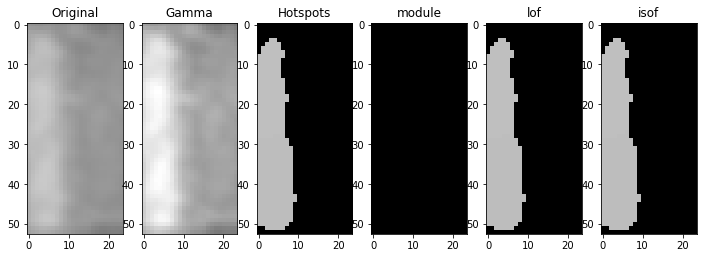

[-1.06188397 -1.03423256 -1.02116277 -0.97082833 -1.032614   -0.9944431
 -1.06795276 -0.99712391]
[-1.83714507]
[-0.47165152 -0.52553595 -0.464251   -0.43272906 -0.50002953 -0.43333335
 -0.45608039 -0.43941753]
[-0.69485803]
0.0 0
4908.jpg Normal


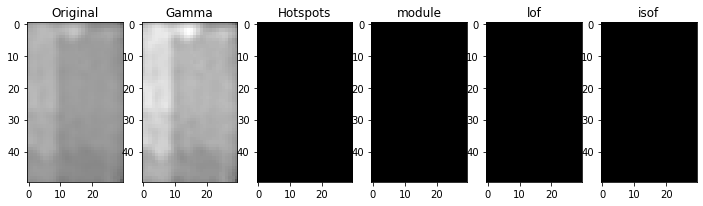

[-3.24742165 -1.05546752 -1.12347795 -0.98892426 -1.91417047 -1.00971013
 -1.01028098 -1.90475809]
[-1.76166564]
[-0.76702349 -0.46014721 -0.53225925 -0.44181963 -0.64552109 -0.45347161
 -0.45557276 -0.61565292]
[-0.66466626]
18.0 16.485281229019165 0.8323186927986581 0.9783873231684916
18.0 16.485281229019165 0.8323186927986581 0.9783873231684916
7.0 19
300.jpg Single-Hotspot


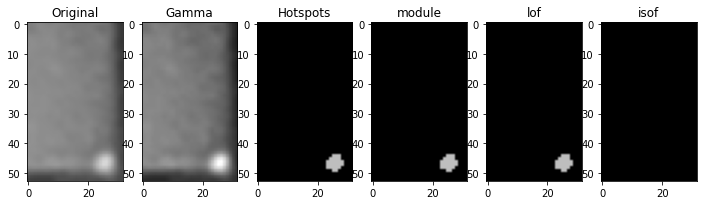

[-0.99675749 -0.99193474 -0.99535908 -1.00701845 -1.00661249 -1.00913943
 -1.12254969 -1.6792746 ]
[-1.78206358]
[-0.45969354 -0.4573302  -0.4727144  -0.48307506 -0.48745132 -0.45988406
 -0.53597556 -0.71136949]
[-0.67282543]
30.5 37.899494767189026 0.26683504191510016 0.96021162352934
30.5 37.899494767189026 0.26683504191510016 0.96021162352934
2.0 47
1531.jpg Single-Hotspot


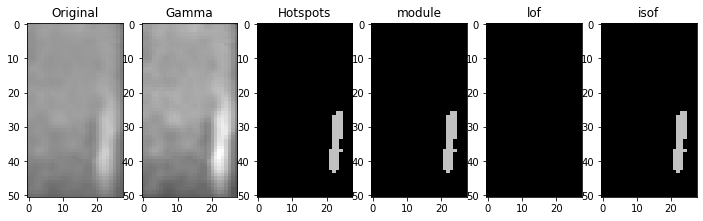

[-0.99080898 -0.99747678 -1.30764433 -1.77810953 -1.00201407 -4.71550326
 -2.12619332 -1.13331614]
[-1.83299977]
[-0.46172824 -0.42953637 -0.54645301 -0.65210191 -0.44402885 -0.80043744
 -0.69494283 -0.51065292]
[-0.69319991]
272.0 70.28427064418793 0.6919305138232965 0.9263985677300878
272.0 70.28427064418793 0.6919305138232965 0.9263985677300878
112.0 191
4517.jpg Single-Hotspot


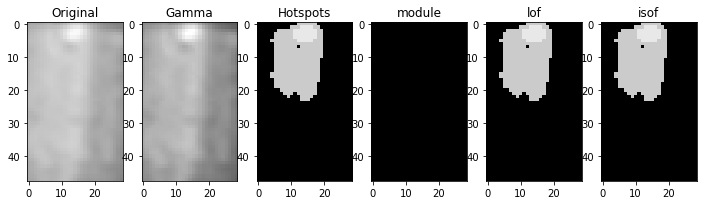

[-1.83318779 -0.97359645 -1.01180274 -1.00122908 -1.77477219 -1.05472332
 -0.99705737 -1.00724471]
[-1.81431168]
[-0.65882717 -0.4421959  -0.47868205 -0.48323667 -0.64880675 -0.48578559
 -0.43109698 -0.44664723]
[-0.68572467]
159.5 64.38477599620819 0.4835085667790797 0.9488934676038913
159.5 64.38477599620819 0.4835085667790797 0.9488934676038913
50.0 140
717.jpg Single-Hotspot


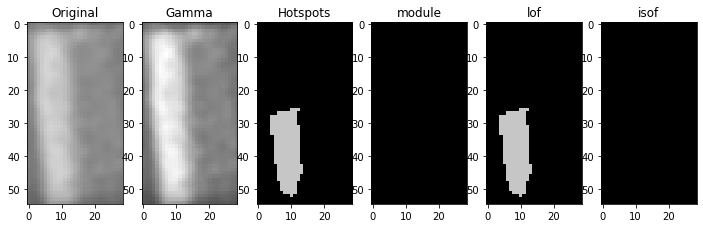

[-0.99261953 -2.51013453 -1.29548388 -0.98333373 -1.01152471 -0.99018035
 -1.0242151  -1.2128392 ]
[-1.70933596]
[-0.44282194 -0.67638055 -0.54200435 -0.44066504 -0.45723608 -0.44802541
 -0.48338187 -0.54172459]
[-0.64373438]
13.5 15.071067690849304 0.7468881888038891 0.9763592690983898
13.5 15.071067690849304 0.7468881888038891 0.9763592690983898
5.0 16
900.jpg Single-Hotspot


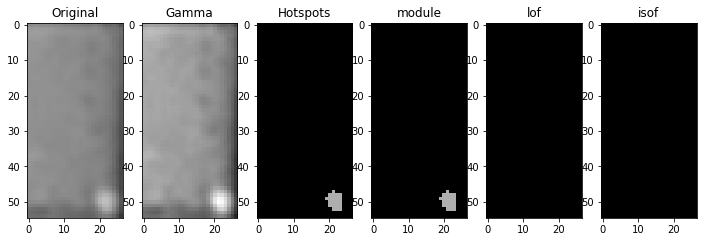

[-0.97191612 -2.03987202 -0.96169882 -2.92326844 -0.98774764 -1.02704179
 -1.194187   -1.07783013]
[-1.78206358]
[-0.43779584 -0.65679017 -0.42829059 -0.78594794 -0.43664186 -0.46316294
 -0.5040843  -0.49335893]
[-0.67282543]
14.0 13.656854152679443 0.9432711611657616 1.0
14.0 13.656854152679443 0.9432711611657616 1.0
3.0 18
877.jpg Single-Hotspot


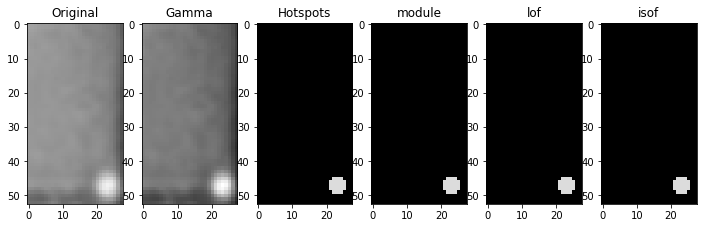

[-1.30992146 -1.09001571 -2.46016202 -1.07376738 -2.92326844 -1.66325139
 -1.00191485 -1.14751725]
[-1.78206358]
[-0.55084201 -0.50419817 -0.64226713 -0.49719692 -0.78594794 -0.61194957
 -0.43403849 -0.49726279]
[-0.67282543]
36.0 22.485281229019165 0.8947788647971874 0.9920772381708196
36.0 22.485281229019165 0.8947788647971874 0.9920772381708196
17.0 30
1248.jpg Single-Hotspot


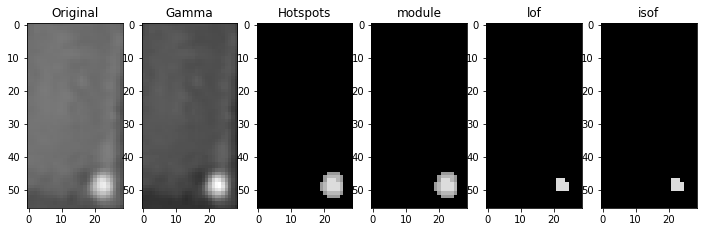

[-1.53889763 -0.99411236 -4.41245418 -1.32928433 -1.09694677 -1.14404128
 -1.04321328 -1.23989099]
[-1.72690247]
[-0.59452193 -0.45107488 -0.77590913 -0.55243563 -0.50736564 -0.5144885
 -0.47413311 -0.55403733]
[-0.65076099]
5.5 9.41421353816986 0.7798381254407765 1.0
5.5 9.41421353816986 0.7798381254407765 1.0
0.0 11
1705.jpg Single-Hotspot


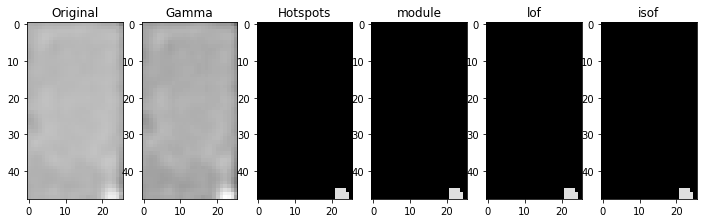

[-2.19178662 -1.15316234 -1.10394708 -1.57811681 -1.         -1.89292601
 -4.54381866 -1.2609319 ]
[-1.85857924]
[-0.70440312 -0.51227777 -0.47792922 -0.60588272 -0.44026594 -0.64399976
 -0.76479348 -0.52608843]
[-0.7034317]
783.5 145.982754945755 0.462004019797051 0.7765393916396844
783.5 145.982754945755 0.462004019797051 0.7765393916396844
165.0 680
4036.jpg Module-Anomaly


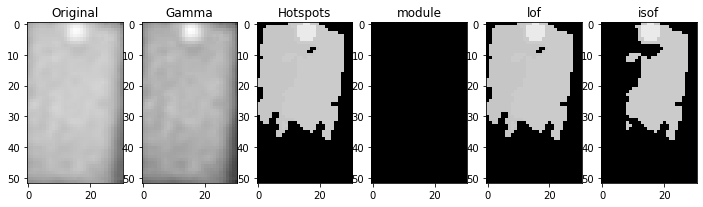

[-0.96091772 -0.95726529 -6.32768661 -3.25599408 -1.07580134 -1.43177986
 -1.08624193 -1.07580134]
[-1.80505583]
[-0.47117717 -0.43318873 -0.80811897 -0.72983446 -0.44885131 -0.59057959
 -0.4867341  -0.44885131]
[-0.68202233]
16.5 21.071067690849304 0.4670041325504108 0.9626799916022527
49.5 31.55634891986847 0.6246569323896298 0.9594467597181667
16.5 21.071067690849304 0.4670041325504108 0.9626799916022527
49.5 31.55634891986847 0.6246569323896298 0.9594467597181667
0.0 91
1638.jpg Multi-Hotspots


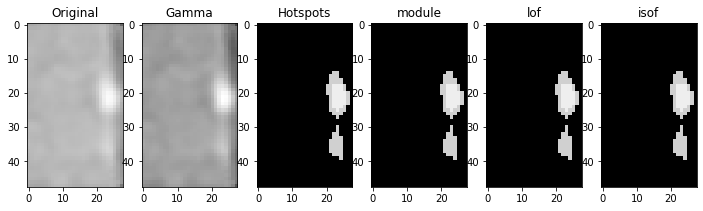

[-0.99698341 -1.99273092 -1.029166   -1.00144393 -1.02531584 -0.97906869
 -0.96289185 -2.23043684]
[-1.87825281]
[-0.42398779 -0.64599692 -0.4541117  -0.47046219 -0.46059461 -0.42938162
 -0.46926082 -0.71794199]
[-0.71130113]
286.5 102.72792184352875 0.34115951255694044 0.9783787943668444
286.5 102.72792184352875 0.34115951255694044 0.9783787943668444
27.0 310
1955.jpg Single-Hotspot


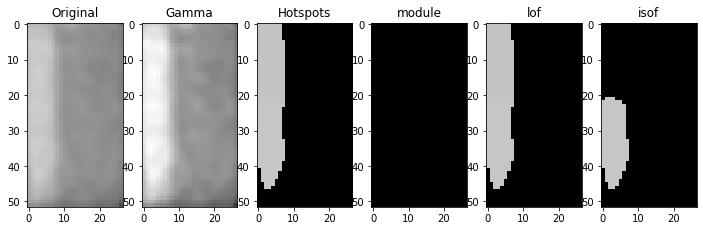

In [50]:
for n, k in enumerate(list(thermal_img_files)):    
    # -- module label --
    l = module_labels[n]
    if l == -1:
        pass
    elif k in list_anomaly_modules:
    #elif k in ["41.jpg", "49.jpg", "54.jpg", "58.jpg", "64.jpg"]:
        # -- clustering --
        clusters = thermal_data[l].clusters[k]
        # -- gamma correction --
        gamma_temperature = utils.gamma_correction(
            thermal_data[l].temperature[k], gamma = 3.0)
        # -- temperature --
        sliced_data = clusters.get_clusters_data(thermal_data[l].temperature[k])    
        clusters_temperature = np.stack([np.uint8(t.mean(axis=0)) for t in sliced_data])
        # -- scaled temperature --
        sliced_data = clusters.get_clusters_data(
            preprocessing.RobustScaler().fit_transform(gamma_temperature)
        )
        scaled_clusters_temperature = np.stack([t.mean(axis=0) for t in sliced_data ])        
        # -- anomaly detection --    
        #hot_pixels_group, _ = anomaly_detection.get_hotspots_by_zscore(
        #    clusters_temperature, thermal_img_files[k], clusters, threshold=3.0, log=False)       
        hot_pixels_module, _ = anomaly_detection.get_hotspots_by_zscore(
            scaled_clusters_temperature, thermal_img_files[k], clusters, threshold=3.0, log=False)
        hot_pixels_lof, _ = anomaly_detection.get_hotspots_by_models(
            clusters_temperature, scaled_clusters_temperature,
            thermal_img_files[k], clusters, anomodels.lof[l], log=False)        
        hot_pixels_isof, _ = anomaly_detection.get_hotspots_by_models(
            clusters_temperature, scaled_clusters_temperature,
            thermal_img_files[k], clusters, anomodels.isof[l], log=False)        
        hot_pixels = (hot_pixels_module | hot_pixels_lof | hot_pixels_isof)
        hot_pixels = anomaly_detection.remove_useless_clusters(
            anomaly_detection.remove_useless_clusters(hot_pixels))
        module_type = anomaly_detection.detect_module_type(hot_pixels, clusters)
        # -- save anomaly modules --
        if module_type not in anomaly_modules:
            anomaly_modules[module_type] = [k]
        else:
            anomaly_modules[module_type].append(k)        
        # -- display -- 
        img_clustered = clusters_temperature[clusters.labels].reshape(thermal_img_files[k].shape)
        img_hotspots = img_clustered * hot_pixels
        img_hotspots_module = img_clustered * hot_pixels_module
        img_hotspots_lof = img_clustered * hot_pixels_lof
        img_hotspots_isof = img_clustered * hot_pixels_isof
        print(k, module_type)
        anomaly_detection.show_modules({
            "Original": thermal_img_files[k], 
            "Gamma": utils.gamma_correction(thermal_img_files[k], gamma=anomodels.gamma), 
            "Hotspots": img_hotspots,
            "module": img_hotspots_module,
            "lof": img_hotspots_lof,
            "isof": img_hotspots_isof,
        })

異常モジュール可視化

In [57]:
modules = Modules(module_contours)
anomaly_contours = modules.get_anomaly_contours(anomaly_modules)

In [58]:
if "Module-Anomaly" in anomaly_modules:
    string_anomaly_labels = modules.get_dbscan_labels(anomaly_contours["Module-Anomaly"])
    string_anomaly_modules = np.array(anomaly_modules["Module-Anomaly"])[string_anomaly_labels > 0]
    anomaly_modules["String-Anomaly"] = list(string_anomaly_modules )
    anomaly_contours = modules.get_anomaly_contours(anomaly_modules)

In [59]:
img_con = cv2.drawContours(np.zeros_like(img_org), module_contours, -1, 255, -1)
img_mask = cv2.bitwise_and(img_org, img_con)
img_mask_index = modules.add_index(img_mask)

In [60]:
#plt.imshow(img_mask_index)

../module_extraction.py:63: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


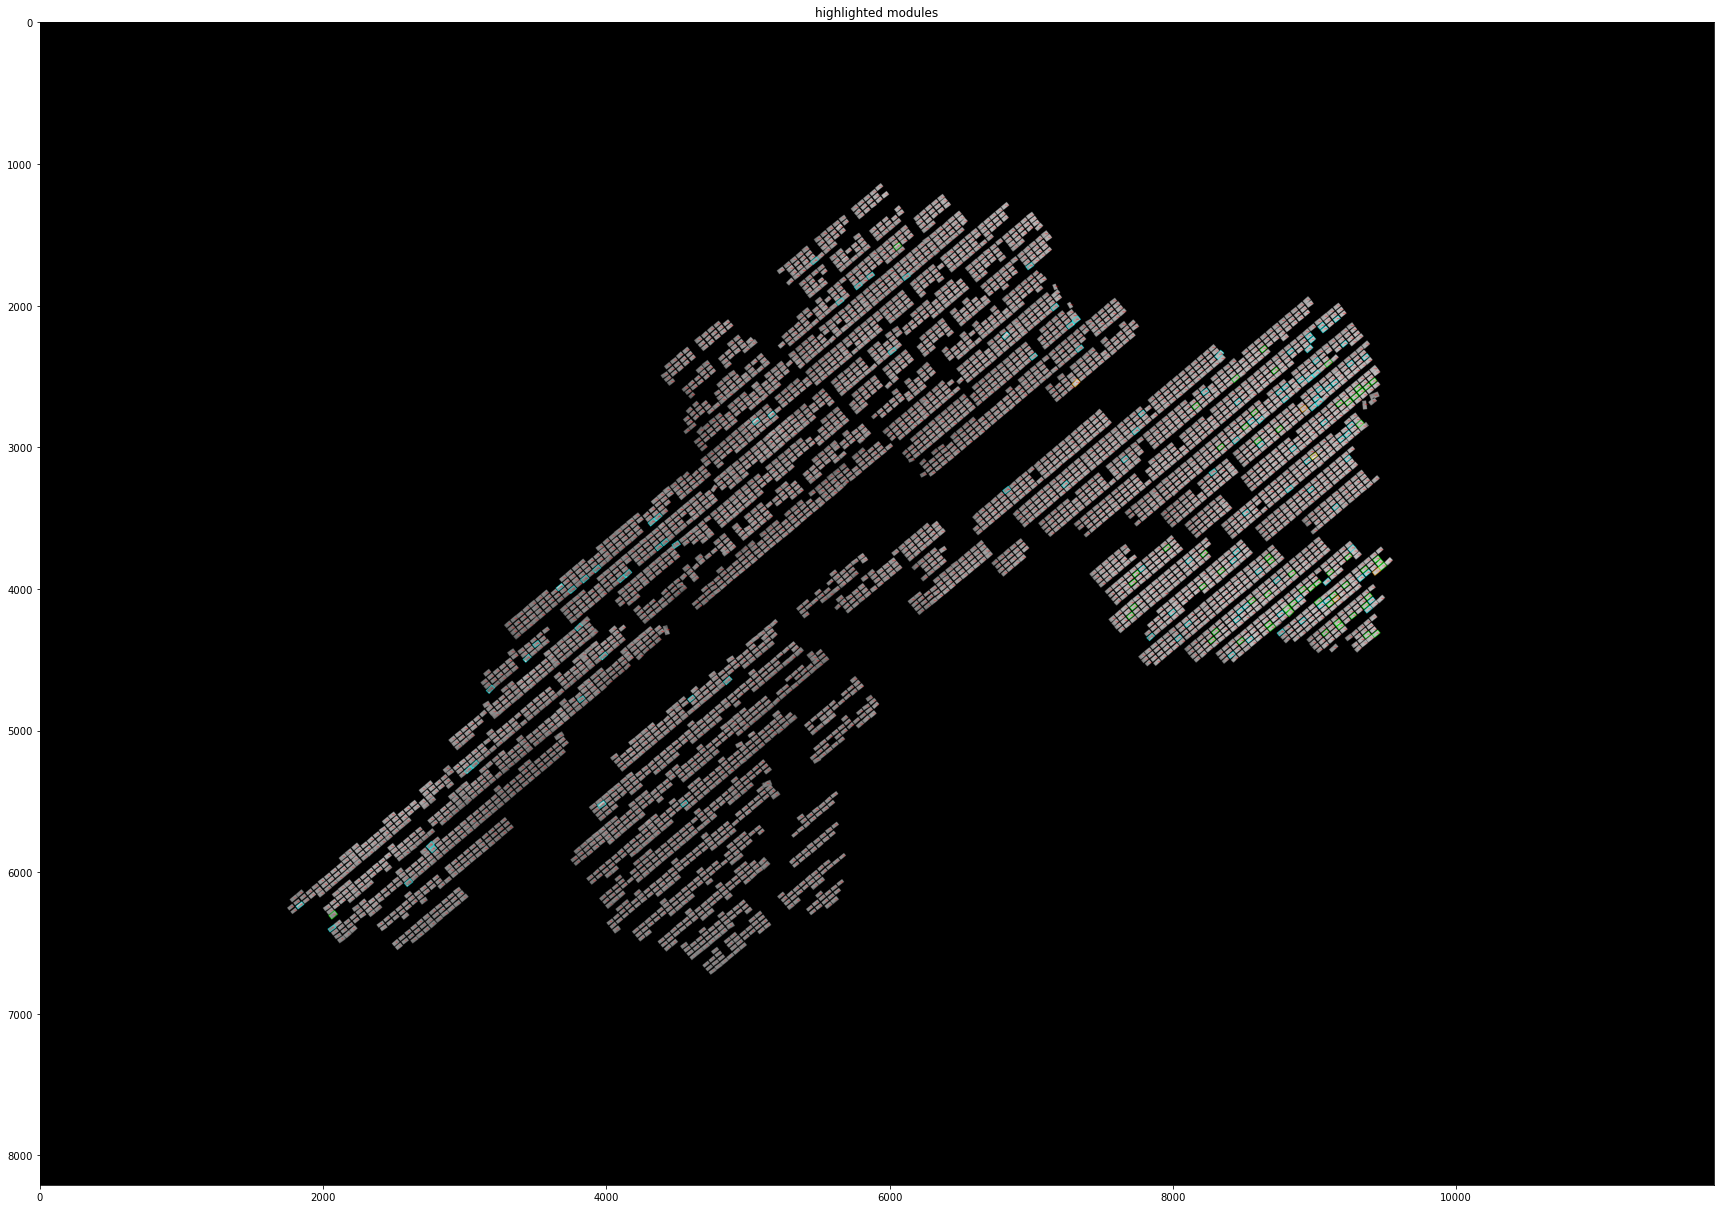

In [61]:
import copy
color_list = {
    "Single-Hotspot": (0,255,255), # aqua
    "Multi-Hotspots": (0,255,0), # green
    "Cluster-Anomaly": (255,255,0), # yellow
    "Module-Anomaly": (255,165,0), # orange
    "String-Anomaly": (238,130,238) # violet
}
img_target_index = copy.deepcopy(img_mask_index)
for k, v in anomaly_contours.items():
    if k in  ["Normal", "Junction-Box-Error"]:
        continue
    else:
        img_target_index = modules.get_img_target_contours(
            img_target_index, v, index=True, color=color_list[k])
module_extraction.show_img(
    {"highlighted modules":img_target_index}, cmap="gray", figsize=(30,30)
)

In [62]:
img_write = cv2.cvtColor(img_target_index, cv2.COLOR_BGR2RGB)
cv2.imwrite(input_dir_path+'/img_target_index.png',img_write)

True

異常モジュールデータの保存

In [63]:
import json
with open(input_dir_path+"/anomaly_modules.json", "w") as f:
    json.dump(anomaly_modules, f, indent=4, sort_keys=True, separators=(',', ': '))